In [1]:
import os
os.getpid()

833

In [ ]:
### from IPython.display import Image

import matplotlib_options
matplotlib_options.define_matplotlib_backend_options(backend='agg')

%matplotlib inline
# Use autoreload to keep up-to-date version of custom packages
# %load_ext autoreload
import mwTools
import cterminal
# %autoreload 2

import matplotlib.pyplot as plt
from cterminal import colorBackground1, get_line_width, vmax, cmap, colorHeatmapLine
from matplotlib.font_manager import FontProperties
from matplotlib import transforms
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from matplotlib import colors
import seaborn as sns
sns.set_style('whitegrid')

import numpy as np
from numpy import exp, log2, log10, log
import pandas as pd
idx = pd.IndexSlice
import collections
from collections import Counter
import json
import argparse
import subprocess
import shlex
import itertools
import os.path
import re
import gzip
import urllib
import gc
import time
from pathlib import Path
import random
import math

import Bio
from Bio import Seq
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation, ExactPosition
from Bio.SeqRecord import SeqRecord

from importlib import reload
import mwTools.bio
reload(mwTools.bio)
from mwTools.bio import sort_codon_index
from mwTools.bio import convert_df_to_fasta
from statannot import add_stat_annotation
from mwTools.id import *
from mwTools.paths import p
from cterminal import *

p = p()
print(p.rootPath)

In [4]:
rootPath = p.rootPath
cterminalPath = p.cterminalPath
refSeqPath = p.refSeqPath
mycoplasmaDataPath = p.mycoplasmaDataPath
mpnAnnotationPath = p.mpnAnnotationPath
analysisCtermDataPath = p.analysisCtermDataPath
analysisCtermPlotsPath = p.analysisCtermPlotsPath
analysisCtermPath = p.analysisCtermPath
ctermELISAPath = p.ctermELISAPath
ctermELMseqPath = p.ctermELMseqPath
ctermAmiGOPath = analysisCtermPath / 'AmiGO'
analysisAbundancePath = p.analysisAbundancePath
taxonomyPath = p.taxonomyPath

In [5]:
importExistingDataframe = True

# Colors and styles

In [43]:
from matplotlib_options import set_fontsize_paper, set_fontsize_screen

In [44]:
colorAxis = '0.8'

In [45]:
def set_fontsize_paper():
    sns.set_style('whitegrid')
    matplotlib.rcParams['font.size'] = 7
    matplotlib.rcParams['font.monospace'] = ['Courier New']

Text(0, 0, 'ABCDEFGHIJKLMNOPK')

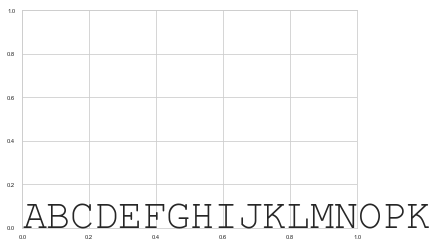

In [46]:
set_fontsize_paper()
fig, ax = plt.subplots()
ax.annotate("ABCDEFGHIJKLMNOPK", xy=(0,0), fontsize=40, fontfamily='monospace')

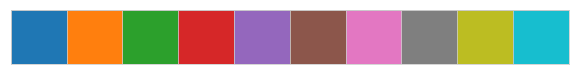

In [47]:
sns.palplot(sns.color_palette())

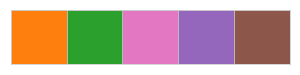

In [48]:
paletteCat = [sns.color_palette()[i] for i in [1,2,6,4,5]]
sns.palplot(paletteCat)

**I changed the colours in order not to repeat the colors from both bias color code and abundance color code.**

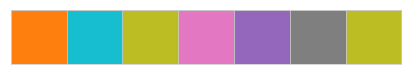

In [49]:
paletteCat = [sns.color_palette()[i] for i in [1,9,8,6,4,7,8]]
sns.palplot(paletteCat)

**I changed the colours in order not to repeat the colors from both bias color code and abundance color code.**

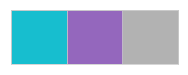

In [50]:
groupList = ['membrane proteins', 'non membrane proteins', 'all']

cMembraneTrue = paletteCat[1]
cMembraneFalse = paletteCat[4]
cAll = colors.to_rgb('0.7')
paletteMembraneCat = {'membrane':cMembraneTrue, 'cytoplasmic':cMembraneFalse, 'all':cAll}
sns.palplot(paletteMembraneCat.values())

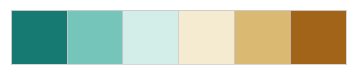

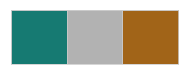

In [51]:
cmapName = "BrBG_r"
paletteAbundance = sns.color_palette(cmapName)
sns.palplot(sns.color_palette(cmapName))
cLow = paletteAbundance[0]
cMedium = colors.to_rgb('0.7')
cHigh = paletteAbundance[-1]
sns.palplot([cLow, cMedium, cHigh])

# Prolog

### Import and analyze aa and codon frequencies

In [ ]:
# Mollicutes
oddsratioDf = pd.read_csv(os.path.join(analysisDataFolder,'setMollicutes-subset-all_oddsRatioCodonDf.csv'))
countSeries = oddsratioDf[(oddsratioDf['terminus']=='bulk') & (oddsratioDf['observable']=='count')].iloc[0,3:]
bulkAAfreq = countSeries / countSeries.sum()
bulkAAfreq.to_csv(os.path.join(root_folder,'setMollicutes_codon_freq_bulk.csv'))

In [ ]:
countSeries = oddsratioDf[(oddsratioDf['terminus']=='C') 
            & (oddsratioDf['position from terminus']==-1) 
            & (oddsratioDf['observable']=='count')].iloc[0,3:]
codonFreq = countSeries / countSeries.sum()
codonFreq.to_csv(os.path.join(root_folder,'setMollicutes_codon_freq_cterminal.csv'))

In [ ]:
countSeries = oddsratioDf[(oddsratioDf['terminus']=='N') 
            & (oddsratioDf['position from terminus']==+1) 
            & (oddsratioDf['observable']=='count')].iloc[0,3:]
codonFreq = countSeries / countSeries.sum()
codonFreq.to_csv(os.path.join(root_folder,'setMollicutes_codon_freq_nterminal.csv'))

In [ ]:
oddsratioDf = pd.read_csv(os.path.join(analysisDataFolder,'setPhylum-index00-PhylumId-00000976-Bacteroidetes-subset-all_oddsRatioAADf.csv'))
countSeries = oddsratioDf[(oddsratioDf['terminus']=='bulk') & (oddsratioDf['observable']=='count')].iloc[0,3:]
bulkAAfreq = countSeries / countSeries.sum()
bulkAAfreq

In [ ]:
oddsratioCterm = oddsratioDf[(oddsratioDf['position from terminus']==-1) & (oddsratioDf['observable']=='oddsRatio')].iloc[0,3:]
oddsratioCterm.name = 'cterm'
oddsratioCterm

### Mycoplasma pneumoniae

In [ ]:
genome_accession = 'GCF_000027345.1'

In [ ]:
GCF_000027345.1_Mycoplasma_pneumoniae_M129_countStatistics.json

In [ ]:
with (analysisCtermDataPath / 'GCF_000027345.1_Mycoplasma_pneumoniae_M129_countStatistics.json').open() as f:
    oddsratioDf = (str())

In [ ]:
countSeries = oddsratioDf[(oddsratioDf['terminus']=='bulk') & (oddsratioDf['observable']=='count')].iloc[0,3:]
bulkAAfreq = countSeries / countSeries.sum()
bulkAAfreq.to_csv(os.path.join(root_folder,'setMollicutes_codon_freq_bulk.csv'))

In [ ]:
pow(20, 4)

In [ ]:
pow(20, 6)

In [ ]:
oddsRatioCodonDf = pd.read_csv(str(analysisCtermDataPath / 'GCF_000027345.1' / 'GCF_000027345.1_subset_all_oddsRatioCodonDf.csv'))
oddsRatioCodonDf = oddsRatioCodonDf[(oddsRatioCodonDf['terminus'] == 'bulk') &
                                    (oddsRatioCodonDf['observable'] == 'count')
                                   ].drop(['position from terminus', 'observable', 'terminus'], axis=1).T
oddsRatioCodonDf.columns = ['count']
oddsRatioCodonDf.head()

In [ ]:
refCodonTableDf = build_refCodonTable(codonTableBio)
refCodonTableDf['aa'].head()

In [ ]:
oddsRatioCodonDf['freq'] = oddsRatioCodonDf['count']/(oddsRatioCodonDf['count'].sum())

In [ ]:
oddsRatioCodonDf['aa'] = refCodonTableDf['aa']
oddsRatioCodonDf.sort_values(['aa', 'freq'], ascending=[True, False], inplace=True)

In [ ]:
oddsRatioCodonDf.to_csv(str(analysisCtermDataPath / '..' / 'mpn_bulk_codon_freq.csv'))

### AA pairs frequency

By default, pandas read_csv will consider a list of strings that evaluate to NaN:

na_values : str or list-like or dict, default None
Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘nan’.

**In our case, the AA pairs NA will be read as a NaN value!!!**

We can use the options `keep_default_na=False` and `na_values=['','NaN','etc']` to specifiy manually the list of strings to be treated as NaN.

In [ ]:
# Mollicutes
subseqOddsRatioDf = pd.read_csv(os.path.join(analysisDataFolder,'setMollicutes-subset-all_oddsRatioAAPairListDf.csv'),
                                keep_default_na=False, na_values=[''])
subseqOddsRatioDf.head(10)

In [ ]:
subseqOddsRatioDf.query("subseq == 'NA'")

In [ ]:
subseqOddsRatioDf = subseqOddsRatioDf[(subseqOddsRatioDf['observable']=='count') &
                                      (subseqOddsRatioDf['statistical_test']=='contingency')].drop('observable', axis=1)
subseqOddsRatioDf = subseqOddsRatioDf.drop('statistical_test', axis=1)
subseqOddsRatioDf.head()

In [ ]:
subseqOddsRatioDf.subseq

In [ ]:
grouped = subseqOddsRatioDf.groupby('terminus')
grouped.sum()

In [ ]:
subseqOddsRatioDf['freq'] = subseqOddsRatioDf.groupby(['terminus']).value.transform(lambda x: x/x.sum())
subseqOddsRatioDf.rename(columns={'value':'count'}, inplace=True)

In [ ]:
subseqOddsRatioDf.head()

In [ ]:
subseqOddsRatioDf.groupby('terminus').count()

In [ ]:
subseqOddsRatioDf.groupby('terminus').sum()

In [ ]:
subseqOddsRatioDf.head()

In [ ]:
subseqOddsRatioDf.to_csv(str(Path(root_folder) / '..' / 'results' / 'setMollicutes_AApairs_freq.csv.csv'))

### Find aa at position -2 that is the most neutral in terms of biases at position -1

In [ ]:
# row index is -2 position, column index is -1 position
subseqOddsRatioPairsDf = pd.read_csv(os.path.join(analysisDataFolder,'setPhylum-index00-PhylumId-00000976-Bacteroidetes-subset-all_oddsRatioAAPairDf.csv'))
subseqOddsRatioPairsDf = subseqOddsRatioPairsDf[(subseqOddsRatioPairsDf['terminus']=='C')
                                                & (subseqOddsRatioPairsDf['observable']=='oddsRatio')
                                                & (subseqOddsRatioPairsDf['statistical_test']=='contingency')
                                               ]
subseqOddsRatioPairsDf.drop(['terminus', 'statistical_test', 'observable'], inplace=True, axis=1)
subseqOddsRatioPairsDf.set_index('aa0', drop=True, inplace=True)
subseqOddsRatioPairsDf.dropna(axis=0, how='all', inplace=True)
subseqOddsRatioPairsDf.dropna(axis=1, how='all', inplace=True)
subseqOddsRatioPairsDf = subseqOddsRatioPairsDf.append(oddsratioCterm)
subseqOddsRatioPairsDf = subseqOddsRatioPairsDf.transpose()
subseqOddsRatioPairsDf
# row index is -1 position, column index is -2 position

In [ ]:
# row index is -1 position, column index is -2 position

oddsRatioEuclidianDist = subseqOddsRatioPairsDf.drop('cterm', axis=1).copy()

# Compute square difference for each (-2,-1) compared to cterm
# We weight the difference by the bulk frequency of aa at C-terminal
for index, row in subseqOddsRatioPairsDf.iterrows():
    delta2 = row[:-1].copy()
    oddsratioCterm = row[-1]
    for aa, oddsratio in row[:-1].iteritems():
        delta2[aa] = bulkAAfreq[index]*(oddsratio - oddsratioCterm)**2
    oddsRatioEuclidianDist[index] = delta2

# Sum square differences over -1 positions
oddsRatioEuclidianDist.sum(axis=0).sort_values()

In [ ]:
# row index is -1 position, column index is -2 position

oddsRatioEuclidianDist = subseqOddsRatioPairsDf.drop('cterm', axis=1).copy()

# Compute square difference for each (-2,-1) compared to cterm
# We weight the difference by the bulk frequency of aa at C-terminal
for index, row in subseqOddsRatioPairsDf.iterrows():
    delta2 = row[:-1].copy()
    oddsratioCterm = row[-1]
    for aa, oddsratio in row[:-1].iteritems():
        delta2[aa] = (oddsratio - oddsratioCterm)**2
    oddsRatioEuclidianDist[index] = delta2

# Sum square differences over -1 positions
oddsRatioEuclidianDist.sum(axis=0).sort_values()

# Example of enrichment analysis of a.a. at the C-terminal

## RefSeq bacterial genomes database

In [ ]:
# Import RefSeq assembly summary file from web server
if False:
    os.chdir(str(refSeqPath))
    with urllib.request.urlopen('ftp://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/assembly_summary_refseq.txt') as response:
        assembly_summary = response.read().decode('utf-8')
        with open('assembly_summary.txt', 'w') as file:
            file.write(assembly_summary)

In [ ]:
assemblySummaryRepDf = read_assemblySummary_file(str(refSeqPath / 'assembly_summary_refseq.txt'))
assemblySummaryRepDf.head(3)

In [ ]:
assemblySummaryRepDf.columns

In [ ]:
if False:
    # Build the list of ftp paths to download
    downloadList = assemblySummaryRepDf['ftp_path'].map(\
                       lambda path: re.sub(r'(ftp://ftp\.ncbi\.nlm\.nih\.gov.*/)(GCF_.+)', \
                                           r'\1\2/\2_genomic.gbff.gz', path) \
                                                    )
    downloadList.to_csv(str(refSeqPath / 'refseq_download_list.txt'), sep='\n', index=False)
    downloadList[0]

We downloaded all genomes (~ total 12 GB) with the bash script `download_script.sh` located at `/users/lserrano/mweber/Databases/RefSeq/Release_2016_10/Genomes_compressed`.

## Import genome file

In [ ]:
genomesCompressedPath = refSeqPath / 'Genomes_compressed'
genomesExtractedPath = refSeqPath / 'Genomes_extracted'

species_search_name = 'Bacillus subtilis subsp. subtilis str. 168'
species_search_name = 'Escherichia coli str. K-12 substr. MG1655'
species_search_name = 'Pseudomonas putida KT2440'
species_search_name = 'Mycoplasma pneumoniae'

species_search_name = 'Mycoplasma pneumoniae'

compressedGenomeFilename, species_name, genome_accession = import_genome_gbff_file(assemblySummaryRepDf,
                                                                                   species_name=species_search_name)
# compressedGenomeFilename, species_name, genome_accession = import_genome_gbff_file(assemblySummaryRepDf,
#                                                                                    genome_accession='GCF_000016665.1')
print(compressedGenomeFilename)
print(species_name)
print(genome_accession)

In [ ]:
if not importExistingDataframe:
    genomeFilename = extract_compressed_genome_file(compressedGenomeFilename,
                                                    str(genomesCompressedPath), str(genomesExtractedPath))
    print(genomeFilename)

In [ ]:
genomeFilename = re.match(r'(.+)\.gz', compressedGenomeFilename).group(1)
genomeBio = next(Bio.SeqIO.parse(str(genomesExtractedPath / genomeFilename), format="genbank"))
print(genomeBio)

In [ ]:
[feat.location for feat in genomeBio.features if feat.type == 'CDS']

## Prepare sequences

In [ ]:
if not importExistingDataframe:
    allCDSDf = prepare_all_CDS(genomeBio, genome_accession, os.path.join('Genome_extracted', genomeFilename), verbose=1)

In [ ]:
allCDSDf if not importExistingDataframe else None

In [ ]:
# Retrieve the codon table for a specific sequence
print(int(allCDSDf.codonTableBio[0]))
codonTableBio = Bio.Data.CodonTable.unambiguous_dna_by_id[ int(allCDSDf.codonTableBio[0]) ]
print(codonTableBio.start_codons)
print(codonTableBio.stop_codons)
print(codonTableBio)

## Generate fasta file for protein sequences

In [ ]:
print(generate_protein_seq_fasta(genomeBio, verbose=False)[:2000])

In [ ]:
os.chdir(str(refSeqPath))
# write the fasta file
proteinSeqFastaFolder = 'Protein_sequences_fasta'
proteinSeqFastaFilename = re.sub(r'(GCF.+)_genomic.gbff', r'\1_protein.faa', genomeFilename)
allProteinSeqFastaFile = os.path.join(proteinSeqFastaFolder,proteinSeqFastaFilename)

if not importExistingDataframe:
    with open(allProteinSeqFastaFile, 'w') as file:
        file.write(generate_protein_seq_fasta(genomeBio, verbose=False))

## Import all protein sequences from fasta file

In [ ]:
os.chdir(str(refSeqPath))
# Import protein sequences fasta file
allProteinSeqBio = list(Bio.SeqIO.parse(allProteinSeqFastaFile, "fasta"))
allProteinSeqBio[:1]

In [ ]:
allProteinSeqDf = prepare_allSeq(allProteinSeqBio, species_name)
allProteinSeqDf[:3]

## Cluster analysis of protein sequences in MPN

We will remove protein sequences that have both a high overall identity and a high identity at the C-terminal. The resulting list of sequences will form the non-redundant database for our analysis.

Perform a cluster analysis of all protein sequences in MPN using CD-HIT

In [ ]:
skipClustering = False

In [ ]:
identity_threshold = 0.8
print('Identity threshold for sequence clustering: ',identity_threshold)
cterm_identity_threshold = 0.85
print('Identity threshold for c-terminal sequence clustering: ',cterm_identity_threshold,\
      ' max nb of different residues: ',floor((1-cterm_identity_threshold)*cTerminalSize),\
     ' of ',cTerminalSize)

if not skipClustering:
    # We write the output of the clustering in a folder like "Clustering_GCF_000027345.1_ASM2734v1_protein",
    # relative to the path of the protein sequence fasta file.
    clusteringOutputFolder = os.path.join(os.path.dirname(allProteinSeqFastaFile),\
                                          "Clustering_" + re.sub(r'.faa$', r'', os.path.basename(allProteinSeqFastaFile)) )
    clusteringFolder, clusteringOutputFile = clustering(allProteinSeqFastaFile, \
                                                        clusteringOutputFolder, \
                                                        identity_threshold)

In order to parse the list of cluster and sequences, we have to parse the CD-HIT output file. Following solution is adapted from a small wrapper script ([source code on Github](https://github.com/Y-Lammers/CD-HIT-Filter/blob/master/CD-HIT-Filter.py), author: Youri Lammers).

In [ ]:
if not skipClustering:
    # Parse cluster output file and create dictionary of clusters
    cluster_dic = parse_cluster_file(clusteringOutputFile + '.clstr')

    # Print cluster with more than 1 sequence
    for key, cluster in cluster_dic.items():
        if len(cluster) > 1:
            print('Nb of seq: ',len(cluster),key,cluster)

In [ ]:
# Mark duplicated proteins
# allProteinSeqDf['duplicated'] = False
# allProteinSeqDf['duplicated_cluster'] = None
# verbose = True
# for key, cluster in cluster_dic.items():
#     if verbose: print('Nb of seq: ',len(cluster),key,cluster)
#     if len(cluster) > 1:
#         seqlist = extract_seqIdList_from_cluster(key, cluster_dic, extract_refseq_accession_id,
#                                                  allProteinSeqDf, 'refSeqProteinId', match_method="contains")
#         allProteinSeqDf.loc[seqlist,'duplicated'] = True
#         allProteinSeqDf.loc[seqlist,'duplicated_cluster'] = key

# mpnRefSeqDf = pd.read_csv("/users/lserrano/mweber/Research_Dropbox/Mycoplasma_pneumoniae_experimental_data/Genome/table_MPN_locusTag_proteinId.txt", sep='|', header=None)
# mpnRefSeqDf.columns = ['mpnId', 'refSeqProteinId']
# allProteinSeqDf2 = pd.merge(allProteinSeqDf, mpnRefSeqDf, on='refSeqProteinId', how='left')

Add the clusters to the dataframe (use multi index to group the rows by cluster)

In [ ]:
if not skipClustering:
    allProteinSeqDf = add_clusters_to_dataframe(allProteinSeqDf, cluster_dic)
allProteinSeqDf[:2] if not skipClustering else None

In each cluster, perform a second clustering analysis on the C-terminal part of sequences.

In [ ]:
if not skipClustering:
    allProteinSeqDf = cterm_clustering(allProteinSeqDf, clusteringFolder, cterm_identity_threshold, cTerminalSize, verbose=True)

### Read allCDSDf from file

In [ ]:
if importExistingDataframe:
    outputFilePrefix = genome_accession + '_' + re.sub(r'\s', '_', species_name)
    outputFilePrefix = re.sub(r'[=:/\\]', r'_', outputFilePrefix)
    
    allProteinSeqDf = pd.read_csv(str(analysisCtermDataPath / (outputFilePrefix + "_allProteinSeqDf.csv")))
    allProteinSeqDf.set_index('refSeqProteinId', inplace=True, drop=True)
    allProteinSeqDf.drop('refSeqProteinId.1', axis=1, inplace=True, errors='ignore')


    allCDSDf = pd.read_csv(str(analysisCtermDataPath / (outputFilePrefix + "_allCDSDf.csv")))
    allCDSDf.set_index('refSeqProteinId', inplace=True, drop=True)
    allCDSDf.drop('refSeqProteinId.1', axis=1, inplace=True)
    print(allCDSDf.head())

In [ ]:
if importExistingDataframe:
    n = len(allCDSDf)
    allCDSDf.groupby('stopCodon').size() / n

In [ ]:
allProteinSeqDf

In [ ]:
allCDSDf_nr['DNASeq'].head(20)

### Filter the protein sequence and CDS dataframes for the non-redundant sequences

Then, our non-redundant database will be

In [ ]:
allProteinSeqDf_nr = allProteinSeqDf.copy()
# Filter for proteins that are less than 50 a.a. long
allProteinSeqDf_nr = allProteinSeqDf_nr[
    allProteinSeqDf_nr.apply(lambda row: len(row['proteinSeq']) >= cTerminalSize + nTerminalSize + 10, axis=1 )
    ]
allProteinSeqDf_nr.dropna(subset=['non-redundant'], inplace=True)
print(allProteinSeqDf_nr['non-redundant'])
allProteinSeqDf_nr = allProteinSeqDf_nr[ allProteinSeqDf_nr['non-redundant'] ]
#allProteinSeqDf_nr.reset_index(inplace=True)
#allProteinSeqDf_nr.set_index('refSeqProteinId', drop=True, inplace=True)
if 'cluster' in allProteinSeqDf_nr.columns:
    allProteinSeqDf_nr.drop('cluster', axis=1, inplace=True)

print(allProteinSeqDf_nr[:5])

# Filter the coding sequences for the non-redundant ones using the index of allProteinSeqDf_nr
allCDSDf_nr = allCDSDf.loc[ allProteinSeqDf_nr.index ].copy()

In [ ]:
allCDSDf_nr.head()

In [ ]:
allProteinSeqDf_nr.head()

Perform a multiple sequence alignment (MSA) of all sequences in the cluster, and look at the C-terminal similarity. Take the largest cluster as an example.

In [ ]:
allProteinSeqDf[ allProteinSeqDf['non-redundant'].map(lambda y: y is False) ].sort_index(axis=0, level=1);

## Enrichment analysis of a.a.

Count the frequency of amino acids in all MPN protein sequences excluding the C-termini.

In [ ]:
os.chdir(root_folder)

In [ ]:
bulkSeqAAFreq, bulkSeqAARelativeFreq = count_bulk_aa_frequency(allCDSDf, cTerminalSize, nTerminalSize)
print(bulkSeqAAFreq)
print()
print(bulkSeqAARelativeFreq)
bulkSeqAAFreqDf = convert_bulk_aa_freq_to_Df(bulkSeqAAFreq)
print(bulkSeqAAFreqDf.head())

Computing the frequency of amino acids at the C-terminal and comparing to the reference

In [ ]:
ctermSeqAAFreq, ntermSeqAAFreq = count_termina_aa_frequency(allProteinSeqDf_nr, cTerminalSize, nTerminalSize)

In [ ]:
oddsRatioDf = compute_odds_ratio(bulkSeqAAFreq, ctermSeqAAFreq, cTerminalSize, ntermSeqAAFreq, nTerminalSize)    
oddsRatioDf.head(20)

In [ ]:
oddsRatioDf.loc[0]

#### Plot the results on a color mesh

In [ ]:
taxonSuffix = 'taxaId_1224_phylum_Proteobacteria'
filename = taxonSuffix + '_subset_all_oddsRatioAADf.csv'

outputFilePrefix = re.sub(r'(.+)_.+\.csv', r'\1', filename)
plotTitle = re.sub(r'_', r' ', outputFilePrefix)
print("outputFilePrefix", outputFilePrefix)
print("plotTitle", plotTitle)

oddsRatioDf = pd.read_csv(analysisDataPath / taxonSuffix / filename)
oddsRatioDf.set_index(['position from terminus', 'observable'], inplace=True)
oddsRatioDf

In [ ]:
terminus = 'C'
plotData = compute_oddsratio_plot_data(oddsRatioDf, terminus)
plotData[:5]

In [ ]:
maskData = compute_oddsratio_mask_data(oddsRatioDf, pvalueThresholds, terminus)
maskData[:5]

#### Plot with pvalue as text annotation in each square

In [ ]:
pvalAnnotTable = compute_pvalueAnnotation(oddsRatioDf, pvalueThresholds, terminus)
pvalAnnotTable[:5]

In [ ]:
maskDataSmallN = compute_smallN_mask_data(oddsRatioDf, pvalueThresholds, terminus)
maskDataSmallN

In [ ]:
filenamePlot = str(analysisOutputPath / taxonSuffix / 
                   (outputFilePrefix + "_composition_bias_aa_" + terminus + "terminal" + ".png"))
fig = plot_aa_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus, plotTitle)
fig.savefig(filenamePlot, dpi=300, bbox_inches="tight")
fig.show()

## Enrichment analysis of codons

In [ ]:
refCodonTableDf = build_refCodonTable(codonTableBio)
refCodonTableDf

In [ ]:
bulkCodonFreq, bulkCodonRelativeFreq = count_bulk_codon_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
bulkCodonFreqDf = convert_bulk_codon_freq_to_Df(bulkCodonFreq)
print(bulkCodonFreq,'\n',len(bulkCodonFreq),'\n\n')
# Applying the sorted function convert the dict to a list
bulkCodonRelativeFreqDf = pd.DataFrame(sorted(bulkCodonRelativeFreq.items(), key=lambda x: x[1]))
bulkCodonRelativeFreqDf

In [ ]:
bulkCodonRelativeFreqDf.to_csv(str(cterminalPath / 'mpn_bulk_codon_frequency.csv'))

In [ ]:
ctermCodonFreq, ntermCodonFreq = count_termina_codon_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
print(ctermCodonFreq, ntermCodonFreq)

In [ ]:
oddsRatioCodonDf = compute_odds_ratio_codons(bulkCodonFreq, \
                                             ctermCodonFreq, cTerminalSize, \
                                             ntermCodonFreq, nTerminalSize,\
                                             verbose=False)

In [ ]:
oddsRatioCodonDf.loc[0] if runExampleAnalysis else None

In [ ]:
# Select only C terminus
oddsRatioCodonDf[ oddsRatioCodonDf['terminus']=='C' ].drop('terminus', axis=1) if runExampleAnalysis else None

### Draw codon biases table using HTML

Using pandas dataframe styling. See [Pandas Style documentation](http://pandas.pydata.org/pandas-docs/stable/style.html).

`  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I(s)| ACU T   | AAU N   | AGU S   | U
A | AUC I(s)| ACC T   | AAC N   | AGC S   | C
A | AUA I(s)| ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V(s)| GCG A   | GAG E   | GGG G   | G`

In [ ]:
plotData = compute_codon_oddsratio_plot_data(oddsRatioCodonDf, 'C')
plotData[:5] if runExampleAnalysis else None

In [ ]:
pvalAnnotTable = compute_codon_pvalueAnnotation(oddsRatioCodonDf, pvalueThresholds, 'C')
pvalAnnotTable[:5] if runExampleAnalysis else None

In [ ]:
# Define global colormap for codon table
colormapDiverging = seaborn.blend_palette(seaborn.color_palette("RdBu_r"), as_cmap=True, input='rgb')
# Normalize colormap
vmax = 3
vmin = -vmax

codonTableColorDf = plot_codon_table_dataframe_styling(plotData[-2], pvalAnnotTable[-2], species_name, 
                                                           codonTableBio, colormapDiverging, vmin, vmax)
codonTableColorDf if runExampleAnalysis else None

In [ ]:
display(HTML(plot_codon_table_html_table_formatting(codonTableColorDf))) if runExampleAnalysis else None

In [ ]:
positionDfIndex = -1
fig = plot_codon_table(plotData, pvalAnnotTable, 'C', positionDfIndex, species_name, codonTableBio, analysisOutputFolder)
filenamePlot = species_name + '_bias_codon_table_' + 'C' + 'terminal' + '_pos' + '{:03d}'.format(positionDfIndex)
fig.savefig(os.path.join(analysisOutputFolder, filenamePlot + '.png'), dpi=400, bbox_inches="tight")

### Draw codon biases table using heatmap

In [ ]:
terminus = 'N'
plotData = compute_codon_oddsratio_plot_data(oddsRatioCodonDf, terminus)
plotData[:5] if runExampleAnalysis else None

In [ ]:
maskData = compute_codon_oddsratio_mask_data(oddsRatioCodonDf, pvalueThresholds, terminus)
maskData[:5] if runExampleAnalysis else None

In [ ]:
pvalAnnotTable = compute_codon_pvalueAnnotation(oddsRatioCodonDf, pvalueThresholds, terminus)
pvalAnnotTable[:5] if runExampleAnalysis else None

In [ ]:
maskDataSmallN = compute_codon_smallN_mask_data(oddsRatioCodonDf, pvalueThresholds, terminus)
maskDataSmallN.head() if runExampleAnalysis else None

In [ ]:
plot_codon_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus, species_name, refCodonTableDf)

#### Example of table using matplotlib

Not very flexible, especially for cell size manipulation, etc.

In [ ]:
if False:
    data = [
             ["" for x in range(10)],
             ["x" for x in range(10)]
           ]
    cellColours = [
             [str(0.9) for x in range(10)],
             [str(0.7) for x in range(10)]
           ]

    columns = ["head" for x in range(10)]
    rows = [1, 2]

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

    the_table = plt.table(cellText=data,
                          cellColours=cellColours,
                          loc=(0,0), cellLoc='center',
                          rowLabels=rows,
                          colLabels=columns,
                          rowColours=['r','g']
                          )

    table_props = the_table.properties()
    table_cells = table_props['child_artists']
    for cell in table_cells:
        cell.set_height(0.1)
    table_cells[5].set_linewidth(0.0)

    cellDict=the_table.get_celld()
    cellDict[(1,0)].set_linewidth(4)
    #cellDict[(2,3)].set_background('blue')

## Pairs of amino acids at N-terminal and C-terminal

In [ ]:
subseqSize = 2
bulkSubseqFreq, bulkSubseqRelativeFreq = count_bulk_subsequence_frequency(allProteinSeqDf_nr, cTerminalSize,
                                                                          nTerminalSize, subseqSize)

In [ ]:
ctermSubseqFreq, ntermSubseqFreq = count_termina_subseq_frequency(allProteinSeqDf_nr, cTerminalSize, nTerminalSize, subseqSize)

In [ ]:
subseqOddsRatioDf, subseqOddsRatioPairsDf = compute_odds_ratio_subseq(bulkSubseqFreq, bulkSeqAAFreq,\
                                                                      ctermSubseqFreq, cTerminalSize,\
                                                                      ntermSubseqFreq, nTerminalSize, subseqSize)
subseqOddsRatioDf

In [ ]:
terminus = 'C'
statistical_test = 'theoretical'
statistical_test = 'contingency'
subseqPlotData = compute_subseq_oddsratio_plot_data(subseqOddsRatioPairsDf, terminus, statistical_test)
subseqPlotData if runExampleAnalysis else None

In [ ]:
subseqMaskData = compute_subseq_oddsratio_mask_data(subseqOddsRatioPairsDf, pvalueThresholds, terminus, statistical_test)
subseqMaskData if runExampleAnalysis else None

In [ ]:
subseqMaskDataSmallN = compute_subseq_smallN_mask_data(subseqOddsRatioPairsDf, pvalueThresholds, 'C', statistical_test)
subseqMaskDataSmallN.head() if runExampleAnalysis else None

In [ ]:
subseqpvalAnnotTable = compute_subseq_pvalueAnnotation(subseqOddsRatioPairsDf, pvalueThresholds, terminus, statistical_test)
subseqpvalAnnotTable if runExampleAnalysis else None

In [ ]:
fig = plot_aapair_composition_map(subseqPlotData, subseqMaskData, subseqpvalAnnotTable, subseqMaskDataSmallN, terminus, statistical_test, species_name)
fig.show()

### Merge CDS dataframe with the GO database

In [ ]:
allCDSDf_merged2 = merge_CDS_with_GO_database(allCDSDf_nr, amiGODf, membraneGOTermsDf)
allCDSDf_merged2

In [ ]:
nRandomGenomes=0
skipClustering = False
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False
speciesList = []
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True
method = 'iterative'

In [ ]:
speciesSetName = 'speciesSetEco'
assemblyAccessionList=['GCF_000005845.2']
chooseRandomGenomes = False

In [ ]:
speciesSetName = 'speciesSetEcoBsu'
assemblyAccessionList=['GCF_000005845.2','GCF_000009045.1']
chooseRandomGenomes = False

In [ ]:
assemblyAccessionList=['GCF_000027345.1']
speciesSetName = 'speciesSetMyco'
chooseRandomGenomes = False

In [ ]:
speciesSetName = 'speciesSetTest3'
assemblyAccessionList=['GCF_000005845.2','GCF_000009045.1','GCF_000007565.2']
chooseRandomGenomes = False

In [ ]:
assemblyAccessionList=['GCF_000027345.1','GCF_000008245.1','GCF_000008205.1']
speciesSetName = 'speciesSetMyco3'
chooseRandomGenomes = False

In [ ]:
assemblyAccessionList=['GCF_000027345.1' for i in range(0,5)]
speciesSetName = 'memTestDf'
chooseRandomGenomes = False

In [ ]:
assemblyAccessionList=['GCF_000005845.2' for i in range(0,5)]
speciesSetName = 'memTestDf'
chooseRandomGenomes = False

In [ ]:
# Heliobacterium modesticaldum Ice1, with ~2500 seqs
assemblyAccessionList=['GCF_000019165.1' for i in range(0,5)]
speciesSetName = 'memTestDf'
chooseRandomGenomes = False

In [ ]:
speciesSetName = 'speciesSetRandom120'
chooseRandomGenomes = True
nRandomGenomes = 120
skipClustering = False
GOanalysis = False
method = 'iterative'
multispeciesAllCDSDf_nr = None

In [ ]:
assemblyAccessionList=['GCF_000027345.1','GCF_000008245.1','GCF_000008205.1']
assemblyAccessionList=['GCF_000027345.1']
speciesSetName = 'setMyco3MethodDataframe'
speciesSetName = 'setMyco3MethodIterative'
method = 'allSeqDataframe'
method = 'iterative'
chooseRandomGenomes = False
nRandomGenomes = 0
skipClustering = False
GOanalysis = False
multispeciesAllCDSDf_nr = None

In [ ]:
# GO membrane / not membrane proteins analysis

# amiGOFolder = os.path.join('AmiGO','Bacterial_species_annotations')
# amiGOSpeciesList = ['Bacillus subtilis subsp. subtilis str. 168',
#                     'Escherichia coli str. K-12',
#                     'Pseudomonas aeruginosa PAO1',
#                     'Pseudomonas protegens Pf-5',
#                     'Shewanella oneidensis MR-1']

# amiGOSpeciesList = ['Escherichia coli str. K-12']
# amiGODf = pd.read_csv(os.path.abspath(os.path.join(refSeqFolder, amiGOFolder, os.pardir, 'amiGODf.csv')), index_col=0)

# AmiGOFolder = 'AmiGO'
# membraneGOTermsFilename = 'GO_integral_component_membrane_descendants.csv'
# indexName = 'GOid'
# colNames = [indexName,'name','term_type']
# membraneGOTermsDf = pd.read_csv(os.path.join(refSeqFolder, AmiGOFolder, membraneGOTermsFilename), sep='\t', 
#                                 header=None, comment='#', names=colNames)
# # Add the parent term "integral component of membrane"
# membraneGOTermsDf = membraneGOTermsDf.append({'GOid':'GO:0016021','name':'integral component of membrane',
#                                               'term_type':'cellular_component'}, ignore_index=True)

# speciesSetName = 'speciesSetGO'
# assemblyAccessionList = []
# speciesList = amiGOSpeciesList
# chooseRandomGenomes = False
# nRandomGenomes = 0
# skipClustering = False
# GOanalysis = True
# method = 'allSeqDataframe'

In [ ]:
assemblyAccessionList=['GCF_000027345.1','GCF_000008245.1']
speciesSetName = 'speciesSetMyco2'
method = 'iterative'
chooseRandomGenomes = False
skipClustering = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False
speciesList = []
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True

In [ ]:
assemblyAccessionList=['GCF_000012245.1']
speciesSetName = 'test1Species'
method = 'iterative'
chooseRandomGenomes = False
skipClustering = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False
speciesList = []
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True

In [ ]:
# The first genome file is missing on drive. Test the skipping.
assemblyAccessionList=['GCF_000972245.3','GCF_000012245.1']
speciesSetName = 'testMissing'
method = 'iterative'
chooseRandomGenomes = False
skipClustering = False
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False
speciesList = []
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True

In [ ]:
speciesSetName = 'testEco'
assemblyAccessionList=['GCF_000005845.2']
speciesList = []
chooseRandomGenomes = False
nRandomGenomes = 0
skipClustering = False
method = 'iterative'
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False

In [ ]:
# arg_parser = argparse.ArgumentParser(description='Takes the index of phylum as argument.')
# arg_parser.add_argument('phylumIndex', type=int)
# arg_namespace = arg_parser.parse_args()
# phylumIndex = arg_namespace.phylumIndex - 1

# # Phyla analysis
# assemblySummaryRepPhylaDf = pd.read_csv(os.path.abspath(os.path.join(taxonomyFolder, 'assemblySummaryRepPhylaDf.csv')))
# assemblySummaryRepPhylaDf.set_index('assembly_accession', inplace=True)
# phylaGroups = assemblySummaryRepPhylaDf.groupby(['phylum_taxid','phylum_name'])
# print("phylumIndex:", phylumIndex, "/ Nb of phyla in refseq database: ", len(phylaGroups)," (0-based index)\n")
# print(phylaGroups.size(),"\n")
# assemblyAccessionPhylumDf = list(phylaGroups)[phylumIndex][1]
# assemblyAccessionList = assemblyAccessionPhylumDf.index.unique()
# print("len(assemblyAccessionList):",len(assemblyAccessionList))
# phylumId = int(list(phylaGroups)[phylumIndex][0][0])
# print("phylumId:",phylumId)
# phylumName = list(phylaGroups)[phylumIndex][0][1]
# print("phylumName:",phylumName)

# speciesSetName = 'setPhylum_index{:0>2d}_PhylumId_{:0>8d}_{}'.format(phylumIndex, phylumId, phylumName)
# print("speciesSetName:",speciesSetName)
# chooseRandomGenomes = False
# nRandomGenomes = 0
# skipClustering = False
# GOanalysis = False
# multispeciesAllCDSDf_nr = None
# method = 'iterative'
# skipAnalysisExistingDataFiles = True
# amiGODf = None
# membraneGOTermsDf = None

In [ ]:
speciesSetName = 'speciesSetAllRefSeq'
assemblyAccessionList = list(assemblySummaryRepDf.index)
speciesList = []
chooseRandomGenomes = False
nRandomGenomes = 0
skipClustering = False
method = 'iterative'
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False

In [ ]:
speciesSetName = 'speciesSetRandom500'
speciesList = []
chooseRandomGenomes = True
nRandomGenomes = 500
skipClustering = False
method = 'iterative'
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False

In [ ]:
speciesSetName = 'memTestRandom50'
assemblyAccessionList=['GCF_000027345.1' for i in range(0,6)]
assemblyAccessionList=['GCF_000027345.1' for i in range(0,4)]
assemblyAccessionList=[]
speciesList = []
chooseRandomGenomes = True
nRandomGenomes = 50
skipClustering = False
method = 'iterative'
multispeciesAllCDSDf_nr = None
skipAnalysisExistingDataFiles = True
amiGODf = None
membraneGOTermsDf = None
GOanalysis = False

In [ ]:
# Mollicutes class analysis
assemblyAccessionList = pd.read_csv(os.path.join(refSeqFolder, taxonomyFolder, 'assembly_summary_mollicutes.csv'))\
    ['assembly_accession'].unique()
speciesSetName = 'setMollicutes'
chooseRandomGenomes = False
nRandomGenomes = 0
skipClustering = False
GOanalysis = False
multispeciesAllCDSDf_nr = None
method = 'iterative'

In [ ]:
os.chdir(root_folder)
full_analysis_multispecies(refSeqFolder=refSeqFolder,
                           speciesSetName=speciesSetName,
                           chooseRandomGenomes=chooseRandomGenomes,
                           nRandomGenomes=nRandomGenomes,
                           assemblyAccessionList=assemblyAccessionList,
                           speciesList=speciesList,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=skipAnalysisExistingDataFiles,
                           skipClustering=skipClustering,
                           multispeciesAllCDSDf_nr=multispeciesAllCDSDf_nr, 
                           GOanalysis=GOanalysis,
                           amiGODf=amiGODf,
                           membraneGOTermsDf=membraneGOTermsDf,
                           method=method)

In [ ]:
# Mycoplasma pneumoniae
full_analysis_multispecies(str(refSeqPath), str(analysisCtermDataPath), str(analysisCtermPlotsPath), genome_accession,
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[genome_accession],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=None,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='iterative',
                           skipClustering=False,
                           GOanalysis=False, amiGODf=None, membraneGOTermsDf=None
                           )

In [ ]:
# # Run this cell just ONCE if the captured cell output was not written to file

# %capture cell_output --no-stderr

# print("Hello world!")

# with open(os.path.join(analysisDataFolder, speciesSetName + "_analysis_output.txt"), 'w') as f:
#     f.write(cell_output.stdout)
# del cell_output

# Taxon enrichment pipeline

## import taxon

In [6]:
mpnAnnotationPath = p.mpnAnnotationPath
rootPath = p.rootPath
cterminalPath = p.cterminalPath
refSeqPath = p.refSeqPath
taxonomyPath = p.taxonomyPath
phylaPath = p.phylaPath
entrezGenePath = p.entrezGenePath
OMAPath = p.OMAPath
eggNOGPath = p.eggNOGPath
NCBI_COG_path = p.NCBI_COG_path
analysisEggnogPath = p.analysisEggnogPath
analysisCtermDataPath = p.analysisCtermDataPath
analysisCtermPlotsPath = p.analysisCtermPlotsPath

In [7]:
# Importing list of genome assemblies of the RefSeq database with their taxonomy
assemblySummaryRepTaxonomyDf = pd.read_csv(str(taxonomyPath / 'assemblySummaryRepTaxonomyDf.csv'))
assemblySummaryRepTaxonomyDf.set_index('assembly_accession', inplace=True)

In [8]:
assemblySummaryRepTaxonomyDf

,Unnamed: 0,bioproject,biosample,wgs_master,refseq_category,taxid,organism_name,infraspecific_name,isolate,version_status,...,suborder_name,suborder_taxid,subphylum_name,subphylum_taxid,subspecies_name,subspecies_taxid,superkingdom_name,superkingdom_taxid,tribe_name,tribe_taxid
assembly_accession,,,,,,,,,,,,,,,,,,,,,
GCF_000005825.2,0,PRJNA224116,SAMN02603086,NaN,representative genome,398511,Bacillus pseudofirmus OF4,strain=OF4,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000005845.2,1,PRJNA57779,SAMN02604091,NaN,reference genome,511145,Escherichia coli str. K-12 substr. MG1655,strain=K-12 substr. MG1655,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006605.1,2,PRJNA224116,SAMEA3283089,NaN,representative genome,306537,Corynebacterium jeikeium K411,strain=K411 = NCTC 11915,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006685.1,3,PRJNA224116,SAMN02603994,NaN,representative genome,243161,Chlamydia muridarum str. Nigg,strain=Nigg,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006725.1,4,PRJNA224116,SAMN02603773,NaN,representative genome,160492,Xylella fastidiosa 9a5c,NaN,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006745.1,5,PRJNA57623,SAMN02603969,NaN,reference genome,243277,Vibrio cholerae O1 biovar El Tor str. N16961,strain=N16961,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006765.1,6,PRJNA57945,SAMN02603714,NaN,reference genome,208964,Pseudomonas aeruginosa PAO1,strain=PAO1,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006785.2,7,PRJNA57845,SAMN02604089,NaN,reference genome,160490,Streptococcus pyogenes M1 GAS,strain=SF370,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN
GCF_000006845.1,8,PRJNA57611,SAMN02604088,NaN,reference genome,242231,Neisseria gonorrhoeae FA 1090,strain=FA 1090,NaN,latest,...,NaN,NaN,NaN,NaN,NaN,NaN,Bacteria,2.0,NaN,NaN


In [165]:
taxaDf = pd.read_csv(str(taxonomyPath / 'taxaDf.csv'), index_col=0)
taxaDf.head()

,rank_index,rank_name,taxon_id,taxon_name,n_genomes_in_refseq,n_genomes_in_refseq_eggnog_common_species
0,0,superkingdom,2.0,Bacteria,1582,949
4,1,phylum,1224.0,Proteobacteria,697,407
5,1,phylum,1239.0,Firmicutes,259,170
32,3,class,1236.0,Gammaproteobacteria,292,162
23,1,phylum,201174.0,Actinobacteria,226,126


In [166]:
taxaDf[taxaDf['rank_name'] == 'phylum']

,rank_index,rank_name,taxon_id,taxon_name,n_genomes_in_refseq,n_genomes_in_refseq_eggnog_common_species
4,1,phylum,1224.0,Proteobacteria,697,407
5,1,phylum,1239.0,Firmicutes,259,170
23,1,phylum,201174.0,Actinobacteria,226,126
1,1,phylum,976.0,Bacteroidetes,108,59
3,1,phylum,1117.0,Cyanobacteria,62,31
29,1,phylum,544448.0,Tenericutes,54,27
25,1,phylum,203691.0,Spirochaetes,30,23
6,1,phylum,1297.0,Deinococcus-Thermus,20,13
19,1,phylum,200918.0,Thermotogae,18,12
2,1,phylum,1090.0,Chlorobi,11,11


In [167]:
phylaList = list(taxaDf[taxaDf['rank_name'] == 'phylum']['taxon_id'])
list(phylaList)

[1224.0,
 1239.0,
 201174.0,
 976.0,
 1117.0,
 544448.0,
 203691.0,
 1297.0,
 200918.0,
 1090.0,
 204428.0,
 200795.0,
 200783.0,
 57723.0,
 32066.0,
 203682.0,
 74201.0,
 200930.0,
 508458.0,
 200940.0,
 40117.0,
 68297.0,
 74152.0,
 200938.0,
 142182.0,
 65842.0,
 67814.0,
 67819.0,
 456828.0,
 1134404.0]

In [ ]:
taxaDf[taxaDf['n_genomes_in_refseq'] > 2]

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_id'] == 544448].iloc[0]

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Enterobacterales'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Gammaproteobacteria'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Alteromonas'].iloc[0]
taxonGroup

In [32]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Tenericutes'].iloc[0]
taxonGroup

rank_index                                             1
rank_name                                         phylum
taxon_id                                          544448
taxon_name                                   Tenericutes
n_genomes_in_refseq                                   54
n_genomes_in_refseq_eggnog_common_species             27
Name: 29, dtype: object

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Firmicutes'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Mycoplasma'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Ureaplasma'].iloc[0]
taxonGroup

In [37]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Mollicutes'].iloc[0]
taxonGroup

rank_index                                            3
rank_name                                         class
taxon_id                                          31969
taxon_name                                   Mollicutes
n_genomes_in_refseq                                  53
n_genomes_in_refseq_eggnog_common_species            27
Name: 38, dtype: object

In [180]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Mycoplasma pneumoniae'].iloc[0]
taxonGroup

rank_index                                                      14
rank_name                                                  species
taxon_id                                                      2104
taxon_name                                   Mycoplasma pneumoniae
n_genomes_in_refseq                                              1
n_genomes_in_refseq_eggnog_common_species                        1
Name: 1693, dtype: object

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Mesoplasma'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Staphylococcus aureus'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Bacillus anthracis'].iloc[0]
taxonGroup

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Lactococcus lactis'].iloc[0]
taxonGroup

In [10]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Bacteria'].iloc[0]
taxonGroup

rank_index                                              0
rank_name                                    superkingdom
taxon_id                                                2
taxon_name                                       Bacteria
n_genomes_in_refseq                                  1582
n_genomes_in_refseq_eggnog_common_species             949
Name: 0, dtype: object

In [ ]:
taxaDf[taxaDf['rank_name'] == 'species']

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_id'] == 1117].iloc[0]
taxonGroup

Searching for all organisms that appear in the list of @Prat2012 Fig. 1A bacterial species that encode the Pyl decoding genes.

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['family_name'] == 'Desulfovibrionaceae']['organism_name']

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'].str.contains('Bilophila', re.I)]
taxonGroup

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Bilophila', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Thermincola', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfosporosinus orientis', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfosporosinus meridiei', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfosporosinus yougiae', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfitobacterium hafniense', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfitobacterium dehalogenans', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfitobacterium acetoxidans', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Desulfitobacterium gibsoniae', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Acetohalobium arabaticum', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanococcoides burtonii', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanohalophilus mahii', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanohalobium evestigatum', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanosalsum zhilinae', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanosarcina thermophila', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanosarcina acetivorans', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanosarcina mazei', re.I)]['organism_name']

In [ ]:
assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf['species_name'].str.contains('Methanosarcina barkeri', re.I)]['organism_name']

In [11]:
print("taxonGroupRef:", taxonGroup)
taxonRank = taxonGroup['rank_name']
taxonName = taxonGroup['taxon_name']
taxonId = int(taxonGroup['taxon_id'])

# Select genomes in the taxon group
taxonAssemblyDf = assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf[taxonRank + '_taxid'] == taxonId]
taxonAssemblyAccessionList = list(taxonAssemblyDf.index)

taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
print("output path:", str(analysisCtermDataPath / taxonSuffix))
suffix = taxonSuffix


taxonGroupRef: rank_index                                              0
rank_name                                    superkingdom
taxon_id                                                2
taxon_name                                       Bacteria
n_genomes_in_refseq                                  1582
n_genomes_in_refseq_eggnog_common_species             949
Name: 0, dtype: object
output path: /users/lserrano/mweber/Analysis_data/C-terminal/Data/taxaId_2


## import multispeciesAllCDSDf_nr

In [ ]:
# Import the multispeciesAllCDSDf_nr dataframe
filePath = analysisCtermDataPath / 'Taxonomy' / taxonSuffix / (taxonSuffix + '_multispeciesAllCDSDf_nr.csv')
print(filePath)
if filePath.exists():
    multispeciesAllCDSDf_nr = pd.read_csv(str(filePath))
else:
    print("file does not exists.")

len(multispeciesAllCDSDf_nr)

## excluding overlapping start/stop codons

In [24]:
multispeciesAllCDSDf_nr[['genome_accession', 'refSeqProteinId']].duplicated().sum()

0

In [12]:
assemblySummaryRepDf = read_assemblySummary_file(str(refSeqPath / 'assembly_summary_refseq.txt'))
assemblySummaryRepDf.head(3)

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Nb of genomes in RefSeq database: 75064
Nb of genomes in RefSeq database, representative or reference genomes: 6165
Nb of genomes in RefSeq database, after filtering out contigs: 1773


,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,version_status,...,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,compressedGenomeFilename
assembly_accession,,,,,,,,,,,,,,,,,,,,,
GCF_000002515.2,PRJNA12377,SAMEA3138170,NaN,representative genome,28985,28985,Kluyveromyces lactis,strain=NRRL Y-1140,NaN,latest,...,Major,Full,2004/07/02,ASM251v1,Genolevures Consortium,GCA_000002515.1,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002515.2_ASM251v1_genomic.gbff.gz
GCF_000002725.2,PRJNA15564,SAMEA3138173,NaN,representative genome,347515,5664,Leishmania major strain Friedlin,strain=Friedlin,NaN,latest,...,Major,Full,2011/02/14,ASM272v2,Friedlin Consortium,GCA_000002725.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002725.2_ASM272v2_genomic.gbff.gz
GCF_000002985.6,PRJNA158,SAMEA3138177,NaN,reference genome,6239,6239,Caenorhabditis elegans,strain=Bristol N2,NaN,latest,...,Major,Full,2013/02/07,WBcel235,C. elegans Sequencing Consortium,GCA_000002985.3,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002985.6_WBcel235_genomic.gbff.gz


In [72]:
genomesCompressedPath = refSeqPath / 'Genomes_compressed'
genomesExtractedPath = refSeqPath / 'Genomes_extracted'

dfList = []

for genome_accession in assemblySummaryRepDf.index:
    print(genome_accession)
    compressedGenomeFilename, species_name, genome_accession = \
        import_genome_gbff_file(assemblySummaryRepDf, genome_accession=genome_accession)
    genomeFilename = re.match(r'(.+)\.gz', compressedGenomeFilename).group(1)
    genomeBio = next(Bio.SeqIO.parse(str(genomesExtractedPath / genomeFilename), format="genbank"))

    verbose = 1
    for feature in genomeBio.features:
        if feature.type == 'CDS':
            if verbose >= 2:
                print(feature.qualifiers,'\n\n',feature.type,'\n',feature.location,'\n\n',
                      feature.extract(genomeBio),'\n')

            refSeqProteinId = feature.qualifiers.get('protein_id')
            refSeqProteinId = refSeqProteinId[0] if refSeqProteinId is not None else None

            if refSeqProteinId is None:
                None
            else:
                dfList.append({'refSeqProteinId':refSeqProteinId, 'genome_accession':genome_accession,
                 'strand':feature.location.strand, 'start':feature.location.start, 'end':feature.location.end})

locationDf = pd.DataFrame(dfList)
locationDf

GCF_000002515.2
GCF_000002725.2
GCF_000002985.6
GCF_000005825.2
GCF_000005845.2
GCF_000006175.1
GCF_000006605.1
GCF_000006685.1
GCF_000006725.1
GCF_000006745.1
GCF_000006765.1
GCF_000006785.2
GCF_000006845.1
GCF_000006865.1
GCF_000006905.1
GCF_000006925.2
GCF_000006945.1
GCF_000006965.1
GCF_000006985.1
GCF_000007005.1
GCF_000007025.1
GCF_000007045.1
GCF_000007085.1
GCF_000007125.1
GCF_000007145.1
GCF_000007265.1
GCF_000007305.1
GCF_000007325.1
GCF_000007345.1
GCF_000007365.1
GCF_000007385.1
GCF_000007465.2
GCF_000007485.1
GCF_000007525.1
GCF_000007565.2
GCF_000007605.1
GCF_000007625.1
GCF_000007645.1
GCF_000007705.1
GCF_000007725.1
GCF_000007745.1
GCF_000007765.1
GCF_000007785.1
GCF_000007805.1
GCF_000007825.1
GCF_000007845.1
GCF_000007865.1
GCF_000007905.1
GCF_000007925.1
GCF_000007945.1
GCF_000007985.2
GCF_000008025.1
GCF_000008045.1
GCF_000008165.1
GCF_000008185.1
GCF_000008205.1
GCF_000008265.1
GCF_000008305.1
GCF_000008325.1
GCF_000008345.1
GCF_000008365.1
GCF_000008385.1
GCF_0000

GCF_000025485.1
GCF_000025505.1
GCF_000025525.1
GCF_000025545.1
GCF_000025565.1
GCF_000025605.1
GCF_000025625.1
GCF_000025645.1
GCF_000025665.1
GCF_000025685.1
GCF_000025705.1
GCF_000025725.1
GCF_000025845.1
GCF_000025865.1
GCF_000025885.1
GCF_000025905.1
GCF_000025925.1
GCF_000025945.1
GCF_000025965.1
GCF_000026005.1
GCF_000026045.1
GCF_000026065.1
GCF_000026085.1
GCF_000026105.1
GCF_000026125.1
GCF_000026145.1
GCF_000026205.1
GCF_000026345.1
GCF_000026405.1
GCF_000026505.1
GCF_000026605.1
GCF_000026745.1
GCF_000026945.1
GCF_000027165.1
GCF_000027225.1
GCF_000027305.1
GCF_000027325.1
GCF_000027345.1
GCF_000043285.1
GCF_000046705.1
GCF_000055785.1
GCF_000055945.1
GCF_000056065.1
GCF_000058485.1
GCF_000060345.1
GCF_000061505.1
GCF_000062885.1
GCF_000063445.1
GCF_000063505.1
GCF_000063525.1
GCF_000063545.1
GCF_000063585.1
GCF_000063605.1
GCF_000064305.2
GCF_000067165.1
GCF_000067205.1
GCF_000068585.1
GCF_000069025.1
GCF_000069185.1
GCF_000069225.1
GCF_000069925.1
GCF_000069945.1
GCF_0000

GCF_000284035.1
GCF_000284075.1
GCF_000284095.1
GCF_000284115.1
GCF_000284155.1
GCF_000284175.1
GCF_000284235.1
GCF_000284255.1
GCF_000284295.1
GCF_000284315.1
GCF_000284335.1
GCF_000284375.1
GCF_000284415.1
GCF_000284515.1
GCF_000284615.1
GCF_000286435.2
GCF_000287335.1
GCF_000287355.1
GCF_000294515.1
GCF_000294715.1
GCF_000294775.2
GCF_000297055.2
GCF_000298115.2
GCF_000299095.1
GCF_000299115.1
GCF_000299235.1
GCF_000299335.2
GCF_000299355.1
GCF_000299395.1
GCF_000299455.1
GCF_000300005.1
GCF_000300045.1
GCF_000300075.1
GCF_000300135.1
GCF_000300235.2
GCF_000300255.2
GCF_000300295.3
GCF_000300455.3
GCF_000304215.1
GCF_000304315.1
GCF_000304355.2
GCF_000304455.1
GCF_000304735.1
GCF_000305785.2
GCF_000305935.1
GCF_000306725.1
GCF_000306765.2
GCF_000306785.1
GCF_000306885.1
GCF_000307105.1
GCF_000307165.1
GCF_000309885.1
GCF_000311765.1
GCF_000312705.1
GCF_000313175.2
GCF_000313635.1
GCF_000316515.1
GCF_000316575.1
GCF_000316605.1
GCF_000316625.1
GCF_000316645.1
GCF_000316665.1
GCF_0003

GCF_001010805.1
GCF_001011035.1
GCF_001011155.1
GCF_001013905.1
GCF_001017435.1
GCF_001017655.1
GCF_001017775.2
GCF_001020955.1
GCF_001020985.1
GCF_001021025.1
GCF_001021045.1
GCF_001021065.1
GCF_001021085.1
GCF_001021385.1
GCF_001021935.1
GCF_001021975.1
GCF_001022135.1
GCF_001022195.1
GCF_001023575.1
GCF_001025155.1
GCF_001025175.1
GCF_001026985.1
GCF_001027025.1
GCF_001027285.1
GCF_001027545.1
GCF_001028625.1
GCF_001028705.1
GCF_001029265.1
GCF_001040945.1
GCF_001042405.1
GCF_001042595.1
GCF_001042615.1
GCF_001042635.1
GCF_001042675.1
GCF_001042695.1
GCF_001042715.1
GCF_001043175.1
GCF_001046955.1
GCF_001050115.1
GCF_001050435.1
GCF_001050475.1
GCF_001051995.2
GCF_001077715.1
GCF_001077815.2
GCF_001078055.1
GCF_001078275.1
GCF_001182745.1
GCF_001185205.1
GCF_001187595.1
GCF_001187785.1
GCF_001187845.1
GCF_001188915.1
GCF_001189295.1
GCF_001189495.1
GCF_001189515.2
GCF_001189535.1
GCF_001190745.1
GCF_001190755.1
GCF_001190925.1
GCF_001190945.1
GCF_001191005.1
GCF_001262015.1
GCF_0012

,end,genome_accession,refSeqProteinId,start,strand
0,3834,GCF_000002515.2,XP_451004.1,2787,1
1,6151,GCF_000002515.2,XP_451005.1,4627,1
2,7056,GCF_000002515.2,XP_002999344.1,6837,-1
3,8579,GCF_000002515.2,XP_451006.2,8138,1
4,11511,GCF_000002515.2,XP_451007.1,10101,-1
5,15211,GCF_000002515.2,XP_451008.1,14236,-1
6,18067,GCF_000002515.2,XP_451009.1,17581,1
7,19105,GCF_000002515.2,XP_451010.1,18271,-1
8,21338,GCF_000002515.2,XP_451011.1,20633,1
9,25698,GCF_000002515.2,XP_451012.2,22023,-1


In [74]:
locationDf.to_csv(analysisCtermDataPath / 'locationDf.csv')

In [191]:
locationDf = pd.read_csv(analysisCtermDataPath / 'locationDf.csv', index_col=0)

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [192]:
locationDf.head()

,end,genome_accession,refSeqProteinId,start,strand
0,3834,GCF_000002515.2,XP_451004.1,2787,1
1,6151,GCF_000002515.2,XP_451005.1,4627,1
2,7056,GCF_000002515.2,XP_002999344.1,6837,-1
3,8579,GCF_000002515.2,XP_451006.2,8138,1
4,11511,GCF_000002515.2,XP_451007.1,10101,-1


does the coordinates include the stop codon? Yes it does.

then the overlapping NNA-TGA-NNN cases will be those for which the

`start2 == end1 - 4`

In [93]:
feat = genomeBio.features[6]
print(feat)
feat.extract(genomeBio).seq[-6:]

type: CDS
location: [2383:3460](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:1039817707']
    Key: inference, Value: ['EXISTENCE: similar to AA sequence:RefSeq:WP_006121376.1']
    Key: locus_tag, Value: ['BAY29_RS00015']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology.']
    Key: old_locus_tag, Value: ['SAMEA2665130_00003']
    Key: product, Value: ['DNA replication/repair protein RecF']
    Key: protein_id, Value: ['WP_064977015.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MALSRLLVQDFRNIAQADLAFDSGFNFLVGANGSGKTSLLEAIYYLGHGRSFKSQLAGRVIQQDKPHFILHGRLDEGGHPVSLGLQKTRQGDTRVRIDGQDGQKVAALAQLLPMQLITPEGFTLLSGGPKYRRAFLDWGLFHDEPGFYAAWSNLRRLLKQRNAALKQVRRYAELRPWDRELVQLALQVSEWRAQYAAAIAQEIQQTCALFLPEIPVSVSFHRGWEKGADYAQVLERDFERDRALTYTAVGPHKADFRFRAAGTPVEDVLSRGQLKLLMCALRLAQGQYLTQRSARQCIYLIDDFASELDRGRRQLLAEKLKQTGAQVFVSAISPDQVSDMTGEKGRMFRVEHGKISAQ']



Seq('CAATGA', IUPACAmbiguousDNA())

In [127]:
strand = +1
df2 = df[df['strand'] == strand]
# gene1_stop_codon overlapping gene2_start_codon
gene1_stop_codon_end_plus = set(df2['start'] + 4) & set(df2['end'])
gene1_stop_codon = df2[df2['end'].isin(gene1_stop_codon_end_plus)]
gene1_stop_codonDf = gene1_stop_codon

In [128]:
gene1_stop_codonDf.tail()

,end,genome_accession,refSeqProteinId,start,strand
5298076,3099832,GCF_900087055.1,WP_010864837.1,3099520,1
5298137,3174095,GCF_900087055.1,WP_064978526.1,3173153,1
5298139,3176402,GCF_900087055.1,WP_010864906.1,3175295,1
5298143,3181032,GCF_900087055.1,WP_064978295.1,3179901,1
5298153,3189887,GCF_900087055.1,WP_064978300.1,3188663,1


In [129]:
strand = -1
df2 = df[df['strand'] == strand]
# gene1_stop_codon overlapping gene2_start_codon
gene1_stop_codon_start_minus = set(df2['start']) & set(df2['end'] - 4)
gene1_stop_codon = df2[df2['start'].isin(gene1_stop_codon_start_minus)]
gene1_stop_codonDf = pd.concat([gene1_stop_codonDf, gene1_stop_codon])

In [130]:
gene1_stop_codonDf.tail()

,end,genome_accession,refSeqProteinId,start,strand
5298247,3319111,GCF_900087055.1,WP_064978348.1,3317848,-1
5298248,3320241,GCF_900087055.1,WP_010863063.1,3319107,-1
5298259,3330958,GCF_900087055.1,WP_064978353.1,3330361,-1
5298262,3333558,GCF_900087055.1,WP_064978356.1,3332952,-1
5298268,3339944,GCF_900087055.1,WP_036769360.1,3339182,-1


For all genomes

In [195]:
dfList = []

for genome_accession, df in locationDf.groupby('genome_accession'):

    strand = +1
    df2 = df[df['strand'] == strand]
    # gene1_stop_codon overlapping gene2_start_codon
    gene1_stop_codon_end_plus = set(df2['start'] + 4) & set(df2['end'])
    gene1_stop_codon1 = df2[df2['end'].isin(gene1_stop_codon_end_plus)]

    strand = -1
    df2 = df[df['strand'] == strand]
    # gene1_stop_codon overlapping gene2_start_codon
    gene1_stop_codon_start_minus = set(df2['start']) & set(df2['end'] - 4)
    gene1_stop_codon2 = df2[df2['start'].isin(gene1_stop_codon_start_minus)]
    
    gene1_stop_codonDf = pd.concat([gene1_stop_codon1, gene1_stop_codon2])

    gene1_stop_codonDf['genome_accession'] = genome_accession
    dfList.append(gene1_stop_codonDf)
    
gene1_stop_codonDf = pd.concat(dfList)

In [196]:
gene1_stop_codonDf.head(3)

,end,genome_accession,refSeqProteinId,start,strand
1066,2085377,GCF_000002985.6,NP_001293346.1,2084485,1
3473,10391316,GCF_000002985.6,NP_001300397.1,10384218,-1
3474,10391316,GCF_000002985.6,NP_492720.3,10384218,-1


In [197]:
gene1_stop_codonDf.tail(8)

,end,genome_accession,refSeqProteinId,start,strand
5298067,3073521,GCF_900087055.1,WP_064978263.1,3072480,-1
5298241,3312827,GCF_900087055.1,WP_064978344.1,3311714,-1
5298242,3314074,GCF_900087055.1,WP_064978345.1,3312823,-1
5298247,3319111,GCF_900087055.1,WP_064978348.1,3317848,-1
5298248,3320241,GCF_900087055.1,WP_010863063.1,3319107,-1
5298259,3330958,GCF_900087055.1,WP_064978353.1,3330361,-1
5298262,3333558,GCF_900087055.1,WP_064978356.1,3332952,-1
5298268,3339944,GCF_900087055.1,WP_036769360.1,3339182,-1


In [201]:
genome_accession = 'GCF_000027345.1'
df = locationDf[locationDf['genome_accession'] == genome_accession]
df.head()

,end,genome_accession,refSeqProteinId,start,strand
1641942,1834,GCF_000027345.1,NP_109689.1,691,1
1641943,2767,GCF_000027345.1,NP_109690.1,1837,1
1641944,4821,GCF_000027345.1,NP_109691.1,2868,1
1641945,7340,GCF_000027345.1,NP_109692.1,4820,1
1641946,8574,GCF_000027345.1,NP_109693.1,7311,1


In [202]:
dfStop = gene1_stop_codonDf[gene1_stop_codonDf['genome_accession'] == genome_accession]
dfStop.head()

,end,genome_accession,refSeqProteinId,start,strand


In [31]:
gene1_stop_codonDf.groupby('genome_accession')['start'].count()

genome_accession
GCF_000002985.6      3
GCF_000005825.2    147
GCF_000005845.2    253
GCF_000006175.1     13
GCF_000006605.1    119
GCF_000006685.1     45
GCF_000006725.1    238
GCF_000006745.1    119
GCF_000006765.1    484
GCF_000006785.2     83
GCF_000006845.1     59
GCF_000006865.1    114
GCF_000006905.1    325
GCF_000006925.2    211
GCF_000006945.1    296
GCF_000006965.1    263
GCF_000006985.1    153
GCF_000007005.1    194
GCF_000007025.1     45
GCF_000007045.1     85
GCF_000007085.1    116
GCF_000007125.1    132
GCF_000007145.1    440
GCF_000007265.1    104
GCF_000007305.1    180
GCF_000007325.1     63
GCF_000007345.1    188
GCF_000007365.1     13
GCF_000007385.1    388
GCF_000007465.2     96
                  ... 
GCF_001583415.1    664
GCF_001584185.1    270
GCF_001586165.1    274
GCF_001586195.1    161
GCF_001586215.1    130
GCF_001586255.1    209
GCF_001593245.1    301
GCF_001597285.1    357
GCF_001606005.1    345
GCF_001606025.1     44
GCF_001610975.1    423
GCF_001611135.1  

In [32]:
gene1_stop_codonDf.duplicated(subset=['genome_accession', 'refSeqProteinId']).sum()

2575

In [33]:
len(gene1_stop_codonDf)

374988

In [34]:
gene1_stop_codonDf2 = gene1_stop_codonDf.set_index(['genome_accession', 'refSeqProteinId'])
gene1_stop_codonDf2 = gene1_stop_codonDf2.loc[~gene1_stop_codonDf2.index.duplicated()]
gene1_stop_codonDf2.index.is_unique

True

In [35]:
multispeciesAllCDSDf_nr2 = multispeciesAllCDSDf_nr.set_index(['genome_accession', 'refSeqProteinId'])
multispeciesAllCDSDf_nr2.index.is_unique

True

In [36]:
print(len(multispeciesAllCDSDf_nr2))
multispeciesAllCDSDf_nr3 = multispeciesAllCDSDf_nr2.loc[
    multispeciesAllCDSDf_nr2.index.difference(gene1_stop_codonDf2.index)]
print(len(multispeciesAllCDSDf_nr3))

4871983
4523129


In [37]:
(len(multispeciesAllCDSDf_nr3) - len(multispeciesAllCDSDf_nr2))/len(multispeciesAllCDSDf_nr2)

-0.07160410863502603

overall, the 4nt overlapping stop codons are 7.16% of the total of all CDS.

In [150]:
df = multispeciesAllCDSDf_nr2[multispeciesAllCDSDf_nr2['stopCodon'] == 'TAA']
n_tot = len(df)
n_nonoverlap = len(df.loc[df.index.difference(gene1_stop_codonDf2.index)])
print(n_tot)
print(n_nonoverlap)
print((n_tot - n_nonoverlap)/n_tot)

1836672
1836105
0.00030871053731967385


In [151]:
df = multispeciesAllCDSDf_nr2[multispeciesAllCDSDf_nr2['stopCodon'] == 'TAG']
n_tot = len(df)
n_nonoverlap = len(df.loc[df.index.difference(gene1_stop_codonDf2.index)])
print(n_tot)
print(n_nonoverlap)
print((n_tot - n_nonoverlap)/n_tot)

936585
936376
0.00022315112883507636


In [152]:
df = multispeciesAllCDSDf_nr2[multispeciesAllCDSDf_nr2['stopCodon'] == 'TGA']
n_tot = len(df)
n_nonoverlap = len(df.loc[df.index.difference(gene1_stop_codonDf2.index)])
print(n_tot)
print(n_nonoverlap)
print((n_tot - n_nonoverlap)/n_tot)

2098684
1750606
0.16585536459991118


In [38]:
df = multispeciesAllCDSDf_nr2[multispeciesAllCDSDf_nr2['stopCodon'] == 'TGA']
multispeciesAllCDSDf_nr3 = df.loc[df.index.difference(gene1_stop_codonDf2.index)]
print(len(multispeciesAllCDSDf_nr3))

1750606


In [39]:
filePath = analysisCtermDataPath / 'Taxonomy' / taxonSuffix / (taxonSuffix + '_multispeciesAllCDSDf_nr3_filtered_overlapping_start_codons.csv')
print(filePath)
multispeciesAllCDSDf_nr3.to_csv(str(filePath))

/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy/taxaId_2/taxaId_2_multispeciesAllCDSDf_nr3_filtered_overlapping_start_codons.csv


In [13]:
filePath = analysisCtermDataPath / 'Taxonomy' / taxonSuffix / (taxonSuffix + '_multispeciesAllCDSDf_nr3_filtered_overlapping_start_codons.csv.gz')
print(filePath)
multispeciesAllCDSDf_nr3 = pd.read_csv(str(filePath), index_col=0)

/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy/taxaId_2/taxaId_2_multispeciesAllCDSDf_nr3_filtered_overlapping_start_codons.csv.gz


In [16]:
print(len(multispeciesAllCDSDf_nr3))

1750606


In [17]:
multispeciesAllCDSDf_nr4 = multispeciesAllCDSDf_nr3.sample(frac=0.1)

In [19]:
print(len(multispeciesAllCDSDf_nr4))

175061


In [20]:
outputPath = analysisCtermPath / 'overlapping_start_codon'
speciesSetName = 'TGA_non_overlapping_start_codon_subsample'

full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(analysisCtermDataPath / 'Species'),
                           dataSpeciesGroupFolder=str(outputPath),
                           plotsFolder=str(outputPath),
                           speciesSetName=speciesSetName,
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=multispeciesAllCDSDf_nr4,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=False,
                           codonAnalysis=True
                          )

version 1.2
stopCodonList ['TAA', 'TAG', 'TGA']
Taking as input the multispeciesAllCDSDf_nr dataframe. Skipping first part of analysis.
len(multispeciesAllCDSDf_nr): 175061
statisticsNameList: ['all', 'stopCodon_TAA', 'stopCodon_TAG', 'stopCodon_TGA']

multispeciesStatisticsSummary:      genome_accession                                       species_name  nSeq
0     GCF_000005825.2                          Bacillus pseudofirmus OF4    42
1     GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655    89
2     GCF_000006605.1                      Corynebacterium jeikeium K411    19
3     GCF_000006685.1                      Chlamydia muridarum str. Nigg    10
4     GCF_000006725.1                            Xylella fastidiosa 9a5c   122
5     GCF_000006745.1       Vibrio cholerae O1 biovar El Tor str. N16961    37
6     GCF_000006765.1                        Pseudomonas aeruginosa PAO1   367
7     GCF_000006785.2                      Streptococcus pyogenes M1 GAS    14
8    

Bulk amino acid pairs frequency:
 Counter({'AA': 791698, 'LA': 673865, 'AL': 651728, 'LL': 550518, 'AG': 524506, 'VA': 456480, 'AV': 456130, 'GA': 445941, 'GL': 442145, 'LG': 436192, 'VL': 418114, 'AR': 407551, 'LV': 399071, 'RL': 390077, 'RA': 371567, 'LR': 365475, 'GG': 364942, 'AE': 362232, 'EA': 343072, 'GV': 336161, 'AD': 335885, 'VV': 335545, 'DA': 332337, 'EL': 325512, 'LS': 322324, 'LD': 317975, 'PA': 315669, 'TA': 311936, 'IA': 301548, 'SA': 301287, 'TL': 301103, 'DL': 300912, 'LT': 298973, 'AS': 297475, 'GR': 293801, 'LP': 293727, 'VG': 293655, 'AT': 292504, 'SL': 290466, 'LE': 288873, 'SG': 277519, 'AP': 268456, 'RR': 268427, 'AI': 263280, 'DG': 262652, 'TG': 262338, 'VR': 262074, 'PL': 254311, 'RV': 250873, 'GE': 246099, 'GT': 243937, 'ER': 243179, 'GS': 242547, 'PG': 242380, 'LI': 240646, 'RG': 238640, 'TV': 234816, 'VT': 230795, 'VE': 230161, 'GD': 228026, 'VD': 227370, 'VS': 224907, 'IG': 222830, 'GI': 222737, 'PV': 220641, 'EV': 219619, 'DV': 218709, 'RE': 215716, 'QA':

Bulk frequency hexamers:
 Counter({'CGCCGC': 315830, 'GGCGGC': 300312, 'GCGGCG': 295725, 'CGGCGC': 284880, 'GCCGCC': 275593, 'CGGCGG': 275401, 'CCGCCG': 271223, 'GCGCCG': 251445, 'CGCCGA': 250404, 'TCGCCG': 248379, 'CCGGCG': 247892, 'GCCGGC': 245942, 'CGCGGC': 245236, 'CGCCGG': 239978, 'GCGCTG': 238077, 'GCCGCG': 234621, 'GCGCGC': 231896, 'CGGCCG': 227272, 'GCTGGC': 222331, 'CCGCGC': 220167, 'TCGGCG': 220027, 'GGCCGC': 219428, 'CGGCGA': 219217, 'GGCGCG': 218856, 'CGCTGG': 210075, 'CTGCTG': 204306, 'CGCGCC': 202719, 'GCGCGG': 202493, 'GCGGCC': 197822, 'CTGGCC': 196585, 'CGCGCG': 193893, 'GGCCGG': 190511, 'TGGCCG': 190357, 'GCCGAC': 188725, 'TGCTGG': 182654, 'CCGGCC': 180928, 'GGCGCC': 178318, 'CGCTGC': 177191, 'CTGCGC': 176041, 'TCGACG': 175297, 'CCCGGC': 172598, 'GCCGAG': 171462, 'CGACGA': 169956, 'GACGGC': 168738, 'CGACGC': 168518, 'CGGGCG': 168460, 'GCGGGC': 168100, 'CTGGCG': 167703, 'CGCGCT': 167095, 'GGCCGA': 166802, 'CGCCCG': 165265, 'GCCCGC': 164897, 'GCTGCT': 164527, 'CTCGGC': 1

Frequency c-terminal hexamers:
 Counter({'GCCGCC': 1316, 'GCGGCC': 1115, 'GCCGGC': 817, 'GGCGGC': 743, 'CCGGCC': 686, 'CGCGGC': 662, 'GGCGCC': 643, 'CTGGCC': 609, 'CGCGCC': 604, 'CTGCGC': 599, 'GCGGGC': 578, 'GACGCC': 571, 'GCGCGC': 565, 'CGCCGC': 559, 'AAGGGC': 527, 'GAGGGC': 515, 'ACCGCC': 509, 'GGCCGC': 498, 'CCGCGC': 493, 'CTGGGC': 486, 'GCCCGC': 480, 'AAGGCC': 464, 'CCCGCC': 455, 'GAGGCC': 450, 'CGGCGC': 448, 'CTCGGC': 436, 'CAGGGC': 433, 'GAGGAC': 429, 'GCCGAC': 416, 'CAGGCC': 414, 'GTCGCC': 413, 'GTCGGC': 404, 'GACGAC': 401, 'AGCGCC': 389, 'AAGCGC': 384, 'CTCGCC': 362, 'GTGCGC': 351, 'GAGCGC': 350, 'ACCGGC': 344, 'ACGGCC': 341, 'CGCGAC': 341, 'GCGGCG': 337, 'ATCGGC': 336, 'ATCGCC': 327, 'CAGCGC': 326, 'GGGCGC': 321, 'CGGGCC': 320, 'GGCGAC': 318, 'GCTGCC': 316, 'CTGGAC': 310, 'TCGGCC': 309, 'CTGCCC': 304, 'GAAGCC': 303, 'GCGGAC': 301, 'GTGGCC': 298, 'AACGCC': 298, 'CGGGGC': 291, 'GCAGCC': 286, 'GCGCAC': 280, 'AAAAAA': 279, 'GAGGAG': 278, 'GCGCCC': 276, 'GAAGGC': 270, 'GACGGC': 27


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: all , end

#### Drawing plots, start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local

terminus N
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus N
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus C
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus C
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics all total nb sequences:  175061

multispeciesStatisticsSummary: Empty DataFrame
Columns: [genome_accession, species_name, nSeq]
Index: []

#### Zero statistics for stat: stopCodon_TAA , skipping analysis

multispeciesStatisticsSummary: Empty DataFrame
Columns: [genome_accession, species_name, nSeq]
Index: []

#### Zero statistics for stat: stopCodon_TAG , skipping analysis

multispeciesStatisticsSummary:      genome_accession                                       species_name  nSeq
0     GCF_000005825.2                          Bacillus pseudofirmus OF4    42
1     GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655    89
2     GCF_000006605.1                      Corynebacterium jeikeium K411    19
3     GCF_000006685.1                      Chlamydia muridarum str. Nigg    10
4     GCF_000006725.1                            Xylella fastidiosa 9a5c   122
5     GCF_000006745.1       Vibrio cholerae O1 biovar El Tor str. N16961    

Bulk amino acid pairs frequency:
 Counter({'AA': 791698, 'LA': 673865, 'AL': 651728, 'LL': 550518, 'AG': 524506, 'VA': 456480, 'AV': 456130, 'GA': 445941, 'GL': 442145, 'LG': 436192, 'VL': 418114, 'AR': 407551, 'LV': 399071, 'RL': 390077, 'RA': 371567, 'LR': 365475, 'GG': 364942, 'AE': 362232, 'EA': 343072, 'GV': 336161, 'AD': 335885, 'VV': 335545, 'DA': 332337, 'EL': 325512, 'LS': 322324, 'LD': 317975, 'PA': 315669, 'TA': 311936, 'IA': 301548, 'SA': 301287, 'TL': 301103, 'DL': 300912, 'LT': 298973, 'AS': 297475, 'GR': 293801, 'LP': 293727, 'VG': 293655, 'AT': 292504, 'SL': 290466, 'LE': 288873, 'SG': 277519, 'AP': 268456, 'RR': 268427, 'AI': 263280, 'DG': 262652, 'TG': 262338, 'VR': 262074, 'PL': 254311, 'RV': 250873, 'GE': 246099, 'GT': 243937, 'ER': 243179, 'GS': 242547, 'PG': 242380, 'LI': 240646, 'RG': 238640, 'TV': 234816, 'VT': 230795, 'VE': 230161, 'GD': 228026, 'VD': 227370, 'VS': 224907, 'IG': 222830, 'GI': 222737, 'PV': 220641, 'EV': 219619, 'DV': 218709, 'RE': 215716, 'QA':

Bulk frequency hexamers:
 Counter({'CGCCGC': 315830, 'GGCGGC': 300312, 'GCGGCG': 295725, 'CGGCGC': 284880, 'GCCGCC': 275593, 'CGGCGG': 275401, 'CCGCCG': 271223, 'GCGCCG': 251445, 'CGCCGA': 250404, 'TCGCCG': 248379, 'CCGGCG': 247892, 'GCCGGC': 245942, 'CGCGGC': 245236, 'CGCCGG': 239978, 'GCGCTG': 238077, 'GCCGCG': 234621, 'GCGCGC': 231896, 'CGGCCG': 227272, 'GCTGGC': 222331, 'CCGCGC': 220167, 'TCGGCG': 220027, 'GGCCGC': 219428, 'CGGCGA': 219217, 'GGCGCG': 218856, 'CGCTGG': 210075, 'CTGCTG': 204306, 'CGCGCC': 202719, 'GCGCGG': 202493, 'GCGGCC': 197822, 'CTGGCC': 196585, 'CGCGCG': 193893, 'GGCCGG': 190511, 'TGGCCG': 190357, 'GCCGAC': 188725, 'TGCTGG': 182654, 'CCGGCC': 180928, 'GGCGCC': 178318, 'CGCTGC': 177191, 'CTGCGC': 176041, 'TCGACG': 175297, 'CCCGGC': 172598, 'GCCGAG': 171462, 'CGACGA': 169956, 'GACGGC': 168738, 'CGACGC': 168518, 'CGGGCG': 168460, 'GCGGGC': 168100, 'CTGGCG': 167703, 'CGCGCT': 167095, 'GGCCGA': 166802, 'CGCCCG': 165265, 'GCCCGC': 164897, 'GCTGCT': 164527, 'CTCGGC': 1

Frequency c-terminal hexamers:
 Counter({'GCCGCC': 1316, 'GCGGCC': 1115, 'GCCGGC': 817, 'GGCGGC': 743, 'CCGGCC': 686, 'CGCGGC': 662, 'GGCGCC': 643, 'CTGGCC': 609, 'CGCGCC': 604, 'CTGCGC': 599, 'GCGGGC': 578, 'GACGCC': 571, 'GCGCGC': 565, 'CGCCGC': 559, 'AAGGGC': 527, 'GAGGGC': 515, 'ACCGCC': 509, 'GGCCGC': 498, 'CCGCGC': 493, 'CTGGGC': 486, 'GCCCGC': 480, 'AAGGCC': 464, 'CCCGCC': 455, 'GAGGCC': 450, 'CGGCGC': 448, 'CTCGGC': 436, 'CAGGGC': 433, 'GAGGAC': 429, 'GCCGAC': 416, 'CAGGCC': 414, 'GTCGCC': 413, 'GTCGGC': 404, 'GACGAC': 401, 'AGCGCC': 389, 'AAGCGC': 384, 'CTCGCC': 362, 'GTGCGC': 351, 'GAGCGC': 350, 'ACCGGC': 344, 'ACGGCC': 341, 'CGCGAC': 341, 'GCGGCG': 337, 'ATCGGC': 336, 'ATCGCC': 327, 'CAGCGC': 326, 'GGGCGC': 321, 'CGGGCC': 320, 'GGCGAC': 318, 'GCTGCC': 316, 'CTGGAC': 310, 'TCGGCC': 309, 'CTGCCC': 304, 'GAAGCC': 303, 'GCGGAC': 301, 'GTGGCC': 298, 'AACGCC': 298, 'CGGGGC': 291, 'GCAGCC': 286, 'GCGCAC': 280, 'AAAAAA': 279, 'GAGGAG': 278, 'GCGCCC': 276, 'GAAGGC': 270, 'GACGGC': 27


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: stopCodon_TGA , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

terminus N
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus N
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus C
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

terminus C
oddsRatioDfTableAApair2.head()
: aa1                                                    R         K         H  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests     True      True      True   
                              NexpectedSubseq        NaN       NaN       NaN   
                              count                 2397       486       574   
                              log2OddsRatio      1.36282  0.461752  0.938519   
                              oddsRatio          2.57187   1.37721   1.91656   

aa1                                                     D         E        S  \
terminus aa0 statistical_test observable                                       
C        R   contingency      BH_multiple_tests      True      True     True   
                              NexpectedSubseq         NaN       NaN      NaN   
                              count                  1013       404     153

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics stopCodon_TGA total nb sequences:  175061


######## END ANALYSIS ########


,refSeqProteinId,proteinGI,species_name,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,proteinSeq
genome_accession,,,,,,,,
GCF_000284615.1,WP_011783808.1,500107803,Marinobacter hydrocarbonoclasticus ATCC 49840,ATGAGTCTGCGTCTTGGAGATACTGCACCCGATTTTGAACAGGATT...,TGA,TCCACCGCCACAAACAAAAAGGGCAGCCAA,11,MSLRLGDTAPDFEQDSTEGRIRFHEWLGNGWGVLFSHPADFTPVCT...
GCF_000008325.1,WP_010960091.1,499262551,Methylococcus capsulatus str. Bath,GTGCCAATAGACTTGTCGAATTCTGAATGCCCCTTGGATCGCGATC...,TGA,TCGCTACACATTGATCGAGCGGGAGCTCGA,11,MPIDLSNSECPLDRDLPSSLMRATVDQAPVAISITDLKANILYVNA...
GCF_000143145.1,WP_013217028.1,502982052,Hyphomicrobium denitrificans ATCC 51888,ATGGCTCTCAATTTCGACGGTTTAGCGTCTAATGCTGCGGTCGCCC...,TGA,ATCTGGAAGAACAATTTCCAAGCGCGTGCG,11,MALNFDGLASNAAVARSSGRRRPANVNFAETSWGRRGFASALDQFG...
GCF_000063505.1,WP_011932283.1,500457779,Synechococcus sp. WH 7803,ATGGGCAGCAGTTTCGGCACCCTGTTTCGCATCAGCACCTTCGGCG...,TGA,AGGATCTCAGGAGCGCTTAGCTCCGGGCCG,11,MGSSFGTLFRISTFGESHGGGVGVILEGCPPRLELDPLAIQAELDR...
GCF_000063505.1,WP_011932424.1,500457920,Synechococcus sp. WH 7803,TTGCTGACTCCCCTCAAGGACTGCCTCAAGGATCTGCTCACCACCC...,TGA,TTTAAGATCTCCATGTCGCGCAGACAACGC,11,MLTPLKDCLKDLLTTLECPLCRQELERSPRRGALCMACWQRMDLAA...
GCF_000145035.1,WP_013280594.1,503045618,Butyrivibrio proteoclasticus B316,ATGGGTAATAAGACAAAAGTTGCCTGTGTGCAATTTGCCTGTGGCG...,TGA,GGGAGAGAGTACTGCGAAGTGGGGAATGCA,11,MGNKTKVACVQFACGAIASSDADQVKRNIETADRLTREAASGGAKI...
GCF_000219605.1,WP_013982211.1,503748135,Pseudomonas stutzeri,ATGGCTTTGATCGTACAGAAGTTTGGGGGCACCTCGGTCGGCACCG...,TGA,TTCGCAGAAGGCGCGCTAGTCCGCGCCTTC,11,MALIVQKFGGTSVGTVERIEQVAEKVKKFRDGGDDIVVVVSAMSGE...
GCF_000317935.1,YP_006894825.1,410471544,Bordetella parapertussis Bpp5,GTGAGCCAGCAGGAGAGCCGCATGTTCGCACCCGCCTGCGTGTCCG...,TGA,AGGCGCGATGGCGGCCCGGCCGGCCGAGCC,11,MSQQESRMFAPACVSEFVRYDVDAGVARITLDRPDRRNAIDVPMRA...
GCF_000145235.1,WP_013287839.1,503052863,Micromonospora aurantiaca ATCC 27029,ATGAGTCGTCCCGACGTCGTCGTCACCGGGCTCGGCGCGACGACCC...,TGA,GGTTCCGCCCTGAGGTAAGGAAGGGCCCCT,11,MSRPDVVVTGLGATTPLGGDVASTWDAMLAGRSGVGALTQEWAAQL...


## full analysis

### compute statistics

In [60]:
from cterminal import *

In [206]:
aaTable

['R',
 'K',
 'H',
 'D',
 'E',
 'S',
 'T',
 'N',
 'Q',
 'C',
 'G',
 'P',
 'A',
 'V',
 'I',
 'L',
 'M',
 'F',
 'W',
 'Y']

In [207]:
codonAnalysis = True

In [38]:
codonTableBio = Bio.Data.CodonTable.unambiguous_dna_by_id[11]
refCodonTableDf = build_refCodonTable(codonTableBio)

In [209]:
plotsFolder = str(analysisCtermDataPath / 'Taxonomy')
dataSpeciesGroupFolder = str(analysisCtermDataPath / 'Taxonomy')
dataSpeciesGroupFolder

'/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy'

In [39]:
_startCodonVirtualIndex = int(-1e6)
_stopCodonVirtualIndex = int(1e6)

In [211]:
terminus = 'C'
statistical_test = 'contingency'

In [212]:
statName = 'all'
dfFormatOutput = 'csv'
speciesSetName = taxonSuffix
outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + statName)
plotTitle = '{} {} {}'.format(taxonRank, taxonName, re.sub(r'_', r' ', outputFilePrefix))
speciesSetName

'taxaId_2'

In [40]:
def compute_statistics(allCDSDf_nr):
    # Count the frequency of amino acids
    bulkFreqAA, bulkRelFreqAA = count_bulk_aa_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
    print('\n#### Amino acid frequency bulk:\n')
    print(bulkFreqAA,'\n')
    print(sorted(bulkRelFreqAA, key=lambda item: item[1], reverse=True))
    ctermFreqAA, ntermFreqAA = count_termina_aa_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
    print('\n#### Amino acid frequency c-terminal:\n',ctermFreqAA[-1])
    print('\n#### Amino acid frequency n-terminal:\n',ntermFreqAA[1])

    if codonAnalysis:
        # Count the frequency of codons
        bulkFreqCodon, bulkRelFreqCodon = count_bulk_codon_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
        ctermFreqCodon, ntermFreqCodon = count_termina_codon_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize)
        print('Bulk codon frequency:\n',bulkFreqCodon)
    else:
        bulkFreqCodon, bulkRelFreqCodon = None, None
        ctermFreqCodon, ntermFreqCodon = None, None

    # Count the frequency of amino acid pairs
    subseqSizeAA = 2
    bulkFreqAApair, bulkRelativeFreqAApair = count_bulk_subsequence_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize,
                                                                              subseqSizeAA, seq_type='protein')
    print('Bulk amino acid pairs frequency:\n',bulkFreqAApair)
    # Note: for the N-terminus we consider positions 2 and 3 (position 1 is always methionine)
    ctermFreqAApair, ntermFreqAApair = count_termina_subseq_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize,
                                                                      subseqSizeAA, seq_type='protein')
    print('Amino acid pairs frequency c-terminal:\n',ctermFreqAApair)

    # Count the frequency of hexamers (codon pairs)
    bulkFreqHexamer, bulkRelFreqHexamer = count_bulk_subsequence_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize,
                                                                           subseqSize=6, seq_type='DNA')
    print('Bulk frequency hexamers:\n',bulkFreqHexamer)
    ctermFreqHexamer, ntermFreqHexamer = count_termina_subseq_frequency(allCDSDf_nr, cTerminalSize, nTerminalSize,
                                                                        subseqSize=6, seq_type='DNA')
    print('Frequency c-terminal hexamers:\n',ctermFreqHexamer)

    statistics = (bulkFreqAA, ctermFreqAA, ntermFreqAA,
                  bulkFreqCodon, ctermFreqCodon, ntermFreqCodon,
                  bulkFreqAApair, ctermFreqAApair, ntermFreqAApair,
                  bulkFreqHexamer, ctermFreqHexamer, ntermFreqHexamer)
    return statistics


In [ ]:
multispeciesStatistics1 = compute_statistics(multispeciesAllCDSDf_nr_downsampled)

In [ ]:
with (Path(plotsFolder) / speciesSetName / 'multispeciesStatistics1.json').open('w') as f:
    json.dump(multispeciesStatistics1, f)

In [ ]:
with (Path(plotsFolder) / speciesSetName / 'multispeciesStatistics1.json').open('r') as f:
    multispeciesStatistics1 = json.load(f)

In [ ]:
bulkFreqAA, ctermFreqAA, ntermFreqAA,\
    bulkFreqCodon, ctermFreqCodon, ntermFreqCodon,\
    bulkFreqAApair, ctermFreqAApair, ntermFreqAApair,\
    bulkFreqHexamer, ctermFreqHexamer, ntermFreqHexamer = multispeciesStatistics1

In [ ]:
oddsRatioDf = compute_odds_ratio(bulkFreqAA, ctermFreqAA, cTerminalSize, ntermFreqAA, nTerminalSize, computeMultipleTestsCorrection=True)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAADf." + dfFormatOutput)
oddsRatioDf.to_csv(filename)

In [213]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAADf." + dfFormatOutput)
oddsRatioDf = pd.read_csv(filename, index_col=[0,1,2])

In [198]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAADf." + dfFormatOutput)
oddsRatioDf = pd.read_csv(filename, index_col=[0,1])
oddsRatioDf = oddsRatioDf.set_index('terminus', append=True).sort_index().reorder_levels([2,0,1])

In [214]:
df = oddsRatioDf.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDf = df.T.copy()
oddsRatioDf.T.dtypes.head()

terminus  position from terminus  observable       
C         -20                     BH_multiple_tests    object
                                  count                object
                                  log2OddsRatio        object
                                  oddsRatio            object
                                  pvalue               object
dtype: object

In [215]:
oddsRatioDf.head()

A            C  \
terminus position from terminus observable                                    
C        -20                    BH_multiple_tests         True         True   
                                count                   488780        47480   
                                log2OddsRatio       -0.0362072     0.108959   
                                oddsRatio             0.975215      1.07845   
                                pvalue             2.22805e-62  1.16192e-58   

                                                            D         E  \
terminus position from terminus observable                                
C        -20                    BH_multiple_tests        True      True   
                                count                  275797    333561   
                                log2OddsRatio      0.00599361  0.164728   
                                oddsRatio             1.00416   1.12096   
                                pvalue              0.0345097         0   

                                                             F         G  \
terminus position from terminus observable                                 
C        -20                    BH_multiple_tests         True      True   
                                count                   182998    352860   
                                log2OddsRatio       -0.0496154 -0.147099   
                                oddsRatio             0.966194  0.903064   
                                pvalue             1.53812e-47         0   

                                                            H            I  \
terminus position from terminus observable                                   
C        -20                    BH_multiple_tests        True         True   
                                count                  101092       285549   
                                log2OddsRatio      -0.0124294    0.0146314   
                                oddsRatio            0.991422      1.01019   
                                pvalue             0.00677246  1.58879e-07   

                                                          K           L  \
terminus position from terminus observable                                
C        -20                    BH_multiple_tests      True        True   
                                count                245132      498550   
                                log2OddsRatio      0.212663 -0.00695813   
                                oddsRatio           1.15882    0.995189   
                                pvalue                    0   0.0012718   

                                                             M             N  \
terminus position from terminus observable                                     
C        -20                    BH_multiple_tests        False          True   
                                count                   100170        162500   
                                log2OddsRatio      0.000852013    -0.0972637   
                                oddsRatio              1.00059      0.934804   
                                pvalue                0.852802  4.90348e-160   

                                                             P            Q  \
terminus position from terminus observable                                    
C        -20                    BH_multiple_tests         True         True   
                                count                   226555       180558   
                                log2OddsRatio       -0.0141818    0.0223541   
                                oddsRatio             0.990218      1.01562   
                                pvalue             4.96715e-06  1.23397e-10   

                                                              R            S  \
terminus position from terminus observable                                     
C        -20                    BH_multiple_tests          True         True   
                    

In [ ]:
# # Multiple test correction within the biases of C-terminal at all positions for all a.a.
# df = oddsRatioDf[oddsRatioDf['terminus'] == terminus].drop('terminus', axis=1).copy()
# # Drop bulk values
# df = df[df.index.get_level_values('position from terminus') > _startCodonVirtualIndex]
# df = df[df.index.get_level_values('position from terminus') < _stopCodonVirtualIndex]
# df = df.loc[idx[:, 'pvalue'], :]
# # We serialize all the values, and drop the NaN
# df2 = df.stack().dropna().copy()
# reject, pvals_corrected, alphacSidak, alphacBonf = \
#     multipletests(df2.values, alpha=family_wise_FDR, method='fdr_bh',
#                   is_sorted=False, returnsorted=False)
# df2 = pd.DataFrame(reject, index=df2.index)
# # Stack again the values before merging
# df2 = df2.unstack()
# df2.columns = df2.columns.droplevel(0)
# df2 = df2.rename(index={'pvalue':'BH_multiple_tests'})
# df2

In [ ]:
oddsRatioDfCodon = compute_odds_ratio_codons(bulkFreqCodon,
                                             ctermFreqCodon, cTerminalSize,
                                             ntermFreqCodon, nTerminalSize,
                                             verbose=False)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfCodon." + dfFormatOutput)
oddsRatioDfCodon.to_csv(filename)

In [221]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfCodon." + dfFormatOutput)
oddsRatioDfCodon = pd.read_csv(filename, index_col=[0,1])
oddsRatioDfCodon = oddsRatioDfCodon.reset_index()\
                   .set_index(['terminus', 'position from terminus', 'observable']).sort_index()
oddsRatioDfCodon.head()

AAA  AAC  AAG  AAT  ACA  ACC  \
terminus position from terminus observable                                    
C        -1000000               count          NaN  NaN  NaN  NaN  NaN  NaN   
                                log2OddsRatio  NaN  NaN  NaN  NaN  NaN  NaN   
                                oddsRatio      NaN  NaN  NaN  NaN  NaN  NaN   
                                pvalue         NaN  NaN  NaN  NaN  NaN  NaN   
                                terminus       NaN  NaN  NaN  NaN  NaN  NaN   

                                               ACG  ACT  AGA  AGC ...   TCG  \
terminus position from terminus observable                        ...         
C        -1000000               count          NaN  NaN  NaN  NaN ...   NaN   
                                log2OddsRatio  NaN  NaN  NaN  NaN ...   NaN   
                                oddsRatio      NaN  NaN  NaN  NaN ...   NaN   
                                pvalue         NaN  NaN  NaN  NaN ...   NaN   
                                terminus       NaN  NaN  NaN  NaN ...   NaN   

                                               TCT  TGA  TGC  TGG  TGT  TTA  \
terminus position from terminus observable                                    
C        -1000000               count          NaN  NaN  NaN  NaN  NaN  NaN   
                                log2OddsRatio  NaN  NaN  NaN  NaN  NaN  NaN   
                                oddsRatio      NaN  NaN  NaN  NaN  NaN  NaN   
                                pvalue         NaN  NaN  NaN  NaN  NaN  NaN   
                                terminus       NaN  NaN  NaN  NaN  NaN  NaN   

                                               TTC  TTG  TTT  
terminus position from terminus observable                    
C        -1000000               count          NaN  NaN  NaN  
                                log2OddsRatio  NaN  NaN  NaN  
                                oddsRatio      NaN  NaN  NaN  
                                pvalue         NaN  NaN  NaN  
                                terminus       NaN  NaN  NaN  

[5 rows x 64 columns]

In [222]:
df = oddsRatioDfCodon.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfCodon = df.T.copy()
oddsRatioDfCodon.T.dtypes.head()

terminus  position from terminus  observable   
C         -1000000                count            object
                                  log2OddsRatio    object
                                  oddsRatio        object
                                  pvalue           object
                                  terminus         object
dtype: object

In [223]:
oddsRatioDfCodon.head(10)

AAA          AAC  \
terminus position from terminus observable                                 
C        -1000000               count                   NaN          NaN   
                                log2OddsRatio           NaN          NaN   
                                oddsRatio               NaN          NaN   
                                pvalue                  NaN          NaN   
                                terminus                NaN          NaN   
         -20                    BH_multiple_tests      True         True   
                                count                135804        79078   
                                log2OddsRatio      0.251941    -0.150096   
                                oddsRatio           1.19081     0.901191   
                                pvalue                    0  9.0155e-191   

                                                            AAG          AAT  \
terminus position from terminus observable                                     
C        -1000000               count                       NaN          NaN   
                                log2OddsRatio               NaN          NaN   
                                oddsRatio                   NaN          NaN   
                                pvalue                      NaN          NaN   
                                terminus                    NaN          NaN   
         -20                    BH_multiple_tests          True         True   
                                count                    109328        83421   
                                log2OddsRatio           0.15285   -0.0412695   
                                oddsRatio               1.11176     0.971799   
                                pvalue             2.18821e-253  2.16753e-16   

                                                           ACA          ACC  \
terminus position from terminus observable                                    
C        -1000000               count                      NaN          NaN   
                                log2OddsRatio              NaN          NaN   
                                oddsRatio                  NaN          NaN   
                                pvalue                     NaN          NaN   
                                terminus                   NaN          NaN   
         -20                    BH_multiple_tests         True         True   
                                count                    43900       105021   
                                log2OddsRatio        0.0483806    -0.145123   
                                oddsRatio               1.0341     0.904302   
                                pvalue             3.78407e-12  1.0108e-234   

                                                           ACG        ACT  \
terminus position from terminus observable                                  
C        -1000000               count                      NaN        NaN   
                                log2OddsRatio              NaN        NaN   
                                oddsRatio                  NaN        NaN   
                                pvalue                     NaN        NaN   
                                terminus                   NaN        NaN   
         -20                    BH_multiple_tests         True      False   
                                count                    65989      39462   
                                log2OddsRatio       -0.0435355  0.0123124   
                                oddsRatio             0.970274    1.00857   
                                pvalue             1.15244e-14  0.0918914   

                                                            AGA         AGC  \
terminus position from terminus observable                                    
C        -1000000               count                       NaN         NaN   
                                log2OddsRatio               NaN        

+ update compute_odds_ratio_subseq
+ update how we plot the results. include filter for BH_test boolean
    + aa
    + codon
    + subseq pairs

In [ ]:
oddsRatioDfAApair, oddsRatioDfTableAApair = compute_odds_ratio_subseq(bulkFreqAApair, bulkFreqAA,
                                                                      ctermFreqAApair, cTerminalSize,
                                                                      ntermFreqAApair, nTerminalSize,
                                                                      subseqSize=2, seq_type='protein',
                                                                      computeTheoreticalFreq=True,
                                                                      computeMultipleTestsCorrection=True)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfTableAApair." + dfFormatOutput)
oddsRatioDfTableAApair.to_csv(filename)

filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfAApair." + dfFormatOutput)
oddsRatioDfAApair.to_csv(filename)

In [47]:
speciesSetName

'taxaId_31969'

In [48]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfTableAApair." + dfFormatOutput)
oddsRatioDfTableAApair = pd.read_csv(filename, index_col=[0,1,2,3])

filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfAApair." + dfFormatOutput)
oddsRatioDfAApair = pd.read_csv(filename, index_col=[0,1,2,3])

In [49]:
df = oddsRatioDfTableAApair.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfTableAApairT = df.copy()
oddsRatioDfTableAApair = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApairT.dtypes.head()

terminus  aa0  statistical_test  observable       
C         A    contingency       BH_multiple_tests     object
                                 NexpectedSubseq      float64
                                 count                float64
                                 log2OddsRatio        float64
                                 oddsRatio            float64
dtype: object

In [50]:
oddsRatioDfTableAApair.head(10)

A    B           C  \
terminus aa0 statistical_test observable                                        
C        A   contingency      BH_multiple_tests         True  NaN        True   
                              NexpectedSubseq            NaN  NaN         NaN   
                              count                       47  NaN           6   
                              log2OddsRatio           -1.479  NaN    -1.64793   
                              oddsRatio             0.358738  NaN    0.319097   
                              pvalue             5.84025e-17  NaN  0.00110317   
                              theoreticalProb            NaN  NaN         NaN   
             theoretical      BH_multiple_tests         True  NaN        True   
                              NexpectedSubseq        119.895  NaN     14.5027   
                              count                       47  NaN           6   

                                                          D         E  \
terminus aa0 statistical_test observable                                
C        A   contingency      BH_multiple_tests        True     False   
                              NexpectedSubseq           NaN       NaN   
                              count                      41       108   
                              log2OddsRatio        -1.35531 -0.131338   
                              oddsRatio            0.390852  0.912984   
                              pvalue             2.2651e-12  0.380493   
                              theoreticalProb           NaN       NaN   
             theoretical      BH_multiple_tests        True      True   
                              NexpectedSubseq       125.475   152.602   
                              count                      41       108   

                                                           F            G  \
terminus aa0 statistical_test observable                                    
C        A   contingency      BH_multiple_tests         True         True   
                              NexpectedSubseq            NaN          NaN   
                              count                       46           32   
                              log2OddsRatio         -1.37677     -1.95414   
                              oddsRatio             0.385079     0.258075   
                              pvalue             3.07032e-14  2.08818e-22   
                              theoreticalProb            NaN          NaN   
             theoretical      BH_multiple_tests         True         True   
                              NexpectedSubseq         123.78       116.31   
                              count                       46           32   

                                                           H            I  \
terminus aa0 statistical_test observable                                    
C        A   contingency      BH_multiple_tests         True         True   
                              NexpectedSubseq            NaN          NaN   
                              count                       16           96   
                              log2OddsRatio          -1.1425     -1.24814   
                              oddsRatio             0.452973     0.420992   
                              pvalue             0.000494619  1.13767e-22   
                              theoreticalProb            NaN          NaN   
             theoretical      BH_multiple_tests         True         True   
                              NexpectedSubseq        34.4395      209.533   
                              count                       16           96   

                                                   J     ...             N  \
terminus aa0 statistical_test observable                 ...                 
C        A   contingency      BH_multiple_tests  NaN     ...         False   
                              NexpectedSubseq    NaN     ...           NaN   
                              count            

In [51]:
# Drop the rare amino acid U and ambiguous letter X
oddsRatioDfTableAApair2 = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApair2.columns.name = 'aa1'
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[~oddsRatioDfTableAApair2.index.get_level_values('aa0')\
                                                  .str.contains(r'[XU]')]
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2.loc[:, ~oddsRatioDfTableAApair2.columns.str.contains(r'[XUB]')]
# Sort the aa columns
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[aaTable]

# Sort the aa rows
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair2.copy()
oddsRatioDfTableAApair3['sortby'] = oddsRatioDfTableAApair3.index.get_level_values(1).map(dict(zip(aaTable, range(len(aaTable)))))
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level=1)
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.dropna(subset=['sortby'])
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.set_index('sortby', append=True)\
                                                 .reorder_levels(['terminus', 'sortby', 'statistical_test', 'observable'])\
                                                 .sort_index()
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level='sortby').set_index('aa0', append=True)\
                                                 .reorder_levels(['terminus', 'aa0', 'statistical_test', 'observable'])\
                                                 .drop('sortby', axis=1)
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair3.copy()
# print(oddsRatioDfTableAApair3.index)
oddsRatioDfTableAApair3.head(20)

aa1                                                        R             K  \
terminus aa0 statistical_test observable                                     
C        R   contingency      BH_multiple_tests         True          True   
                              NexpectedSubseq            NaN           NaN   
                              count                      119           456   
                              log2OddsRatio          1.31738       2.01748   
                              oddsRatio              2.49214       4.04876   
                              pvalue             5.80119e-18  8.69599e-129   
                              theoreticalProb            NaN           NaN   
             theoretical      BH_multiple_tests         True          True   
                              NexpectedSubseq        37.5948       120.263   
                              count                      119           456   
                              log2OddsRatio          1.66236       1.92285   
                              oddsRatio              3.16533        3.7917   
                              pvalue             2.92763e-40  2.08833e-206   
                              theoreticalProb    0.000869243    0.00278064   
         K   contingency      BH_multiple_tests         True          True   
                              NexpectedSubseq            NaN           NaN   
                              count                      349          2213   
                              log2OddsRatio           1.5464       2.57242   
                              oddsRatio              2.92087       5.94806   
                              pvalue             2.06005e-64             0   

aa1                                                        H           D  \
terminus aa0 statistical_test observable                                   
C        R   contingency      BH_multiple_tests        False       False   
                              NexpectedSubseq            NaN         NaN   
                              count                       18          69   
                              log2OddsRatio        -0.208737  -0.0260725   
                              oddsRatio             0.865294     0.98209   
                              pvalue                0.659258    0.952277   
                              theoreticalProb            NaN         NaN   
             theoretical      BH_multiple_tests        False       False   
                              NexpectedSubseq         19.285     70.2618   
                              count                       18          69   
                              log2OddsRatio         -0.09948  -0.0261442   
                              oddsRatio             0.933369    0.982041   
                              pvalue                0.769773    0.880248   
                              theoreticalProb    0.000445895  0.00162455   
         K   contingency      BH_multiple_tests         True        True   
                              NexpectedSubseq            NaN         NaN   
                              count                       87         284   
                              log2OddsRatio         0.514118    0.206284   
                              oddsRatio              1.42812     1.15371   
                              pvalue              0.00161068   0.0178841   

aa1                                                        E            S  \
terminus aa0 statistical_test observable                                    
C        R   contingency      BH_multiple_tests         True        False   
                              NexpectedSubseq            NaN          NaN   
                              count                       58           93   
                              log2OddsRatio        -0.634304     0.282632   
                              oddsRatio             0.644251      1.21641   
                              pvalue             0.000464047     0.0662

In [ ]:
oddsRatioDfHexamer, oddsRatioDfTableHexamer = compute_odds_ratio_subseq(bulkFreqHexamer, None,
                                                                        ctermFreqHexamer, cTerminalSize,
                                                                        ntermFreqHexamer, nTerminalSize,
                                                                        subseqSize=6, seq_type='DNA',
                                                                        computeTheoreticalFreq=False)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfHexamer." + dfFormatOutput)
oddsRatioDfHexamer.to_csv(filename)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioDfHexamer." + dfFormatOutput)
oddsRatioDfHexamer = pd.read_csv(filename, index_col=[0,1,2,3])

In [ ]:
oddsRatioDfHexamer.head(10)

In [ ]:
oddsRatioDfTableHexamer = oddsRatioDfHexamer.copy()
# Filter out hexamers that contains ambiguous DNA letters
oddsRatioDfTableHexamer = oddsRatioDfTableHexamer[~oddsRatioDfTableHexamer.index.get_level_values('subseq').str.contains(r'[^ATGC]')]

oddsRatioDfTableHexamer['codon_-2'] = oddsRatioDfTableHexamer.index.get_level_values(level=1).map(lambda x: x[:3])
oddsRatioDfTableHexamer['codon_-1'] = oddsRatioDfTableHexamer.index.get_level_values(level=1).map(lambda x: x[3:])
oddsRatioDfTableHexamer = oddsRatioDfTableHexamer.set_index(['codon_-1', 'codon_-2'], append=True)
oddsRatioDfTableHexamer.index = oddsRatioDfTableHexamer.index.droplevel(1)
oddsRatioDfTableHexamer = oddsRatioDfTableHexamer.reorder_levels([3, 4, 0, 1, 2])
oddsRatioDfTableHexamer = oddsRatioDfTableHexamer.unstack('codon_-1')
# Remove the "value" empty level
oddsRatioDfTableHexamer.columns = oddsRatioDfTableHexamer.columns.droplevel(0)

# Convert to numeric values
df = oddsRatioDfTableHexamer.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfTableHexamerT = df
print(oddsRatioDfTableHexamerT.dtypes.head())
oddsRatioDfTableHexamer = oddsRatioDfTableHexamerT.T.copy()
oddsRatioDfTableHexamer.head(15)

In [ ]:
type(oddsRatioDfTableAApair2.loc[('C', 'W', 'contingency', 'count'), 'A'])

In [ ]:
type(oddsRatioDfTableAApair2.loc[('C', 'W', 'contingency', 'BH_multiple_tests'), 'A'])

In [ ]:
type(oddsRatioDfTableAApair2.loc[('C', 'W', 'contingency', 'log2OddsRatio'), 'A'])

### plot aa

In [201]:
plotData = compute_oddsratio_plot_data(oddsRatioDf, terminus)
maskData = compute_oddsratio_mask_data(oddsRatioDf, pvalueThresholds, terminus)
pvalAnnotTable = compute_pvalueAnnotation(oddsRatioDf, pvalueThresholds, terminus)
maskDataSmallN = compute_smallN_mask_data(oddsRatioDf, pvalueThresholds, terminus)

Bacteria kingdom.

In [202]:
oddsRatioDf.loc['C'].loc[-1][aaTable]

,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
observable,,,,,,,,,,,,,,,,,,,,
BH_multiple_tests,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False
count,30,132,19,34,33,58,11,64,35,6,21,7,31,29,36,51,4,25,13,21
log2OddsRatio,0.44127,1.47675,0.66263,0.0364875,-0.227941,0.503797,-1.9068,0.687241,-0.0300706,0.284783,-0.847342,-1.77249,-0.563203,-0.624863,-0.316902,-0.46533,-1.15427,-0.601396,0.818716,-0.0353682
oddsRatio,1.3578,2.78321,1.58297,1.02561,0.853853,1.41794,0.266683,1.6102,0.979372,1.21823,0.555808,0.292703,0.676798,0.648481,0.802792,0.724305,0.449294,0.659116,1.76384,0.975783
pvalue,0.105358,3.37292e-21,0.0573287,0.858281,0.45219,0.0162306,9.44371e-08,0.000673155,1,0.645399,0.00496324,0.000120532,0.0299081,0.0185353,0.212641,0.0250106,0.12341,0.0417409,0.0601406,1


Tenericutes phylum.

In [ ]:
# oddsRatioDf.loc['C'].loc[-1]['P']

In [ ]:
# oddsRatioDf.loc['C'].loc[-1]['T']

Mycoplasma genus.

In [ ]:
# oddsRatioDf.loc['C'].loc[-1]['P']

In [ ]:
# oddsRatioDf.loc['C'].loc[-1]['T']

In [ ]:
reload(cterminal)
from cterminal import plot_aa_composition_map

In [188]:
set_fontsize_paper()

In [189]:
FontProperties(size='medium').get_size()

7.0

In [190]:
FontProperties(size='small').get_size()

5.8309999999999995

/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy/taxaId_2104/taxaId_2104_subset_all_composition_bias_aa_Cterminal


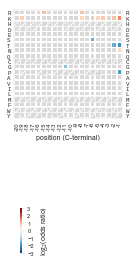

In [203]:
filenamePlot = os.path.join(plotsFolder, speciesSetName,
                            outputFilePrefix + "_composition_bias_aa_" + terminus + "terminal")
print(filenamePlot)
fig = plot_aa_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN,
                              speciesName=speciesSetName, terminus=terminus, width=1.5)
fig.savefig(filenamePlot + ".svg", dpi=800, bbox_inches="tight")
fig.savefig(filenamePlot + ".png", dpi=800, bbox_inches="tight")

### aa pair epistatis

In [175]:
oddsRatioDfTableAApair3.head()

aa-1                                                   R        K         H  \
terminus aa0 statistical_test observable                                      
C        R   contingency      BH_multiple_tests     True     True     False   
                              NexpectedSubseq        NaN      NaN       NaN   
                              count                  119      456        18   
                              log2OddsRatio      1.31738  2.01748 -0.208737   
                              oddsRatio          2.49214  4.04876  0.865294   

aa-1                                                     D         E  \
terminus aa0 statistical_test observable                               
C        R   contingency      BH_multiple_tests      False      True   
                              NexpectedSubseq          NaN       NaN   
                              count                     69        58   
                              log2OddsRatio     -0.0260725 -0.634304   
                              oddsRatio            0.98209  0.644251   

aa-1                                                    S         T         N  \
terminus aa0 statistical_test observable                                        
C        R   contingency      BH_multiple_tests     False      True      True   
                              NexpectedSubseq         NaN       NaN       NaN   
                              count                    93        36       130   
                              log2OddsRatio      0.282632 -0.853186  0.592484   
                              oddsRatio           1.21641  0.553561   1.50784   

aa-1                                                    Q         C         G  \
terminus aa0 statistical_test observable                                        
C        R   contingency      BH_multiple_tests     False     False      True   
                              NexpectedSubseq         NaN       NaN       NaN   
                              count                    40         9       115   
                              log2OddsRatio      -0.26928  0.229385  0.805524   
                              oddsRatio          0.829733   1.17233   1.74778   

aa-1                                                    P         A         V  \
terminus aa0 statistical_test observable                                        
C        R   contingency      BH_multiple_tests      True     False     False   
                              NexpectedSubseq         NaN       NaN       NaN   
                              count                    20        56        67   
                              log2OddsRatio     -0.879883  -0.28537 -0.192589   
                              oddsRatio          0.543411  0.820531  0.875034   

aa-1                                                     I         L  \
terminus aa0 statistical_test observable                               
C        R   contingency      BH_multiple_tests      False      True   
                              NexpectedSubseq          NaN       NaN   
                              count                    123        64   
                              log2OddsRatio      0.0607836 -0.919574   
                              oddsRatio            1.04303  0.528665   

aa-1                                                    M          F        W  \
terminus aa0 statistical_test observable                                        
C        R   contingency      BH_multiple_tests     False      False     True   
                              NexpectedSubseq         NaN        NaN      NaN   
                              count                    17         64       66   
                              log2OddsRatio     -0.598269 -0.0780036  2.26959   
                              oddsRatio          0.660546   0.947368  4.82186   

aa-1                                                    Y  
terminus aa0 statistical_test observable                   
C        R   contingency      BH_multiple_te

In [176]:
oddsRatioDf.head()

A            C  \
terminus position from terminus observable                                    
C        -20                    BH_multiple_tests         True         True   
                                count                     1990          351   
                                log2OddsRatio        -0.204546     0.352227   
                                oddsRatio             0.867811      1.27653   
                                pvalue             3.18088e-10  1.12143e-05   

                                                           D            E  \
terminus position from terminus observable                                  
C        -20                    BH_multiple_tests      False         True   
                                count                   2376         3310   
                                log2OddsRatio     -0.0045774     0.206388   
                                oddsRatio           0.996832       1.1538   
                                pvalue              0.890865  9.59005e-15   

                                                           F            G  \
terminus position from terminus observable                                  
C        -20                    BH_multiple_tests      False         True   
                                count                   2282         1786   
                                log2OddsRatio     -0.0453656    -0.321499   
                                oddsRatio           0.969044     0.800238   
                                pvalue              0.145576  1.80951e-21   

                                                           H          I  \
terminus position from terminus observable                                
C        -20                    BH_multiple_tests      False      False   
                                count                    642       4016   
                                log2OddsRatio     -0.0273615  0.0144548   
                                oddsRatio           0.981213    1.01007   
                                pvalue              0.649919   0.543045   

                                                             K          L  \
terminus position from terminus observable                                  
C        -20                    BH_multiple_tests         True      False   
                                count                     4677       4150   
                                log2OddsRatio          0.21954 -0.0282585   
                                oddsRatio              1.16436   0.980603   
                                pvalue             6.69893e-22   0.233037   

                                                           M           N  \
terminus position from terminus observable                                 
C        -20                    BH_multiple_tests      False        True   
                                count                    747        3003   
                                log2OddsRatio       0.104303  -0.0735224   
                                oddsRatio            1.07497    0.950315   
                                pvalue             0.0531688  0.00698063   

                                                           P          Q  \
terminus position from terminus observable                                
C        -20                    BH_multiple_tests      False       True   
                                count                   1200       1650   
                                log2OddsRatio     -0.0477191  0.0768669   
                                oddsRatio           0.967465    1.05473   
                                pvalue              0.266269  0.0345883   

                                                            R           S  \
terminus position from terminus observable                                  
C        -20                    BH_multiple_tests       False        True   
                                count                    1283        28

In [177]:
freq1 = oddsRatioDf.loc[('C', -1, 'count')].copy()
freq1 = freq1 / freq1.sum()
freq2 = oddsRatioDf.loc[('C', -2, 'count')].copy()
freq2 = freq2 / freq2.sum()

In [178]:
freq1

A     0.0305896
C    0.00467052
D     0.0458035
E     0.0794451
F      0.048185
G     0.0303353
H     0.0111445
I      0.076578
K      0.247306
L     0.0655723
M    0.00769942
N      0.101711
P    0.00656647
Q     0.0313988
R     0.0392601
S     0.0630058
T     0.0189595
V     0.0407861
W     0.0138497
Y     0.0371329
Name: (C, -1, count), dtype: object

In [76]:
rowList = []
for aa2 in aaTable:
    row = (freq2.loc[aa2]*freq1).to_frame().T[aaTable]
    row.index = [aa2]
    rowList.append(row)

df = pd.concat(rowList)
df.index.name = 'aa-2'
df.columns.name = 'aa-1'
df = df.stack()
df.index = df.index.map(lambda x: ''.join(x))
freqRel12ProductDf = df
freqRel12ProductDf.head()

RR     0.00152502
RK     0.00960635
RH    0.000432897
RD     0.00177919
RE     0.00308596
dtype: object

In [77]:
df1 = oddsRatioDfTableAApair3.loc[idx['C', :, 'contingency', 'count']]
df1.index = df1.index.droplevel([0, 2, 3])
df1.index.name = 'aa-2'
df1.columns.name = 'aa-1'

df1 = df1.stack()
df1.index = df1.index.map(lambda x: ''.join(x))
ctermSubseqFreq = df1
ctermSubseqFreq.head()

RR    119
RK    456
RH     18
RD     69
RE     58
dtype: object

In [78]:
ctermSubseqFreq.get('KX', 0)

0

In [79]:
binomial_chi_square_test(0.03*100, 100, 0.1)

0.019630657257290702

In [80]:
family_wise_FDR

0.05

In [81]:
subSeqList = ctermSubseqFreq.index
computeMultipleTestsCorrection = True

# This dataframe is organized with the list of subsequences as index
terminiList = ['C']
methodList = ['theoretical']
obsList = ['count','theoreticalProb','NexpectedSubseq','log2OddsRatio','oddsRatio','pvalue']
indexNameList = ['terminus','subseq','statistical_test','observable']
multiIndex = pd.MultiIndex.from_product([terminiList, subSeqList, methodList, obsList],
                                        names=indexNameList)
oddsRatioDf = pd.DataFrame(index=multiIndex, columns=['value'])
oddsRatioDf.sort_index(level=0, inplace=True)

# For amino acid pairs: this dataframe is organized with the first amino acid
# as row index and second amino acid as column index.
multiIndex = pd.MultiIndex.from_product([terminiList, aaTable, methodList, obsList],
                                        names=['terminus','aa0','statistical_test','observable'])
oddsRatioPairsDf = pd.DataFrame(index=multiIndex, columns=aaTable)
# It is better not to sort the dataframe because we want to keep the custom order for the aa table

i = 0
for terminus in ['C']:
    terminalSize = None
    observedFreq = None
    if terminus == 'C':
        terminalSize = cTerminalSize
        observedFreq = ctermSubseqFreq

    for subseq in subSeqList:

        i += 1
        NobservedSubseq = observedFreq.get(subseq, 0)
        NobservedTot = sum(observedFreq.values)
        theoreticalProb = freqRel12ProductDf.loc[subseq]    # !!!!!!!!!
        oddsRatio = ((NobservedSubseq/NobservedTot) / theoreticalProb) if theoreticalProb > 0 else None
        log2OddsRatio = log2(oddsRatio)
        pvalue = binomial_chi_square_test(NobservedSubseq, NobservedTot, theoreticalProb)

        oddsRatioDf.loc[terminus,subseq,'theoretical','count'] = NobservedSubseq
        oddsRatioDf.loc[terminus,subseq,'theoretical','theoreticalProb'] = theoreticalProb
        oddsRatioDf.loc[terminus,subseq,'theoretical','NexpectedSubseq'] = theoreticalProb*NobservedTot
        oddsRatioDf.loc[terminus,subseq,'theoretical','oddsRatio'] = oddsRatio
        oddsRatioDf.loc[terminus,subseq,'theoretical','log2OddsRatio'] = log2OddsRatio
        oddsRatioDf.loc[terminus,subseq,'theoretical','pvalue'] = pvalue

        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','count'),subseq[1]] = NobservedSubseq
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','theoreticalProb'),subseq[1]] = theoreticalProb
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','NexpectedSubseq'),subseq[1]] = theoreticalProb*NobservedTot
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','oddsRatio'),subseq[1]] = oddsRatio
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','log2OddsRatio'),subseq[1]] = log2OddsRatio
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','pvalue'),subseq[1]] = pvalue


if computeMultipleTestsCorrection:
    dfList = []
    for terminus in ['C']:
        # Multiple test correction within the biases of C-terminal at all positions for all a.a.
        df = oddsRatioDf.xs(terminus, level='terminus', drop_level=False)
        df = df.xs('pvalue', level='observable', drop_level=False)
        # We serialize all the values, and drop the NaN
        df2 = df.stack().dropna().copy()
        reject, pvals_corrected, alphacSidak, alphacBonf = \
            multipletests(df2.values, alpha=family_wise_FDR, method='fdr_bh',
                          is_sorted=False, returnsorted=False)
        df2 = pd.DataFrame(reject, index=df2.index)
        # Stack again the values before merging
        df2 = df2.unstack()
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename(index={'pvalue':'BH_multiple_tests'})
        dfList.append(df2)
    oddsRatioDf = pd.concat([oddsRatioDf] + dfList, axis=0, sort=True)
    oddsRatioDf.sort_index(inplace=True)

if computeMultipleTestsCorrection:
    dfList = []
    for terminus in ['C']:
        # Multiple test correction within the biases of C-terminal at all positions for all a.a.
        df = oddsRatioPairsDf.xs(terminus, level='terminus', drop_level=False)
        df = df.xs('pvalue', level='observable', drop_level=False)
        # We serialize all the values, and drop the NaN
        df2 = df.stack().dropna().copy()
        reject, pvals_corrected, alphacSidak, alphacBonf = \
            multipletests(df2.values, alpha=family_wise_FDR, method='fdr_bh',
                          is_sorted=False, returnsorted=False)
        df2 = pd.DataFrame(reject, index=df2.index)
        # Stack again the values before merging
        df2 = df2.unstack()
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename(index={'pvalue':'BH_multiple_tests'})
        dfList.append(df2)
    oddsRatioPairsDf = pd.concat([oddsRatioPairsDf] + dfList, axis=0, sort=True)
    oddsRatioPairsDf.sort_index(inplace=True)

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log2


In [82]:
oddsRatioAApairCtermNormDf = oddsRatioDf
oddsRatioAApairCtermNormDf.head()

value
terminus subseq statistical_test observable                
C        AA     theoretical      BH_multiple_tests    False
                                 NexpectedSubseq    44.7526
                                 count                   47
                                 log2OddsRatio      0.07069
                                 oddsRatio          1.05022

In [83]:
oddsRatioAApairCtermNormDfTable = oddsRatioPairsDf
oddsRatioAApairCtermNormDfTable.head()

A         C         D  \
terminus aa0 statistical_test observable                                       
C        A   theoretical      BH_multiple_tests    False     False      True   
                              NexpectedSubseq    44.7526   6.83297   67.0105   
                              count                   47         6        41   
                              log2OddsRatio      0.07069 -0.187551 -0.708763   
                              oddsRatio          1.05022  0.878095  0.611845   

                                                        E         F         G  \
terminus aa0 statistical_test observable                                        
C        A   theoretical      BH_multiple_tests     False      True     False   
                              NexpectedSubseq     116.228   70.4946   44.3805   
                              count                   108        46        32   
                              log2OddsRatio     -0.105928 -0.615879 -0.471854   
                              oddsRatio          0.929207  0.652532  0.721038   

                                                         H         I  \
terminus aa0 statistical_test observable                               
C        A   theoretical      BH_multiple_tests      False     False   
                              NexpectedSubseq      16.3044   112.034   
                              count                     16        96   
                              log2OddsRatio     -0.0271909 -0.222826   
                              oddsRatio           0.981329  0.856885   

                                                        K         L         M  \
terminus aa0 statistical_test observable                                        
C        A   theoretical      BH_multiple_tests      True      True     False   
                              NexpectedSubseq     361.809   95.9322   11.2643   
                              count                   458        70         9   
                              log2OddsRatio      0.340118  -0.45466 -0.323755   
                              oddsRatio           1.26586  0.729682  0.798988   

                                                        N        P         Q  \
terminus aa0 statistical_test observable                                       
C        A   theoretical      BH_multiple_tests     False     True      True   
                              NexpectedSubseq     148.803  9.60675   45.9365   
                              count                   137        0        66   
                              log2OddsRatio     -0.119229     -inf  0.522825   
                              oddsRatio          0.920679        0   1.43677   

                                                        R          S  \
terminus aa0 statistical_test observable                               
C        A   theoretical      BH_multiple_tests     False      False   
                              NexpectedSubseq     57.4375    92.1775   
                              count                    65         92   
                              log2OddsRatio      0.178446 -0.0027801   
                              oddsRatio           1.13166   0.998075   

                                                        T         V         W  \
terminus aa0 statistical_test observable                                        
C        A   theoretical      BH_multiple_tests     False     False      True   
                              NexpectedSubseq     27.7378   59.6701   20.2621   
                              count                    30        75         9   
                              log2OddsRatio      0.113109  0.329882  -1.17079   
                              oddsRatio           1.08156   1.25691  0.444178   

                                                        Y  
terminus aa0 statistical_test observable                   
C        A   theoretical      BH_multiple_tests     False  
                              Nexpected

In [84]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDf.csv")
oddsRatioAApairCtermNormDf.to_csv(filename)

filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDfTable.csv")
oddsRatioAApairCtermNormDfTable.to_csv(filename)

In [ ]:
filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDf.csv")
oddsRatioAApairCtermNormDf = pd.read_csv(filename, index_col=[0,1,2,3])

filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDfTable.csv")
oddsRatioAApairCtermNormDfTable = pd.read_csv(filename, index_col=[0,1,2,3])

In [85]:
oddsRatioAApairCtermNormDf.head()

value
terminus subseq statistical_test observable                
C        AA     theoretical      BH_multiple_tests    False
                                 NexpectedSubseq    44.7526
                                 count                   47
                                 log2OddsRatio      0.07069
                                 oddsRatio          1.05022

In [86]:
df = oddsRatioDfTableAApair3.loc[idx['C', :, 'contingency', 'count'], :]
countTot = df.sum().sum()
countTot

43250.0

In [87]:
oddsRatioAApairCtermNormDfTable.loc['C'].loc[idx['M', 'theoretical', 'oddsRatio'], 'M']

2.345460584738237

#### Plot

In [88]:
terminus = 'C'
statistical_test = 'theoretical'

In [89]:
plotData = compute_subseq_oddsratio_plot_data(oddsRatioAApairCtermNormDfTable, terminus, statistical_test)
maskData = compute_subseq_oddsratio_mask_data(oddsRatioAApairCtermNormDfTable, pvalueThresholds,
                                              terminus, statistical_test, subseq_type='aa')
pvalAnnotTable = compute_subseq_pvalueAnnotation(oddsRatioAApairCtermNormDfTable, pvalueThresholds,
                                                 terminus, statistical_test)

In [90]:
plotData.columns.name = 'aa1'

In [91]:
maskDataSmallN = maskData.copy()
maskDataSmallN.loc[:, :] = False
maskDataSmallN

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
aa0,,,,,,,,,,,,,,,,,,,,
A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
C,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
D,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
E,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
G,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
H,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
I,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
K,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
reload(cterminal)
from cterminal import plot_seq_pair_composition_map

In [92]:
set_fontsize_paper()

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy/taxaId_31969/taxaId_31969_subset_all_composition_bias_aa_pairs_Cterminal_CtermNorm


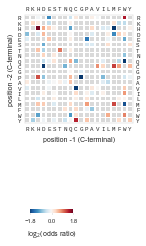

In [93]:
fig = plot_seq_pair_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                    statistical_test, plotTitle=None, subseq_type='aa', refCodonTableDf=refCodonTableDf,
                                    vmin1=-1.8, vmax1=1.8, width=1.5)
filenamePlot = os.path.join(plotsFolder, speciesSetName, outputFilePrefix +
                            "_composition_bias_aa_pairs_" + terminus + "terminal" + "_CtermNorm")
print(filenamePlot)
fig.savefig(filenamePlot + '.svg', dpi=800, bbox_inches="tight")
fig.savefig(filenamePlot + '.png', dpi=800, bbox_inches="tight")

### plot codon

In [138]:
oddsRatioDfCodon.head()

AAA    AAC   AAG  \
terminus position from terminus observable                                    
N        -1000000               count                        2      0     0   
                                log2OddsRatio         -10.8466    NaN   NaN   
                                oddsRatio          0.000543054    NaN   NaN   
                                pvalue                       0    NaN   NaN   
NaN      -20                    BH_multiple_tests         True  False  True   

                                                    AAT    ACA    ACC    ACG  \
terminus position from terminus observable                                     
N        -1000000               count                 0      0      0      0   
                                log2OddsRatio       NaN    NaN    NaN    NaN   
                                oddsRatio           NaN    NaN    NaN    NaN   
                                pvalue              NaN    NaN    NaN    NaN   
NaN      -20                    BH_multiple_tests  True  False  False  False   

                                                     ACT    AGA    AGC  ...   \
terminus position from terminus observable                              ...    
N        -1000000               count                  0      0      0  ...    
                                log2OddsRatio        NaN    NaN    NaN  ...    
                                oddsRatio            NaN    NaN    NaN  ...    
                                pvalue               NaN    NaN    NaN  ...    
NaN      -20                    BH_multiple_tests  False  False  False  ...    

                                                     TCG    TCT    TGA   TGC  \
terminus position from terminus observable                                     
N        -1000000               count                  0      0      0     0   
                                log2OddsRatio        NaN    NaN    NaN   NaN   
                                oddsRatio            NaN    NaN    NaN   NaN   
                                pvalue               NaN    NaN    NaN   NaN   
NaN      -20                    BH_multiple_tests  False  False  False  True   

                                                     TGG   TGT        TTA  \
terminus position from terminus observable                                  
N        -1000000               count                  0     0        221   
                                log2OddsRatio        NaN   NaN   -3.55548   
                                oddsRatio            NaN   NaN  0.0850537   
                                pvalue               NaN   NaN          0   
NaN      -20                    BH_multiple_tests  False  True      False   

                                                     TTC      TTG   TTT  
terminus position from terminus observable                               
N        -1000000               count                  0     2653     0  
                                log2OddsRatio        NaN  2.66342   NaN  
                                oddsRatio            NaN  6.33531   NaN  
                                pvalue               NaN        0   NaN  
NaN      -20                    BH_multiple_tests  False    False  True  

[5 rows x 64 columns]

In [113]:
oddsRatioDfCodon.loc['C'].loc[-1][['AAA', 'AAG']]

,AAA,AAG
observable,,
count,9074,1618
log2OddsRatio,1.64056,1.26763
oddsRatio,3.11786,2.40766
pvalue,0,1.78999e-203


In [147]:
plotData = compute_codon_oddsratio_plot_data(oddsRatioDfCodon, terminus)
maskData = compute_codon_oddsratio_mask_data(oddsRatioDfCodon, pvalueThresholds, terminus)
pvalAnnotTable = compute_codon_pvalueAnnotation(oddsRatioDfCodon, pvalueThresholds, terminus)
maskDataSmallN = compute_codon_smallN_mask_data(oddsRatioDfCodon, pvalueThresholds, terminus)

In [148]:
plotData.head()

position from terminus,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
AAA,0.192697,0.250744,0.248346,0.263872,0.319666,0.321202,0.337629,0.341049,0.390464,0.335346,0.355414,0.467106,0.549823,0.508756,0.578371,0.653820,0.804875,0.639681,0.782256,1.640557
AAC,-0.004471,-0.065445,0.063981,-0.025216,-0.035698,0.007840,-0.149319,-0.012734,0.005795,-0.004471,-0.002412,-0.010664,-0.129023,-0.122319,-0.095799,0.089347,0.201149,0.188528,0.375559,0.781252
AAG,0.296917,0.302157,0.274000,0.163437,0.239863,0.270443,0.286384,0.366986,0.395107,0.430737,0.517804,0.602985,0.664554,0.706480,0.683631,0.960279,1.237702,1.048111,1.107773,1.267629
AAT,-0.092366,-0.036811,-0.021465,-0.048418,-0.081762,-0.064023,-0.021465,-0.107061,-0.145772,-0.089045,-0.130040,-0.187553,-0.149212,-0.138229,-0.178408,-0.017650,0.115787,0.181735,0.590263,0.417231
ACA,-0.039148,-0.097845,-0.086563,-0.212079,-0.054788,-0.078556,-0.148848,-0.054788,-0.172461,-0.005299,-0.153877,-0.138841,-0.243829,-0.270812,-0.231402,-0.127249,-0.238491,-0.157239,-0.186123,-2.038914


In [155]:
maskData = oddsRatioDfCodon.copy()
maskData = maskData.xs(terminus, level='terminus')
maskData = select_terminal_positions_in_index(maskData, terminus)
# plotData = plotData.xs('BH_multiple_tests', level='observable')
maskData = maskData.xs('log2OddsRatio', level='observable')
maskData.iloc[:, :] = True
# Mask both rejected cases and null values
maskData = (maskData != True) & (maskData != 'True')
maskData = maskData.transpose()
maskData.head()

position from terminus,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
AAA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAC,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAG,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAT,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ACA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
maskDataSmallN.head()

position from terminus,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
AAA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAC,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAG,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AAT,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ACA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
# def sort_codon_index(df, refCodonTableDf, addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
#                      addEmptyRowBetweenGroups=False, addEmptyRowBetweenGroupsFillValue=np.nan, useULetter=True):
#     """Sort the codon index of the dataframe and group them by amino acid."""
    
#     aaTable = refCodonTableDf.sort_values('aa_groups_sorted_index')['aa'].unique()
#     # Sort codons following order defined in the reference codon table, grouping synomymous codons
#     sort_order = {codon:i for i, codon in
#                   enumerate(refCodonTableDf.sort_values(['aa_groups_sorted_index', 'alphabetical_sorted_index']).index)}
#     if len(df.index.unique().difference(refCodonTableDf.index)) > 0:
#         raise ValueError("DataFrame index contains a codon not found in the reference codon table index.")
    
#     plotDf = df
#     plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
#     plotDf = plotDf.sort_values('sort_index').drop('sort_index', axis=1)
#     plotDf.index.name = 'codon'
    
#     aaDict = refCodonTableDf['aa'].to_dict()
#     plotDf['aa'] = plotDf.index.map(lambda x: aaDict[x])
#     if addAminoAcidLetterToIndex:
#         plotDf.index = plotDf.index.map(lambda x: '{}/{}'.format(refCodonTableDf.loc[x, 'aa'], x))
#     if useULetter:
#         plotDf.index = plotDf.index.map(lambda x: x[:-3] + re.sub('T', 'U', x[-3:]))
#     if addEmptyRowBetweenGroups:
#         dfDict = {}
#         for aa, group in plotDf.groupby('aa'):
#             df = group.copy().append(pd.Series(addEmptyRowBetweenGroupsFillValue, index=group.columns, name=''))
#             dfDict[aa] = df
#         plotDf = pd.concat([dfDict[aa] for aa in aaTable if aa in dfDict.keys()])
#     if not addAminoAcidLetterAsColumn:
#         plotDf = plotDf.drop('aa', axis=1)

#     return plotDf

# df = oddsRatioDfCodon.T.iloc[:, 0:1].copy()
# sort_codon_index(df, refCodonTableDf, addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
#                      addEmptyRowBetweenGroups=False, addEmptyRowBetweenGroupsFillValue=np.nan, useULetter=True).index

In [151]:
reload(cterminal)
from cterminal import plot_codon_composition_map
reload(mwTools.bio)
from mwTools.bio import sort_codon_index

In [152]:
set_fontsize_paper()

In [153]:
FontProperties(size='medium').get_size()

7.0

/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

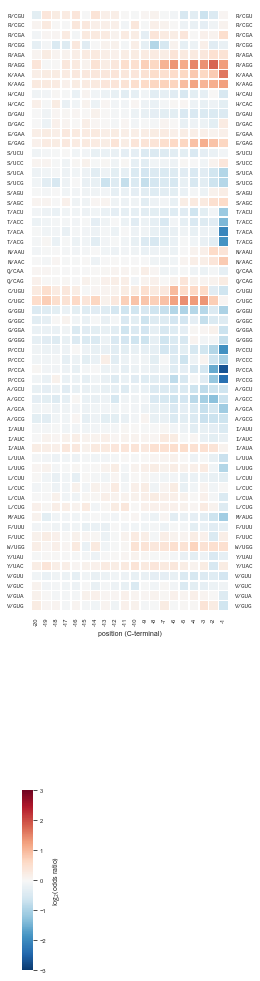

In [156]:
# Draw codon biases for all positions using heatmap
fig = plot_codon_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                 plotTitle, refCodonTableDf)
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_heatmap'
fig.savefig(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.png'), dpi=600, bbox_inches="tight")
fig.savefig(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.svg'), dpi=300, bbox_inches="tight")

In [157]:
set_fontsize_paper()
# matplotlib.rcParams['plot.linewidth']
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 0.5

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


/users/lserrano/mweber/Analysis_data/C-terminal/Data/Taxonomy/taxaId_31969/taxaId_31969_subset_all_composition_bias_codon_Cterminal_barplot.svg


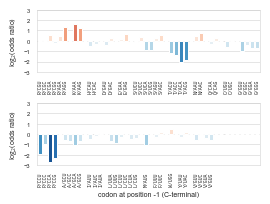

In [158]:
import seaborn as sns
sns.set_style('whitegrid')

def plot_codon_composition_cterm(data, maskData, pvalAnnotTable, maskDataSmallN, terminus, speciesName, refCodonTableDf):
    
    addEmptyRowBetweenGroups = True
    addEmptyRowBetweenGroupsFillValue = np.nan
    plotData = data.copy()
    nameIndex = plotData.index.name
    nameCol = plotData.columns.name
    stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

    plotData = plotData[-1]
    maskData = maskData[-1]
    maskDataSmallN = maskDataSmallN[-1]
    
    # Remove values that are not significant using mask
    plotData.loc[maskData[maskData].index] = np.nan
    plotData = plotData.to_frame()
    plotData = plotData.loc[plotData.index.map(lambda x: x not in stopCodonList)]
    plotData = sort_codon_index(plotData, refCodonTableDf,
                                addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                                addEmptyRowBetweenGroups=addEmptyRowBetweenGroups)
    plotData.index.name = nameIndex
    plotData.columns.name = nameCol
    plotData = plotData[-1]
#     print("plotData:\n", type(plotData), plotData)

    ylabel = '$\log_2$(odds ratio)'
    ymin, ymax = -3, 3

    n = 34
    n = 44
    plotDf1 = plotData.iloc[:n]
    plotDf2 = plotData.iloc[n+1:]
    m = n - len(plotDf2)
    plotDf2 = plotDf2.copy().append(pd.Series(m*[np.nan], index=m*['']))

    figsizeCoeff = 0.6
    aspectratio = 1.4
    imagesize = 4.0
    linewidth1 = 0.5
    figsize = (imagesize, imagesize/aspectratio)

    fig, axes = plt.subplots(2, 1, figsize=figsize)
    plt.subplots_adjust(hspace=0.5)
    w = 0.8
    
    for i, ax in enumerate(axes):
        if i == 0:
            plotDf3 = plotDf1
        elif i == 1:
            plotDf3 = plotDf2
        norm = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)
        colors = cmap(norm(plotDf3.values))
        plotDf3.plot.bar(ax=ax, width=w, color=colors)
        ax.set_ylabel(ylabel)
        ax.set_ylim(ymin, ymax)
        ax.xaxis.grid(False)
        family = 'Liberation Mono'
        ticks_font = FontProperties(family=family, size='x-small')
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(ticks_font)
            tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
        if i == 1:
            ax.set_xlabel('codon at position -1 (C-terminal)')
        ax.set_yticks(list(range(-3,4)))

    
    title = terminus + '-terminal, ' + speciesName
#     axes[0].set_title(title)
    return fig
               
#     ny = maskDataSmallN.shape[0]
#     hatch = '////' if figsizeCoeff > 1.1 else '///'
#     for (i,j), value in np.ndenumerate(maskDataSmallN.values):
#         if value:
#             ax.add_patch( matplotlib.patches.Rectangle((j, ny - 1 - i), 1, 1,
#                                                        edgecolor='w', facecolor=colorSmallN, hatch=hatch,
#                                                        linewidth=linewidth1) )



fig = plot_codon_composition_cterm(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                             plotTitle, refCodonTableDf)
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_barplot'
print(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.svg'))
fig.savefig(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.svg'), dpi=300, bbox_inches="tight")

### plot aa pair

In [159]:
cmap = get_divergent_color_map(name="RdBu_r")

In [160]:
freqBulk = oddsRatioDf.loc['bulk'].loc[0].loc['count']
freqBulk = freqBulk / freqBulk.sum()
freqBulk.sort_values()

C    0.00636876
W      0.010118
H     0.0151239
M     0.0160864
P      0.028652
R      0.029483
Q     0.0362426
Y     0.0409585
G     0.0510767
A     0.0526513
T     0.0535492
F     0.0543569
D     0.0551014
V     0.0573075
E     0.0670141
S     0.0691151
N     0.0727995
I     0.0920151
K     0.0943135
L     0.0976665
Name: count, dtype: object

In [161]:
df = oddsRatioDfTableAApair2.reorder_levels([0,2,3,1]).loc['bulk'].loc['theoretical'].loc['log2OddsRatio'].astype(float)
df.style.background_gradient(cmap=cmap)

aa1,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
aa0,,,,,,,,,,,,,,,,,,,,
R,0.347353,-0.0831331,0.109164,-0.000113622,0.074173,-0.204501,-0.0713025,-0.105162,0.0606686,-0.0810783,0.0163642,0.0100345,0.0232694,0.0670559,0.00745139,-0.0427704,0.327016,-0.037158,0.087046,0.0966359
K,-0.00168052,0.0144942,-0.0172922,0.132474,0.296894,-0.254213,0.188533,0.22745,0.086001,-0.52257,-0.345671,-0.0544568,-0.0871469,-0.0440054,0.0606022,-0.12852,-0.00178092,-0.373451,0.0232092,0.101793
H,0.136689,-0.192592,0.730491,-0.121996,-0.170698,-0.0728093,-0.189167,-0.112277,0.312112,0.214965,0.128236,0.506316,-0.0396103,-0.200989,-0.12345,0.116805,-0.0912224,0.129667,0.111681,0.0995729
D,-0.152574,-0.0216736,0.0205548,-0.102968,0.137105,-0.0585567,-0.329425,-0.197447,0.122443,-0.217264,-0.0488788,0.128647,-0.0820632,-0.0147565,-0.0941702,0.165772,-0.262968,0.29373,0.147175,0.248615
E,0.0205313,0.206401,-0.0747136,-0.231935,0.118726,-0.338117,-0.0992213,0.114445,0.134836,-0.390555,-0.269124,-0.353658,-0.0177795,0.0478321,0.19317,0.0598483,0.109407,-0.100041,-0.115341,-0.0839624
S,-0.0227613,-0.0095323,-0.0215349,-0.0385939,-0.0846452,0.202558,-0.04915,-0.0482491,0.0593471,0.0978039,0.162005,-0.145434,-0.127802,-0.141982,-0.102859,0.0748319,-0.14101,0.142665,0.124917,0.0335083
T,-0.0134584,-0.0137532,0.112594,-0.14567,-0.334775,0.0775678,0.220247,0.0352718,-0.14982,-0.348406,0.184823,0.355625,-0.104848,-0.0537415,0.0568035,-0.00567016,-0.0728419,-0.0166233,-0.0681195,-0.0369762
N,-0.167804,0.0697035,0.0948484,-0.0118898,-0.0266122,0.0110793,-0.274172,0.170864,0.313153,-0.25291,-0.146736,0.320863,-0.259327,-0.195923,-0.0865563,0.0735839,-0.397154,0.0623471,0.179056,0.171161
Q,0.16277,0.188798,-0.171319,-0.170855,0.124862,-0.283221,0.163197,0.104516,0.256037,-0.855405,-0.176136,-0.16285,0.0909827,-0.0891506,0.0910876,-0.0419301,0.163457,-0.303332,-0.0242489,-0.163594


In [162]:
df = oddsRatioDfTableAApair2.reorder_levels([0,2,3,1]).loc['bulk'].loc['theoretical'].loc['oddsRatio'].astype(float)
df.head()

aa1,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
aa0,,,,,,,,,,,,,,,,,,,,
R,1.272224,0.944005,1.078603,0.999921,1.052757,0.867839,0.951778,0.929701,1.042949,0.945351,1.011407,1.006980,1.016260,1.047577,1.005178,0.970789,1.254416,0.974573,1.062193,1.069277
K,0.998836,1.010097,0.988085,1.096172,1.228497,0.838444,1.139604,1.170763,1.061424,0.696131,0.786942,0.962957,0.941383,0.969958,1.042901,0.914770,0.998766,0.771934,1.016217,1.073106
H,1.099379,0.875032,1.659204,0.918916,0.888413,0.950785,0.877112,0.925127,1.241524,1.160676,1.092957,1.420419,0.972918,0.869954,0.917990,1.084330,0.938727,1.094042,1.080486,1.071456
D,0.899644,0.985089,1.014349,0.931116,1.099696,0.960224,0.795853,0.872092,1.088576,0.860195,0.966687,1.093268,0.944706,0.989824,0.936811,1.121766,0.833372,1.225805,1.107399,1.188066
E,1.014333,1.153806,0.949531,0.851492,1.085775,0.791073,0.933537,1.082559,1.097968,0.762836,0.829823,0.782597,0.987752,1.033710,1.143273,1.042356,1.078785,0.933006,0.923164,0.943463


In [163]:
[print(aa, df.loc[aa, aa]) for aa in ['C', 'H', 'M', 'W']]

C 2.030412741220943
H 1.6592042343850146
M 1.4884201077275219
W 1.4624440430925905


[None, None, None, None]

In [164]:
speciesSetName

'taxaId_31969'

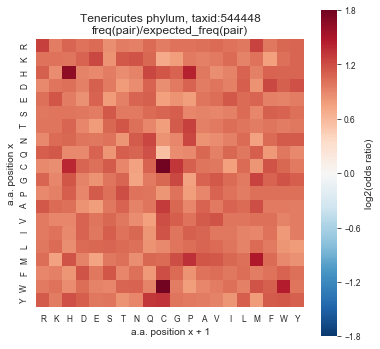

In [165]:
set_fontsize_screen()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df, cmap=cmap, vmin=-1.8, vmax=1.8, square=True, ax=ax, cbar_kws=dict(label='log2(odds ratio)'))
ax.set_ylabel("a.a. position x")
ax.set_xlabel("a.a. position x + 1")
# ax.set_title("bacterial kingdom, taxid:2\nfreq(pair)/expected_freq(pair)")
ax.set_title("Tenericutes phylum, taxid:544448\nfreq(pair)/expected_freq(pair)")
plt.savefig(Path(plotsFolder) / speciesSetName / (outputFilePrefix +
            "_composition_bias_aa_pairs_bulk_theoretical.svg"))

In [166]:
plotData = compute_subseq_oddsratio_plot_data(oddsRatioDfTableAApair2, terminus, statistical_test)
maskData = compute_subseq_oddsratio_mask_data(oddsRatioDfTableAApair2, pvalueThresholds,
                                              terminus, statistical_test, subseq_type='aa')
pvalAnnotTable = compute_subseq_pvalueAnnotation(oddsRatioDfTableAApair2, pvalueThresholds,
                                                 terminus, statistical_test)
maskDataSmallN = compute_subseq_smallN_mask_data(oddsRatioDfTableAApair2, pvalueThresholds,
                                                 terminus, statistical_test)

In [167]:
plotData.shape

(20, 20)

In [168]:
maskData.shape

(20, 20)

In [169]:
maskDataSmallN.shape

(20, 20)

In [170]:
reload(cterminal)
from cterminal import plot_seq_pair_composition_map

In [171]:
set_fontsize_paper()

In [172]:
FontProperties(size='medium').get_size()

7.0

In [173]:
FontProperties(size='small').get_size()

5.8309999999999995

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

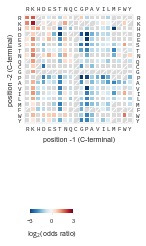

In [174]:
fig = plot_seq_pair_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                    statistical_test, plotTitle=None, subseq_type='aa', refCodonTableDf=refCodonTableDf,
                                    width=1.5)
statistical_test = 'contingency'
filenamePlot = os.path.join(plotsFolder, speciesSetName, outputFilePrefix +
                            "_composition_bias_aa_pairs_" + terminus + "terminal" + '_statistical_test_' +
                            statistical_test)
fig.savefig(filenamePlot + '.svg', dpi=600, bbox_inches="tight")
fig.savefig(filenamePlot + '.png', dpi=600, bbox_inches="tight")

### plot codon pair

In [ ]:
subseqOddsRatioDf = oddsRatioDfTableHexamer.copy()
maskData = subseqOddsRatioDf.xs('BH_multiple_tests', level='observable')
maskData = maskData.xs(terminus, level='terminus')
maskData = maskData.xs(statistical_test, level='statistical_test')
missingIndex = subseqOddsRatioDf.index.get_level_values(0).unique().difference(maskData.index)
maskData = maskData.append(
    [pd.Series(np.nan, index=subseqOddsRatioDf.columns, name=missingIndexName)
     for missingIndexName in missingIndex])
maskData = maskData.astype(bool)
maskData

In [ ]:
plotData = compute_subseq_oddsratio_plot_data(oddsRatioDfTableHexamer, terminus, statistical_test)
maskData = compute_subseq_oddsratio_mask_data(oddsRatioDfTableHexamer, pvalueThresholds,
                                              terminus, statistical_test, subseq_type='codon')
pvalAnnotTable = compute_subseq_pvalueAnnotation(oddsRatioDfTableHexamer, pvalueThresholds,
                                                 terminus, statistical_test)

In [ ]:
maskData

In [ ]:
maskDataSmallN = compute_subseq_smallN_mask_data(oddsRatioDfTableHexamer, pvalueThresholds,
                                                 terminus, statistical_test)

In [ ]:
for plotSynonymousCodonGroupSeparationLine in [True, False][:]:
    fig = plot_seq_pair_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                        statistical_test, plotTitle, subseq_type='codon',
                                        plotSynonymousCodonGroupSeparationLine=plotSynonymousCodonGroupSeparationLine,
                                        refCodonTableDf=refCodonTableDf);
    if plotSynonymousCodonGroupSeparationLine:
        suffix2 = '_withSynGroupLines'
    else:
        suffix2 = ''
    filenamePlot = os.path.join(plotsFolder, speciesSetName, outputFilePrefix +
                                "_composition_bias_hexamer_" + terminus + "terminal" + '_statistical_test_' +
                                statistical_test + suffix2 + ".png")
    print(filenamePlot)
    fig.savefig(filenamePlot, dpi=300, bbox_inches="tight")

## multiple test correction

In [ ]:
alpha_family_wise_error_rate = 0.05
reject, pvals_corrected, alphacSidak, alphacBonf = \
    multipletests(pvalueList, alpha=alpha_family_wise_error_rate, method='fdr_bh',
                  is_sorted=False, returnsorted=False)

## COG category

In [ ]:
COGList = ['U', 'J', 'Y', 'P', 'T', 'A', 'M', 'F', 'W', 'V', 'K', 'G', 'D', 'H', 'E', 'Q', 'B', 'Z', 'N', 'S', 'I', 'O', 'L', 'R', 'C']

In [ ]:
eggResDf3.rename(columns={'species_name_x':'species_name'}, inplace=True)

In [ ]:
eggResDf3.columns

In [ ]:
eggResDf3.head(3)

In [ ]:
taxonRank

In [ ]:
# Select genomes in the taxon group
eggResDf4 = eggResDf3
eggResDf4 = eggResDf4[eggResDf4[taxonRank + '_taxid'] == taxonId]
taxonAssemblyAccessionList = list(eggResDf4['genome_accession'].unique())
len(taxonAssemblyAccessionList)

In [ ]:
print(len(eggResDf3))
print(len(eggResDf4))

In [ ]:
groupIndex = 'J'
groupCDSDf = eggResDf4[eggResDf4['COG cat'] == groupIndex]
print(len(groupCDSDf))
sel = eggResDf4['COG cat'].str.contains(groupIndex) == True
groupCDSDf = eggResDf4[sel]
groupComplementCDSDf = eggResDf4[~sel]
print(len(groupCDSDf))
print(len(groupComplementCDSDf))

In [ ]:
groupCDSDf.columns

In [ ]:
refSeqPath

In [ ]:
analysisCtermDataPath / 'Species'

In [ ]:
analysisEggnogPath

In [ ]:
taxonSuffix

In [ ]:
outputPath = analysisEggnogPath / 'Analysis_COG_groups_cterminal_bias' / 'COG_{}'.format(groupIndex)

full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(analysisCtermDataPath / 'Species'),
                           dataSpeciesGroupFolder=str(outputPath),
                           plotsFolder=str(outputPath),
                           speciesSetName=taxonSuffix,
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=groupCDSDf,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=False,
                           codonAnalysis=True
                          )

In [ ]:
outputPath = analysisEggnogPath / 'Analysis_COG_groups_cterminal_bias' / 'COG_{}_complement'.format(groupIndex)

full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(analysisCtermDataPath / 'Species'),
                           dataSpeciesGroupFolder=str(outputPath),
                           plotsFolder=str(outputPath),
                           speciesSetName=taxonSuffix,
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=groupComplementCDSDf,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=False,
                           codonAnalysis=True
                          )

## Stop codon context

### Compute analysis downsampled data

In [ ]:
multispeciesAllCDSDf_nr_downsampled = multispeciesAllCDSDf_nr.sample(frac=0.5)

In [ ]:
len(multispeciesAllCDSDf_nr_downsampled)

In [ ]:
taxonSuffix + '_downsampled0.5'

In [ ]:
outputPath = analysisCtermDataPath / 'Taxonomy'
speciesSetName

full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(analysisCtermDataPath / 'Species'),
                           dataSpeciesGroupFolder=str(outputPath),
                           plotsFolder=str(outputPath),
                           speciesSetName=(taxonSuffix + '_downsampled0.5'),
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=multispeciesAllCDSDf_nr_downsampled,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=False,
                           codonAnalysis=True
                          )

### Import all bias data

In [21]:
analysisCtermDataPath

PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Data')

In [22]:
taxaDf[taxaDf['taxon_id'] == 1117]

,rank_index,rank_name,taxon_id,taxon_name,n_genomes_in_refseq,n_genomes_in_refseq_eggnog_common_species
3,1,phylum,1117.0,Cyanobacteria,62,31


In [ ]:
oddsRatioAATaxonList = []
oddsRatioCodonTaxonList = []
# oddsRatioAAPairTaxonList = []

subsetList = ['all', 'TAA', 'TAG', 'TGA']

i = 0
# for index, taxonGroup in taxaDf[:].iterrows():
for index, taxonGroup in taxaDf[taxaDf['taxon_id'] == 1117].iterrows():
    i += 1
    taxonRank = taxonGroup['rank_name']
    taxonName = taxonGroup['taxon_name']
    taxonId = int(taxonGroup['taxon_id'])
    taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
    print(i, "/", len(taxaDf), taxonSuffix)

    taxonAssemblyDf = assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf[taxonRank + '_taxid'] == taxonId]
    # Read nb of genomes for taxon
    taxonNGenomes = len(taxonAssemblyDf)

    taxonDirPath = analysisCtermDataPath / 'Taxonomy' / taxonSuffix
    if not taxonDirPath.is_dir():
        raise ValueError("taxon folder \"{}\" does not exist.".format(taxonDirPath))

        
    for stopCodon in subsetList:
        # Read total nb of sequences from statistics summary file for taxon
        taxonNSeq = None
        if stopCodon == 'all':
            subsetSuffix = '_subset_all_'
        else:
            subsetSuffix = '_subset_stopCodon_{}_'.format(stopCodon)
        multispeciesStatisticsSummaryDfPath = taxonDirPath / (taxonSuffix + subsetSuffix + 'multispeciesStatisticsSummary.csv')
        if multispeciesStatisticsSummaryDfPath.is_file():
            summaryDf = pd.read_csv(multispeciesStatisticsSummaryDfPath)
            if not summaryDf.empty:
                taxonNSeq = summaryDf['nSeq'].sum()

        # Import AA odds ratio dataframe for taxon
        oddsRatioDfPath = taxonDirPath / (taxonSuffix + subsetSuffix + 'oddsRatioAADf.csv')
        if oddsRatioDfPath.is_file():
            oddsRatioDf = pd.read_csv(oddsRatioDfPath)
            oddsRatioDf2 = oddsRatioDf#.copy()
            oddsRatioDf2['taxaid'] = taxonId
            oddsRatioDf2['taxon_name'] = taxonName
            oddsRatioDf2['taxon_rank'] = taxonRank
            oddsRatioDf2['n_seq'] = taxonNSeq
            oddsRatioDf2['n_genomes'] = taxonNGenomes
            oddsRatioDf2['stop_codon'] = stopCodon
            oddsRatioAATaxonList.append(oddsRatioDf2)
        else:
            print("ERROR: oddsRatioDfPath file not found", oddsRatioDfPath.name)

        # Import codon odds ratio dataframe for taxon
        oddsRatioDfPath = taxonDirPath / (taxonSuffix + subsetSuffix + 'oddsRatioDfCodon.csv')
        if oddsRatioDfPath.is_file():
            oddsRatioDf = pd.read_csv(oddsRatioDfPath)
            oddsRatioDf2 = oddsRatioDf#.copy()
            oddsRatioDf2['taxaid'] = taxonId
            oddsRatioDf2['taxon_name'] = taxonName
            oddsRatioDf2['taxon_rank'] = taxonRank
            oddsRatioDf2['n_seq'] = taxonNSeq
            oddsRatioDf2['n_genomes'] = taxonNGenomes
            oddsRatioDf2['stop_codon'] = stopCodon
            oddsRatioCodonTaxonList.append(oddsRatioDf2)
        else:
            print("ERROR: oddsRatioDfPath file not found", oddsRatioDfPath.name)


oddsRatioAATaxon = pd.concat(oddsRatioAATaxonList, sort=True)
oddsRatioAATaxon.set_index(['terminus', 'position from terminus', 'observable'], inplace=True)
oddsRatioCodonTaxon = pd.concat(oddsRatioCodonTaxonList, sort=True)
oddsRatioCodonTaxon.set_index(['terminus', 'position from terminus', 'observable'], inplace=True)
oddsRatioAATaxon.sort_index(inplace=True)
oddsRatioCodonTaxon.sort_index(inplace=True)

In [ ]:
df = oddsRatioCodonTaxonList[0]
df[df['position from terminus'] == 1000000].iloc[:, 50:]

In [ ]:
len(oddsRatioAATaxon)

In [ ]:
df = oddsRatioAATaxonList[0]
df[df['position from terminus'] == 1000000].iloc[:, 50:]

For some reason there is a missing `BH_multiple_tests` values for some phyla. for example, taxid_1117. The `terminus` value is corrupted. In these csv files, the terminus value is present as the last column. Maybe because of older results (they date from November 27, 2018). However, the `terminus` value is missing for the `BH_multiple_tests` row. This is the case in the CSV file (checked).

possible solution: reassign `terminus` based on the `position from terminus`.

Below, I remap the terminus values, and write again the full table.

In [ ]:
d = {x:'C' for x in list(range(-20,0))}
d.update({x:'N' for x in list(range(1,21))})
d.update({-1000000:'N', 0:'bulk', 1000000:'C'})
d

In [ ]:
oddsRatioCodonTaxon = oddsRatioCodonTaxon.reset_index()
oddsRatioCodonTaxon['terminus'].isnull().sum()

In [ ]:
print(len(oddsRatioCodonTaxon))

In [ ]:
oddsRatioCodonTaxon['terminus'] = oddsRatioCodonTaxon['position from terminus'].map(d)

In [ ]:
oddsRatioCodonTaxon.set_index(['terminus', 'position from terminus', 'observable'], inplace=True)

In [ ]:
oddsRatioCodonTaxon['observable'].unique()

In [ ]:
# drop rows that have NAN in every column for all codons.
oddsRatioCodonTaxon = oddsRatioCodonTaxon.dropna(subset=list(refCodonTableDf.index), how='all')
print(len(oddsRatioCodonTaxon))

In [ ]:
df = oddsRatioCodonTaxon
df = df[df['taxaid'] == 1224]
df = df[df['position from terminus'] == -1]
df

In [ ]:
if False:
    oddsRatioAATaxon.to_csv(analysisCtermDataPath / 'oddsRatioAATaxon.csv')
    oddsRatioCodonTaxon.to_csv(analysisCtermDataPath / 'oddsRatioCodonTaxon.csv')
#     oddsRatioAAPairTaxon.to_csv(analysisCtermDataPath / 'Taxonomy' / 'oddsRatioAAPairTaxon.csv')

In [ ]:
oddsRatioCodonTaxon = pd.read_csv(analysisCtermDataPath / 'oddsRatioCodonTaxon.csv', nrows=None, index_col=[0,1,2])
oddsRatioCodonTaxon.sort_index(inplace=True)
print(len(oddsRatioCodonTaxon))
oddsRatioCodonTaxon.head()

In [ ]:
oddsRatioCodonTaxon.loc['C'].loc[-1];

Importing a 2G csv file takes ages. We will store it in HDF5 format.

In [ ]:
with pd.HDFStore(str(analysisCtermDataPath / 'oddsRatioCodonTaxon.h5'), mode='w') as store:
    store['oddsRatioCodonTaxon'] = oddsRatioCodonTaxon

In [27]:
with pd.HDFStore(str(analysisCtermDataPath / 'oddsRatioCodonTaxon.h5'), mode='r') as store:
    oddsRatioCodonTaxon = store['oddsRatioCodonTaxon']
print(len(oddsRatioCodonTaxon))

2352490


In [28]:
oddsRatioCodonTaxon.set_index(['terminus', 'position from terminus', 'observable'], inplace=True)

In [29]:
oddsRatioCodonTaxon.head()

AAA   AAC   AAG    AAT  \
terminus position from terminus observable                                   
C        -20                    BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True  False   
                                BH_multiple_tests  True  True  True  False   

                                                     ACA   ACC    ACG    ACT  \
terminus position from terminus observable                                     
C        -20                    BH_multiple_tests   True  True   True  False   
                                BH_multiple_tests  False  True   True   True   
                                BH_multiple_tests   True  True   True  False   
                                BH_multiple_tests   True  True   True   True   
                                BH_multiple_tests   True  True  False   True   

                                                    AGA    AGC      ...       \
terminus position from terminus observable                          ...        
C        -20                    BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        

                                                    TTA    TTC   TTG    TTT  \
terminus position from terminus observable                                    
C        -20                    BH_multiple_tests  True   True  True   True   
                                BH_multiple_tests  True  False  True   True   
                                BH_multiple_tests  True   True  True  False   
                                BH_multiple_tests  True   True  True   True   
                                BH_multiple_tests  True   True  True  False   

                                                  n_genomes    n_seq  \
terminus position from terminus observable                             
C        -20                    BH_multiple_tests      1576  4871983   
                                BH_multiple_tests      1576  1836672   
                                BH_multiple_tests      1576   936585   
                                BH_multiple_tests      1576  2098684   
                                BH_multiple_tests       691  2165400   

                                                  stop_codon taxaid  \
terminus position from terminus observable                            
C        -20                    BH_multiple_tests        all      2   
                                BH_multiple_tests        TAA      2   
                                BH_multiple_tests        TAG      2   
                                BH_multiple_tests        TGA      2   
                                BH_multiple_tests        all   1224   

                                                       taxon_name  \
terminus position from terminus observable                          
C        -20                    BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests  Proteobacteria   

                                                     taxon_rank  
terminus position from terminus observable                       
C        -20                    BH_multiple_tests  superkingdom  
                                BH_multiple_tests  superkingdom  
                                BH_multiple_tests  superkingdom  
            

In [203]:
oddsRatioAATaxon = pd.read_csv(analysisCtermDataPath / 'oddsRatioAATaxon.csv', nrows=None)
print(len(oddsRatioAATaxon))

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2335583


In [ ]:
oddsRatioAATaxon

TODO: correct if needed oddsRatioAATaxon table, same way as the codon table above. Then write to HDF5 format.

### Plot codon biases

In [224]:
# taxonGroup = taxaDf[taxaDf['taxon_id'] == 1280].iloc[0]
# taxonGroup

# print("taxonGroupRef:", taxonGroup)
# taxonRank = taxonGroup['rank_name']
# taxonName = taxonGroup['taxon_name']
# taxonId = int(taxonGroup['taxon_id'])

# # Select genomes in the taxon group
# taxonAssemblyDf = assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf[taxonRank + '_taxid'] == taxonId]
# taxonAssemblyAccessionList = list(taxonAssemblyDf.index)

# taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
# print("output path:", str(analysisCtermDataPath / taxonSuffix))
# suffix = taxonSuffix


In [23]:
import seaborn as sns
sns.set_style('whitegrid')

plot codon bias for the 3 codon contexts.

In [24]:
terminus = 'C'
statistical_test = 'contingency'

In [25]:
statName = 'all'
dfFormatOutput = 'csv'
speciesSetName = taxonSuffix
outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + statName)
plotTitle = '{} {} {}'.format(taxonRank, taxonName, re.sub(r'_', r' ', outputFilePrefix))
speciesSetName

'taxaId_2'

In [30]:
oddsRatioCodonTaxon.head()

AAA   AAC   AAG    AAT  \
terminus position from terminus observable                                   
C        -20                    BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True   True   
                                BH_multiple_tests  True  True  True  False   
                                BH_multiple_tests  True  True  True  False   

                                                     ACA   ACC    ACG    ACT  \
terminus position from terminus observable                                     
C        -20                    BH_multiple_tests   True  True   True  False   
                                BH_multiple_tests  False  True   True   True   
                                BH_multiple_tests   True  True   True  False   
                                BH_multiple_tests   True  True   True   True   
                                BH_multiple_tests   True  True  False   True   

                                                    AGA    AGC      ...       \
terminus position from terminus observable                          ...        
C        -20                    BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        
                                BH_multiple_tests  True  False      ...        

                                                    TTA    TTC   TTG    TTT  \
terminus position from terminus observable                                    
C        -20                    BH_multiple_tests  True   True  True   True   
                                BH_multiple_tests  True  False  True   True   
                                BH_multiple_tests  True   True  True  False   
                                BH_multiple_tests  True   True  True   True   
                                BH_multiple_tests  True   True  True  False   

                                                  n_genomes    n_seq  \
terminus position from terminus observable                             
C        -20                    BH_multiple_tests      1576  4871983   
                                BH_multiple_tests      1576  1836672   
                                BH_multiple_tests      1576   936585   
                                BH_multiple_tests      1576  2098684   
                                BH_multiple_tests       691  2165400   

                                                  stop_codon taxaid  \
terminus position from terminus observable                            
C        -20                    BH_multiple_tests        all      2   
                                BH_multiple_tests        TAA      2   
                                BH_multiple_tests        TAG      2   
                                BH_multiple_tests        TGA      2   
                                BH_multiple_tests        all   1224   

                                                       taxon_name  \
terminus position from terminus observable                          
C        -20                    BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests        Bacteria   
                                BH_multiple_tests  Proteobacteria   

                                                     taxon_rank  
terminus position from terminus observable                       
C        -20                    BH_multiple_tests  superkingdom  
                                BH_multiple_tests  superkingdom  
                                BH_multiple_tests  superkingdom  
            

In [31]:
plotData = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
           .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)
plotData = plotData.xs(terminus, level='terminus')
plotData = select_terminal_positions_in_index(plotData, terminus)
plotDataTemp = plotData.copy()

In [266]:
# plotData.to_csv(analysisCtermDataPath / 'oddsRatioCodonTaxon_taxaId_2.csv')

In [32]:
plotData.xs('log2OddsRatio', level='observable').loc[-1]

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,stop_codon
position from terminus,,,,,,,,,,,,,,,,,,,,,
-1,1.45502,0.185648,0.779589,0.288478,-0.511378,-1.32289,-1.63726,-0.802509,1.24263,0.319846,...,0.238899,0.39357,-0.109323,-0.213098,-0.0180203,0.102137,-0.0616251,-0.524969,0.0832374,all
-1,1.55131,0.232382,1.26658,0.374393,-1.31151,-2.09353,-1.73563,-1.07142,1.06892,0.0165654,...,0.0723837,0.309546,-0.405192,0.144922,-0.168143,-0.0792,0.1338,-0.402319,0.213132,TAA
-1,1.6145,0.0166325,1.18059,0.297567,-0.862987,-1.80446,-1.43651,-0.820776,1.42268,0.214125,...,0.128262,0.681705,-0.531884,0.04579,0.102677,0.061261,-0.166365,-0.164196,0.23639,TAG
-1,1.11719,0.213708,-0.181898,0.078626,0.617179,-0.897764,-1.66614,-0.274741,1.47539,0.53796,...,0.671197,NaN,0.154971,-0.688177,0.142402,0.641371,-0.150502,-0.975846,-0.368551,TGA


In [33]:
oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
           .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)\
           .xs('BH_multiple_tests', level='observable')\
           .xs(-1, level='position from terminus')

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,stop_codon
terminus,,,,,,,,,,,,,,,,,,,,,
C,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,all
C,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,TAA
C,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,TAG
C,True,True,True,True,True,True,True,True,True,True,...,True,NaN,True,True,True,True,True,True,True,TGA


In [34]:
plotData = plotData.xs('log2OddsRatio', level='observable')
plotData = plotData.loc[-1].reset_index(drop=True).set_index('stop_codon')
plotData = plotData[plotData.columns].astype(float)
plotData = plotData.transpose()

In [35]:
maskData = plotDataTemp
maskData = maskData.xs('BH_multiple_tests', level='observable')
maskData = maskData.loc[-1].reset_index(drop=True).set_index('stop_codon')
# Mask both rejected cases and null values
maskData = (maskData != True) & (maskData != 'True')
maskData = maskData.transpose()
maskData.sum().sum()
# maskData.shape[0]*maskData.shape[1]

15

In [36]:
maskData

stop_codon,all,TAA,TAG,TGA
AAA,False,False,False,False
AAC,False,False,True,False
AAG,False,False,False,False
AAT,False,False,False,False
ACA,False,False,False,False
ACC,False,False,False,False
ACG,False,False,False,False
ACT,False,False,False,False
AGA,False,False,False,False
AGC,False,True,False,False


In the case of individual species, we decrease a lot the threshold of pvalue to plot the biases, otherwise we get very few significant biases.

In [ ]:
if False:
    maskData = plotDataTemp
    maskData = maskData.xs('pvalue', level='observable')
    maskData = maskData.loc[-1].reset_index(drop=True).set_index('stop_codon')
    # Mask both rejected cases and null values
    # maskData = (maskData != True) & (maskData != 'True')
    maskData = maskData < 1e-2
    maskData = maskData.transpose()
    maskData.sum().sum()

In [40]:
import seaborn as sns
sns.set_style('whitegrid')

addEmptyRowBetweenGroups = True
addEmptyRowBetweenGroupsFillValue = np.nan
plotData2 = plotData.copy()
nameIndex = plotData2.index.name
nameCol = plotData2.columns.name
stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

# Remove values that are not significant using mask
plotData2 = plotData2.where(~maskData, other=np.nan)
# plotData2 = plotData2.to_frame()
plotData2 = plotData2.loc[plotData2.index.map(lambda x: x not in stopCodonList)]
plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                             addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                             addEmptyRowBetweenGroups=addEmptyRowBetweenGroups)
plotData2.index.name = nameIndex
plotData2.columns.name = nameCol
plotData2 = plotData2.drop('all', axis=1)
plotData2.loc['N/AAC']
# print("plotData:\n", type(plotData), plotData)

stop_codon
TAA    0.232382
TAG         NaN
TGA    0.213708
Name: N/AAC, dtype: float64

In [41]:
plotData2.columns = [re.sub('T', 'U', col) for col in plotData2.columns]
plotData2.head()

,UAA,UAG,UGA
R/CGU,0.362795,0.525103,0.349839
R/CGC,0.118014,0.351280,0.734030
R/CGA,1.355864,1.743242,2.775695
R/CGG,0.456227,0.710066,-0.055614
R/AGA,1.068920,1.422678,1.475391


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


taxaId_2_subset_all_composition_bias_codon_Cterminal_barplot_stopCodonContext


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


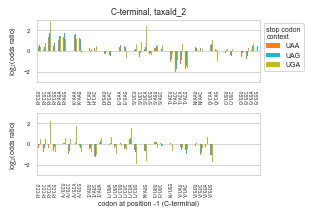

In [52]:
ylabel = '$\log_2$(odds ratio)'
ymin, ymax = -3, 3

n = 44
plotDf1 = plotData2.iloc[:n]
plotDf2 = plotData2.iloc[n+1:]
m = n - len(plotDf2)
emptyRow = plotData2.iloc[0].copy()
emptyRow[:] = np.nan
emptyRow.name = ''
plotDf2 = plotDf2.copy().append(m*[emptyRow])

set_fontsize_paper()
figsizeCoeff = 0.6
fontSize = 16
aspectratio = 1.4
imagesize = 4
linewidth1 = 0.5
figsize = (imagesize, imagesize/aspectratio)


fig, axes = plt.subplots(2, 1, figsize=figsize)
plt.subplots_adjust(hspace=0.5)
w = 0.6

for i, ax in enumerate(axes):
    if i == 0:
        plotDf3 = plotDf1
    elif i == 1:
        plotDf3 = plotDf2
#     norm = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)
#     colors = cmap(norm(plotDf3.values))
    plotDf3.plot.bar(ax=ax, width=w, linewidth=0, colors=paletteCat)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ymin, ymax)
    ax.xaxis.grid(False)
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family, size='x-small')
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    if i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='stop codon\ncontext')
    if i == 1:
        ax.set_xlabel('codon at position -1 (C-terminal)')
        ax.legend_.remove()


title = terminus + '-terminal, ' + speciesSetName
axes[0].set_title(title)
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_barplot_stopCodonContext'
print(filenamePlot)
# fig.savefig(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.svg'), dpi=400, bbox_inches="tight")

#### Add excluded overlapping start codon NNA-UGA

In [56]:
speciesSetName = 'TGA_non_overlapping_start_codon'
filename = (analysisCtermPath / 'overlapping_start_codon' / speciesSetName /
            '{}_subset_stopCodon_TGA_oddsRatioDfCodon.csv'.format(speciesSetName))
print(filename)
oddsRatioDfCodonOverlapping = pd.read_csv(filename, index_col=[0,1])
oddsRatioDfCodonOverlapping = oddsRatioDfCodonOverlapping.reset_index()\
                   .set_index(['terminus', 'position from terminus', 'observable']).sort_index()
oddsRatioDfCodonOverlapping.head(1)

/users/lserrano/mweber/Analysis_data/C-terminal/overlapping_start_codon/TGA_non_overlapping_start_codon/TGA_non_overlapping_start_codon_subset_stopCodon_TGA_oddsRatioDfCodon.csv


,,,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
terminus,position from terminus,observable,,,,,,,,,,,,,,,,,,,,,
C,-1000000,count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df = oddsRatioDfCodonOverlapping.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfCodonOverlapping = df.T.copy()

In [64]:
oddsRatioDfCodonOverlapping['stop_codon'] = 'UGA no start overlap'

In [65]:
oddsRatioDfCodonOverlapping.head(10)

AAA          AAC  \
terminus position from terminus observable                                    
C        -1000000               count                      NaN          NaN   
                                log2OddsRatio              NaN          NaN   
                                oddsRatio                  NaN          NaN   
                                pvalue                     NaN          NaN   
                                terminus                   NaN          NaN   
         -20                    BH_multiple_tests         True         True   
                                count                    24813        27951   
                                log2OddsRatio         0.283761    -0.171512   
                                oddsRatio              1.21736     0.887912   
                                pvalue             1.3614e-194  1.56538e-89   

                                                           AAG         AAT  \
terminus position from terminus observable                                   
C        -1000000               count                      NaN         NaN   
                                log2OddsRatio              NaN         NaN   
                                oddsRatio                  NaN         NaN   
                                pvalue                     NaN         NaN   
                                terminus                   NaN         NaN   
         -20                    BH_multiple_tests         True       False   
                                count                    38542       16841   
                                log2OddsRatio         0.112015  0.00262561   
                                oddsRatio              1.08074     1.00182   
                                pvalue             5.54769e-50     0.81282   

                                                           ACA          ACC  \
terminus position from terminus observable                                    
C        -1000000               count                      NaN          NaN   
                                log2OddsRatio              NaN          NaN   
                                oddsRatio                  NaN          NaN   
                                pvalue                     NaN          NaN   
                                terminus                   NaN          NaN   
         -20                    BH_multiple_tests         True         True   
                                count                     9199        46019   
                                log2OddsRatio         0.178584    -0.133748   
                                oddsRatio              1.13177      0.91146   
                                pvalue             4.91355e-31  6.25718e-88   

                                                          ACG         ACT  \
terminus position from terminus observable                                  
C        -1000000               count                     NaN         NaN   
                                log2OddsRatio             NaN         NaN   
                                oddsRatio                 NaN         NaN   
                                pvalue                    NaN         NaN   
                                terminus                  NaN         NaN   
         -20                    BH_multiple_tests        True        True   
                                count                   28412        7777   
                                log2OddsRatio      -0.0282119    0.115167   
                                oddsRatio            0.980635      1.0831   
                                pvalue             0.00107341  4.4334e-12   

                                                           AGA        AGC  \
terminus position from terminus observable                                  
C        -1000000               count                      NaN        NaN   
                                log2OddsRatio              NaN      

In [156]:
plotData = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
           .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)
plotData = pd.concat([plotData, oddsRatioDfCodonOverlapping])
plotData = plotData.xs(terminus, level='terminus')
plotData = select_terminal_positions_in_index(plotData, terminus)
plotDataTemp = plotData.copy()

In [157]:
plotData.xs('log2OddsRatio', level='observable').loc[-1]

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,stop_codon
position from terminus,,,,,,,,,,,,,,,,,,,,,
-1,1.45502,0.185648,0.779589,0.288478,-0.511378,-1.32289,-1.63726,-0.802509,1.24263,0.319846,...,0.238899,0.39357,-0.109323,-0.213098,-0.0180203,0.102137,-0.0616251,-0.524969,0.0832374,all
-1,1.55131,0.232382,1.26658,0.374393,-1.31151,-2.09353,-1.73563,-1.07142,1.06892,0.0165654,...,0.0723837,0.309546,-0.405192,0.144922,-0.168143,-0.0792,0.1338,-0.402319,0.213132,TAA
-1,1.6145,0.0166325,1.18059,0.297567,-0.862987,-1.80446,-1.43651,-0.820776,1.42268,0.214125,...,0.128262,0.681705,-0.531884,0.04579,0.102677,0.061261,-0.166365,-0.164196,0.23639,TAG
-1,1.11719,0.213708,-0.181898,0.078626,0.617179,-0.897764,-1.66614,-0.274741,1.47539,0.53796,...,0.671197,NaN,0.154971,-0.688177,0.142402,0.641371,-0.150502,-0.975846,-0.368551,TGA
-1,0.46374,0.45814,-0.204468,0.311231,-0.387048,-0.652191,-1.78815,-0.0196467,0.986246,0.787171,...,0.89399,NaN,0.398294,-0.52298,0.413462,-0.221984,0.0947938,-0.888877,-0.111094,UGA no start overlap


In [158]:
plotData = plotData.xs('log2OddsRatio', level='observable')
plotData = plotData.loc[-1].reset_index(drop=True).set_index('stop_codon')
plotData = plotData[plotData.columns].astype(float)
plotData = plotData.transpose()

In [145]:
plotDataCopy = plotData.copy()

In [146]:
maskData = plotDataTemp
maskData = maskData.xs('BH_multiple_tests', level='observable')
maskData = maskData.loc[-1].reset_index(drop=True).set_index('stop_codon')
# Mask both rejected cases and null values
maskData = (maskData != True) & (maskData != 'True')
maskData = maskData.transpose()
maskData.sum().sum()
# maskData.shape[0]*maskData.shape[1]

19

In [147]:
maskDataCopy = maskData.copy()

In [148]:
maskData.head(10)

stop_codon,all,TAA,TAG,TGA,UGA no start overlap
AAA,False,False,False,False,False
AAC,False,False,True,False,False
AAG,False,False,False,False,False
AAT,False,False,False,False,False
ACA,False,False,False,False,False
ACC,False,False,False,False,False
ACG,False,False,False,False,False
ACT,False,False,False,False,True
AGA,False,False,False,False,False
AGC,False,True,False,False,False


In [185]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

$^{\dagger}$UGA_False v.s. $^{\dagger}$UGA_True: t-test independent samples, P_val=1.183e-01 stat=-1.585e+00
UGA_False v.s. UGA_True: t-test independent samples, P_val=2.190e-08 stat=-6.462e+00
TGA_non_overlapping_start_codon_comparison_bias_NNA_codons


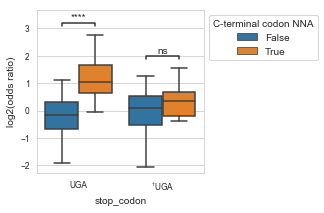

In [190]:
set_fontsize_screen()
df = plotData.copy()
df['NNA'] = df.index.map(lambda x: x[-1] == 'A')
df = df.rename(columns={'UGA no start overlap':'$^{\dagger}$UGA', 'TGA':'UGA'})
df = df[['UGA', '$^{\dagger}$UGA', 'NNA']]
df = df.melt(id_vars=['NNA'])#.reset_index(level=1)
df = df.rename(columns={'value':'log2(odds ratio)'})

fig, ax = plt.subplots(figsize=(3,3))
x = 'stop_codon'
y = 'log2(odds ratio)'
hue = 'NNA'
sns.boxplot(ax=ax, data=df, x=x, y=y, hue=hue)
ax, test_results = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                                   box_pairs=[(('UGA', True), ('UGA', False)),
                                              (('$^{\dagger}$UGA', True), ('$^{\dagger}$UGA', False))],
                                   test='t-test_ind', text_format='star', loc='inside',
                                        comparisons_correction=None, 
                                       verbose=2)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='C-terminal codon NNA')

speciesSetName = 'TGA_non_overlapping_start_codon'
outputFilePrefix = speciesSetName
plotsFolder = analysisCtermPath / 'overlapping_start_codon' / speciesSetName
filenamePlot = '{}_comparison_bias_NNA_codons'.format(speciesSetName)
print(filenamePlot)
fig.savefig(plotsFolder / (filenamePlot + '.svg'), dpi=400, bbox_inches="tight")
fig.savefig(plotsFolder / (filenamePlot + '.png'), dpi=400, bbox_inches="tight")

In [115]:
import seaborn as sns
sns.set_style('whitegrid')

addEmptyRowBetweenGroups = True
addEmptyRowBetweenGroupsFillValue = np.nan
plotData2 = plotData.copy()
nameIndex = plotData2.index.name
nameCol = plotData2.columns.name
stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

# Remove values that are not significant using mask
plotData2 = plotData2.where(~maskData, other=np.nan)
# plotData2 = plotData2.to_frame()
plotData2 = plotData2.loc[plotData2.index.map(lambda x: x not in stopCodonList)]
plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                             addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                             addEmptyRowBetweenGroups=addEmptyRowBetweenGroups)
plotData2.index.name = nameIndex
plotData2.columns.name = nameCol
plotData2 = plotData2.drop('all', axis=1)
plotData2.loc['N/AAC']
# print("plotData:\n", type(plotData), plotData)

stop_codon
TAA                     0.232382
TAG                          NaN
TGA                     0.213708
UGA no start overlap    0.458140
Name: N/AAC, dtype: float64

In [72]:
plotData2.columns = [re.sub('T', 'U', col) for col in plotData2.columns]
plotData2.head()

,UAA,UAG,UGA,UGA no start overlap
R/CGU,0.362795,0.525103,0.349839,0.538713
R/CGC,0.118014,0.351280,0.734030,0.993814
R/CGA,1.355864,1.743242,2.775695,1.558219
R/CGG,0.456227,0.710066,-0.055614,-0.166855
R/AGA,1.068920,1.422678,1.475391,0.986246


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


TGA_non_overlapping_start_codon_composition_bias_codon_Cterminal_barplot_stopCodonContext


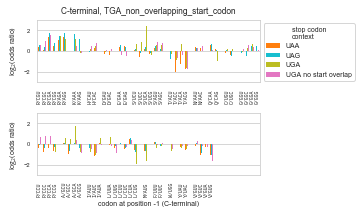

In [74]:
ylabel = '$\log_2$(odds ratio)'
ymin, ymax = -3, 3

n = 44
plotDf1 = plotData2.iloc[:n]
plotDf2 = plotData2.iloc[n+1:]
m = n - len(plotDf2)
emptyRow = plotData2.iloc[0].copy()
emptyRow[:] = np.nan
emptyRow.name = ''
plotDf2 = plotDf2.copy().append(m*[emptyRow])

set_fontsize_paper()
figsizeCoeff = 0.6
fontSize = 16
aspectratio = 1.4
imagesize = 4
linewidth1 = 0.5
figsize = (imagesize, imagesize/aspectratio)


fig, axes = plt.subplots(2, 1, figsize=figsize)
plt.subplots_adjust(hspace=0.5)
w = 0.6

for i, ax in enumerate(axes):
    if i == 0:
        plotDf3 = plotDf1
    elif i == 1:
        plotDf3 = plotDf2
#     norm = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)
#     colors = cmap(norm(plotDf3.values))
    plotDf3.plot.bar(ax=ax, width=w, linewidth=0, colors=paletteCat)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ymin, ymax)
    ax.xaxis.grid(False)
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family, size='x-small')
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    if i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='stop codon\ncontext')
    if i == 1:
        ax.set_xlabel('codon at position -1 (C-terminal)')
        ax.legend_.remove()


title = terminus + '-terminal, ' + speciesSetName
axes[0].set_title(title)

speciesSetName = 'TGA_non_overlapping_start_codon'
outputFilePrefix = speciesSetName
plotsFolder = analysisCtermPath / 'overlapping_start_codon' / speciesSetName
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_barplot_stopCodonContext'
print(filenamePlot)
fig.savefig(plotsFolder / (filenamePlot + '.svg'), dpi=400, bbox_inches="tight")

#### Heatmap version

- adapt code to make 1 block for each synonymous group.
- 2 rows of codons, as in the barplot.
- internal rows shows stop codon context, UAA, UAG, UGA.

In [149]:
plotData2 = plotDataCopy.copy()
maskData = maskDataCopy.copy()

nameIndex = plotData2.index.name
nameCol = plotData2.columns.name
stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

# Remove values that are not significant using mask
plotData2 = plotData2.where(~maskData, other=np.nan)
plotData2 = plotData2.loc[plotData2.index.map(lambda x: x not in stopCodonList)]
plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                             addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=True,
                             addEmptyRowBetweenGroups=False)
plotData2.index.name = nameIndex
plotData2.columns.name = nameCol
plotData2 = plotData2.drop('all', axis=1)
plotData2.loc['N/AAC']
# print("plotData:\n", type(plotData), plotData)
plotData2.columns = [re.sub('T', 'U', col) for col in plotData2.columns]

In [150]:
plotData2 = plotData2.rename(columns={'UGA no start overlap':'$^{\dagger}$UGA'})
cols = list(maskData.columns)
maskData.columns = cols[:-1] + ['$^{\dagger}$UGA']

In [151]:
aaTable1 = aaTable[:11]
aaTable2 = aaTable[11:]
aaTable1

['R', 'K', 'H', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G']

34
34 34
27 34
34 34
TGA_non_overlapping_start_codon_composition_bias_codon_Cterminal_stopCodonContext_heatmap


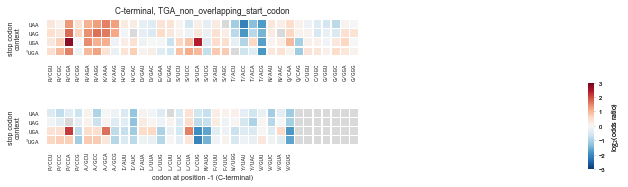

In [152]:
fontSizeLabels = FontProperties(size='small').get_size()

linewidth1 = 0.5
aspectratio = 1.5
figsize = (7, 3)
sns.set_style('whitegrid')

nmax = max(len(aaTable1), len(aaTable2))
nmax = max(plotData2['aa'].map(lambda x: x in aaTable1).sum(), plotData2['aa'].map(lambda x: x in aaTable2).sum())
print(nmax)
fig = plt.figure(figsize=figsize)
gsOuter = gridspec.GridSpec(2, 1, height_ratios = [1, 1])

axes = []
# for i, codon in enumerate(codonList):
for i, aaTable9 in enumerate([aaTable1, aaTable2]):

    gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsOuter[i])
    ax = fig.add_subplot(gs[0, 0])
    axes.append(ax)
    ax.set_facecolor(colorBackground1)
    plotData4 = plotData2[plotData2['aa'].map(lambda x: x in aaTable9)].drop('aa', axis=1)
    maskData4 = maskData
    maskData4.index = [re.sub('T', 'U', c) for c in maskData4.index]
    maskData4 = maskData.loc[plotData4.index.map(lambda x: x[2:])]
    maskData4.index = plotData4.index
    maskData4.columns = [re.sub('T', 'U', c) for c in maskData4.columns]
    maskData4 = maskData4[plotData4.columns]
    print(len(plotData4), nmax)
    if len(plotData4) < nmax:
        ndummy = nmax - len(plotData4)
        s = plotData4.iloc[:ndummy, :].copy()
        s.iloc[:] = np.nan
        s.index = ndummy*['']
        plotData4 = pd.concat([plotData4, s])
        s = maskData4.iloc[:ndummy, :].copy()
        s.iloc[:] = True
        s.index = ndummy*['']
        maskData4 = pd.concat([maskData4, s])
        print(len(plotData4), nmax)
    plotData4 = plotData4.T
    maskData4 = maskData4.T

    # Create axes for the colorbar for more precise positioning
    # vertical bar
    cbar_aspect = 1
    cbar_length = 0.4
    cbarLabel = '$\log_2$(odds ratio)'
    ax = seaborn.heatmap(plotData4, square=True, mask=maskData4, ax=ax, cmap=cmap,
                         cbar=True, vmin=-vmax, vmax=vmax, cbar_kws={"label":cbarLabel, 'aspect':15},
                         xticklabels=True, yticklabels=True,
                         linewidth=linewidth1, linecolor=colorHeatmapLine)
    cbar_ax = fig.axes[-1]
    cbar_ax.set_position([1.2, 0.5 - cbar_length, cbar_length/cbar_aspect, cbar_length])
    tickLength = FontProperties(size='small').get_size()/4
#         cbar_ax.xaxis.set_ticks([-vmax, 0, vmax1])
    cbar_ax.tick_params(axis='y', length=tickLength, color=colorAxis, labelsize='small')
    if i == 1:
        ax.set_xlabel('codon at position -1 (C-terminal)')
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family, size=fontSizeLabels)
    ax.set_ylabel('stop codon\ncontext')
    ax.tick_params(which='y', left=True, labelleft=True)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
#     stopCodonIndex = plotData4.columns.get_level_values(0)
#     tform = transforms.blended_transform_factory(ax.transData, ax.transAxes)
#     for yi, stopCodon in enumerate(stopCodonIndex):
#         ax.annotate(stopCodon, xy=(yi + 0.5, 1.0), xycoords=tform,
#                     xytext=(0, 6), textcoords='offset points', ha='center', va='bottom',
#                     rotation=90, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
#                     fontproperties=FontProperties(family=family, size=fontSizeLabels))
#     ax.tick_params(labelbottom=False)
#     ax.annotate(codon, xy=(0.5, 0.0), xycoords='axes fraction',
#                 xytext=(0, -6), textcoords='offset points', ha='center', va='top',
#                 rotation=0, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
#                 fontproperties=FontProperties(family=family, size=fontSizeLabels))


# ax.annotate('codon at ' + terminus + '-terminal', xy=(0.5, 0.06), xycoords='figure fraction', ha='center', va='top')
# ax.annotate('stop codon context', xy=(0.5, 0.95), xycoords='figure fraction', ha='center', va='bottom')

title = terminus + '-terminal, ' + speciesSetName
axes[0].set_title(title)

speciesSetName = 'TGA_non_overlapping_start_codon'
outputFilePrefix = speciesSetName
outputPath = analysisCtermPath / 'overlapping_start_codon' / speciesSetName
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_stopCodonContext_heatmap'
print(filenamePlot)
fig.savefig(outputPath / (filenamePlot + ".png"), dpi=500, bbox_inches="tight")
fig.savefig(outputPath / (filenamePlot + ".svg"), dpi=500, bbox_inches="tight")

### Plot codon biases for all phyla

plot codon bias for the 3 codon contexts.

In [ ]:
for taxonId in phylaList[:]:

    terminus = 'C'
    statistical_test = 'contingency'
    
    taxonGroup = taxaDf[taxaDf['taxon_id'] == taxonId].iloc[0]
    print("taxonGroupRef:", taxonGroup)
    taxonRank = taxonGroup['rank_name']
    taxonName = taxonGroup['taxon_name']
    taxonId = int(taxonId)
    taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
    print("output path:", str(analysisCtermDataPath / taxonSuffix))
    suffix = taxonSuffix

    statName = 'all'
    dfFormatOutput = 'csv'
    speciesSetName = taxonSuffix
    outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + statName)
    plotTitle = '{} {} {}'.format(taxonRank, taxonName, re.sub(r'_', r' ', outputFilePrefix))

    plotData = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
               .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)
    plotData = plotData.xs(terminus, level='terminus')
    plotData = select_terminal_positions_in_index(plotData, terminus)
    plotDataTemp = plotData.copy()

    plotData.xs('log2OddsRatio', level='observable').loc[-1]

    plotData.xs('log2OddsRatio', level='observable').loc[-1]

    plotData = plotData.xs('log2OddsRatio', level='observable')
    plotData = plotData.loc[-1].reset_index(drop=True).set_index('stop_codon')
    plotData = plotData[plotData.columns].astype(float)
    plotData = plotData.transpose()

    plotDataTemp.xs('BH_multiple_tests', level='observable')

    maskData = plotDataTemp
    maskData = maskData.xs('BH_multiple_tests', level='observable')
    maskData = maskData.loc[-1].reset_index(drop=True).set_index('stop_codon')
    # Mask both rejected cases and null values
    maskData = (maskData != True) & (maskData != 'True')
    maskData = maskData.transpose()

    addEmptyRowBetweenGroups = True
    addEmptyRowBetweenGroupsFillValue = np.nan
    plotData2 = plotData.copy()
    nameIndex = plotData2.index.name
    nameCol = plotData2.columns.name
    stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

    # Remove values that are not significant using mask
    plotData2 = plotData2.where(~maskData, other=np.nan)
    # plotData2 = plotData2.to_frame()
    plotData2 = plotData2.loc[plotData2.index.map(lambda x: x not in stopCodonList)]
    plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                                 addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                                 addEmptyRowBetweenGroups=addEmptyRowBetweenGroups)
    plotData2.index.name = nameIndex
    plotData2.columns.name = nameCol
    plotData2 = plotData2.drop('all', axis=1)
    plotData2.loc['N/AAC']
    # print("plotData:\n", type(plotData), plotData)

    ylabel = '$\log_2$(odds ratio)'
    ymin, ymax = -3, 3

    n = 44
    plotDf1 = plotData2.iloc[:n]
    plotDf2 = plotData2.iloc[n+1:]
    m = n - len(plotDf2)
    emptyRow = plotData2.iloc[0].copy()
    emptyRow[:] = np.nan
    emptyRow.name = ''
    plotDf2 = plotDf2.copy().append(m*[emptyRow])

    figsizeCoeff = 0.6
    fontSize = 16
    aspectratio = 1.4
    imagesize = 12
    linewidth1 = 1.0
    figsize = (figsizeCoeff*imagesize, figsizeCoeff*(imagesize/aspectratio))

    fig, axes = plt.subplots(2, 1, figsize=figsize)
    plt.subplots_adjust(hspace=0.5)
    w = 0.6

    for i, ax in enumerate(axes):
        if i == 0:
            plotDf3 = plotDf1
        elif i == 1:
            plotDf3 = plotDf2
    #     norm = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)
    #     colors = cmap(norm(plotDf3.values))
        plotDf3.plot.bar(ax=ax, width=w, linewidth=0, colors=paletteCat)
        ax.set_ylabel(ylabel)
        ax.set_ylim(ymin, ymax)
        ax.xaxis.grid(False)
        family = 'Liberation Mono'
        ticks_font = FontProperties(family=family, size=figsizeCoeff*fontSize)
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(ticks_font)
            tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
        if i == 0:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='stop codon\ncontext')
        if i == 1:
            ax.set_xlabel('codon at position -1 (C-terminal)')
            ax.legend_.remove()


    title = speciesSetName + ' ' + taxonName
    axes[0].set_title(title)

    filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_barplot_stopCodonContext'
#     fig.savefig(os.path.join(plotsFolder, speciesSetName, filenamePlot + '.png'), dpi=400, bbox_inches="tight")

### Combine plots in a grid

In [ ]:
import matplotlib.cbook as cbook
from math import ceil

In [ ]:
aspect = image.shape[1]/image.shape[0]
aspect

In [ ]:
phylaList2 = phylaList[:]
n = len(phylaList2)
ncol = 3
nrow = ceil(n / ncol)
w = 2.5
h = w/aspect
fig = plt.figure(figsize=(ncol*w, nrow*h))
gs = gridspec.GridSpec(nrow, ncol, wspace=0, hspace=0)
    
for i, taxonId in enumerate(phylaList2):
    irow = i // ncol
    icol = i % ncol
    ax = fig.add_subplot(gs[irow, icol])

    terminus = 'C'
    statistical_test = 'contingency'
    
    taxonGroup = taxaDf[taxaDf['taxon_id'] == taxonId].iloc[0]
    taxonRank = taxonGroup['rank_name']
    taxonName = taxonGroup['taxon_name']
    taxonId = int(taxonId)
    taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
    suffix = taxonSuffix
    statName = 'all'
    dfFormatOutput = 'csv'
    speciesSetName = taxonSuffix
    outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + statName)
    filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_barplot_stopCodonContext'
    filePath = Path(plotsFolder) / speciesSetName / (filenamePlot + '.png')
    print(filePath)
    
    # A sample image
    with cbook.get_sample_data(filePath) as image_file:
        image = plt.imread(image_file)

    ax.imshow(image)
    ax.axis('off')

filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_" + terminus + "terminal" +
                                                       '_stop_codon_context_all_grid' + ".png")
fig.tight_layout()
fig.savefig(filenamePlot, dpi=800)

### Compare codon biases for all phyla

#### Build phyla biases dataframe

In [ ]:
dfList = []
for taxonId in phylaList[:]:

    terminus = 'C'

    taxonGroup = taxaDf[taxaDf['taxon_id'] == taxonId].iloc[0]
    taxonId = int(taxonId)

    plotData = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
               .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)
    plotData = plotData.xs(terminus, level='terminus')
    plotData = select_terminal_positions_in_index(plotData, terminus)
    plotDataTemp = plotData.copy()

    plotData = plotData.xs('log2OddsRatio', level='observable')
    plotData = plotData.loc[-1].reset_index(drop=True).set_index('stop_codon')
    plotData = plotData[plotData.columns].astype(float)
    plotData = plotData.transpose()

    maskData = plotDataTemp
    maskData = maskData.xs('BH_multiple_tests', level='observable')
    maskData = maskData.loc[-1].reset_index(drop=True).set_index('stop_codon')
    # Mask both rejected cases and null values
    maskData = (maskData != True) & (maskData != 'True')
    maskData = maskData.transpose()

    addEmptyRowBetweenGroups = False
    addEmptyRowBetweenGroupsFillValue = np.nan
    plotData2 = plotData.copy()
    nameIndex = plotData2.index.name
    nameCol = plotData2.columns.name
    stopCodonList = list(refCodonTableDf[refCodonTableDf['aa'] == '*'].index)

    # Remove values that are not significant using mask
    plotData2 = plotData2.where(~maskData, other=np.nan)
    # plotData2 = plotData2.to_frame()
    plotData2 = plotData2.loc[plotData2.index.map(lambda x: x not in stopCodonList)]

    plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                                 addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                                 addEmptyRowBetweenGroups=addEmptyRowBetweenGroups)
    plotData2.index.name = nameIndex
    plotData2.columns.name = nameCol
    plotData2 = plotData2.drop('all', axis=1)

    plotData2['taxaid'] = taxonId
    plotData2
    dfList.append(plotData2)

oddsRatioCodonPhyla = pd.concat(dfList)

In [ ]:
oddsRatioCodonPhyla.head()

In [ ]:
oddsRatioCodonPhyla.index.name = 'codon'

In [ ]:
oddsRatioCodonPhyla2 = oddsRatioCodonPhyla.set_index('taxaid', append=True).reorder_levels(['taxaid', 'codon']).sort_index()
oddsRatioCodonPhyla2.head()

#### Select phyla with enough sequences

We select phyla for which we have at least X protein sequences.

In [168]:
df = oddsRatioCodonTaxon[['taxaid', 'taxon_name', 'n_seq', 'stop_codon']].reset_index(drop=True)
df = df[df['taxaid'].map(lambda x: x in phylaList)].drop_duplicates()
phylaDf = df
phylaDf

,taxaid,taxon_name,n_seq,stop_codon
4,1224,Proteobacteria,2165400,all
5,1224,Proteobacteria,756756,TAA
6,1224,Proteobacteria,368993,TAG
7,1224,Proteobacteria,1039649,TGA
8,1239,Firmicutes,756567,all
9,1239,Firmicutes,451749,TAA
10,1239,Firmicutes,147985,TAG
11,1239,Firmicutes,156833,TGA
16,201174,Actinobacteria,912659,all
17,201174,Actinobacteria,101831,TAA


In [169]:
phylaDfBig = phylaDf[phylaDf['n_seq'] > 2e4]
phylaDfBigList = list(phylaDfBig['taxaid'].unique())
print(len(phylaDfBigList))
phylaDfBigList

14


[1224,
 1239,
 201174,
 976,
 544448,
 1117,
 203691,
 1297,
 200918,
 1090,
 200795,
 57723,
 203682,
 74201]

In [170]:
phylaNameBigList = phylaDf.set_index('taxaid').loc[phylaDfBigList, 'taxon_name'].unique()
phylaNameBigList

array(['Proteobacteria', 'Firmicutes', 'Actinobacteria', 'Bacteroidetes',
       'Tenericutes', 'Cyanobacteria', 'Spirochaetes',
       'Deinococcus-Thermus', 'Thermotogae', 'Chlorobi', 'Chloroflexi',
       'Acidobacteria', 'Planctomycetes', 'Verrucomicrobia'], dtype=object)

In [ ]:
oddsRatioCodonPhyla3 = oddsRatioCodonPhyla2.loc[phylaDfBigList]
oddsRatioCodonPhyla3

In [ ]:
oddsRatioCodonTaxon.index.get_level_values('observable').unique()

In [ ]:
df = (oddsRatioCodonTaxon
#     .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)\
    .loc['C'].loc[-1].loc[['BH_multiple_tests', 'oddsRatio']][['CCT', 'CCC', 'CCA', 'CCG', 'taxaid', 'n_seq', 'taxon_name', 'stop_codon']]
)
df = df[df['taxaid'].map(lambda x: x in phylaDfBigList)]
len(df)

In [ ]:
df[df['stop_codon'] == 'TGA'].sort_values('taxon_name');

In [ ]:
df = df[df['stop_codon'] != 'all'].reset_index().sort_values(['taxon_name', 'stop_codon', 'observable'])
df.set_index('taxon_name').loc[['Firmicutes', 'Tenericutes', 'Thermotogae']]

In [ ]:
['Actinobacteria', 'Proteobacteria', 'Deinococcus-Thermus', 'Spirochaetes', 'Verrucomicrobia']

In [ ]:
df = (oddsRatioCodonTaxon
#     .drop(['taxaid', 'taxon_name', 'taxon_rank', 'n_seq', 'n_genomes'], axis=1)\
    .loc['C'].loc[-1].loc[['BH_multiple_tests', 'log2OddsRatio']][['CCT', 'CCC', 'CCA', 'CCG', 'taxaid', 'n_seq', 'taxon_name', 'stop_codon']]
)
df = df[df['taxaid'].map(lambda x: x in phylaDfBigList)]
len(df)
df

In [ ]:
df[df['stop_codon'] == 'TGA'].sort_values('taxon_name');

#### Correlation of TAG biases across phyla

In [162]:
oddsRatioDf = oddsRatioCodonTaxon.copy()
terminus = 'C'
terminusPos = -1

In [ ]:
oddsRatioDf = oddsRatioDf[oddsRatioDf['taxon_rank'] == 'phylum'].xs(terminusPos, level='position from terminus').xs(terminus, level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
                         .set_index('taxon_name', append=True).sort_index()
oddsRatioDf = oddsRatioDf.loc[oddsRatioDf.index.get_level_values('taxon_name').map(lambda x: x in phylaNameBigList)]

In [ ]:
oddsRatioDf = oddsRatioDf.set_index('stop_codon', append=True).loc[idx[:, :, ['TAA', 'TAG', 'TGA']], :].unstack(level=2)
oddsRatioDf.head(10)

In [ ]:
df = oddsRatioDf.loc[idx['log2OddsRatio', :], idx[['AAG', 'ACA'], 'TGA']]
df.columns = df.columns.droplevel(1)
df = df.astype(float)
df

In [ ]:
set_fontsize_paper()
fig, ax = plt.subplots(figsize=(3, 3))
# ax.set_aspect('equal')
# ax.set_xlim(-2, 2)
# ax.set_ylim(-2, 2)
# df.plot.scatter(ax=ax, x='AAG', y='ACA')
sns.regplot(data=df, x='AAG', y='ACA')
pearson = df.corr().iloc[0, 1]
print(pearson)
# ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.05, 0.92),
#             xycoords='axes fraction', ha='left', va='top', fontsize='medium',
#             bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
ax.set_xlabel('log2(odds ratio)\n(K)AAG-TGA')
ax.set_ylabel('log2(odds ratio)\n(T)ACA-TGA')
filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.correlation_AAG-ACA')
print(filenamePlot)
# fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")


Fig. S5B. Correlation between codon biases in the TGA stop codon context for (K)AAG-TGA and (T)ACA-TGA across the 14 phyla with more than 20k sequences. Biases are expressed as log2(odds ratio). Phyla that favor the codon AAG at the C-terminal in the TGA stop codon context also disfavor the codon ACA, and vice-versa. The pearson correlation is -0.87.


We take all phyla, not only the big ones.

In [ ]:
oddsRatioDf = oddsRatioCodonTaxon.copy()
terminus = 'C'
terminusPos = -1

In [ ]:
oddsRatioDf = oddsRatioDf[oddsRatioDf['taxon_rank'] == 'phylum'].xs(terminusPos, level='position from terminus').xs(terminus, level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
                         .set_index('taxon_name', append=True).sort_index()
# oddsRatioDf = oddsRatioDf.loc[oddsRatioDf.index.get_level_values('taxon_name').map(lambda x: x in phylaNameBigList)]

In [ ]:
oddsRatioDf = oddsRatioDf.set_index('stop_codon', append=True).loc[idx[:, :, ['TAA', 'TAG', 'TGA']], :].unstack(level=2)
oddsRatioDf.head(10)

In [ ]:
df = oddsRatioDf.loc[idx['log2OddsRatio', :], idx[['AAG', 'ACA'], 'TGA']]
df.columns = df.columns.droplevel(1)
df = df.astype(float)
df

In [ ]:
set_fontsize_paper()
fig, ax = plt.subplots(figsize=(4, 3))
# df.plot.scatter(ax=ax, x='AAG', y='ACA')
sns.regplot(data=df, x='AAG', y='ACA')
ax.set_xlabel('log2(odds ratio)\n(K)AAG-TGA')
ax.set_ylabel('log2(odds ratio)\n(T)ACA-TGA')

Correlation seem more noisy...

In [ ]:
oddsRatioDf = oddsRatioCodonTaxon.copy()
terminus = 'C'
terminusPos = -1

In [ ]:
oddsRatioDf = oddsRatioDf[oddsRatioDf['taxon_rank'] == 'phylum'].xs(terminusPos, level='position from terminus').xs(terminus, level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
                         .set_index('taxon_name', append=True).sort_index()
oddsRatioDf = oddsRatioDf.loc[oddsRatioDf.index.get_level_values('taxon_name').map(lambda x: x in phylaNameBigList)]

In [ ]:
oddsRatioDf = oddsRatioDf.set_index('stop_codon', append=True).loc[idx[:, :, ['TAA', 'TAG', 'TGA']], :].unstack(level=2)
oddsRatioDf.head()

In [ ]:
df = oddsRatioDf.loc[idx['log2OddsRatio', :], :].copy()
# df.columns = df.columns.droplevel(1)
df = df.astype(float)

In [ ]:
# remove all biases that are not significant
maskData = oddsRatioDf.loc['BH_multiple_tests']
maskData = (maskData != True) & (maskData != 'True')

maskData = ~(oddsRatioDf.loc[idx['pvalue', :], :] < 1e-2)

# or not
df = df.where(~maskData.values, other=np.nan)
df.head(20)

In [ ]:
# Exclude the stop codons at position -1
print(len(df.columns))
df = df[[col for col in df.columns if not col[0] in ['TAA', 'TAG', 'TGA']]]
print(len(df.columns))
df.columns.names = ['codon', 'stop_codon']
df.index = df.index.droplevel(0)
df.head()

In [ ]:
df2 = df.copy().T
df2 = df2.reset_index().set_index('codon')
print(len(df2.index))
df2 = sort_codon_index(df2, refCodonTableDf,
                       addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                       addEmptyRowBetweenGroups=False)
df2 = df2.set_index('stop_codon', append=True).T
df2.head(20)

We will also filter our correlation map to only include codons that show fairly strong biases. At least one bias that is stronger than 1 log2, and at least 6 data points with non-null values.

In [ ]:
colValid = df2.apply(lambda col: ((col.max() > 0.6) or (col.min() < -0.6)) & ((~col.isnull()).sum() >= 6), axis=0)
colValid.head()

In [ ]:
colValid.sum()

In [ ]:
# We could include or not the codon which are not valid, however the clustermap only works with non-null values.
df3 = df2.loc[:, colValid]
# df3 = df2.copy()
# for col, valid in colValid.iteritems():
#     if not valid:
#         print(col)
#         df3.loc[:, col] = np.nan
df3.head()

In [ ]:
61*3

In [ ]:
len(df3.columns)

In [ ]:
df3['C/TGT']['TAA']

In [ ]:
df3['R/CGT']['TGA']

In [ ]:
df3.corr().loc[df3.corr().isnull().apply(any, axis=1)]

In [ ]:
set_fontsize_paper()
data = df3.corr()
sns.clustermap(data, method='average', metric='euclidean', z_score=None, standard_scale=None,
               row_cluster=True, col_cluster=True, figsize=(16, 16), xticklabels=1, yticklabels=1)
fig = plt.gcf()
filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.correlation_clustermap')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

Plot only TGA stop codon context,

In [ ]:
set_fontsize_screen()
data = df2.loc[:, idx[:, 'TGA']].corr()
sns.clustermap(data, method='average', metric='euclidean', z_score=None, standard_scale=None,
               row_cluster=True, col_cluster=True, figsize=(16, 16), xticklabels=1, yticklabels=1)
fig = plt.gcf()
filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.correlation_clustermap.only_TGA')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")


Fig. S5C. Correlation map between codon biases in the TGA stop codon context across the 14 phyla with more than 20k sequences. Biases were expressed as log2(odds ratio). Pearson correlation was computed for biases in the 14 phyla for each codon pair. Codons were clustered using euclidean metric with the average method to compute distances between clusters. Correlations values ranged from -0.90 to 0.91.


In [ ]:
ddf = data.values
print(ddf[np.triu_indices(ddf.shape[0], k=1)].max())
print(ddf[np.triu_indices(ddf.shape[0], k=1)].min())

In [ ]:
motifList = []
for c in df.columns[:]:
    seq = ''.join(c)
    motif = dict()
    for m in ['ATG', 'GTG', 'CTG']:
        motif[m] = bool(re.search(m, seq))
        print(m, seq, bool(re.search(m, seq)))
    for N in 'GCAT':
        for pos in range(3):
            motif['{}{:1d}'.format(N, pos + 1)] = seq[pos] == N
    motifList.append(motif)

In [ ]:
# df.index = df.index.droplevel(0)
df.head()

In [ ]:
# df3 = pd.concat([df.T, pd.DataFrame(motifList, index=df.columns)], axis=1)
df3 = df.T
df3.head(20)

In [ ]:
set_fontsize_screen()
ymin, ymax = -4, +4
phylaList1 = ['Bacteroidetes', 'Acidobacteria', 'Cyanobacteria', 'Tenericutes', 'Firmicutes', 'Thermotogae',
              'Verrucomicrobia', 'Spirochaetes', 'Proteobacteria', 'Actinobacteria', 'Deinococcus-Thermus'][:]
nPhyla = len(phylaList1)
fig, axes = plt.subplots(nPhyla, 3, figsize=(7,3.7*nPhyla), gridspec_kw=dict(hspace=0.4))
for i, phylum in enumerate(phylaList1):
    df4 = df3[[phylum, 'ATG', 'GTG', 'CTG']]
    for j, motif in enumerate(['ATG', 'GTG', 'CTG']):
        ax = axes[i, j]
        ax.set_ylim(ymin, ymax)
        sns.boxplot(data=df4, y=phylum, x=motif, ax=ax)
        ax, testResultList = add_stat_annotation(ax, data=df4, y=phylum, x=motif,
                                         boxPairList=[(False, True)],
                                         test='t-test_ind', textFormat='star', loc='outside',
                                         lineYOffsetAxesCoord=0.010, lineYOffsetToBoxAxesCoord=0.005,
                                         textYOffsetPoints=0, verbose=2, linewidth=1)
        ax.set_xlabel("NNN-Stop contains {}".format(motif))
        if j == 0:
            ax.set_ylabel("{}\n\nlog2(odds ratio)".format(phylum))
        else:
            ax.set_ylabel("")

filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.boxplot_motif_ATGallPhyla')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [ ]:
set_fontsize_screen()
ymin, ymax = -4, +4
phylaList1 = ['Bacteroidetes', 'Acidobacteria', 'Cyanobacteria', 'Tenericutes', 'Firmicutes', 'Thermotogae',
              'Verrucomicrobia', 'Spirochaetes', 'Proteobacteria', 'Actinobacteria', 'Deinococcus-Thermus'][:]
nPhyla = len(phylaList1)
motifList = ['G1', 'C1', 'A1', 'T1', 'G2', 'C2', 'A2', 'T2', 'G3', 'C3', 'A3', 'T3']
nMotifs = len(motifList)

fig, axes = plt.subplots(nPhyla, nMotifs, figsize=(2*nMotifs, 3.5*nPhyla), gridspec_kw=dict(hspace=0.35))
for i, phylum in enumerate(phylaList1):
    for j, motif in enumerate(motifList):
        ax = axes[i, j]
        ax.set_ylim(ymin, ymax)
        sns.boxplot(data=df3, y=phylum, x=motif, ax=ax)
        ax, testResultList = add_stat_annotation(ax, data=df3, y=phylum, x=motif,
                                         boxPairList=[(False, True)],
                                         test='t-test_ind', textFormat='star', loc='outside',
                                         lineYOffsetAxesCoord=0.010, lineYOffsetToBoxAxesCoord=0.005,
                                         textYOffsetPoints=0, verbose=2, linewidth=1)
        ax.set_xlabel("NNN-Stop contains {}".format(motif))
        pos = int(motif[1]) - 1
        label = 'NNN'
        label = label[:pos] + motif[0] + label[pos + 1:] + '-Stop'
        print(label)
        ax.set_xlabel(label)
        if j == 0:
            ax.set_ylabel("{}\n\nlog2(odds ratio)".format(phylum))
        else:
            ax.set_ylabel("")

filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.boxplot_motif_NNNallPhyla')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [ ]:
df4 = df3.iloc[:, :-3].stack().reset_index().set_index(['codon', 'stop_codon'])
df4.head(20)

In [ ]:
motifList = []
for c in df4.index[:]:
    seq = ''.join(c)
    motif = dict()
    for m in ['ATG', 'GTG', 'CTG']:
        motif[m] = bool(re.search(m, seq))
    for N in 'GCAT':
        for pos in range(3):
            motif['{}{:1d}'.format(N, pos + 1)] = seq[pos] == N
    motifList.append(motif)
motifList
df5 = pd.concat([df4, pd.DataFrame(motifList, index=df4.index)], axis=1)
df5 = df5.rename(columns={'level_2':'phylum', 0:'value'})
df5.head(20)

In [ ]:
set_fontsize_screen()
ymin, ymax = -4, +4

motifList = df5.columns[2:]
motifList = ['ATG', 'GTG', 'CTG', 'G1', 'C1', 'A1', 'T1', 'G2', 'C2', 'A2', 'T2', 'G3', 'C3', 'A3', 'T3']
nMotifs = len(motifList)
fig, axes = plt.subplots(4, 4, figsize=(2*4,3.5*4), gridspec_kw=dict(hspace=0.35))

for j, motif in enumerate(motifList):
    print()
    if motif in ['ATG', 'GTG', 'CTG']:
        i = 0
        j1 = j
    elif re.search('1', motif):
        i = 1
        j1 = j - 3
    elif re.search('2', motif):
        i = 2
        j1 = j - 3 - 4
    elif re.search('3', motif):
        i = 3
        j1 = j - 3 - 4 - 4
    ax = axes[i, j1]
    sns.boxplot(data=df5, y='value', x=motif, ax=ax)
    ax, testResultList = add_stat_annotation(ax, data=df5, y='value', x=motif,
                                         boxPairList=[(False, True)],
                                         test='t-test_ind', textFormat='star', loc='outside',
                                         lineYOffsetAxesCoord=0.010, lineYOffsetToBoxAxesCoord=0.005,
                                         textYOffsetPoints=0, verbose=2, linewidth=1)
    if i == 0:
        ax.set_xlabel("NNN-Stop contains {}".format(motif))
    else:
        print(motif[1])
        print(motif[0])
        pos = int(motif[1]) - 1
        label = 'NNN'
        label = label[:pos] + motif[0] + label[pos + 1:] + '-Stop'
        print(label)
        ax.set_xlabel(label)
    ax.set_ylim(ymin, ymax)
    if j1 == 0:
        ax.set_ylabel("all phyla\n\nlog2(odds ratio)")
    else:
        ax.set_ylabel("")
axes[0, 3].axis('off')

filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                       '_stop_codon_context.boxplot_motif_allphyla')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [ ]:
df5.loc[idx[:, 'TGA'], :]

In [ ]:
reload(mwTools.plot)
reload(statannot)
from mwTools.plot import seaborn_boxplot_add_number_samples
from statannot import add_stat_annotation

In [ ]:
df6 = df5.loc[idx[:, 'TGA'], :]
print(len(df6[df6['A3']].index.get_level_values(0).unique()))
print(len(df6[df6['G3']].index.get_level_values(0).unique()))

data1 = df6.loc[df6['A3'], 'value']
data2 = df6.loc[df6['G3'], 'value']

stats.ttest_ind(a=data1, b=data2)

In [ ]:
data1.mean() - data2.mean()

In [ ]:
sns.distplot(data1)
sns.distplot(data2)

In [ ]:
data1B = 2**data1
data2B = 2**data2
stats.ttest_ind(a=data1B, b=data2B)

In [ ]:
data1B.mean() / data2B.mean()

In [ ]:
sns.distplot(data1)
sns.distplot(data2)

In [ ]:
set_fontsize_screen()
ymin, ymax = -4, +4

for stop in ['TAA', 'TAG', 'TGA'][:]:
    print("#######", stop)
    
    df6 = df5.loc[idx[:, stop], :]

    motifList = df6.columns[2:]
    includeATGMotifs = False
    if includeATGMotifs:
        motifList = ['ATG', 'GTG', 'CTG', 'G1', 'C1', 'A1', 'T1', 'G2', 'C2', 'A2', 'T2', 'G3', 'C3', 'A3', 'T3']
        nRows = 4
    else:
        motifList = ['G1', 'C1', 'A1', 'T1', 'G2', 'C2', 'A2', 'T2', 'G3', 'C3', 'A3', 'T3']
        nRows = 3
    nMotifs = len(motifList)
    nCols = 4
    fig, axes = plt.subplots(nRows, nCols, figsize=(2*nCols,3.5*nRows), gridspec_kw=dict(hspace=0.35))

    for j, motif in enumerate(motifList):
        print("##", motif)
        if motif in ['ATG', 'GTG', 'CTG']:
            i = 0
            j1 = j
        elif re.search('1', motif):
            i = 1 if includeATGMotifs else 0
            j1 = j - 3 if includeATGMotifs else j
        elif re.search('2', motif):
            i = 2 if includeATGMotifs else 1
            j1 = j - 3 - 4 if includeATGMotifs else j - 4
        elif re.search('3', motif):
            i = 3 if includeATGMotifs else 2
            j1 = j - 3 - 4 - 4 if includeATGMotifs else j - 4 - 4
        ax = axes[i, j1]
        ax.set_ylim(ymin, ymax)
        print(df6.head())
        sns.boxplot(data=df6, y='value', x=motif, ax=ax, fliersize=2)
        ax, testResultList = add_stat_annotation(ax, data=df6, y='value', x=motif,
                                             box_pairs=[(False, True)],
                                             test='t-test_ind', text_format='star', loc='outside',
                                             line_offset=0.010, line_offset_to_box=0.005,
                                             text_offset=0, verbose=2, linewidth=1)
#         seaborn_boxplot_add_number_samples(ax, df=df6, xlabel=motif, ylabel='value', order=None, position='top', yPosAxes=0.9,
#                                            fontsize='medium', color='black', text_rotation=0, verbose=1)
        if i == 0 and includeATGMotifs:
            ax.set_xlabel("NNN-Stop contains {}".format(motif))
        else:
            pos = int(motif[1]) - 1
            label = 'NNN'
            label = label[:pos] + motif[0] + label[pos + 1:] + '-Stop'
            print(label)
            ax.set_xlabel(label)
        if j1 == 0:
            ax.set_ylabel("all phyla\n\nlog2(odds ratio)")
        else:
            ax.set_ylabel("")
    if includeATGMotifs:
        axes[0, 3].axis('off')

    filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_C-terminal" +
                                                           '_stop_codon_context.boxplot_motif_allphyla_stopCodon_{}'.format(stop))
    print(filenamePlot)
#     fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

### Import phylo tree

In [ ]:
import ete3
from ete3 import PhyloTree, Tree, TreeStyle, TreeNode, TreeFace, NodeStyle

In [ ]:
phyloDataPath = p.databasesPath / 'Phylogenetic_tree_Lang2013'
phyloTreeName = 'Lang2013_pruned_phyla_tree'
phyloDataPath

In [ ]:
with (phyloDataPath / '{}.txt'.format(phyloTreeName)).open() as f:
    phyloTree5 = Tree(f.read())
phyloTree5

In [ ]:
ts = TreeStyle()
ts.scale = 300
ts.show_branch_length = False
ts.show_branch_support = False
phyloTree5.render("%%inline", tree_style=ts)

In [ ]:
phyloPhylaList = [n.name for n in phyloTree5.get_leaves()]
len(phyloPhylaList)

In [ ]:
phyloPhylaList

In [ ]:
plotPhylaSet = set(phylaNameBigList)

In [ ]:
len(plotPhylaSet)

In [ ]:
plotPhylaSet - set(phyloPhylaList)

In [ ]:
set(phyloPhylaList) - plotPhylaSet

Remove the 4 phyla that are in the phyloTree but not in the plot.

In [ ]:
len(phyloTree5.get_leaves())

In [ ]:
for n in phyloTree5.get_leaves():
    if n.name not in plotPhylaSet:
        print(n.name)
        n.delete()

In [ ]:
ts = TreeStyle()
ts.scale = 300
ts.show_branch_length = False
ts.show_branch_support = False
phyloTree5.render("%%inline", tree_style=ts)

In [ ]:
len(phyloTree5.get_leaves())

In [ ]:
phyloTree5Filename = str(phyloDataPath / 'phyloTree5_codon_bias.txt')
phyloTree5.write(outfile=phyloTree5Filename, format=0)

In [ ]:
from Bio import Phylo

In [ ]:
tree = Phylo.read(phyloTree5Filename, 'newick')

The parser cannot understand names with whitespace, so we correct them...

In [ ]:
# node = [n for n in tree.get_terminals() if n.name == 'Cloacimonetes'][0]
# node.name = 'Candidatus Cloacimonetes'

In [ ]:
leaves = tree.get_terminals()
leavesXPos = [tree.distance(n) for n in leaves]
nLeaves = len(leaves)
nLeaves

In [ ]:
leaves

The Biopython PhyloTree package chooses a different order for the sister leaves sometimes. We re-adjust the order of the phyla.

In [ ]:
phyloPhylaPlotList = [n.name for n in leaves]
len(phyloPhylaPlotList)

In [ ]:
len(set(phyloPhylaPlotList))

In [ ]:
len(plotPhylaSet)

In [ ]:
plotPhylaSet - set(phyloPhylaPlotList)

In [ ]:
set(phyloPhylaPlotList) - plotPhylaSet

In [ ]:
plotPhylaList = (
    phyloPhylaPlotList +
    list(plotPhylaSet - set(phyloPhylaPlotList)))
print(len(plotPhylaList))
plotPhylaList

check that the tree leaves correspond to the correct phyla in the heatmap plot rows.

In [ ]:
set_fontsize_screen()
fig, ax = plt.subplots(figsize=(12,8))

# Set line width of the tree, based on the default linewidth
lw = 0.7
tree.root.width = lw / plt.rcParams['lines.linewidth']

Phylo.draw(tree, axes=ax, do_show=False, show_confidence=False)
# Phylo.draw(tree, axes=ax, do_show=False, show_confidence=False, label_func=lambda x: None)
nLeaves = len(leavesXPos)
for i, x in enumerate(leavesXPos):
    y = i + 1
    ax.plot([x + 0.02, 1], [y, y], lw=lw, ls='--', c='0.4')
    ax.annotate(plotData.index[i], xy=(1.05, y), ha='left', va='center')
    
for j in range(nLeaves, len(plotPhylaList)):
    print(j)
    y = j + 1
    ax.annotate(plotData.index[j], xy=(1.05, y), ha='left', va='center')

ax.set_xlim(0, 1.2)
ax.set_ylim(0.5, len(plotPhylaList) + 0.5)

### Plot heatmap codon biases for phyla

In [ ]:
taxonNSeqDf = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxon_rank'] == 'phylum'].sort_values('taxon_name')\
              [['taxaid', 'taxon_name', 'n_seq', 'n_genomes', 'stop_codon']]\
              .drop_duplicates().reset_index(drop=True)
taxonNSeqDf = taxonNSeqDf.set_index(['taxon_name', 'stop_codon']).loc[plotPhylaList]
print(len(taxonNSeqDf))
taxonNSeqDf

In order to compute the small N, we have to apply the method to every case: taxaid, stop codon.

In [ ]:
df = oddsRatioCodonTaxon[oddsRatioCodonTaxon['taxaid'] == taxonId]\
.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank', 'taxon_name'], axis=1).set_index('stop_codon', append=True)
df = df.xs('TAA', level='stop_codon')
compute_codon_smallN_mask_data(df, pvalueThresholds, terminus);

In [ ]:
oddsRatioDf = oddsRatioCodonTaxon.copy()
terminus = 'C'
terminusPos = -1

In [ ]:
oddsRatioDf = oddsRatioDf[oddsRatioDf['taxon_rank'] == 'phylum'].xs(terminusPos, level='position from terminus').xs(terminus, level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
                         .set_index('taxon_name', append=True).sort_index()
oddsRatioDf = oddsRatioDf.loc[oddsRatioDf.index.get_level_values('taxon_name').map(lambda x: x in phylaNameBigList)]
oddsRatioDf.head(10)

In [ ]:
oddsRatioDf = oddsRatioDf.set_index('stop_codon', append=True).loc[idx[:, :, ['TAA', 'TAG', 'TGA']], :].unstack(level=2)
oddsRatioDf.head(10)

In [ ]:
plotData = oddsRatioDf.copy()
plotData = plotData.xs('log2OddsRatio', level='observable')
plotData = plotData[plotData.columns].astype(float)
print(len(plotData))
plotData = plotData.loc[plotPhylaList]
plotData.head()

In [ ]:
maskData = oddsRatioDf.xs('BH_multiple_tests', level='observable')
# Mask both rejected cases and null values
maskData = (maskData != True) & (maskData != 'True')
maskData = maskData.loc[plotPhylaList]
maskData.head()

In [ ]:
plotData.columns.names = ['codon', 'stop_codon']

In [ ]:
plotData2 = plotData.T.reset_index(level=1)
maskData2 = maskData.T.reset_index(level=1)
plotData2 = sort_codon_index(plotData2, refCodonTableDf,
                             addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                             addEmptyRowBetweenGroups=False)
plotData2 = plotData2.set_index('stop_codon', append=True)
plotData2 = plotData2.loc[idx[:, ['TAA', 'TAG', 'TGA']], :]
maskData2 = sort_codon_index(maskData2, refCodonTableDf,
                             addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False,
                             addEmptyRowBetweenGroups=False)
maskData2 = maskData2.set_index('stop_codon', append=True)
maskData2 = maskData2.loc[idx[:, ['TAA', 'TAG', 'TGA']], :]
plotData2.head(10)

In [ ]:
codonSortedList = plotData2.index.get_level_values(0).drop_duplicates()
codonSortedList

In [ ]:
codonSortedDict = dict(zip(codonSortedList, range(len(codonSortedList))))
stopSortedDict = {'TAA':0, 'TAG':1, 'TGA':2}

In [ ]:
plotData12 = plotData2.reset_index()
plotData12['sort_codon'] = plotData12['codon'].map(codonSortedDict)
plotData12['sort_stop'] = plotData12['stop_codon'].map(stopSortedDict)
plotData12 = plotData12.sort_values(['sort_codon', 'sort_stop']).set_index(['codon', 'stop_codon'])
plotData12.head()

In [ ]:
maskData12 = maskData2.loc[plotData12.index]
maskData12.head()

In [ ]:
plotData3 = plotData12.T
maskData3 = maskData12.T

In [ ]:
codonList = ['R/CGA', 'R/AGA', 'R/AGG', 'K/AAA', 'K/AAG', 'T/ACU', 'T/ACC', 'T/ACA', 'T/ACG',
             'P/CCU', 'P/CCC', 'P/CCA', 'P/CCG']

Order taxa following nb of sequences in the all category.

In [ ]:
# taxaOrder = taxonNSeqDf.xs('all', level='stop_codon').sort_values('n_seq', ascending=False).index
taxaOrder = plotPhylaList

In [ ]:
taxonNSeqDf2 = taxonNSeqDf.loc[idx[:, 'all'], :].reset_index(level=1, drop=True).reset_index().set_index('taxon_name').loc[taxaOrder]
taxonNSeqDf2

In [ ]:
plotData3 = plotData3.loc[taxaOrder, codonList]
maskData3 = maskData3.loc[taxaOrder, codonList]

In [ ]:
plotData3.columns.set_levels(['UAA', 'UAG', 'UGA'], level='stop_codon', inplace=True)
maskData3.columns.set_levels(['UAA', 'UAG', 'UGA'], level='stop_codon', inplace=True)

In [ ]:
plotData3.head()

In [ ]:
import matplotlib.transforms as transforms

In [ ]:
set_fontsize_paper()

In [ ]:
FontProperties(size='medium').get_size()

In [ ]:
FontProperties(size='small').get_size()

In [ ]:
vmax

In [ ]:
fontSizeLabels = FontProperties(size='small').get_size()

linewidth1 = 0.5
aspectratio = 1.5
n = len(codonList)
figsize = (7, 1.45)
sns.set_style('whitegrid')

fig = plt.figure(figsize=figsize)
gsOuter = gridspec.GridSpec(1, 3, width_ratios = [0.5, n, 1], wspace=0.1)
gs = gridspec.GridSpecFromSubplotSpec(1, n, subplot_spec=gsOuter[1], width_ratios=n*[1], wspace=0.2)


ax = fig.add_subplot(gsOuter[0])
# Phylo.draw(tree, axes=ax, do_show=False, show_confidence=False)
Phylo.draw(tree, axes=ax, do_show=False, show_confidence=False, label_func=lambda x: None)
nLeaves = len(leavesXPos)
for i, x in enumerate(leavesXPos):
    y = i + 1
    ax.plot([x + 0.02, 1], [y, y], lw=lw, ls='--', c='0.4')
#         ax.annotate(plotData.index[i], xy=(1.05, y), ha='left', va='center')
ax.set_ylim(0.5, len(plotPhylaList) + 0.5)
ax.set_xlim(0, 0.4)
ax.axis('off')
ax.annotate('phylum', xy=(0, 0.5), xytext=(-5, 0), xycoords='axes fraction', textcoords='offset points',
            ha='right', va='center', rotation=90)


for i, codon in enumerate(codonList):
        
    ax = fig.add_subplot(gs[0, i])
    ax.set_facecolor(colorBackground1)
    plotData4 = plotData3.loc[:, [codon]][::-1]
    maskData4 = maskData3.loc[:, [codon]][::-1]
    if i == 0:
        # Create axes for the colorbar for more precise positioning
        # vertical bar
        cbar_aspect = 1
        cbar_length = 0.4
        cbarLabel = '$\log_2$(odds ratio)'
        ax = seaborn.heatmap(plotData4, square=True, mask=maskData4, ax=ax, cmap=cmap,
                             cbar=cbar_ax, vmin=-vmax, vmax=vmax, cbar_kws={"label":cbarLabel, 'aspect':15},
                             xticklabels=True, yticklabels=True,
                             linewidth=linewidth1, linecolor=colorHeatmapLine)
        cbar_ax = fig.axes[-1]
        cbar_ax.set_position([0.5, -0.3 - cbar_length, cbar_length/cbar_aspect, cbar_length])
        tickLength = FontProperties(size='small').get_size()/4
#         cbar_ax.xaxis.set_ticks([-vmax, 0, vmax1])
        cbar_ax.tick_params(axis='y', length=tickLength, color=colorAxis, labelsize='small')
    else:
        ax = seaborn.heatmap(plotData4, square=True, mask=maskData4, ax=ax, cmap=cmap,
                             cbar=False, vmin=-vmax, vmax=vmax,
                             xticklabels=True, yticklabels=True,
                             linewidth=linewidth1, linecolor=colorHeatmapLine)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('')
#         ax.tick_params(which='y', reset=True, left=True, labelleft=True)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(FontProperties(size=0.8*fontSizeLabels))
            tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    else:
        ax.set_ylabel('')
        ax.tick_params(labelleft=False)
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family, size=fontSizeLabels)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    stopCodonIndex = plotData4.columns.get_level_values(1)
    tform = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    for yi, stopCodon in enumerate(stopCodonIndex):
        ax.annotate(stopCodon, xy=(yi + 0.5, 1.0), xycoords=tform,
                    xytext=(0, 6), textcoords='offset points', ha='center', va='bottom',
                    rotation=90, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
                    fontproperties=FontProperties(family=family, size=fontSizeLabels))
    ax.tick_params(labelbottom=False)
    ax.annotate(codon, xy=(0.5, 0.0), xycoords='axes fraction',
                xytext=(0, -6), textcoords='offset points', ha='center', va='top',
                rotation=0, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
                fontproperties=FontProperties(family=family, size=fontSizeLabels))


ax.annotate('codon at ' + terminus + '-terminal', xy=(0.5, 0.06), xycoords='figure fraction', ha='center', va='top')
ax.annotate('stop codon context', xy=(0.5, 0.95), xycoords='figure fraction', ha='center', va='bottom')

ax = fig.add_subplot(gsOuter[-1])
colorNBar = sns.color_palette()[7]
colorNBar = '0.5'
print(len(taxonNSeqDf))
with sns.axes_style('ticks'):
    df = taxonNSeqDf2['n_seq']
    ax.barh(range(len(df)), df.values, height=0.7, color=[colorNBar for _ in range(len(taxonNSeqDf2))])
    ax.set_ylim(-0.5, len(df) - 0.5)
    ax.set_xlabel('nb of protein\nsequences')
    ax.set_xscale('log')
    ax.set_xlim(1e3, 2.5e6)
#         ax.set_xticks([1e3, 1e4, 1e5, 1e6])
    ax.set_xticks([1e3, 1e6])
    ax.set_xticks([1e4, 1e5], minor = True)
    ax.tick_params(axis='x', bottom=True, color='0.8', direction='in', which='both', size=fontSizeLabels)
    ax.tick_params(axis='x', which='minor', labelbottom=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_ylabel('')
#     sns.despine(ax=ax)
    ax.grid(False)

# fig.tight_layout()
filenamePlot = analysisCtermPath / 'Taxonomic_tree' / ("phyla_composition_bias_codon_" + terminus + "terminal" +
                                                       '_stop_codon_context')
print(filenamePlot)

# plotTitle = 'C-terminal biases by phyla'

# fig.savefig(str(filenamePlot) + ".png", dpi=500, bbox_inches="tight")
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

# 3rd nucleotide frequency

In [ ]:
oddsRatioDf = oddsRatioCodonTaxon.copy()

In [ ]:
oddsRatioDf = oddsRatioDf[oddsRatioDf['taxon_rank'] == 'phylum']\
              .xs(0, level='position from terminus').xs('bulk', level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
                         .set_index('taxon_name', append=True).sort_index()
oddsRatioDf = oddsRatioDf.loc[oddsRatioDf.index.get_level_values('taxon_name').map(lambda x: x in phylaNameBigList)]
oddsRatioDf = oddsRatioDf[oddsRatioDf['stop_codon'] == 'all'].drop('stop_codon', axis=1)

In [ ]:
oddsRatioDf.head(20)

In [ ]:
df = oddsRatioDf.T
df['N3'] = df.index.map(lambda x: x[-1])
df = df.groupby('N3').sum()
df = df/df.sum()
baseFreqDf = df.T.loc['count']
baseFreqDf

In [ ]:
df6 = df5.loc[idx[:, 'TGA'], :]
df6 = df6.set_index('phylum', append=True)
df7 = df6[df6['G3']]['value']
df7

In [ ]:
df8 = df7.reorder_levels([2,0,1]).sort_index().reset_index()
df8.head()

In [ ]:
df8['phylum']

In [ ]:
baseFreqDf

In [ ]:
ax = sns.barplot(data=df8, x='phylum', y='value')

n = len(baseFreqDf)
ax.plot(np.arange(0, n), baseFreqDf['G'], markersize=5)
ax.set_title('stop codon TGA, NNG codons')

In [ ]:
for nuc in 'ATGC':

    for stop in ['TAA', 'TAG', 'TGA'][:]:
        print("#######", stop)

        df6 = df5.loc[idx[:, stop], :]
        df6 = df6.set_index('phylum', append=True)
        df7 = df6[df6['{}3'.format(nuc)]]['value']
        df8 = df7.reorder_levels([2,0,1]).sort_index().reset_index()
        fig, ax = plt.subplots()
        sns.barplot(data=df8, x='phylum', y='value', ax=ax)
        n = len(baseFreqDf)
        ax.plot(np.arange(0, n), baseFreqDf[nuc], markersize=5)
        ax.set_title('stop codon {}, NN{} codons'.format(stop, nuc))

# Biases for COG categories

In [302]:
COGList = ['J', 'U', 'Y', 'P', 'T', 'A', 'M', 'F', 'W', 'V', 'K', 'G', 'D', 'H', 'E', 'Q', 'B', 'Z', 'N', 'S', 'I', 'O', 'L', 'R', 'C']
len(COGList)

25

In [303]:
analysisEggnogPath

PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Eggnog')

In [304]:
dfList = []
for COG in COGList[:]:
    try:
        df = pd.read_csv(analysisEggnogPath / 'Analysis_COG_groups_cterminal_bias' / 'COG_{}'.format(COG) /
                         'taxaId_2' / 'taxaId_2_subset_all_oddsRatioAADf.csv', index_col=[0,1,2])
    except:
        print("error with COG", COG)
        df = pd.DataFrame()
        pass
    df['COG'] = COG
    df = df.set_index('COG', append=True)
    dfList.append(df)

oddsRatioDfCOG = pd.concat(dfList)
oddsRatioDfCOG.head()

error with COG Y
error with COG R


A  \
terminus position from terminus observable        COG                           
C        -20                    BH_multiple_tests J                      True   
                                count             J                     25334   
                                log2OddsRatio     J       0.20365834512229747   
                                oddsRatio         J        1.1516148879385883   
                                pvalue            J    2.5105342858031816e-96   

                                                                            C  \
terminus position from terminus observable        COG                           
C        -20                    BH_multiple_tests J                      True   
                                count             J                      1356   
                                log2OddsRatio     J       -0.7628573739339086   
                                oddsRatio         J        0.5893279624926393   
                                pvalue            J    8.424573116105584e-100   

                                                                            D  \
terminus position from terminus observable        COG                           
C        -20                    BH_multiple_tests J                      True   
                                count             J                     12928   
                                log2OddsRatio     J      -0.19570543030927692   
                                oddsRatio         J        0.8731458519860368   
                                pvalue            J    1.0442320486160008e-52   

                                                                         E  \
terminus position from terminus observable        COG                        
C        -20                    BH_multiple_tests J                  False   
                                count             J                  18203   
                                log2OddsRatio     J    0.01136549014058734   
                                oddsRatio         J      1.007909070201383   
                                pvalue            J    0.30823451763308235   

                                                                            F  \
terminus position from terminus observable        COG                           
C        -20                    BH_multiple_tests J                      True   
                                count             J                      8290   
                                log2OddsRatio     J      -0.06990521152832739   
                                oddsRatio         J        0.9527005906666536   
                                pvalue            J    1.3428899929755472e-05   

                                                                           G  \
terminus position from terminus observable        COG                          
C        -20                    BH_multiple_tests J                     True   
                                count             J                    17969   
                                log2OddsRatio     J     -0.06118697239794936   
                                oddsRatio         J       0.9584752126400036   
                                pvalue            J    4.096080431258017e-08   

                                                                            H  \
terminus position from terminus observable        COG                           
C        -20                    BH_multiple_tests J                      True   
                                count             J                      4224   
                                log2OddsRatio     J       -0.4002303331157669   
                                oddsRatio         J        0.7577372972388677   
                                pvalue            J    1.0553133977827732e-77   

                                                                            I  \
terminus position from terminus observable     

Good enough because these 2 categories are not relevant for bacteria:
```
Y	Nuclear structure
R	General Functional Prediction only
```

bulk frequency in each of the COG cat.

In [305]:
df = oddsRatioDfCOG.loc[idx['bulk', 0, 'count'], aaTable].astype(int)
countTot = df.apply(lambda x: x.sum(), axis=1)
countTot

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


COG
J     57542001
U     22159626
P     82951198
T     77575303
A       122440
M     84970370
F     31648274
W       475381
V     30742187
K     62572015
G     84868513
D     12702385
H     40956460
E    106427917
Q     32051238
B       430735
Z       326212
N     12280031
S    310117333
I     38414867
O     48493762
L     78310641
C     89383583
dtype: int64

In [306]:
aaFreq = df.sum(axis=0)
aaFreq = aaFreq / aaFreq.sum()
aaFreq

R    0.058572
K    0.043620
H    0.021039
D    0.056267
E    0.061573
S    0.057636
T    0.054250
N    0.035320
Q    0.036420
C    0.008988
G    0.079886
P    0.046751
A    0.102642
V    0.074226
I    0.058388
L    0.103084
M    0.020806
F    0.038770
W    0.012752
Y    0.029008
dtype: float64

In [307]:
df = df.T / countTot
df

COG,J,U,P,T,A,M,F,W,V,K,...,E,Q,B,Z,N,S,I,O,L,C
R,0.066453,0.053370,0.049685,0.067162,0.069414,0.057463,0.055864,0.019944,0.056161,0.076650,...,0.053374,0.062814,0.061855,0.038073,0.048114,0.057326,0.058245,0.055744,0.072145,0.053945
K,0.060137,0.045387,0.036304,0.040656,0.043368,0.046297,0.046316,0.058713,0.043001,0.042045,...,0.041827,0.029094,0.030425,0.024941,0.043528,0.042559,0.040594,0.050442,0.054888,0.043665
H,0.022838,0.013736,0.016904,0.021835,0.033126,0.019702,0.023709,0.008507,0.016554,0.023700,...,0.022572,0.024923,0.038903,0.018304,0.012867,0.020347,0.022591,0.019082,0.023296,0.022773
D,0.060528,0.053614,0.048341,0.058118,0.057971,0.055921,0.060294,0.065350,0.050419,0.057607,...,0.055184,0.062216,0.068269,0.065583,0.055966,0.056882,0.055326,0.059719,0.058992,0.054205
E,0.074446,0.057041,0.048252,0.069882,0.073661,0.055949,0.067486,0.040990,0.053979,0.074549,...,0.060166,0.059338,0.059340,0.032770,0.062060,0.059380,0.059791,0.068536,0.072061,0.060812
S,0.049583,0.065849,0.061714,0.059264,0.056117,0.060622,0.052802,0.088327,0.061900,0.057485,...,0.055238,0.054989,0.046553,0.077906,0.072762,0.060552,0.053328,0.056767,0.055060,0.052344
T,0.051220,0.060635,0.057594,0.051269,0.053063,0.055383,0.053192,0.095736,0.056669,0.050489,...,0.053560,0.057377,0.044844,0.093320,0.063347,0.055863,0.051632,0.053330,0.050694,0.053203
N,0.034815,0.041664,0.035710,0.034287,0.029231,0.040271,0.035194,0.086878,0.035927,0.029731,...,0.034242,0.029806,0.029603,0.047310,0.048153,0.037233,0.030921,0.035960,0.034288,0.032743
Q,0.035426,0.043274,0.033005,0.042043,0.036303,0.038073,0.032779,0.031873,0.039290,0.039008,...,0.032933,0.034221,0.031862,0.035419,0.048359,0.037447,0.031603,0.039183,0.040775,0.031852
C,0.009442,0.004852,0.005930,0.007823,0.010797,0.007588,0.011288,0.000886,0.005807,0.008987,...,0.010042,0.009365,0.014775,0.017302,0.004298,0.008674,0.010478,0.008513,0.009852,0.013411


In [308]:
df = df.sort_index(axis=1)
df = df.loc[aaTable]
df = df.T
df

,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
COG,,,,,,,,,,,,,,,,,,,,
A,0.069414,0.043368,0.033126,0.057971,0.073661,0.056117,0.053063,0.029231,0.036303,0.010797,0.062863,0.047223,0.099886,0.073187,0.055211,0.104329,0.024036,0.030725,0.013117,0.026372
B,0.061855,0.030425,0.038903,0.068269,0.059340,0.046553,0.044844,0.029603,0.031862,0.014775,0.086891,0.055819,0.113339,0.067761,0.049720,0.097777,0.017939,0.039421,0.012028,0.032876
C,0.053945,0.043665,0.022773,0.054205,0.060812,0.052344,0.053203,0.032743,0.031852,0.013411,0.087921,0.050002,0.107360,0.077212,0.058490,0.095447,0.023999,0.038978,0.013044,0.028593
D,0.061425,0.046376,0.017580,0.054787,0.070385,0.058835,0.051646,0.034087,0.042502,0.007620,0.077000,0.045629,0.100550,0.075106,0.062956,0.107190,0.022023,0.032255,0.008692,0.023354
E,0.053374,0.041827,0.022572,0.055184,0.060166,0.055238,0.053560,0.034242,0.032933,0.010042,0.086523,0.047526,0.107452,0.076862,0.060232,0.099267,0.022836,0.039266,0.011583,0.029314
F,0.055864,0.046316,0.023709,0.060294,0.067486,0.052802,0.053192,0.035194,0.032779,0.011288,0.082159,0.045256,0.101230,0.078070,0.062949,0.095161,0.021972,0.036912,0.008775,0.028591
G,0.048469,0.039277,0.020770,0.054014,0.052796,0.057077,0.055228,0.035660,0.031507,0.008685,0.089594,0.047782,0.106729,0.075614,0.059063,0.102179,0.023170,0.043738,0.017085,0.031563
H,0.061780,0.040588,0.024356,0.058710,0.062971,0.051354,0.051452,0.030493,0.034374,0.012119,0.081629,0.048859,0.109120,0.076442,0.058034,0.104692,0.021050,0.034971,0.011299,0.025709
I,0.058245,0.040594,0.022591,0.055326,0.059791,0.053328,0.051632,0.030921,0.031603,0.010478,0.087628,0.047893,0.117324,0.076977,0.056539,0.097264,0.023620,0.038312,0.013529,0.026404


In [309]:
df = df / aaFreq

In [ ]:
plotData = df

set_fontsize_paper()
width = 3

linewidth1 = 0.5
aspectratio = 0.7
figsizeCoeff = 0.5
figsize = (width, (width/aspectratio))

fig, (ax,cbar_ax) = plt.subplots(1, 2, figsize=figsize)
# main axes
ax.set_position([0, 0, 1, 1])
ax.set_facecolor(colorBackground1)

# Create axes for the colorbar for more precise positioning
# vertical bar
cbar_aspect = 10
cbar_length = 0.3
cbar_ax.set_position([0.2, -0.3 - cbar_length, cbar_length/cbar_aspect, cbar_length])

cbarLabel = 'normalized AA freq. in bulk'
ax = seaborn.heatmap(plotData, square=True, ax=ax, cmap=cmap,
                     cbar_kws={"label":cbarLabel}, cbar_ax=cbar_ax,
                     xticklabels=True, yticklabels=True,
                     linewidth=linewidth1, linecolor=colorHeatmapLine
                     )
for _, spine in ax.spines.items():
    spine.set_visible(True)
    # spine.set_color('0.8')
    spine.set_linewidth(0.4)
tickLength = FontProperties(size='small').get_size()/4
cbar_ax.tick_params(axis='y', length=tickLength, color=colorAxis)
ax.tick_params(axis='y', labelleft='on', labelright='on')
if len(ax.xaxis.get_ticklabels()[0].get_text()) > 2:
    ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=0)
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='small')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
    tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))

ax.set_xlabel('amino acid at C-terminal')
ax.set_ylabel('COG category')

filenamePlot = analysisEggnogPath / ('taxaId_2_subset_all_oddsRatioAADf_COG_groups_heatmap_bulk_aa_freq')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".png", dpi=500, bbox_inches="tight")
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [139]:
df.loc['K']

COG
J    0.060137
U    0.045387
P    0.036304
T    0.040656
A    0.043368
M    0.046297
F    0.046316
W    0.058713
V    0.043001
K    0.042045
G    0.039277
D    0.046376
H    0.040588
E    0.041827
Q    0.029094
B    0.030425
Z    0.024941
N    0.043528
S    0.042559
I    0.040594
O    0.050442
L    0.054888
C    0.043665
Name: K, dtype: float64

In [310]:
s = df.loc['K']
s[s.index != 'J'].mean()

0.9830513927486966

In [311]:
df = oddsRatioDfCOG.loc[idx['C', -1], aaTable]
df = df.reorder_levels([1,0]).sort_index()
df.loc['J', 'K']

observable
BH_multiple_tests                  True
count                             39369
log2OddsRatio        1.5971686771787748
oddsRatio             3.025489708430977
pvalue                              0.0
Name: K, dtype: object

In [312]:
df2 = df.loc['J']
df2

,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
observable,,,,,,,,,,,,,,,,,,,,
BH_multiple_tests,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
count,21072,39369,2793,10626,19862,13572,3387,8834,8807,1226,19215,4843,29756,14233,8240,16462,3221,7559,4719,4942
log2OddsRatio,0.4173329187219579,1.5971686771787748,-1.0056543942787919,-0.4929854492675295,0.1478992300355653,0.18296527416323338,-1.9316873209172318,0.06631012502722017,0.03573513727743984,-0.9090323498970772,0.04355566556826341,-1.233136196314422,0.46541104215658496,-0.4065513145407548,-0.8287376193890541,-0.45370190573855435,-0.655602036577335,-0.2075731945220512,0.9157099036931593,-0.47168339542708826
oddsRatio,1.335456439904414,3.025489708430977,0.4980441715436644,0.7105531880513064,1.1079549562626105,1.1352147770660113,0.26212242320409285,1.0470353308957898,1.0250790275332748,0.5325421602421835,1.0306508406221837,0.4253917041403423,1.3807106793862334,0.7544246317401716,0.5630216795988365,0.7301668591524552,0.6348105295828163,0.865992722059996,1.8864971278691423,0.7211226713093073
pvalue,0.0,0.0,0.0,1.483360671559279e-287,3.1284780164297066e-42,6.74784029502009e-45,0.0,2.6104264269772995e-05,0.02308253745883346,2.1771996200802676e-132,6.595386157817943e-05,0.0,0.0,1.6011649535014696e-252,0.0,0.0,1.7586272233067254e-167,3.4768348486210835e-36,0.0,1.0355789940084485e-126


In [313]:
tot = df2.loc['count'].astype(int).sum()
print(tot)
df2.loc['count'].astype(float) / tot

242738


R    0.086810
K    0.162187
H    0.011506
D    0.043776
E    0.081825
S    0.055912
T    0.013953
N    0.036393
Q    0.036282
C    0.005051
G    0.079159
P    0.019952
A    0.122585
V    0.058635
I    0.033946
L    0.067818
M    0.013269
F    0.031141
W    0.019441
Y    0.020359
Name: count, dtype: float64

In [314]:
oddsRatioDfCOG = oddsRatioDfCOG.loc[idx['C', -1], aaTable]
oddsRatioDfCOG = oddsRatioDfCOG.reorder_levels([1,0]).sort_index()
oddsRatioDfCOG

R                        K  \
COG observable                                                            
A   BH_multiple_tests                     True                     True   
    count                                   31                       44   
    log2OddsRatio           -0.693271051904881       0.5585519267797228   
    oddsRatio               0.6184500347379803       1.4727901945823296   
    pvalue                0.007137213670721523     0.015791826658973416   
B   BH_multiple_tests                     True                     True   
    count                                  132                      122   
    log2OddsRatio           0.5599817011709203       1.5069209139683486   
    oddsRatio               1.4742505181006464       2.8420282870472633   
    pvalue               5.112321091746052e-05    6.401363726487133e-22   
C   BH_multiple_tests                     True                     True   
    count                                23106                    25113   
    log2OddsRatio           0.7916222644087325       1.2447933027441127   
    oddsRatio               1.7310198450755296       2.3698459858854775   
    pvalue                                 0.0                      0.0   
D   BH_multiple_tests                     True                     True   
    count                                 4100                     3289   
    log2OddsRatio           0.9081690449579762       0.9839560055881013   
    oddsRatio               1.8766622743352566       1.9778815171314255   
    pvalue             1.3911844489485582e-268   9.226188475020506e-254   
E   BH_multiple_tests                     True                     True   
    count                                27666                    29291   
    log2OddsRatio            0.807261988810817       1.2671872661743806   
    oddsRatio               1.7498872748992287        2.406918457009515   
    pvalue                                 0.0                      0.0   
F   BH_multiple_tests                     True                     True   
    count                                 8981                    10731   
    log2OddsRatio             0.66023871948596        1.228539282306384   
    oddsRatio                 1.58034409805755        2.343296127549005   
    pvalue                                 0.0                      0.0   
...                                        ...                      ...   
S   BH_multiple_tests                     True                     True   
    count                               131264                   117304   
    log2OddsRatio           0.9307756265924941       1.2030351862296575   
    oddsRatio               1.9063005924184837        2.302235131726489   
    pvalue                                 0.0                      0.0   
T   BH_multiple_tests                     True                     True   
    count                                18444                    13692   
    log2OddsRatio          0.49827267831894273       0.7957351225136622   
    oddsRatio               1.4125213544612398       1.7359617049649632   
    pvalue                                 0.0                      0.0   
U   BH_multiple_tests                     True                     True   
    count                                 7722                     7977   
    log2OddsRatio           1.2019716525633766       1.5008978035260778   
    oddsRatio               2.3005385830992453       2.8301878309772452   
    pvalue                                 0.0                      0.0   
V   BH_multiple_tests                     True                     True   
    count                                 6588                     5283   
    log2OddsRatio           0.7278982002553338       0.7866938363203918   
    oddsRatio                1.656224451694865       1.7251165520547498   
    pvalue              5.882060476147684e-291  1.8157773228716033e-273   
W   BH_multiple_tests                     True                     Tru

Revision: We examine the COG categories A, W, Z.

In [315]:
oddsRatioDfCOG.loc[idx['A', 'count'], :].astype(int).describe()

count     20.000000
mean      35.150000
std       28.593844
min        0.000000
25%       13.750000
50%       30.500000
75%       52.000000
max      108.000000
Name: (A, count), dtype: float64

In [316]:
oddsRatioDfCOG.loc[idx['W', 'count'], :].astype(int).describe()

count     20.000000
mean      19.800000
std       34.926389
min        0.000000
25%        3.750000
50%        7.500000
75%       17.250000
max      152.000000
Name: (W, count), dtype: float64

In [317]:
oddsRatioDfCOG.loc[idx['Z', 'count'], :].astype(int).describe()

count    20.00000
mean     25.80000
std      21.37288
min       3.00000
25%      10.75000
50%      17.00000
75%      31.25000
max      85.00000
Name: (Z, count), dtype: float64

In [318]:
oddsRatioDfCOG.loc[idx['J', 'count'], :].astype(int).describe()

count       20.00000
mean     12136.90000
std       9866.52636
min       1226.00000
25%       4812.00000
50%       8820.50000
75%      17150.25000
max      39369.00000
Name: (J, count), dtype: float64

In [319]:
oddsRatioDfCOG.loc[idx[:, 'count'], :].astype(int)

,,R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,W,Y
COG,observable,,,,,,,,,,,,,,,,,,,,
A,count,31,44,4,45,55,30,15,26,25,3,58,32,77,51,70,108,3,16,0,10
B,count,132,122,26,123,53,113,43,29,32,5,151,55,150,52,57,205,11,82,6,43
C,count,23106,25113,8818,10685,15793,16764,4370,8220,8215,1351,21717,10186,32091,14492,10732,21263,3779,9740,3307,7459
D,count,4100,3289,772,2384,3159,2984,902,1664,1500,165,2711,1449,3797,1967,1272,2362,331,1549,300,826
E,count,27666,29291,8542,14005,18266,22097,6789,11835,11928,3310,24396,11415,38870,18559,13624,28904,2794,8179,1801,5797
F,count,8981,10731,3624,5579,7943,7641,2188,4185,3955,898,8437,3183,11376,6240,4412,8269,827,3459,680,2418
G,count,22388,28258,5583,10609,15215,16106,5410,9879,9825,1946,19147,9371,26446,11435,8489,17683,2081,6004,1953,4466
H,count,13301,11508,3357,6458,8254,11008,3723,5141,4745,1500,13771,7310,16657,7726,6440,12251,1018,4900,1652,4161
I,count,12181,10414,2299,5428,7439,9509,2997,4131,4389,999,9820,4711,17212,7340,4512,10391,2027,5020,1400,2260


In [ ]:
eggResDf3 = pd.read_csv('~/multiCDS_eggNOG_taxa.csv.gz', compression='gzip', nrows=None, index_col=0)
eggResDf3.head()

In [320]:
eggResDf3.columns

Index(['proteinGI', 'species_name_x', 'genome_accession', 'DNASeq',
       'stopCodon', 'DNA3UTRSeq', 'codonTableBio', 'proteinSeq',
       'seed_eggNOG_ortholog', 'seed_ortholog_evalue', 'seed_ortholog_score',
       'predicted_gene_name', 'GO_terms', 'KEGG_pathways',
       'Annotation_tax_scope', 'OGs', 'COG cat', 'eggNOG annot', 'taxid_x',
       'bestOG', 'bestOG_evalue', 'bestOG_score', 'taxid_y', 'organism_name',
       'compressedGenomeFilename', 'class_name', 'class_taxid', 'family_name',
       'family_taxid', 'genus_name', 'genus_taxid', 'order_name',
       'order_taxid', 'phylum_name', 'phylum_taxid', 'species group_name',
       'species group_taxid', 'species subgroup_name',
       'species subgroup_taxid', 'species_name_y', 'species_taxid',
       'subspecies_name', 'subspecies_taxid', 'superkingdom_name',
       'superkingdom_taxid'],
      dtype='object')

In [321]:
eggResDf3['COG cat'].unique()

array(['S', 'K', 'E', 'G', 'L', 'O', 'C', 'M', 'H', 'T', 'I', 'V', 'K, T',
       'J', 'D', 'P', 'Q', 'F', 'N', nan, 'U', 'N, U', 'E, P', 'O, U',
       'E, H', 'E, G', 'N, T', 'Q, T', 'E, T', 'H, J', 'G, M', 'N, O, U',
       'K, O', 'O, P', 'C, O', 'F, J', 'M, U', 'F, G', 'E, I', 'F, P',
       'C, H', 'C, P', 'I, Q', 'B, Q', 'E, G, P', 'A', 'F, L', 'G, K',
       'M, P', 'H, I', 'C, Q', 'N, P, T, U', 'D, J', 'O, T', 'F, H',
       'C, K', 'E, Q', 'B', 'U, W', 'K, L, T', 'K, L', 'E, M', 'G, T',
       'C, G', 'P, T', 'N, O, T', 'I, M', 'P, Q', 'G, K, T', 'O, P, U',
       'L, P', 'J, M', 'C, E, H', 'B, K', 'E, F', 'H, P', 'L, U', 'I, J',
       'C, E', 'D, Z', 'I, O', 'G, O', 'G, H', 'E, K', 'Z', 'G, J, M',
       'C, T', 'O, Q', 'D, M', 'K, Q', 'G, V', 'H, Q', 'I, P', 'C, I',
       'C, E, K', 'F, Q', 'H, I, Q', 'K, P', 'G, U', 'D, T, Z', 'G, I',
       'E, J', 'E, J, M', 'C, F, H', 'H, K'], dtype=object)

In [165]:
df = eggResDf3[~eggResDf3['COG cat'].isnull()]
df = df[df['COG cat'].str.contains('W')]
len(df)

396

In [322]:
df = eggResDf3[~eggResDf3['COG cat'].isnull()]
df = df[df['COG cat'].str.contains('Z')]
len(df)

516

In [172]:
df = eggResDf3[~eggResDf3['COG cat'].isnull()]
df = df[df['COG cat'].str.contains('A')]
len(df)

703

In [173]:
df = eggResDf3[~eggResDf3['COG cat'].isnull()]
df = df[df['COG cat'].str.contains('B')]
len(df)

1490

In [174]:
df = eggResDf3[~eggResDf3['COG cat'].isnull()]
df = df[df['COG cat'].str.contains('J')]
len(df)

242738

In [323]:
len(df['seed_eggNOG_ortholog'].unique())

143

In [324]:
df.groupby('seed_eggNOG_ortholog')['eggNOG annot'].first()

seed_eggNOG_ortholog
1032480.MLP_24980                regulator of chromosome condensation, RCC1
1032480.MLP_48790                         Beta-lactamase inhibitory protein
1034807.FBFL15_1456              regulator of chromosome condensation, RCC1
1036673.KNP414_02375             regulator of chromosome condensation, RCC1
110662.Syncc9605_0770        signal transduction protein with EFhand domain
1112204.GPOL_c31870                       Beta-lactamase inhibitory protein
134676.ACPL_3856                 regulator of chromosome condensation, RCC1
159087.Daro_1010                 regulator of chromosome condensation, RCC1
177416.FTT_0243                  regulator of chromosome condensation, RCC1
177437.HRM2_09590                    ATP-dependent protease La (LON) domain
187272.Mlg_2687                  regulator of chromosome condensation, RCC1
187272.Mlg_2688                  regulator of chromosome condensation, RCC1
189518.LA_2498                   regulator of chromosome condensati

In [325]:
df['proteinSeq'].map(lambda x: x[-15:]);

In [330]:
df['eggNOG annot'].value_counts()

regulator of chromosome condensation, RCC1                419
Beta-lactamase inhibitory protein                          39
Protein metal binding site                                 32
Inherit from COG: regulator of chromosome condensation     13
ATP-dependent protease La (LON) domain                     10
signal transduction protein with EFhand domain              3
Name: eggNOG annot, dtype: int64

In [327]:
df2 = df[df['proteinSeq'].map(lambda x: x[-1] in 'P')]
print(len(df2))
df2[['seed_eggNOG_ortholog', 'eggNOG annot']]

85


,seed_eggNOG_ortholog,eggNOG annot
refSeqProteinId,,
NP_953321.1,243231.GSU2272,"regulator of chromosome condensation, RCC1"
WP_012685496.1,483219.LILAB_18585,"regulator of chromosome condensation, RCC1"
WP_020477836.1,483219.LILAB_18585,"regulator of chromosome condensation, RCC1"
WP_011551010.1,246197.MXAN_0889,"regulator of chromosome condensation, RCC1"
WP_011670363.1,355276.LBL_1814,"regulator of chromosome condensation, RCC1"
WP_011905864.1,483219.LILAB_18585,"regulator of chromosome condensation, RCC1"
WP_011955209.1,357808.RoseRS_0421,"regulator of chromosome condensation, RCC1"
WP_049818895.1,351605.Gura_1475,"regulator of chromosome condensation, RCC1"
WP_012181743.1,483219.LILAB_18585,"regulator of chromosome condensation, RCC1"


In [169]:
len(df2['seed_eggNOG_ortholog'].unique())

60

In [170]:
df2.groupby('seed_eggNOG_ortholog').size().sort_values(ascending=False).head()

seed_eggNOG_ortholog
398527.Bphyt_3373         36
887327.HMPREF0476_1808     8
667128.HMPREF0621_1251     8
205914.HS_0209             6
937774.TEQUI_0952          5
dtype: int64

In [ ]:
oddsRatioDfCOG.to_csv(analysisEggnogPath / 'taxaId_2_subset_all_oddsRatioAADf_COG_groups.csv')

In [ ]:
oddsRatioDfCOG.loc[idx[:, 'log2OddsRatio'], :].astype(float)

In [ ]:
plotData = oddsRatioDfCOG.copy()
plotData = plotData.xs('log2OddsRatio', level='observable')
plotData = plotData.astype(float)
print(len(plotData))
plotData.head()

In [ ]:
maskData = oddsRatioDfCOG.xs('BH_multiple_tests', level='observable')
# Mask both rejected cases and null values
maskData = (maskData != True) & (maskData != 'True')
maskData.head()

In [ ]:
vmax

In [ ]:
colorHeatmapLine

In [ ]:
colorAxis

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_id'] == 2].iloc[0]
taxonGroup

print("taxonGroupRef:", taxonGroup)
taxonRank = taxonGroup['rank_name']
taxonName = taxonGroup['taxon_name']
taxonId = int(taxonGroup['taxon_id'])

# Select genomes in the taxon group
taxonAssemblyDf = assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf[taxonRank + '_taxid'] == taxonId]
taxonAssemblyAccessionList = list(taxonAssemblyDf.index)

taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
print("output path:", str(analysisCtermDataPath / taxonSuffix))
suffix = taxonSuffix


In [ ]:
set_fontsize_paper()
width = 3

linewidth1 = 0.5
aspectratio = 0.7
figsizeCoeff = 0.5
figsize = (width, (width/aspectratio))

fig, (ax,cbar_ax) = plt.subplots(1, 2, figsize=figsize)
# main axes
ax.set_position([0, 0, 1, 1])
ax.set_facecolor(colorBackground1)

# Create axes for the colorbar for more precise positioning
# vertical bar
cbar_aspect = 10
cbar_length = 0.3
cbar_ax.set_position([0.2, -0.3 - cbar_length, cbar_length/cbar_aspect, cbar_length])

cbarLabel = '$\log_2$(odds ratio)'
ax = seaborn.heatmap(plotData, square=True, mask=maskData, ax=ax, cmap=cmap,
                     cbar_ax=cbar_ax,
                     cbar_kws={"label":cbarLabel},
                     vmin=-vmax, vmax=vmax,
                     xticklabels=True, yticklabels=True,
                     linewidth=linewidth1, linecolor=colorHeatmapLine
                     )
for _, spine in ax.spines.items():
    spine.set_visible(True)
    # spine.set_color('0.8')
    spine.set_linewidth(0.4)
tickLength = FontProperties(size='small').get_size()/4
cbar_ax.tick_params(axis='y', length=tickLength, color=colorAxis)
ax.tick_params(axis='y', labelleft='on', labelright='on')
if len(ax.xaxis.get_ticklabels()[0].get_text()) > 2:
    ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=0)
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='small')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
    tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))

ax.set_xlabel('amino acid at C-terminal')
ax.set_ylabel('COG category')

filenamePlot = analysisEggnogPath / ('taxaId_2_subset_all_oddsRatioAADf_COG_groups_heatmap')
print(filenamePlot)
fig.savefig(str(filenamePlot) + ".png", dpi=500, bbox_inches="tight")
fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [ ]:
p.eggNOGPath

In [ ]:
with open(str(p.eggNOGPath / 'COG_functional_categories.txt')) as f:
    text = f.read()
    COGCategoriesDict = dict(re.findall(r'\[([A-Z])\]\s+(.*)\s+[$\n]', text))

In [ ]:
COGCategoriesDict

In [ ]:
sorted(COGCategoriesDict.items())

In [ ]:
set_fontsize_paper()
width = 3
aspectratio = 0.7
figsize = (width, (width/aspectratio))

fig, ax = plt.subplots(figsize=figsize)
ax.axis('off')

cellText = sorted(COGCategoriesDict.items())
the_table = plt.table(cellText=cellText,
                      colLabels=['', 'description'],
                      colWidths=[0.1, 0.9],
                      loc='top')

filenamePlot = p.analysisEggnogPath / ('COG_groups_description')
print(filenamePlot)
# fig.savefig(str(filenamePlot) + ".png", dpi=500, bbox_inches="tight")
# fig.savefig(str(filenamePlot) + ".svg", dpi=500, bbox_inches="tight")

In [338]:
eggResDf3
'05DFE'
'ECDH10B_3562'
df = eggResDf3[eggResDf3['bestOG'] == '05DFE']
df

,proteinGI,species_name_x,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,proteinSeq,seed_eggNOG_ortholog,seed_ortholog_evalue,...,species group_name,species group_taxid,species subgroup_name,species subgroup_taxid,species_name_y,species_taxid,subspecies_name,subspecies_taxid,superkingdom_name,superkingdom_taxid
refSeqProteinId,,,,,,,,,,,,,,,,,,,,,
NP_417846.1,16131265,Escherichia coli str. K-12 substr. MG1655,GCF_000005845.2,ATGAAGAAAAATCGCGCTTTTTTGAAGTGGGCAGGGGGCAAGTATC...,TAA,TTCTCAAGGAGAAGCGGATGAAACAGTATT,11,MKKNRAFLKWAGGKYPLLDDIKRHLPKGECLVEPFVGAGSVFLNTD...,155864.Z4740,4.600000e-195,...,NaN,NaN,NaN,NaN,Escherichia coli,562.0,NaN,NaN,Bacteria,2.0
NP_232254.1,15642621,Vibrio cholerae O1 biovar El Tor str. N16961,GCF_000006745.1,ATGAAAAAGCAGCGCGCCTTTCTGAAATGGGCTGGGGGTAAATATA...,TGA,TCTTGTGGGCTGAATGGTGGATTTCCTCTC,11,MKKQRAFLKWAGGKYSLVEDIQRHLPEARELVEPFVGAGSVFLNTD...,243277.VC2626,1.800000e-192,...,NaN,NaN,NaN,NaN,Vibrio cholerae,666.0,NaN,NaN,Bacteria,2.0
NP_709160.1,24114650,Shigella flexneri 2a str. 301,GCF_000006925.2,ATGAAGAAAAATCGCGCTTTTTTGAAGTGGGCAGGGGGCAAGTATC...,TAA,TTCTCAAGGAGAAGCGGATGAAACAGTATT,11,MKKNRAFLKWAGGKYPLLDDIKRHLPKGECLVEPFVGAGSVFLNTD...,198214.SF3405,3.600000e-195,...,NaN,NaN,NaN,NaN,Shigella flexneri,623.0,NaN,NaN,Bacteria,2.0
NP_461657.1,16766042,Salmonella enterica subsp. enterica serovar Ty...,GCF_000006945.1,ATGAGCACCATCCTGAAATGGGCGGGTAATAAAACCGCCATCATGG...,TGA,GTAAATTCACATTACATAATGCACCAACCA,11,MSTILKWAGNKTAIMAELKKHLPEGPRLVEPFAGSCAVMIETDYPH...,99287.STM2730,7.100000e-202,...,NaN,NaN,NaN,NaN,Salmonella enterica,28901.0,Salmonella enterica subsp. enterica,59201.0,Bacteria,2.0
NP_462387.1,16766772,Salmonella enterica subsp. enterica serovar Ty...,GCF_000006945.1,ATGAAAAAAAATCGCGCTTTTTTGAAGTGGGCAGGGGGAAAATACC...,TAA,TTCTCAAGGAGAAGCGGATGAAACAGTATT,11,MKKNRAFLKWAGGKYPLLDDIKRHLPKGECLVEPFVGAGSVFLNTD...,220341.STY4312,4.300000e-194,...,NaN,NaN,NaN,NaN,Salmonella enterica,28901.0,Salmonella enterica subsp. enterica,59201.0,Bacteria,2.0
NP_720943.1,24378988,Streptococcus mutans UA159,GCF_000007465.2,ATGTCAGAACAGATAAAATTAGCAAATACTACTTTGCAACCTTTTA...,TAA,CGAATATAAGTATGGGGGTATTTTTATGAC,11,MSEQIKLANTTLQPFTKWTGGKRQLLPILRSYMPEKYNCYFEPFIG...,210007.SMU_504,1.300000e-193,...,NaN,NaN,NaN,NaN,Streptococcus mutans,1309.0,NaN,NaN,Bacteria,2.0
WP_011098694.1,499411227,Clostridium tetani E88,GCF_000007625.1,ATGAAAAAGAATAAAATAATATTAGCAGCACCTGTATTGAAATGGG...,TAA,GAATAAAAATGATGTTGCATGGGAAACCCT,11,MKKNKIILAAPVLKWVGGKRQLMGEIKKVLPKTYTAYYEPFIGGGA...,212717.CTC00387,2.400000e-187,...,NaN,NaN,NaN,NaN,Clostridium tetani,1513.0,NaN,NaN,Bacteria,2.0
WP_011135659.1,499448195,Chromobacterium violaceum ATCC 12472,GCF_000007705.1,ATGTTACAAATCCCAGCATCTCCCATCGTGCCCTGGATTGGCGGCA...,TGA,CAAGCTTCGTGAAACAGCAAAGGGGCCAAG,11,MLQIPASPIVPWIGGKRRLAKHILPLFPEHTCYVEPFCGAAALYFL...,243365.CV_2111,3.500000e-182,...,NaN,NaN,NaN,NaN,Chromobacterium violaceum,536.0,NaN,NaN,Bacteria,2.0
WP_011201125.1,499514485,Mannheimia succiniciproducens MBEL55E,GCF_000007745.1,ATGTCGCATTCTGGCAAAACTAAACATGGCTTAAAACACCGCTCAT...,TAG,TCGGTATTGCGATAAATTATAAAAATGAAA,11,MSHSGKTKHGLKHRSFLKWAGGKYRLTDNINNLFPKRRKCLVEPFV...,221988.MS1967,1.600000e-194,...,NaN,NaN,NaN,NaN,[Mannheimia] succiniciproducens,157673.0,NaN,NaN,Bacteria,2.0


# Membrane protein analysis 2

## Import PSORTdb localization database

database for subcellular localization in bacteria: 

PSORTdb

https://db.psort.org/browse/genome?id=7576



In [ ]:
PSORTPath = p.databasesPath / 'PSORTdb'
PSORTPath

In [ ]:
outputPath = analysisCtermPath / 'Membrane'
outputPath

In [ ]:
nrows = None
cols1 = ['SeqID', 'Final_Localization', 'Final_Localization_2',
       'Final_Localization_Comments', 'Secondary_Localization', 'Final_Score']
df1 = pd.read_csv(PSORTPath / 'Computed-Gram_positive-PSORTdb-3.00.tab.gz', sep='\t', nrows=nrows, usecols=cols1)
df2 = pd.read_csv(PSORTPath / 'Computed-Gram_negative-PSORTdb-3.00.tab.gz', sep='\t', nrows=nrows, usecols=cols1)
df = pd.concat([df1, df2]).reset_index(drop=True)
# df = df[cols1 + [col for col in df.columns if col not in cols1]]
PSORTDf = df
print(len(PSORTDf))
PSORTDf.head(10)

In [ ]:
print(len(PSORTDf))

In [ ]:
# too slow... the Series creation and concatenation is very slow.

def extract_ids(s):
    sList = s.split('|')
    gi = None
    ref = None
    for i in range(len(sList)):
        if sList[i] == 'gi':
            gi = int(sList[i+1])
        elif sList[i] == 'ref':
            ref = sList[i+1]
    return pd.Series({'refSeqProteinId':ref, 'proteinGI':gi})
            

# PSORTDf2 = pd.concat([PSORTDf['SeqID'][:10000].apply(extract_ids), PSORTDf], axis=1)
%timeit -n1 -r1 PSORTDf['SeqID'][:10000].apply(extract_ids)
# PSORTDf2.head(5)

In [ ]:
reg = re.compile(r'^gi\|(\d+)\|ref\|(.+)\|.+$')

def extract_ids(s):
    m = reg.search(s)
    if m:
        gi = int(m.group(1))
        ref = m.group(2)
    else:
        gi = None
        ref = None
    return (ref, gi)
            

idList = PSORTDf['SeqID'][:].map(extract_ids)
PSORTDf2 = PSORTDf
PSORTDf2['refSeqProteinId'] = [t[0] for t in idList]
PSORTDf2['proteinGI'] = [t[1] for t in idList]
PSORTDf2.head(3)

In [ ]:
cols0 = ['refSeqProteinId', 'proteinGI', 'SeqID']
PSORTDf2 = PSORTDf2[cols0 + [c for c in PSORTDf2.columns if c not in cols0]]
PSORTDf2.head(3)

There are many duplicated proteins in the PSORT table.

In [ ]:
PSORTDf2['refSeqProteinId'].duplicated().sum()

In [ ]:
PSORTDf2['proteinGI'].duplicated().sum()

In [ ]:
PSORTDf2[PSORTDf2['refSeqProteinId'].duplicated(keep=False)].sort_values('refSeqProteinId')

In [ ]:
print(len(PSORTDf2))
PSORTDf2 = PSORTDf2.drop_duplicates(subset=['refSeqProteinId'])
print(len(PSORTDf2))

## Merge

In [ ]:
multispeciesAllCDSDf_nr.head(3)

In [ ]:
PSORTDf3 = multispeciesAllCDSDf_nr.set_index('refSeqProteinId').join(PSORTDf2.set_index('refSeqProteinId'), rsuffix='_PSORT')
PSORTDf3.head(3)

In [ ]:
PSORTDf3.to_csv(outputPath / 'PSORTDf3.csv')

In [ ]:
PSORTDf3 = pd.read_csv(outputPath / 'PSORTDf3.csv')
PSORTDf3.head()

In [ ]:
multispeciesAllCDSDf_nr['refSeqProteinId'].duplicated().sum()

In [ ]:
len(PSORTDf3)

In [ ]:
print(len(PSORTDf2))
print(PSORTDf2['Final_Score'].isnull().sum())

In [ ]:
print(len(multispeciesAllCDSDf_nr))
print(len(PSORTDf3))
print((~PSORTDf3['Final_Score'].isnull()).sum())

In [ ]:
print(len(PSORTDf3[(~PSORTDf3['Final_Score'].isnull())]['species_name'].unique()))
print(len(PSORTDf3['species_name'].unique()))

In [ ]:
list(PSORTDf3[(PSORTDf3['Final_Score'].isnull())]['species_name'].unique())

In [ ]:
PSORTDf3[PSORTDf3['species_name'].str.contains('Helicobacter')]

In [ ]:
PSORTDf2[PSORTDf2['refSeqProteinId'] == 'NP_109689.1']

In [ ]:
PSORTDf2[PSORTDf2['refSeqProteinId'] == 'WP_010874358.1']

I checked on the website of PSORT for the MPN M129 organism, they indeed have all the predictions for all proteins. Downloaded a file for myucoplasma.

We get exactly the same intersection between the two sets when joining on the proteinGI.

So either

1. the database dump table that I downloaded is not updated, or
2. I did not extract the ids correctly in some cases.

I checked that the 1st protein in MPN is not in the dump tabular files.

I think this is because the 2 tabular files contain only the *classical gram-positive* and *classical gram-negative* species, not the new non-classical membrane species. Although they refer to them in the paper on the website, and we can search for these species on the website, I did not find the dump files for them.

**So we will select the species that have at least 80% of their protein with a predicted localization.**

In [ ]:
pd.read_csv(PSORTPath / 'psortb-results.txt', sep='\t').head(2)

In [ ]:
PSORTDf[PSORTDf['SeqID'].str.contains('NP_109689.1')]

In [ ]:
PSORTDf[PSORTDf['SeqID'].str.contains('NP_109693')]

it seems that the table dump does not contains the mycoplasma proteins.

In [ ]:
multispeciesAllCDSDf_nr[multispeciesAllCDSDf_nr['species_name'] == 'Mycoplasma pneumoniae M129'].head(3)

In [ ]:
PSORTSpeciesDf = PSORTDf3.groupby('species_name')['Final_Localization'].agg(['count', 'size'])
PSORTSpeciesDf.columns = ['n_proteins_with_localization', 'n_proteins_tot']
PSORTSpeciesDf.head()

In [ ]:
PSORTSpeciesDf['ratio_proteins_with_localization'] = \
    PSORTSpeciesDf['n_proteins_with_localization'] / PSORTSpeciesDf['n_proteins_tot']
PSORTSpeciesDf.head(10)

In [ ]:
PSORTSpeciesDf['ratio_proteins_with_localization'].hist()

In [ ]:
PSORTSpeciesList = PSORTSpeciesDf[PSORTSpeciesDf['ratio_proteins_with_localization'] > 0.8].index.tolist()
print(len(PSORTSpeciesList))
PSORTSpeciesList

In [ ]:
PSORTDf4 = PSORTDf3.reset_index().set_index('species_name').loc[PSORTSpeciesList].reset_index().set_index('refSeqProteinId')
print(len(PSORTDf3))
print(len(PSORTDf4))
PSORTDf4.head()

In [ ]:
PSORTDf4['Final_Localization'].value_counts()

In [ ]:
PSORTDf4['Final_Localization'].value_counts()

In [ ]:
PSORTDf4['Final_Localization'].isnull().sum()

In [ ]:
print("cytoplasmic", 524093 / 1156640)
print("unknown", (70498 + 257899) / 1156640)
print("cytoplasmic membrane + outer membrane", (255800 + 14161) / 1156640)
print("Periplasmic", (18827) / 1156640)
print("Cellwall", (3007) / 1156640)

In [ ]:
1156640 - 70498 - 257899

In [ ]:
828243 / 1156640

Only keep cytoplasmic, and cytoplasmic membrane + outer membrane together.

In [ ]:
PSORTDf4['localization'] = PSORTDf4['Final_Localization'].replace({'Unknown':np.nan, 'Periplasmic':np.nan,
                                               'Extracellular':np.nan, 'Cellwall':np.nan,
                                               'Cytoplasmic Membrane':'membrane', 'Outer Membrane':'membrane',
                                               'Cytoplasmic':'cytoplasmic'
                                              })

In [ ]:
PSORTDf4.to_csv(outputPath / 'PSORTDf4.csv')

In [ ]:
PSORTDf4 = pd.read_csv(outputPath / 'PSORTDf4.csv')
PSORTDf4.head()

In [ ]:
print(len(PSORTDf4))
PSORTDf5 = PSORTDf4.dropna(subset=['localization'])
print(len(PSORTDf5))

In [ ]:
PSORTDf5.head()

In [ ]:
PSORTDf5.to_csv(outputPath / 'PSORTDf5.csv')

In [ ]:
PSORTDf5 = pd.read_csv(outputPath / 'PSORTDf5.csv')
PSORTDf5.head()

## Compute biases

In [ ]:
reload(cterminal)
from cterminal import *

In [ ]:
outputPath

In [ ]:
full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(outputPath),
                           dataSpeciesGroupFolder=str(outputPath),
                           plotsFolder=str(outputPath),
                           speciesSetName='membrane',
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=PSORTDf5,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=True,
                           codonAnalysis=False,
                           categoryAnalysisColumn='localization',
                           GOanalysis=False, amiGODf=None, membraneGOTermsDf=None
                          )

### Import biases

gather all 3 categories plots of C-terminal.

In [ ]:
outputPath

In [ ]:
speciesSetName = 'membrane'

In [ ]:
list((outputPath / speciesSetName).glob('*oddsRatioAADf*'))

In [ ]:
groupList = ['all', 'membrane', 'cytoplasmic']

In [ ]:
import analysis_summarize_results
reload(analysis_summarize_results)
from analysis_summarize_results import gather_cterm_bias_group_results

oddsRatioMembraneDf = \
    gather_cterm_bias_group_results(path=(outputPath / speciesSetName), groupList=groupList, suffix=speciesSetName,
                                   onlyCtermPosition=False)

columns = list(oddsRatioMembraneDf.columns)
columns = columns[-3:] + columns[:-3]
oddsRatioMembraneDf = oddsRatioMembraneDf[columns]
oddsRatioMembraneDf

In [ ]:
oddsRatioMembraneDf.to_csv(outputPath / 'oddsRatioMembraneDf.csv')

In [ ]:
oddsRatioMembraneDf['group'].unique()

In [ ]:
df = oddsRatioMembraneDf[['group', 'n_seq', 'n_genomes']].drop_duplicates()
df

In [ ]:
df['n_seq'] / df['n_seq'].iloc[0]

In [ ]:
oddsRatioMembraneDf2 = oddsRatioMembraneDf.copy().drop(['n_seq', 'n_genomes'], axis=1)\
                        .rename(columns={'group':'localization'})\
                        .set_index(['terminus', 'position from terminus', 'observable', 'localization'])
oddsRatioMembraneDf2.head()

In [ ]:
oddsRatioMembraneDf2.to_csv(outputPath / 'oddsRatioMembraneDf2.csv')

Compare the average odds ratio over the last 10 residues between the membrane and non-membrane proteins.

In [ ]:
oddsRatioMembraneDf2.loc['C'].sort_index().loc[-10:-1].loc[idx[:, 'oddsRatio', 'membrane'], :].astype(float).mean().loc[aaTable]

In [ ]:
oddsRatioMembraneDf2.loc['C'].sort_index().loc[-10:-1].loc[idx[:, 'oddsRatio', 'cytoplasmic'], :].astype(float).mean().loc[aaTable]

In [ ]:
aaHydrophobic = list('AVILMFWY')
aaHydrophobic

In [ ]:
oddsRatioMembraneDf2.loc['C'].sort_index().loc[-1].loc[idx['oddsRatio', 'cytoplasmic'], :].astype(float).loc[aaHydrophobic].mean()

In [ ]:
oddsRatioMembraneDf2.loc['C'].sort_index().loc[-1].loc[idx['oddsRatio', 'membrane'], :].astype(float).loc[aaHydrophobic].mean()

### Plot aa biases map

In [ ]:
terminus = 'C'
statName = 'membrane'
statName = 'cytoplasmic'
statName = 'all'
dfFormatOutput = 'csv'
outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + str(statName))
plotTitle = outputFilePrefix
oddsRatioDf = oddsRatioMembraneDf2.xs(statName, level='localization')
oddsRatioDf.head()

In [ ]:
plotData = compute_oddsratio_plot_data(oddsRatioDf, terminus)
maskData = compute_oddsratio_mask_data(oddsRatioDf, pvalueThresholds, terminus)
pvalAnnotTable = compute_pvalueAnnotation(oddsRatioDf, pvalueThresholds, terminus)
maskDataSmallN = compute_smallN_mask_data(oddsRatioDf, pvalueThresholds, terminus)

In [ ]:
reload(cterminal)
from cterminal import plot_aa_composition_map

In [ ]:
set_fontsize_paper()

In [ ]:
plotTitle

In [ ]:
filenamePlot = os.path.join(outputPath, outputFilePrefix + "_composition_bias_aa_" + terminus + "terminal")
print(filenamePlot)
fig = plot_aa_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus, plotTitle, width=1.5)
fig.savefig(filenamePlot + ".svg", dpi=800, bbox_inches="tight")
fig.savefig(filenamePlot + ".png", dpi=800, bbox_inches="tight")

### Plot biases

In [ ]:
groupList

In [ ]:
plotDf2 = oddsRatioMembraneDf2.copy()
position = -1
observable = 'log2OddsRatio'
aaLabel = 'C-terminal amino acid at position {:d}'.format(position)
plotDf2.columns.name = aaLabel
mask = plotDf2.loc[idx['C', position, 'BH_multiple_tests']].T.copy()
# convert to boolean
mask = mask == 'True'
print(mask.head())
plotDf2 = plotDf2.loc[idx['C', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
    
# We assign NAN where the BH test is negative
plotDf2[~mask] = np.nan

plotDf2 = plotDf2.loc[aaTable]
# plotDf2.rename(columns={'all':groupList[2], True:groupList[0], False:groupList[1]}, inplace=True)
plotDf2 = plotDf2[groupList]
plotDf2.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 2))
plotDf2.plot.bar(ax=ax, width=0.65, color=[paletteMembraneCat[c] for c in plotDf2.columns], alpha=1)
ax.set_ylim(-2.2, 2.2)
ax.set_ylabel('log2(odds ratio)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
ax.legend_.set_title(False)
family = 'Liberation Mono'
ticks_font = FontProperties(family=family)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
filepath = outputPath / ('membrane_groups_cterminal{:d}_bias_barplot'.format(position))
plt.savefig(str(filepath) + '.svg', dpi=800)
plt.savefig(str(filepath) + '.png', dpi=800)

In [ ]:
plotDf2 = oddsRatioMembraneDf2.copy()
position = -3
observable = 'log2OddsRatio'
aaLabel = 'C-terminal amino acid at position {:d}'.format(position)
plotDf2.columns.name = aaLabel
mask = plotDf2.loc[idx['C', position, 'BH_multiple_tests']].T.copy()
# convert to boolean
mask = mask == 'True'
print(mask.head())
plotDf2 = plotDf2.loc[idx['C', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
    
# We assign NAN where the BH test is negative
plotDf2[~mask] = np.nan

plotDf2 = plotDf2.loc[aaTable]
# plotDf2 = plotDf2[groupList]
plotDf2.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 2))
plotDf2.plot.bar(ax=ax, width=0.65, color=[paletteMembraneCat[c] for c in plotDf2.columns], alpha=1)
ax.set_ylim(-2.2, 2.2)
ax.set_ylabel('log2(odds ratio)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
ax.legend_.set_title(False)
family = 'Liberation Mono'
ticks_font = FontProperties(family=family)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)

filepath = outputPath / ('membrane_groups_cterminal{:d}_bias_barplot'.format(position))
plt.savefig(str(filepath) + '.svg', dpi=800)
plt.savefig(str(filepath) + '.png', dpi=800)

### Bulk frequency

In [ ]:
plotDf2 = oddsRatioMembraneDf2.copy()
position = 0
observable = 'count'
aaLabel = 'amino acid'
plotDf2.columns.name = aaLabel
plotDf2 = plotDf2.loc[idx['bulk', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
plotDf2 = plotDf2.loc[aaTable]
# plotDf2.rename(columns={'all':groupList[2], True:groupList[0], False:groupList[1]}, inplace=True)
plotDf2 = plotDf2[groupList]
plotDf2.head()

In [ ]:
countTot = plotDf2.sum(axis=0)
print(countTot)
plotDf3 = plotDf2 / countTot
plotDf3.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 2))
(100*plotDf3).plot.bar(ax=ax, width=0.65, color=[paletteMembraneCat[c] for c in plotDf2.columns])
ax.set_ylabel('bulk frequency (%)')
ax.xaxis.grid(False)
ax.legend_.set_title(False)
ax.tick_params(axis='x', rotation=0)
family = 'Liberation Mono'
ticks_font = FontProperties(family=family)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)

filepath = outputPath / ('membrane_groups_bulk_aa_frequency_barplot')
plt.savefig(str(filepath) + '.svg', dpi=800)
plt.savefig(str(filepath) + '.png', dpi=800)

### aa pair epistatis

In [ ]:
statName = 'membrane'
# statName = 'cytoplasmic'
dfFormatOutput = 'csv'
outputFilePrefix = simplify_prefix(speciesSetName + '_subset_' + statName)
print(outputFilePrefix)

filename = outputPath / 'membrane' / (outputFilePrefix + "_oddsRatioDfTableAApair.csv")
print(filename)
oddsRatioDfTableAApair = pd.read_csv(filename, index_col=[0,1,2,3])

filename = outputPath / 'membrane' / (outputFilePrefix + "_oddsRatioDfAApair.csv")
print(filename)
oddsRatioDfAApair = pd.read_csv(filename, index_col=[0,1,2,3])

In [ ]:
df = oddsRatioDfTableAApair.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfTableAApairT = df.copy()
oddsRatioDfTableAApair = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApairT.dtypes.head()

In [ ]:
oddsRatioDfTableAApair.head(10)

In [ ]:
# Drop the rare amino acid U and ambiguous letter X
oddsRatioDfTableAApair2 = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApair2.columns.name = 'aa1'
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[~oddsRatioDfTableAApair2.index.get_level_values('aa0')\
                                                  .str.contains(r'[XU]')]
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2.loc[:, ~oddsRatioDfTableAApair2.columns.str.contains(r'[XUB]')]
# Sort the aa columns
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[aaTable]

# Sort the aa rows
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair2.copy()
oddsRatioDfTableAApair3['sortby'] = oddsRatioDfTableAApair3.index.get_level_values(1).map(dict(zip(aaTable, range(len(aaTable)))))
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level=1)
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.dropna(subset=['sortby'])
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.set_index('sortby', append=True)\
                                                 .reorder_levels(['terminus', 'sortby', 'statistical_test', 'observable'])\
                                                 .sort_index()
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level='sortby').set_index('aa0', append=True)\
                                                 .reorder_levels(['terminus', 'aa0', 'statistical_test', 'observable'])\
                                                 .drop('sortby', axis=1)
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair3.copy()
# print(oddsRatioDfTableAApair3.index)
oddsRatioDfTableAApair3.head(20)

In [ ]:
oddsRatioDf = oddsRatioMembraneDf[oddsRatioMembraneDf['group'] == statName]\
              .set_index(['terminus', 'position from terminus', 'observable']).sort_index()\
              .drop(['group', 'n_seq', 'n_genomes'], axis=1)
oddsRatioDf.head()

In [ ]:
freq1 = oddsRatioDf.loc[('C', -1, 'count')].astype(np.int64).copy()
freq1 = freq1 / freq1.sum()
freq2 = oddsRatioDf.loc[('C', -2, 'count')].astype(np.int64).copy()
freq2 = freq2 / freq2.sum()

In [ ]:
freq1

In [ ]:
rowList = []
for aa2 in aaTable:
    row = (freq2.loc[aa2]*freq1).to_frame().T[aaTable]
    row.index = [aa2]
    rowList.append(row)

df = pd.concat(rowList)
df.index.name = 'aa-2'
df.columns.name = 'aa-1'
df = df.stack()
df.index = df.index.map(lambda x: ''.join(x))
freqRel12ProductDf = df
freqRel12ProductDf.head()

In [ ]:
df1 = oddsRatioDfTableAApair3.loc[idx['C', :, 'contingency', 'count']]
df1.index = df1.index.droplevel([0, 2, 3])
df1.index.name = 'aa-2'
df1.columns.name = 'aa-1'

df1 = df1.stack()
df1.index = df1.index.map(lambda x: ''.join(x))
ctermSubseqFreq = df1
ctermSubseqFreq.head()

In [ ]:
ctermSubseqFreq.get('KX', 0)

In [ ]:
binomial_chi_square_test(0.03*100, 100, 0.1)

In [ ]:
family_wise_FDR

In [ ]:
subSeqList = ctermSubseqFreq.index
computeMultipleTestsCorrection = True

# This dataframe is organized with the list of subsequences as index
terminiList = ['C']
methodList = ['theoretical']
obsList = ['count','theoreticalProb','NexpectedSubseq','log2OddsRatio','oddsRatio','pvalue']
indexNameList = ['terminus','subseq','statistical_test','observable']
multiIndex = pd.MultiIndex.from_product([terminiList, subSeqList, methodList, obsList],
                                        names=indexNameList)
oddsRatioDf = pd.DataFrame(index=multiIndex, columns=['value'])
oddsRatioDf.sort_index(level=0, inplace=True)

# For amino acid pairs: this dataframe is organized with the first amino acid
# as row index and second amino acid as column index.
multiIndex = pd.MultiIndex.from_product([terminiList, aaTable, methodList, obsList],
                                        names=['terminus','aa0','statistical_test','observable'])
oddsRatioPairsDf = pd.DataFrame(index=multiIndex, columns=aaTable)
# It is better not to sort the dataframe because we want to keep the custom order for the aa table

i = 0
for terminus in ['C']:
    terminalSize = None
    observedFreq = None
    if terminus == 'C':
        terminalSize = cTerminalSize
        observedFreq = ctermSubseqFreq

    for subseq in subSeqList:

        i += 1
        NobservedSubseq = observedFreq.get(subseq, 0)
        NobservedTot = sum(observedFreq.values)
        theoreticalProb = freqRel12ProductDf.loc[subseq]    # !!!!!!!!!
        oddsRatio = ((NobservedSubseq/NobservedTot) / theoreticalProb) if theoreticalProb > 0 else None
        log2OddsRatio = log2(oddsRatio)
        pvalue = binomial_chi_square_test(NobservedSubseq, NobservedTot, theoreticalProb)

        oddsRatioDf.loc[terminus,subseq,'theoretical','count'] = NobservedSubseq
        oddsRatioDf.loc[terminus,subseq,'theoretical','theoreticalProb'] = theoreticalProb
        oddsRatioDf.loc[terminus,subseq,'theoretical','NexpectedSubseq'] = theoreticalProb*NobservedTot
        oddsRatioDf.loc[terminus,subseq,'theoretical','oddsRatio'] = oddsRatio
        oddsRatioDf.loc[terminus,subseq,'theoretical','log2OddsRatio'] = log2OddsRatio
        oddsRatioDf.loc[terminus,subseq,'theoretical','pvalue'] = pvalue

        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','count'),subseq[1]] = NobservedSubseq
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','theoreticalProb'),subseq[1]] = theoreticalProb
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','NexpectedSubseq'),subseq[1]] = theoreticalProb*NobservedTot
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','oddsRatio'),subseq[1]] = oddsRatio
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','log2OddsRatio'),subseq[1]] = log2OddsRatio
        oddsRatioPairsDf.loc[(terminus,subseq[0],'theoretical','pvalue'),subseq[1]] = pvalue


if computeMultipleTestsCorrection:
    dfList = []
    for terminus in ['C']:
        # Multiple test correction within the biases of C-terminal at all positions for all a.a.
        df = oddsRatioDf.xs(terminus, level='terminus', drop_level=False)
        df = df.xs('pvalue', level='observable', drop_level=False)
        # We serialize all the values, and drop the NaN
        df2 = df.stack().dropna().copy()
        reject, pvals_corrected, alphacSidak, alphacBonf = \
            multipletests(df2.values, alpha=family_wise_FDR, method='fdr_bh',
                          is_sorted=False, returnsorted=False)
        df2 = pd.DataFrame(reject, index=df2.index)
        # Stack again the values before merging
        df2 = df2.unstack()
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename(index={'pvalue':'BH_multiple_tests'})
        dfList.append(df2)
    oddsRatioDf = pd.concat([oddsRatioDf] + dfList, axis=0, sort=True)
    oddsRatioDf.sort_index(inplace=True)

if computeMultipleTestsCorrection:
    dfList = []
    for terminus in ['C']:
        # Multiple test correction within the biases of C-terminal at all positions for all a.a.
        df = oddsRatioPairsDf.xs(terminus, level='terminus', drop_level=False)
        df = df.xs('pvalue', level='observable', drop_level=False)
        # We serialize all the values, and drop the NaN
        df2 = df.stack().dropna().copy()
        reject, pvals_corrected, alphacSidak, alphacBonf = \
            multipletests(df2.values, alpha=family_wise_FDR, method='fdr_bh',
                          is_sorted=False, returnsorted=False)
        df2 = pd.DataFrame(reject, index=df2.index)
        # Stack again the values before merging
        df2 = df2.unstack()
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename(index={'pvalue':'BH_multiple_tests'})
        dfList.append(df2)
    oddsRatioPairsDf = pd.concat([oddsRatioPairsDf] + dfList, axis=0, sort=True)
    oddsRatioPairsDf.sort_index(inplace=True)

In [ ]:
oddsRatioAApairCtermNormDf = oddsRatioDf
oddsRatioAApairCtermNormDf.head()

In [ ]:
oddsRatioAApairCtermNormDfTable = oddsRatioPairsDf
oddsRatioAApairCtermNormDfTable.head()

In [ ]:
print(outputFilePrefix)

filename = outputPath / 'membrane' / (outputFilePrefix + "_oddsRatioAApairCtermNormDf.csv")
print(filename)
oddsRatioAApairCtermNormDf.to_csv(filename)

filename = outputPath / 'membrane' / (outputFilePrefix + "_oddsRatioAApairCtermNormDfTable.csv")
print(filename)
oddsRatioAApairCtermNormDfTable.to_csv(filename)

In [ ]:
# filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDf.csv")
# oddsRatioAApairCtermNormDf = pd.read_csv(filename, index_col=[0,1,2,3])

# filename = os.path.join(dataSpeciesGroupFolder, speciesSetName, outputFilePrefix + "_oddsRatioAApairCtermNormDfTable.csv")
# oddsRatioAApairCtermNormDfTable = pd.read_csv(filename, index_col=[0,1,2,3])

In [ ]:
oddsRatioAApairCtermNormDf.head()

In [ ]:
df = oddsRatioDfTableAApair3.loc[idx['C', :, 'contingency', 'count'], :]
countTot = df.sum().sum()
countTot

In [ ]:
oddsRatioAApairCtermNormDfTable.loc['C'].loc[idx['M', 'theoretical', 'oddsRatio'], 'M']

#### Plot

In [ ]:
terminus = 'C'
statistical_test = 'theoretical'

In [ ]:
plotData = compute_subseq_oddsratio_plot_data(oddsRatioAApairCtermNormDfTable, terminus, statistical_test)
maskData = compute_subseq_oddsratio_mask_data(oddsRatioAApairCtermNormDfTable, pvalueThresholds,
                                              terminus, statistical_test, subseq_type='aa')
pvalAnnotTable = compute_subseq_pvalueAnnotation(oddsRatioAApairCtermNormDfTable, pvalueThresholds,
                                                 terminus, statistical_test)

In [ ]:
plotData.columns.name = 'aa1'

In [ ]:
maskDataSmallN = maskData.copy()
maskDataSmallN.loc[:, :] = False
maskDataSmallN

In [ ]:
reload(cterminal)
from cterminal import plot_seq_pair_composition_map

In [ ]:
set_fontsize_paper()

In [ ]:
fig = plot_seq_pair_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                    statistical_test, plotTitle=None, subseq_type='aa', refCodonTableDf=refCodonTableDf,
                                    vmin1=-1.8, vmax1=1.8, width=1.5)
filenamePlot = outputPath / 'membrane' / (outputFilePrefix +
                                      "_composition_bias_aa_pairs_" + terminus + "terminal" + "_CtermNorm")
print(filenamePlot)
fig.savefig(str(filenamePlot) + '.svg', dpi=800, bbox_inches="tight")
fig.savefig(str(filenamePlot) + '.png', dpi=800, bbox_inches="tight")

### epistasis in the bulk

In [ ]:
oddsRatioDf = oddsRatioMembraneDf[oddsRatioMembraneDf['group'] == statName]\
              .set_index(['terminus', 'position from terminus', 'observable']).sort_index()\
              .drop(['group', 'n_seq', 'n_genomes'], axis=1)
oddsRatioDf.head()

In [ ]:
freqBulk = oddsRatioDf.loc['bulk'].loc[0].loc['count'].astype(np.int64)
freqBulk = freqBulk / freqBulk.sum()
freqBulk.sort_values()

In [ ]:
df = oddsRatioDfTableAApair2.reorder_levels([0,2,3,1]).loc['bulk'].loc['theoretical'].loc['log2OddsRatio'].astype(float)
df.style.background_gradient(cmap=cmap)

In [ ]:
[print(aa, df.loc[aa, aa]) for aa in ['C', 'H', 'M', 'W']]

In [ ]:
speciesSetName

In [ ]:
set_fontsize_screen()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df, cmap=cmap, vmin=-1.8, vmax=1.8, square=True, ax=ax, cbar_kws=dict(label='log2(odds ratio)'))
ax.set_ylabel("a.a. position x")
ax.set_xlabel("a.a. position x + 1")

filenamePlot = outputPath / 'membrane' / (outputFilePrefix +
                                      "_composition_bias_aa_pairs_bulk_theoretical")
print(filenamePlot)
fig.savefig(str(filenamePlot) + '.svg', dpi=800, bbox_inches="tight")
fig.savefig(str(filenamePlot) + '.png', dpi=800, bbox_inches="tight")

# Disordered protein regions

References:

+ Unusual biophysics of intrinsically disordered proteins - ScienceDirect https://www.sciencedirect.com/science/article/pii/S1570963912002889#bb0185
+ Classification of Intrinsically Disordered Regions and Proteins | Chemical Reviews https://pubs.acs.org/doi/full/10.1021/cr400525m
+ D2P2: database of disordered protein predictions https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3531159/
+ Sequence patterns associated with disordered regions in proteins - Lise - 2005 - Proteins: Structure, Function, and Bioinformatics - Wiley Online Library https://onlinelibrary.wiley.com/doi/full/10.1002/prot.20279



In [ ]:
disorderedPath = analysisCtermPath / 'Disordered_regions'
disorderedPath

We cannot be sure that the 4th column is the % consensus between predictors...

In [ ]:
disConsensus = pd.read_table(disorderedPath / 'consensus_ranges.tsv.gz', nrows=None, header=None)
disConsensus.columns = ['protein_internal_id', 'start', 'end', 'consensus']
disConsensus.head()

In [ ]:
disConsensus['consensus'].describe()

In [ ]:
print(len(disConsensus))

In [ ]:
disProtein = pd.read_table(disorderedPath / 'genomes.protein.conv', nrows=None, header=None, sep='\t',
                           error_bad_lines=False, engine='c', encoding='utf-8')
disProtein.columns = ['genome_internal_id', 'protein_ids', 'protein_internal_id', 'function']
print(len(disProtein))
disProtein.head()

In [ ]:
disCons2 = pd.merge(disConsensus, disProtein, on='protein_internal_id', how='left')
disCons2.head()

In [ ]:
disProteinSeq = list(SeqIO.parse(disorderedPath / 'genomes.fa', format='fasta'))
print(len(disProteinSeq))
disProteinSeq[:5]

In [ ]:
disProteinSeq2 = pd.DataFrame([(seq.id, str(seq.seq)) for seq in disProteinSeq[:]], columns=['protein_internal_id', 'protein_seq'])
disProteinSeq2['protein_internal_id'] = disProteinSeq2['protein_internal_id'].astype(np.int64)
disProteinSeq2.head()

In [ ]:
disCons3 = pd.merge(disCons2, disProteinSeq2, on='protein_internal_id', how='left')
disCons3.head()

In [ ]:
seq = disCons3.iloc[3].protein_seq
seq

We extract the disordered regions.

In [ ]:
def get_disordered_regions(row):
    return row['protein_seq'][row['start']-1 : row['end']]
    
    
disCons3['disordered_region'] = disCons3[:].apply(get_disordered_regions, axis=1)
disCons3.head(15)

Select only bacterial genomes.

In [ ]:
disGenomes = pd.read_table(disorderedPath / 'genomes.tab', nrows=None, header=None,
                           names=['name', 'genome_internal_id', 2, 'kingdom', 'lineage', 'genome_taxid', 'ftp_path', 'ensembl_page'])
# disGenomes.columns = ['protein_internal_id', 'start', 'end', 'consensus']
disGenomes.head(10)

In [ ]:
disGenomes['kingdom'].value_counts()

In [ ]:
disCons4 = pd.merge(disCons3, disGenomes[['genome_internal_id', 'kingdom', 'genome_taxid']], on='genome_internal_id', how='left')
disCons4.head()

In [ ]:
disCons5.to_csv(disorderedPath / 'disCons5.csv')

In [ ]:
print(len(disCons4))
disCons5 = disCons4[disCons4['kingdom'] == 'B']
print(len(disCons5))

In [ ]:
disRegionAll = ''.join(disCons5['disordered_region'].values)
print(len(disRegionAll))
disRegionAll[:100]

In [ ]:
disFreq = Counter(disRegionAll)
disFreq.pop('X')
disFreq

In [ ]:
disFreqRel = {aa: count / sum(disFreq.values()) for aa, count in disFreq.items()}
disFreqRel

In [ ]:
disFreqRel = pd.Series(disFreqRel, name='disordered regions')
disFreqRel

Compare to the aa freq of the C-terminal at each position.

In [ ]:
oddsRatioDf.head()

In [ ]:
dfs = []

for pos in range(-20, 0):
    df = oddsRatioDf.loc['C', pos, 'count'].copy()
    df = df / df.sum()
    df.name = 'C-terminal position {:d}'.format(pos)
    df = df.astype(np.float)
    dfs.append(df)

disCtermDf = pd.concat([disFreqRel] + dfs, axis=1)
disCtermDf

In [ ]:
xlabel = 'disordered regions'
ylabel = 'C-terminal position -1'
fig, ax = plt.subplots(figsize=(4,4))
disCtermDf[[xlabel, ylabel]].plot.scatter(x=xlabel, y=ylabel, ax=ax, s=0)
for aa, row in disCtermDf.iterrows():
    x = row[xlabel]
    y = row[ylabel]
    ax.annotate(aa, xy=(x, y), xytext=(0, 0), xycoords='data', textcoords='offset points',
                ha='center', va='center', fontsize='large', fontweight='bold')

ax.axis('equal')
ax.set_xlim(0, 0.14)
ax.set_ylim(0, 0.14)
labelFreq = 'a.a. frequency\n'
ax.set_xlabel(labelFreq + xlabel)
ax.set_ylabel(labelFreq + ylabel)

pearson = disCtermDf[[xlabel, ylabel]].corr().iloc[0, 1]
ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.06, 0.94),
            xycoords='axes fraction', ha='left', va='top', fontsize='medium',
            bbox=dict(boxstyle="round", fc='1', ec='0.5'),)

filename = 'aa_freq_corr_disordered_regions_vs_cterm-1'
# fig.savefig(disorderedPath / (filename + '.svg'), dpi=300, bbox_inches='tight')
# fig.savefig(disorderedPath / (filename + '.png'), dpi=300, bbox_inches='tight')

In [ ]:
xlabel = 'disordered regions'
ylabel = 'C-terminal position -2'
fig, ax = plt.subplots(figsize=(4,4))
disCtermDf[[xlabel, ylabel]].plot.scatter(x=xlabel, y=ylabel, ax=ax, s=0)
for aa, row in disCtermDf.iterrows():
    x = row[xlabel]
    y = row[ylabel]
    ax.annotate(aa, xy=(x, y), xytext=(0, 0), xycoords='data', textcoords='offset points',
                ha='center', va='center', fontsize='large', fontweight='bold')

ax.axis('equal')
ax.set_xlim(0, 0.14)
ax.set_ylim(0, 0.14)
labelFreq = 'a.a. frequency\n'
ax.set_xlabel(labelFreq + xlabel)
ax.set_ylabel(labelFreq + ylabel)

pearson = disCtermDf[[xlabel, ylabel]].corr().iloc[0, 1]
ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.06, 0.94),
            xycoords='axes fraction', ha='left', va='top', fontsize='medium',
            bbox=dict(boxstyle="round", fc='1', ec='0.5'),)

filename = 'aa_freq_corr_disordered_regions_vs_cterm-2'
# fig.savefig(disorderedPath / (filename + '.svg'), dpi=300, bbox_inches='tight')
# fig.savefig(disorderedPath / (filename + '.png'), dpi=300, bbox_inches='tight')

In [ ]:
ctermFreq = oddsRatioDf.loc['C', -1, 'count']
ctermFreq

In [ ]:
disFreq

In [ ]:
df = pd.concat([ctermFreq, pd.Series(disFreq)], axis=1, sort=True)
df.columns = ['cterm', 'disordered']
df

In [ ]:
stats.chi2_contingency(df)

In [ ]:
df2 = (df / 50000).astype(np.int)
df2

In [ ]:
stats.chi2_contingency(df2)

In [ ]:
stats.chi2_contingency(df.T)

## Structured regions

In [ ]:
superFam = pd.read_table(disorderedPath / 'superfamily' / 'ass_09-Feb-2014.tab.gz', nrows=None, header=None)
# disConsensus.columns = ['protein_internal_id', 'start', 'end', 'consensus']
superFam.head()

In [ ]:
superFam.columns = ['genome_internal_id', 'protein_ids'] + list(range(2, 11))
superFam.head(1)

In [ ]:
superFamGenome = pd.read_table(disorderedPath / 'superfamily' / 'genome.tab', nrows=None, header=None,
                               names=['genome_internal_id', 'name', 'kingdom', 3, 4, 'ftp_path', 6])
superFamGenome.head()

In [ ]:
superFamGenome.set_index('genome_internal_id').loc['1K']

In [ ]:
superFam.set_index('protein_ids').loc['gi|253795548|ref|YP_003038644.1|']

In [ ]:
superFam2 = pd.merge(superFam, superFamGenome, on='genome_internal_id', how='left')
superFam2.head()

Protein sequences are not included in the flat files provided to download at the superfamily website.

I am downloading the full SQL dump of the database and installing it on simba.



# Evolution of release factors, EF-P, etc

In [ ]:
eggResDf.head()

In [ ]:
eggOGAnnotDf.head()

In [ ]:
eggOGAnnotDf[eggOGAnnotDf['eggNOG annot'].astype(str).str.contains('release factor', flags=re.I)]

we don't find the class II release factor RF2, gene name should be prfC.

In [ ]:
df = eggOGAnnotDf[eggOGAnnotDf['predicted_gene_name'].astype(str).str.contains('prfc', flags=re.I)]
df

In [ ]:
df.iloc[0]['eggNOG annot']

Study the distribution of prfC across the taxonomy.

For each taxon, group all the genomes in our database. Count how many species do have the homolog, and how many do not.

In [ ]:
RF3OGid = '05C8A'

In [ ]:
taxonGroup = taxaDf[taxaDf['taxon_name'] == 'Bacillus'].iloc[0]
print("taxonGroupRef:", taxonGroup)
taxonRank = taxonGroup['rank_name']
taxonName = taxonGroup['taxon_name']
taxonId = int(taxonGroup['taxon_id'])

# Select genomes in the taxon group
taxonAssemblyDf = assemblySummaryRepTaxonomyDf[assemblySummaryRepTaxonomyDf[taxonRank + '_taxid'] == taxonId]
taxonAssemblyAccessionList = list(taxonAssemblyDf.index)

taxonSuffix = simplify_prefix('taxaId_{:d}'.format(taxonId).strip("'"))
print("output path:", str(analysisCtermDataPath / taxonSuffix))
suffix = taxonSuffix

In [ ]:
df = taxonAssemblyDf.join(eggResDf.set_index('genome_accession'), rsuffix='_egg')
df.index.name = 'genome_accession'
# df[['taxid', 'taxid_egg']]
df.head()

In [ ]:
df[df['bestOG'] == RF3OGid]

In [ ]:
df2 = df.reset_index().groupby('genome_accession')['bestOG'].value_counts().unstack(fill_value=0)
df2.head()

In [ ]:
df2[RF3OGid]

-----

In [ ]:
eggTaxaDf = assemblySummaryRepTaxonomyDf.join(eggResDf.set_index('genome_accession'), rsuffix='_egg')
eggTaxaDf.head()

In [ ]:
eggTaxaDf.columns

In [ ]:
taxonRF3DistList = []
for ii, taxonGroup in taxaDf[taxaDf['rank_name'] == 'family'].loc[:].iterrows():
    taxonId = int(taxonGroup['taxon_id'])
    taxonRank = taxonGroup['rank_name']
    taxonName = taxonGroup['taxon_name']
    df = eggTaxaDf[eggTaxaDf['{}_name'.format(taxonRank)] == taxonName]
    if df['bestOG'].count() > 0:
        df.index.name = 'genome_accession'
        df2 = df.reset_index().groupby('genome_accession')['bestOG'].value_counts().unstack(fill_value=0)
        if RF3OGid not in df2.columns:
            nSpeciesContainsRF3 = 0
            nSpeciesTot = len(df2)
            nSpeciesNotContainsRF3 = len(df2)
        else:
            df3 = df2[RF3OGid]
            nSpeciesTot = len(df2)
            nSpeciesContainsRF3 = (df3 >= 1).sum()
            nSpeciesNotContainsRF3 = (df3 == 0).sum()
        print(ii, taxonName, nSpeciesTot, nSpeciesContainsRF3, nSpeciesNotContainsRF3)
        taxonRF3Dist = {'taxid':taxonId, 'rank_name':taxonRank, 'taxon_name':taxonName,
                        'nSpeciesTot':nSpeciesTot, 'nSpeciesContainsRF3':nSpeciesContainsRF3,
                        'nSpeciesNotContainsRF3':nSpeciesNotContainsRF3, 'ratio':nSpeciesContainsRF3/nSpeciesTot}
        taxonRF3DistList.append(taxonRF3Dist)
    
taxonRF3DistDf = pd.DataFrame(taxonRF3DistList)
taxonRF3DistDf

In [ ]:
taxonRF3DistDf.to_csv(analysisCtermDataPath / 'taxonRF3DistDf.csv')

In [ ]:
# select taxa with at least 4 genomes
taxonRF3DistDf2 = taxonRF3DistDf[taxonRF3DistDf['nSpeciesTot'] >= 4]
len(taxonRF3DistDf2)

In [ ]:
taxonRF3DistDf2['taxon_name'].unique()

In [ ]:
oddsRatioAATaxon = pd.read_csv(analysisCtermDataPath / 'oddsRatioAATaxon.csv')

In [ ]:
oddsRatioAATaxon.set_index(['terminus', 'position from terminus', 'observable', 'stop_codon'], inplace=True)
oddsRatioAATaxon.head()

In [ ]:
oddsRatioDf = oddsRatioAATaxon
terminus = 'C'
terminusPos = -1
oddsRatioDf = oddsRatioDf\
              .xs('all', level='stop_codon')\
              .xs(terminusPos, level='position from terminus')\
              .xs(terminus, level='terminus')
oddsRatioDf = oddsRatioDf.sort_values('n_seq', ascending=False)
# oddsRatioDf = oddsRatioDf.drop(['n_genomes', 'n_seq', 'taxaid', 'taxon_rank'], axis=1)\
oddsRatioDf = oddsRatioDf.set_index('taxon_name', append=True).reorder_levels([1,0]).sort_index()
oddsRatioDf.head()

In [ ]:
oddsRatioDf.index.unique(level=0)

In [ ]:
# oddsRatioDf = oddsRatioDf.loc['log2OddsRatio', ['R', 'K', 'T', 'P']].astype(float)
# oddsRatioDf.head()

In [ ]:
taxonRF3DistDf3 = taxonRF3DistDf2.set_index('taxon_name').join(oddsRatioDf)
taxonRF3DistDf3

In [ ]:
# df = taxonRF3DistDf3.loc[idx[:, 'log2OddsRatio'], ['ratio', 'R', 'K', 'T', 'P']].astype(float)
df = taxonRF3DistDf3.loc[idx[:, 'log2OddsRatio'], ['ratio'] + aaTable].astype(float)
print(len(df))
df.head()

In [ ]:
sns.regplot(data=df, x='ratio', y='P')

In [ ]:
sns.regplot(data=df, x='ratio', y='T')

In [ ]:
sns.regplot(data=df, x='ratio', y='K')

In [ ]:
df.corr()

In [ ]:
df2 = df.copy()
labelClass = 'RF3 homolog in >50% of species'
df2[labelClass] = np.nan
df2.loc[df2['ratio'] < 0.5, labelClass] = False
df2.loc[df2['ratio'] >= 0.5, labelClass] = True
df2.head()

In [ ]:
df3 = df2.reset_index(drop=False).drop(['ratio', 'observable'], axis=1)\
      .melt(id_vars=[labelClass, 'taxon_name'], var_name='amino acid at C-terminal', value_name='log2(odds ratio)')
df3

In [ ]:
plotsFolder

In [ ]:
boxPairList = [((aa, True), (aa, False)) for aa in aaTable]
boxPairList

In [ ]:
from matplotlib.text import Text
import matplotlib.pyplot as plt
from matplotlib import transforms, lines
import matplotlib.transforms as mtransforms
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn.utils import remove_na

from scipy import stats


def stat_test(box_data1, box_data2, test):
    testShortName = ''
    formattedOutput = None
    if test == 'Mann-Whitney':
        u_stat, pval = stats.mannwhitneyu(box_data1, box_data2, alternative='two-sided')
        testShortName = 'M.W.W.'
        formattedOutput = "MWW RankSum two-sided P_val={:.3e} U_stat={:.3e}".format(pval, u_stat)
    elif test == 't-test_ind':
        stat, pval = stats.ttest_ind(a=box_data1, b=box_data2)
        testShortName = 't-test_ind'
        formattedOutput = "t-test independent samples, P_val={:.3e} stat={:.3e}".format(pval, stat)
    elif test == 't-test_paired':
        stat, pval = stats.ttest_rel(a=box_data1, b=box_data2)
        testShortName = 't-test_rel'
        formattedOutput = "t-test paired samples, P_val={:.3e} stat={:.3e}".format(pval, stat)

    return pval, formattedOutput, testShortName



def pvalAnnotation_text(x, pvalueThresholds):
    singleValue = False
    if type(x) is np.array:
        x1 = x
    else:
        x1 = np.array([x])
        singleValue = True
    # Sort the threshold array
    pvalueThresholds = pd.DataFrame(pvalueThresholds).sort_values(by=0, ascending=False).values
    xAnnot = pd.Series(["" for _ in range(len(x1))])
    for i in range(0, len(pvalueThresholds)):
        if (i < len(pvalueThresholds)-1):
            condition = (x1 <= pvalueThresholds[i][0]) & (pvalueThresholds[i+1][0] < x1)
            xAnnot[condition] = pvalueThresholds[i][1]
        else:
            condition = x1 < pvalueThresholds[i][0]
            xAnnot[condition] = pvalueThresholds[i][1]

    return xAnnot if not singleValue else xAnnot.iloc[0]


def add_stat_annotation(ax,
                        data=None, x=None, y=None, hue=None, order=None, hue_order=None,
                        boxPairList=None,
                        test='Mann-Whitney', textFormat='star', loc='inside', stack=True,
                        pvalueThresholds=[[1,"ns"], [0.05,"*"], [1e-2,"**"], [1e-3,"***"], [1e-4,"****"]],
                        useFixedOffset=False, lineYOffsetToBoxAxesCoord=None, lineYOffsetAxesCoord=None,
                        lineHeightAxesCoord=0.02, textYOffsetPoints=1,
                        color='0.2', linewidth=1.5, fontsize='medium', verbose=1):
    """
    User should use the same argument for the data, x, y, hue, order, hue_order as the seaborn boxplot function.

    boxPairList can be of either form:
    For non-grouped boxplot: [(cat1, cat2), (cat3, cat4)]
    For boxplot grouped by hue: [((cat1, hue1), (cat2, hue2)), ((cat3, hue3), (cat4, hue4))]
    """

    def find_x_position_box(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        """
        if boxPlotter.plot_hues is None:
            cat = boxName
            hueOffset = 0
        else:
            cat = boxName[0]
            hue = boxName[1]
            hueOffset = boxPlotter.hue_offsets[boxPlotter.hue_names.index(hue)]

        groupPos = boxPlotter.group_names.index(cat)
        boxPos = groupPos + hueOffset
        return boxPos


    def get_box_data(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")

        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        if boxPlotter.plot_hues is None:
            cat = boxName
        else:
            cat = boxName[0]
            hue = boxName[1]

        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]

        if boxPlotter.plot_hues is None:
            # Draw a single box or a set of boxes
            # with a single level of grouping
            box_data = remove_na(group_data)
        else:
            hue_level = hue
            hue_mask = boxPlotter.plot_hues[i] == hue_level
            box_data = remove_na(group_data[hue_mask])

        return box_data

    fig = plt.gcf()

    validList = ['inside', 'outside']
    if loc not in validList:
        raise ValueError("loc value should be one of the following: {}.".format(', '.join(validList)))
    validList = ['t-test_ind', 't-test_paired', 'Mann-Whitney']
    if test not in validList:
        raise ValueError("test value should be one of the following: {}.".format(', '.join(validList)))

    if verbose >= 1 and textFormat == 'star':
        print("pvalue annotation legend:")
        pvalueThresholds = pd.DataFrame(pvalueThresholds).sort_values(by=0, ascending=False).values
        for i in range(0, len(pvalueThresholds)):
            if (i < len(pvalueThresholds)-1):
                print('{}: {:.2e} < p <= {:.2e}'.format(pvalueThresholds[i][1], pvalueThresholds[i+1][0], pvalueThresholds[i][0]))
            else:
                print('{}: p <= {:.2e}'.format(pvalueThresholds[i][1], pvalueThresholds[i][0]))
        print()

    # Create the same BoxPlotter object as seaborn's boxplot
    boxPlotter = sns.categorical._BoxPlotter(x, y, hue, data, order, hue_order,
                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                             dodge=True, fliersize=5, linewidth=None)
    plotData = boxPlotter.plot_data

    xtickslabels = [t.get_text() for t in ax.xaxis.get_ticklabels()]
    ylim = ax.get_ylim()
    yRange = ylim[1] - ylim[0]

    if lineYOffsetAxesCoord is None:
        if loc == 'inside':
            lineYOffsetAxesCoord = 0.05
            if lineYOffsetToBoxAxesCoord is None:
                lineYOffsetToBoxAxesCoord = 0.06
        elif loc == 'outside':
            lineYOffsetAxesCoord = 0.03
            lineYOffsetToBoxAxesCoord = lineYOffsetAxesCoord
    else:
        if loc == 'inside':
            if lineYOffsetToBoxAxesCoord is None:
                lineYOffsetToBoxAxesCoord = 0.06
        elif loc == 'outside':
            lineYOffsetToBoxAxesCoord = lineYOffsetAxesCoord
    yOffset = lineYOffsetAxesCoord*yRange
    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

    yStack = []
    annList = []
    testResultList = []
    for box1, box2 in boxPairList:

        valid = None
        groupNames = boxPlotter.group_names
        hueNames = boxPlotter.hue_names
        if boxPlotter.plot_hues is None:
            cat1 = box1
            cat2 = box2
            hue1 = None
            hue2 = None
            label1 = '{}'.format(cat1)
            label2 = '{}'.format(cat2)
            valid = cat1 in groupNames and cat2 in groupNames
        else:
            cat1 = box1[0]
            hue1 = box1[1]
            cat2 = box2[0]
            hue2 = box2[1]
            label1 = '{}_{}'.format(cat1, hue1)
            label2 = '{}_{}'.format(cat2, hue2)
            valid = cat1 in groupNames and cat2 in groupNames and hue1 in hueNames and hue2 in hueNames


        if valid:
            # Get position of boxes
            x1 = find_x_position_box(boxPlotter, box1)
            x2 = find_x_position_box(boxPlotter, box2)
            box_data1 = get_box_data(boxPlotter, box1)
            box_data2 = get_box_data(boxPlotter, box2)
            ymax1 = box_data1.max()
            ymax2 = box_data2.max()

            pval, formattedOutput, testShortName = stat_test(box_data1, box_data2, test)
            testResultList.append({'pvalue':pval, 'testShortName':testShortName,
                                   'formattedOutput':formattedOutput, 'box1':box1, 'box2':box2
                                  })
            if verbose >= 2: print ("{} v.s. {}: {}".format(label1, label2, formattedOutput))

            if textFormat == 'full':
                text = "{} p < {:.2e}".format(testShortName, pval)
            elif textFormat is None:
                text = None
            elif textFormat is 'star':
                text = pvalAnnotation_text(pval, pvalueThresholds)

            if loc == 'inside':
                yRef = max(ymax1, ymax2)
            elif loc == 'outside':
                yRef = ylim[1]

            if stack:
                if len(yStack) > 0:
                    yRef2 = max(yRef, max(yStack))
                else:
                    yRef2 = yRef
            else:
                yRef2 = yRef

            if len(yStack) == 0:
                y = yRef2 + yOffsetToBox
            else:
                y = yRef2 + yOffset
            h = lineHeightAxesCoord*yRange
            lineX, lineY = [x1, x1, x2, x2], [y, y + h, y + h, y]
            if loc == 'inside':
                ax.plot(lineX, lineY, lw=linewidth, c=color)
            elif loc == 'outside':
                line = lines.Line2D(lineX, lineY, lw=linewidth, c=color, transform=ax.transData)
                line.set_clip_on(False)
                ax.add_line(line)

            if text is not None:
                ann = ax.annotate(text, xy=(np.mean([x1, x2]), y + h),
                                  xytext=(0, textYOffsetPoints), textcoords='offset points',
                                  xycoords='data', ha='center', va='bottom', fontsize=fontsize,
                                  clip_on=False, annotation_clip=False)
                annList.append(ann)

            ax.set_ylim((ylim[0], 1.1*(y + h)))

            if text is not None:
                plt.draw()
                yTopAnnot = None
                gotMatplotlibError = False
                if not useFixedOffset:
                    try:
                        bbox = ann.get_window_extent()
                        bbox_data = bbox.transformed(ax.transData.inverted())
                        yTopAnnot = bbox_data.ymax
                    except RuntimeError:
                        gotMatplotlibError = True

                if useFixedOffset or gotMatplotlibError:
                    if verbose >= 1:
                        print("Warning: cannot get the text bounding box. Falling back to a fixed y offset. Layout may be not optimal.")
                    # We will apply a fixed offset in points, based on the font size of the annotation.
                    fontsizePoints = FontProperties(size='medium').get_size_in_points()
                    offsetTrans = mtransforms.offset_copy(ax.transData, fig=fig,
                                                          x=0, y=1.0*fontsizePoints + textYOffsetPoints, units='points')
                    yTopDisplay = offsetTrans.transform((0, y + h))
                    yTopAnnot = ax.transData.inverted().transform(yTopDisplay)[1]
            else:
                yTopAnnot = y + h

            yStack.append(yTopAnnot)
        else:
            raise ValueError("boxPairList contains an unvalid box pair.")
            pass


    yStackMax = max(yStack)
    if loc == 'inside':
        ax.set_ylim((ylim[0], 1.03*yStackMax))
    elif loc == 'outside':
        ax.set_ylim((ylim[0], ylim[1]))

    return ax, testResultList


In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.boxplot(data=df3, x='amino acid at C-terminal', y='log2(odds ratio)', hue=labelClass, fliersize=2, ax=ax)

add_stat_annotation(ax=ax, data=df3, x='amino acid at C-terminal', y='log2(odds ratio)', hue=labelClass,
                    boxPairList=boxPairList,
                    test='t-test_ind', textFormat='star', loc='inside', stack=False, verbose=2)
#                     lineYOffsetAxesCoord=0.010, lineYOffsetToBoxAxesCoord=0.005,
#                     textYOffsetPoints=0, verbose=2, linewidth=1)

filenamePlot = analysisCtermDataPath / 'RF3_composition_bias_aa_Cterminal_taxa_family'
print(filenamePlot)
fig.savefig(str(filenamePlot) + '.svg', dpi=800, bbox_inches="tight")
fig.savefig(str(filenamePlot) + '.png', dpi=800, bbox_inches="tight")

# ELISA assay

In [ ]:
filepath = ctermELISAPath / 'Cterminal_AA_project data.xlsx'
df = pd.read_excel(filepath)
df = df.iloc[2:22, 0:3]
df.columns = ['aa', 'rep1', 'rep2']
elisaDf = df.set_index('aa').stack().reset_index()
xlabel = 'C-terminal amino acid'
ylabel = 'CAT (ng/ml)'
elisaDf.columns = [xlabel, 'replicate', ylabel]

In [ ]:
elisaDf

In [ ]:
set_fontsize_paper()
width = 2.8
fig, ax = plt.subplots(figsize=(width, width/1.5))
sns.barplot(ax=ax, data=elisaDf, x=xlabel, y=ylabel, ci="sd", color='0.6', errwidth=1.5)
ticks_font = FontProperties(family='Liberation Mono')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
filename = 'elisa_quantification'
fig.savefig(ctermELISAPath / (filename + '.svg'), dpi=600)
fig.savefig(ctermELISAPath / (filename + '.png'), dpi=600)
filepath

# ELM-seq

In [16]:
seqUp = 'AACAACAAGCGCATCTGGCGGAGATCGCCGAAGGTCTGGTTGAGCGCCATATTCCAGTGCTGATCTCCAATCACGATACGATGTTAACGCGTGAGTGGTATCAGCGCGCAAAATTGCATGTCGTCAAAGTTCGACGCAGTATAAGCAGCAACGGCGGCACACGTAAAAAGGTGGACGAACTGCTGGCTTTGTACAAACCAGGAGTCGTTTCACCCGCGAAAAAA'
seqSpacer = 'CAGGCCTTGAAGATA'
seqGATC = 'GATCTCGATCTCGATCTCGATC'
term517 = 'CGATTAAAGAAGCACTGGCACTAGCTGGTGCTTTTTTAATTGTTT'
pMT85 = 'CCTCATAAAGGCCAAGAAGGGCGGA'

## Import data and compute DAMratios

In [17]:
codonTableBio = Bio.Data.CodonTable.unambiguous_dna_by_id[4]
refCodonTableDf = build_refCodonTable(codonTableBio)
refCodonTableDf

,aa,i,j,alphabetical_sorted_index,aa_groups_sorted_index
codon,,,,,
CGT,R,5,7,52,0
CGC,R,6,7,53,1
CGA,R,7,7,54,2
CGG,R,8,7,55,3
AGA,R,11,7,58,4
AGG,R,12,7,59,5
AAA,K,11,5,42,6
AAG,K,12,5,43,7
CAT,H,5,5,36,8


In [ ]:
filepath = ctermELMseqPath / 'C-term.weak.txt'
with filepath.open() as f:
    line = next(f)
columns = line.strip("# \n").split(', ')
print(columns)
df = pd.read_table(filepath, nrows=None, sep=' ', header=None, skiprows=1)
df.columns = columns
df['promoter'] = 'weak'

filepath = ctermELMseqPath / 'C-term.strong.txt'
with filepath.open() as f:
    line = next(f)
columns = line.strip("# \n").split(', ')
print(columns)
df2 = pd.read_table(filepath, nrows=None, sep=' ', header=None, skiprows=1)
df2.columns = columns
df2['promoter'] = 'strong'

damDf = pd.concat([df, df2])

In [ ]:
damDf.head()

In [ ]:
damDf.tail()

In [ ]:
i = 30000
damDf.iloc[i:i+10]

In [ ]:
df = damDf.loc[30003]
df

In [ ]:
df['MboI_ratio']/df['DpnI_ratio']

In [ ]:
np.log10(df['MboI_ratio']/df['DpnI_ratio'])

The "odds ratio" is actually the log10 of the DAM ratio = CPM_MboI / CPM_DpnI.

In [ ]:
damDf['DAMratio'] = damDf['MboI_ratio']/damDf['DpnI_ratio']

In [ ]:
damDf = damDf.rename(columns={'odd_ratio':'log10DAMratio'})
damDf.head()

In [ ]:
damDf.groupby('promoter')[['Uncut_cnt', 'DpnI_cnt', 'MboI_cnt', 'DpnI_ratio', 'MboI_ratio']].sum()

The actual nb of total reads is probably larger since there are unmapped reads in the sequencing.

In [ ]:
(damDf['MboI_ratio']*58351299).head()

However, the counts seems not to be normalized by a constant factor, but is slightly varying... ???!

In [ ]:
(damDf['MboI_cnt']/damDf['MboI_ratio']).head(15)

Whatever....

In [ ]:
len(damDf)

In [ ]:
codonDict = refCodonTableDf['aa'].to_dict()

In [ ]:
damDf2 = damDf.copy()
damDf2['codon_-2'] = damDf['seq'].map(lambda x: x[:3])
damDf2['codon_-1'] = damDf['seq'].map(lambda x: x[3:6])
damDf2['codon_1'] = damDf['seq'].map(lambda x: x[9:12])
damDf2['codon_2'] = damDf['seq'].map(lambda x: x[12:])
damDf2.head()

In [ ]:
damDf2['aa_-2'] = damDf2['codon_-2'].map(codonDict)
damDf2['aa_-1'] = damDf2['codon_-1'].map(codonDict)
damDf2['aa_1'] = damDf2['codon_1'].map(codonDict)
damDf2['aa_2'] = damDf2['codon_2'].map(codonDict)
damDf2.head()

```
 GACGGATAAATTAAA
-654321012345678
```

In [ ]:
for i in range(-6,9):
    damDf2['n_{:d}'.format(i)] = damDf['seq'].map(lambda x: x[i + 6])
damDf2.head()

### Filter reads

In [33]:
nReadCutoff = 30
subFolder = 'nread_cutoff_{:d}'.format(nReadCutoff)
(ctermELMseqPath / subFolder).mkdir(exist_ok=True)

In [ ]:
# read cutoff
damDf3 = damDf2[(damDf2['DpnI_cnt'] >= nReadCutoff) |
                (damDf2['MboI_cnt'] >= nReadCutoff)]
print(damDf2.groupby('promoter').size())
print(damDf3.groupby('promoter').size())
print()
print(len(damDf3))

**Filter out sequences that contain the GATC motif**

In [ ]:
damDf3['seq_extended'] = damDf3['seq'].map(lambda x: seqUp[-3:] + x + seqSpacer[:3])
damDf3['contains_GATC'] = damDf3['seq_extended'].str.contains('GATC')
damDf3.head()

In [ ]:
damDf3.groupby('contains_GATC').size()

In [ ]:
print(len(damDf3))
damDf3 = damDf3[~damDf3['contains_GATC']]
print(len(damDf3))

In [398]:
nReadCutoff1 = 60
nReadCutoff2 = 8
subFolder = 'nread_cutoff_{:d}_{:d}'.format(nReadCutoff1, nReadCutoff2)
(ctermELMseqPath / subFolder).mkdir(exist_ok=True)

In [ ]:
# read cutoff
damDf3 = damDf2[((damDf2['DpnI_cnt'] >= nReadCutoff1) & (damDf2['MboI_cnt'] >= nReadCutoff2)) |
                ((damDf2['MboI_cnt'] >= nReadCutoff1) & (damDf2['DpnI_cnt'] >= nReadCutoff2))]
print(damDf2.groupby('promoter').size())
print(damDf3.groupby('promoter').size())

In [ ]:
damDf3.to_csv(ctermELMseqPath / 'damDf3.csv')

In [18]:
damDf3 = pd.read_csv(ctermELMseqPath / 'damDf3.csv', index_col=0)
damDf3.head()

,log10DAMratio,seq,Uncut_cnt,DpnI_cnt,MboI_cnt,DpnI_ratio,MboI_ratio,promoter,DAMratio,codon_-2,...,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,seq_extended,contains_GATC
0,2.052750,GACGGATAAATTAAA,2,0,129,1.685342e-08,1.902999e-06,weak,112.914694,GAC,...,A,A,A,T,T,A,A,A,AAAGACGGATAAATTAAACAG,False
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,1.127161e-06,weak,66.880242,CAC,...,A,A,A,G,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False
2,1.794629,GGTTTCTAATCGCGT,3,3,286,6.741369e-08,4.201236e-06,weak,62.320226,GGT,...,A,A,T,C,G,C,G,T,AAAGGTTTCTAATCGCGTCAG,False
3,1.709659,CGGACGTAACGGGCA,10,0,58,1.685342e-08,8.636688e-07,weak,51.245900,CGG,...,A,A,C,G,G,G,C,A,AAACGGACGTAACGGGCACAG,False
4,1.686995,ACTAGTTAATGAAGT,23,0,55,1.685342e-08,8.197534e-07,weak,48.640176,ACT,...,A,A,T,G,A,A,G,T,AAAACTAGTTAATGAAGTCAG,False


### Compare correlations for cutoff

In [ ]:
for subFolder in [ctermELMseqPath / 'nread_cutoff_{:d}'.format(nReadCutoff) for nReadCutoff in [10, 30, 50, 100, 200]]:
    filename = 'ELM_seq_codon_pair_correlation_weak_strong.png'
    print(subFolder)
    display(Image(filename=str(ctermELMseqPath / subFolder / filename), width=300))

In [ ]:
for subFolder in [ctermELMseqPath / 'nread_cutoff_{:d}'.format(nReadCutoff) for nReadCutoff in [10, 30, 50, 100, 200]]:
    filename = 'ELM_seq_dodecamer_correlation_weak_strong.png'
    print(subFolder)
    display(Image(filename=str(ctermELMseqPath / subFolder / filename), width=300))

## Color palette

In [19]:
# sns.choose_diverging_palette()

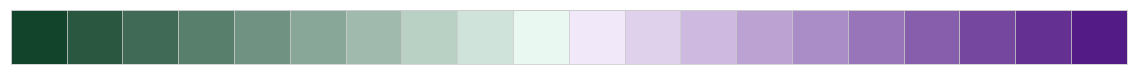

In [20]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=20))

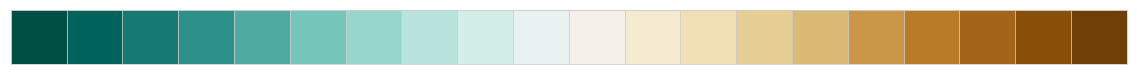

In [21]:
sns.palplot(sns.color_palette("BrBG_r", 20))

In [22]:
cmapName = "BrBG_r"
vmaxNuc = 0.1
vmaxCodon = 0.2
vmaxAApair = 0.3

## Nucleotide level

In [ ]:
position = -3
group = 'n_{:d}'.format(position)

In [ ]:
damDfGroup = damDf3.groupby(['promoter', group])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
damDfGroup

In [ ]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM
damDfGroup['position'] = position
damDfGroup

In [ ]:
sns.barplot(data=damDfGroup['log10DAMratio_norm'].reset_index(), x=group, y='log10DAMratio_norm', hue='promoter')

We apply the same approach for all the positions, except that we then use the overall average of all DAMratios over all the positions for a specific experiment as the reference for the normalized values.

In [ ]:
dfList = []

for position in range(-6,9):
    group = 'n_{:d}'.format(position)
    damDfGroup = damDf3.groupby(['promoter', group])[['DAMratio']].mean()
    damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
    damDfGroup['position'] = position
    dfList.append(damDfGroup)
    
damDfNucl = pd.concat(dfList)
damDfNucl.sort_index(inplace=True)
damDfNucl.index.names = ['promoter', 'nucleotide']
damDfNucl

In [ ]:
meanDAM = damDfNucl['DAMratio'].groupby(level=0).mean()
log10(meanDAM)

In [ ]:
damDfNucl['log10DAMratio_norm'] = damDfNucl['log10DAMratio'] - log10(meanDAM)

In [ ]:
damDfNucl.head()

In [ ]:
damDfNucl.tail()

In [ ]:
dfList = []
for promoter in ['weak', 'strong']:
    damPlotDf = damDfNucl.loc[promoter][['position', 'log10DAMratio_norm']].reset_index().pivot(index='nucleotide', columns='position', values='log10DAMratio_norm').copy()
    damPlotDf[0] = np.nan
    damPlotDf[1] = np.nan
    damPlotDf[2] = np.nan
    cols = list(damPlotDf.columns)
    cols[6] = 'T'
    cols[7] = 'A'
    cols[8] = 'A'
    damPlotDf.columns = cols
    damPlotDf.columns.name = 'position'
    damPlotDf['promoter'] = promoter
    dfList.append(damPlotDf)

damPlotDf = pd.concat(dfList).reset_index().set_index(['promoter', 'nucleotide'])
damPlotDf

In [ ]:
set_fontsize_paper()
for promoter in ['weak', 'strong']:
    aspect = 2
    width = 3.0
    figsize = (width, width/aspect)
    fig, ax = plt.subplots(figsize=figsize)
    cbarLabel = 'log10(norm.\nDAMRatio)'
    axes = sns.heatmap(data=damPlotDf.loc[promoter], cmap=cmapName, vmin=-vmaxNuc, vmax=vmaxNuc, square=True,
                       cbar=True, cbar_kws=dict(label=cbarLabel, shrink=0.5, ticks=[-0.1, 0, 0.1], aspect=10))
    cbar_ax = fig.axes[1]
    print(cbar_ax)
    cbar_ax.tick_params(labelsize='small')
    ticks_font = FontProperties(family='Liberation Mono')
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
    filename = 'ELM_seq_nucleotide_promoter_{}'.format(promoter)
    fig.tight_layout()
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800)

## Amino acid level

In [445]:
damDfGroup = damDf3.groupby(['promoter', 'aa_-1'])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])

In [446]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM
damDfGroup.head()

promoter
strong    0.992946
weak      0.141025
Name: log10DAMratio, dtype: float64


DAMratio  log10DAMratio  log10DAMratio_norm
promoter aa_-1                                              
strong   *      10.169228       1.007288            0.014342
         A       8.915522       0.950147           -0.042799
         C       8.023959       0.904389           -0.088557
         D      11.815256       1.072443            0.079497
         E      12.086276       1.082292            0.089347

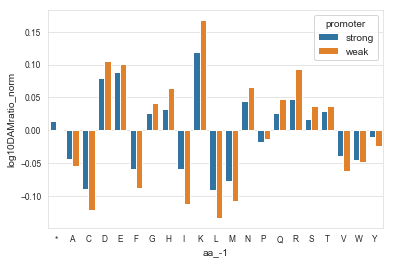

In [388]:
sns.barplot(data=damDfGroup['log10DAMratio_norm'].reset_index(), x='aa_-1', y='log10DAMratio_norm', hue='promoter')

In [447]:
dfList = []

for position in [-2, -1, 1, 2]:
    group = 'aa_{:d}'.format(position)
    damDfGroup = damDf3.groupby(['promoter', group])[['DAMratio']].mean()
    damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
    damDfGroup['position'] = position
    dfList.append(damDfGroup)
    
damDfAA = pd.concat(dfList)
damDfAA.sort_index(inplace=True)
damDfAA.index.names = ['promoter', 'amino acid']
damDfAA.head()

DAMratio  log10DAMratio  position
promoter amino acid                                    
strong   *           11.889748       1.075173        -2
         *           10.169228       1.007288        -1
         *            9.715327       0.987457         1
         *            9.860408       0.993895         2
         A            9.173361       0.962528        -2

In [448]:
subFolder

'nread_cutoff_30'

In [402]:
damDfAA.to_csv(ctermELMseqPath / subFolder / 'damDfAA.csv')

In [449]:
damDfAA[damDfAA['position'] == -1].loc['weak'].sort_values('log10DAMratio')

,DAMratio,log10DAMratio,position
amino acid,,,
L,1.018660,0.008029,-1
C,1.048772,0.020681,-1
I,1.070085,0.029418,-1
M,1.079216,0.033108,-1
F,1.129595,0.052923,-1
V,1.202162,0.079963,-1
A,1.219617,0.086223,-1
W,1.240023,0.093430,-1
Y,1.312273,0.118024,-1


In [452]:
damDfAA[damDfAA['position'] == -1].loc['strong'].sort_values('log10DAMratio')

,DAMratio,log10DAMratio,position
amino acid,,,
L,7.985168,0.902284,-1
C,8.023959,0.904389,-1
M,8.255760,0.916757,-1
F,8.600441,0.934521,-1
I,8.606447,0.934824,-1
W,8.869556,0.947902,-1
A,8.915522,0.950147,-1
V,9.006816,0.954571,-1
P,9.454486,0.975638,-1


In [ ]:
df = (damDfAA[damDfAA['position'] == -1].loc['weak'] + damDfAA[damDfAA['position'] == -1].loc['strong'])/2
df.sort_values('log10DAMratio_norm')

In [453]:
meanDAM = damDfAA['DAMratio'].groupby(level=0).mean()
meanDAMAA = meanDAM
log10(meanDAM)

promoter
strong    0.989979
weak      0.137875
Name: DAMratio, dtype: float64

In [454]:
damDfAA['log10DAMratio_norm'] = damDfAA['log10DAMratio'] - log10(meanDAM)

In [455]:
dfList = []
for promoter in ['weak', 'strong']:
    damPlotDf = damDfAA.loc[promoter][['position', 'log10DAMratio_norm']].reset_index().pivot(index='amino acid', columns='position', values='log10DAMratio_norm').copy()
    damPlotDf.columns.name = 'position'
    damPlotDf['TAA'] = np.nan
    damPlotDf = damPlotDf[[-2, -1, 'TAA', 1, 2]]
    damPlotDf['promoter'] = promoter
    dfList.append(damPlotDf)

damPlotDf = pd.concat(dfList).reset_index().set_index(['promoter', 'amino acid'])
damPlotDf.head()

position                   -2        -1  TAA         1         2
promoter amino acid                                             
weak     *           0.089720  0.003575  NaN -0.010792 -0.007642
         A          -0.040141 -0.051652  NaN -0.001208 -0.001216
         C          -0.108736 -0.117194  NaN -0.014977 -0.017937
         D           0.076543  0.108290  NaN -0.007491 -0.002145
         E           0.010773  0.104244  NaN -0.000754  0.000830

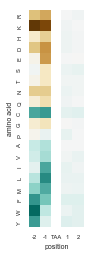

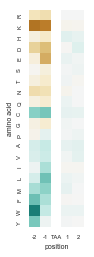

In [458]:
set_fontsize_paper()
for promoter in ['weak', 'strong']:
    figsize = (4, 4)
    fig, ax = plt.subplots(figsize=figsize)
    cbarLabel = 'log10(normalized DAMRatio)'
    sns.heatmap(data=damPlotDf.loc[promoter].loc[aaTable], cmap=cmapName,
                vmin=-vmaxCodon, vmax=vmaxCodon, square=True, cbar=False, cbar_kws={"label":cbarLabel})
    filename = 'ELM_seq_AA_promoter_{}.png'.format(promoter)
    fig.savefig(ctermELMseqPath / subFolder / filename, dpi=300)

## Codon level

In [ ]:
dfList = []

for position in [-2, -1, 1, 2]:
    group = 'codon_{:d}'.format(position)
    damDfGroup = damDf3.groupby(['promoter', group])[['DAMratio']].mean()
    damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
    damDfGroup['position'] = position
    dfList.append(damDfGroup)
    
damDfCodon = pd.concat(dfList)
damDfCodon.sort_index(inplace=True)
damDfCodon.index.names = ['promoter', 'codon']
damDfCodon

In [ ]:
meanDAM = damDfCodon['DAMratio'].groupby(level=0).mean()
meanDAMCodon = meanDAM
meanDAM

In [ ]:
damDfCodon['log10DAMratio_norm'] = damDfCodon['log10DAMratio'] - log10(meanDAM)

In [ ]:
damDfCodon.head()

In [ ]:
damDfCodon.tail()

In [ ]:
damDfCodon.to_csv(str(ctermELMseqPath / 'damDfCodon.csv'))

In [ ]:
dfList = []
for promoter in ['weak', 'strong']:
    damPlotDf = damDfCodon.loc[promoter][['position', 'log10DAMratio_norm']].reset_index().pivot(index='codon', columns='position', values='log10DAMratio_norm').copy()
    damPlotDf.columns.name = 'position'
    damPlotDf['TAA'] = np.nan
    damPlotDf = damPlotDf[[-2, -1, 'TAA', 1, 2]]
    damPlotDf['promoter'] = promoter
    dfList.append(damPlotDf)

damPlotDf = pd.concat(dfList).reset_index().set_index(['promoter', 'codon'])
damPlotDf

In [ ]:
damPlotDf.max()

In [ ]:
damPlotDf.loc[idx[:, ['AGA', 'AGG', 'CGT', 'CGC', 'CGA', 'CGG']], :]

In [ ]:
# fig = plt.figure(figsize=figsize)
# gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.2])
# cbar_ax = fig.add_subplot(gs[0,2])
# ax = fig.add_subplot(gs[0, 0])
# ax = fig.add_subplot(gs[0, 1])

In [ ]:
set_fontsize_paper()
for promoter in ['weak', 'strong'][:]:
    width = 1.7
    height = 4
    figsize = (width, height)

    cbarLabel = 'log10(norm.\nDAMRatio)'
    plotDf = damPlotDf.loc[promoter]
    plotDf = sort_codon_index(plotDf, refCodonTableDf,
                              addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False)

    # split in 2
    fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw=dict(wspace=0.7))
#     fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw=dict(left=0, right=0.85))
    n = 34
    plotDf1 = plotDf.iloc[:n]
    plotDf2 = plotDf.iloc[n:]
    m = n - len(plotDf2)
    row = plotDf.iloc[0].copy()
    row[:] = np.nan
    row.name = ''
    plotDf2 = pd.concat([pd.DataFrame(m*[row]), plotDf2])
    plotDfList = [plotDf1, plotDf2]
    cbar_ax = fig.add_axes([1.0, 0.4, 0.035, 0.15])

    for i, ax in enumerate(axes):
        if i == len(axes) - 1:
            cbar = True
            cbar_kws = dict(label=cbarLabel,
                            ticks=[-vmaxCodon, 0, vmaxCodon], aspect=15)
            cbar_ax2 = cbar_ax
        else:
            cbar = False
            cbar_kws = None
            cbar_ax2 = None
        sns.heatmap(ax=ax, data=plotDfList[i], square=True, cmap=cmapName, vmin=-vmaxCodon, vmax=vmaxCodon,
                    yticklabels=True,
                    cbar=cbar, cbar_kws=cbar_kws, cbar_ax=cbar_ax2)
        ax.tick_params(axis='both', pad=0)
        ticks_font = FontProperties(family='Liberation Mono', size='x-small')
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(ticks_font)
            tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
        if i == 1:
            ax.set_ylabel('')
#     axes[0].annotate('{} promoter'.format(promoter), xy=(0.5, 1), xycoords='figure fraction',
#                      xytext=(0, 0), ha='center', va='top')
#     fig.tight_layout()
    fig.suptitle('{} promoter'.format(promoter))
#     fig.patches.extend([plt.Rectangle((0, 0), 1, 1,
#                                   color='g', alpha=0.2, zorder=1000,
#                                   transform=fig.transFigure, figure=fig)])
    
    filename = 'ELM_seq_codon_promoter_{}'.format(promoter)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800, bbox_inches='tight')
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800, bbox_inches='tight')

### Correlation weak - strong

In [ ]:
df = damDfCodon[damDfCodon['position'] == -1]
# df = df[['log10DAMratio_norm']].unstack('promoter')
df = df[['DAMratio']].unstack('promoter')
# df.columns = df.columns.droplevel(0)
df.columns = df.columns.map('{0[0]} {0[1]} promoter'.format)
xlabel = df.columns[0]
ylabel = df.columns[1]
df.head()

ci : int in [0, 100] or None, optional

Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

n_boot : int, optional

Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

In [ ]:
df.corr()

In [ ]:
set_fontsize_paper()
width = 1.5
fig, ax = plt.subplots(figsize=(width, width))
pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.05, 0.92),
            xycoords='axes fraction', ha='left', va='top', fontsize='medium',
            bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
plt.tight_layout()
sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=95, n_boot=1000, fit_reg=True,
            scatter_kws=dict(alpha=1, s=20, edgecolors='none'))
ax.set_title('codon position -1')
ax.set_xlabel('DAMRatio strong promoter')
ax.set_ylabel('DAMRatio nweak promoter')
filename = 'ELM_seq_codon_pos-1_correlation_weak_strong'
fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800, bbox_inches='tight')
fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800, bbox_inches='tight')

### Relative differences min and max

In [ ]:
promoter = 'weak'
df = damDfCodon.loc[promoter, 'DAMratio']
mean = df.mean()
print(df.idxmax())
print(damDfCodon.loc[promoter, df.idxmax()])
print((df.max() - mean)/mean)

print(df.idxmin())
print(damDfCodon.loc[promoter, df.idxmin()])
print((df.min() - mean)/mean)

print((df.max() - df.min())/df.min())
print(df.max()/df.min())

In [ ]:
meanDAM

In [ ]:
for promoter in ['weak', 'strong']:
    for pos in [-2, -1]:
        df = damDfCodon.loc[promoter]
        df = df[df['position'] == pos]
#         mean = df['DAMratio'].mean()
        mean = meanDAM.loc[promoter]
        print(mean)
        for aa in aaTable + ['*']:
            codonList = refCodonTableDf[refCodonTableDf['aa'] == aa].index
            fold = df.loc[codonList]['DAMratio'].mean()/mean
            print(promoter, pos, aa, '{:.2f}'.format(fold))

        # compared K at position -1 to the mean of the other a.a..
#         df.loc[codonList]['DAMratio'].mean()/df.loc[df.index.map(lambda x: x not in codonList)]['DAMratio'].mean()

In [ ]:
print(df.idxmax())
print(damDfCodon.loc[promoter, df.idxmax()])
print((df.max() - mean)/mean)

In [ ]:
promoter = 'strong'
df = damDfCodon.loc[promoter, 'DAMratio']
mean = df.mean()
print(df.idxmax())
print(damDfCodon.loc[promoter, df.idxmax()])
print((df.max() - mean)/mean)

print(df.idxmin())
print(damDfCodon.loc[promoter, df.idxmin()])
print((df.min() - mean)/mean)

print((df.max() - df.min())/df.min())
print(df.max()/df.min())

In [ ]:
damPlotDf2 = 10**damPlotDf
damPlotDf2.head()

In [ ]:
damPlotDf2[[1, 2]].stack().describe()

In [ ]:
damPlotDf3 = sort_codon_index(damPlotDf2.reorder_levels([1,0]).reset_index(level=1), refCodonTableDf,
                          addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=True)
damPlotDf3.head()

In [ ]:
# df = df[[-2, -1]].stack()

In [ ]:
df = damPlotDf3[damPlotDf3['aa'] == 'K']
df = df[df['promoter'] == 'weak']
df.mean()

In [ ]:
df = damPlotDf3[damPlotDf3['aa'] == 'K']
df = df[df['promoter'] == 'strong']
df.mean()

In [ ]:
df.describe()

In [ ]:
df = damPlotDf3[damPlotDf3['aa'] == 'C']

df = df[df['promoter'] == 'weak']
df = df[[-2, -1]].stack()
df

In [ ]:
df = damPlotDf3[damPlotDf3['aa'].map(lambda x: x in ['A', 'I', 'L', 'M', 'V', 'F', 'W', 'Y'])]

df = df[df['promoter'] == 'weak']
df = df[[-2, -1]].stack()
df.head(10)

In [ ]:
df.describe()

In [ ]:
df = damPlotDf3[damPlotDf3['aa'] == '*']

df = df[df['promoter'] == 'weak']
df

## Amino acid pair

In [404]:
damDf3.loc[:, 'aa_pair'] = damDf3['aa_-2'].str.cat(damDf3['aa_-1'])
damDf3.head();

In [405]:
damDfGroup = damDf3.groupby(['promoter', 'aa_-1', 'aa_-2'])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
damDfGroup;

In [406]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM
damDfGroup;

promoter
strong    0.993079
weak      0.143181
Name: log10DAMratio, dtype: float64


In [407]:
damDfAApair = damDfGroup

In [408]:
damDfAApair.max().max()

16.12791399398891

In [409]:
damDfAApair.min().min()

-0.4066934412486249

In [434]:
df = (damDfAApair.loc['weak'] + damDfAApair.loc['strong'])/2
df.head()

DAMratio  log10DAMratio  log10DAMratio_norm
aa_-1 aa_-2                                             
*     *      6.839328       0.649270            0.081140
      A      5.264588       0.539964           -0.028166
      C      4.508715       0.460728           -0.107402
      D      7.270627       0.691335            0.123205
      E      7.035366       0.671121            0.102991

In [436]:
df.loc[df['DAMratio'].idxmin()]

DAMratio              2.599727
log10DAMratio         0.202173
log10DAMratio_norm   -0.365957
Name: (L, W), dtype: float64

In [437]:
df.loc[df['DAMratio'].idxmax()]

DAMratio              9.259017
log10DAMratio         0.792999
log10DAMratio_norm    0.224869
Name: (K, N), dtype: float64

In [ ]:
df = damDfAApair.loc['weak']

In [426]:
df.loc[df['DAMratio'].idxmin()]

DAMratio              0.545114
log10DAMratio        -0.263513
log10DAMratio_norm   -0.406693
Name: (L, W), dtype: float64

In [427]:
df.loc[df['DAMratio'].idxmax()]

DAMratio              2.408301
log10DAMratio         0.381711
log10DAMratio_norm    0.238530
Name: (Q, K), dtype: float64

In [428]:
df = damDfAApair.loc['strong']

In [429]:
df.loc[df['DAMratio'].idxmin()]

DAMratio              4.590017
log10DAMratio         0.661814
log10DAMratio_norm   -0.331265
Name: (M, M), dtype: float64

In [430]:
df.loc[df['DAMratio'].idxmax()]

DAMratio              16.127914
log10DAMratio          1.207578
log10DAMratio_norm     0.214499
Name: (K, N), dtype: float64

In [423]:
damDfAApair.to_csv(ctermELMseqPath / subFolder / 'damDfAApair.csv')

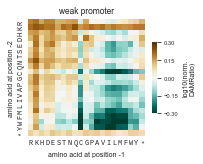

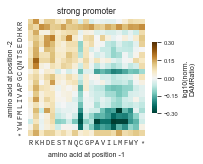

In [410]:
set_fontsize_paper()
aaTable2 = aaTable + ['*']
for promoter in ['weak', 'strong']:
# promoter = 'weak'
    plotDf = damDfAApair.loc[promoter][['log10DAMratio_norm']].unstack(level=0)
    plotDf.columns = plotDf.columns.droplevel(0)
    plotDf = plotDf[aaTable2].loc[aaTable2]
    width = 2.8
    height = width
    fig, ax = plt.subplots(figsize=(width, height))
    cbarLabel = 'log10(norm.\nDAMRatio)'
    sns.heatmap(data=plotDf, cmap=cmapName, vmin=-vmaxAApair, vmax=vmaxAApair, square=True,
                xticklabels=True, yticklabels=True,
                cbar=True, cbar_kws=dict(label=cbarLabel, shrink=0.4,
                                         ticks=[-vmaxAApair, -0.15, 0, 0.15, vmaxAApair], aspect=15))
    ax.tick_params(axis='both', pad=0)
    ticks_font = FontProperties(family='Liberation Mono')
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
    ax.set_ylabel('amino acid at position -2')
    ax.set_xlabel('amino acid at position -1')
    ax.set_title('{} promoter'.format(promoter))
    fig.tight_layout()
    filename = 'ELM_seq_AApair_promoter_{}'.format(promoter)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800)

In [411]:
AAhydrophobic = ['A','V','I','L','M','F','W','Y']
AAhydrophobicNonAromatic = ['A','V','I','L','M']
AAaromatic = ['F','W','Y']

In [412]:
damDfAApair.loc[idx[:, AAhydrophobicNonAromatic, AAaromatic], :]['log10DAMratio_norm'].map(lambda x: 10**x).describe()

count    30.000000
mean      0.567478
std       0.083743
min       0.392018
25%       0.513809
50%       0.556393
75%       0.620797
max       0.719277
Name: log10DAMratio_norm, dtype: float64

In [413]:
damDfAApair.loc[idx[:, AAaromatic, AAhydrophobicNonAromatic], :]['log10DAMratio_norm'].map(lambda x: 10**x).describe()

count    30.000000
mean      0.837421
std       0.102748
min       0.614963
25%       0.782413
50%       0.855573
75%       0.906406
max       1.028260
Name: log10DAMratio_norm, dtype: float64

In [414]:
damDfAApair.loc[damDfAApair.loc[['strong'], 'log10DAMratio_norm'].idxmin()]

DAMratio              4.590017
log10DAMratio         0.661814
log10DAMratio_norm   -0.331265
Name: (strong, M, M), dtype: float64

In [415]:
promoter = 'weak'

In [416]:
df = damDfAApair.loc[promoter].sort_values('log10DAMratio_norm')
df['DAMratio_norm'] = df['log10DAMratio_norm'].map(lambda x: 10**x)
df.head(5)

,,DAMratio,log10DAMratio,log10DAMratio_norm,DAMratio_norm
aa_-1,aa_-2,,,,
L,W,0.545114,-0.263513,-0.406693,0.392018
C,W,0.596341,-0.224505,-0.367686,0.428859
M,W,0.604485,-0.218615,-0.361796,0.434715
A,W,0.661317,-0.179590,-0.322771,0.475586
L,Y,0.673143,-0.171893,-0.315073,0.484091


In [417]:
df = damDfAApair.loc[promoter].sort_values('log10DAMratio_norm', ascending=False)
df['DAMratio_norm'] = df['log10DAMratio_norm'].map(lambda x: 10**x)
df.loc['P'].loc['P']

DAMratio              1.127299
log10DAMratio         0.052039
log10DAMratio_norm   -0.091142
DAMratio_norm         0.810697
Name: P, dtype: float64

In [418]:
df['DAMratio_norm'].max()/df['DAMratio_norm'].min()

4.417977113166153

In [419]:
promoter = 'strong'

In [420]:
df = damDfAApair.loc[promoter].sort_values('log10DAMratio_norm')
df['DAMratio_norm'] = df['log10DAMratio_norm'].map(lambda x: 10**x)
df.head(10)

,,DAMratio,log10DAMratio,log10DAMratio_norm,DAMratio_norm
aa_-1,aa_-2,,,,
M,M,4.590017,0.661814,-0.331265,0.466375
L,W,4.654340,0.667858,-0.325221,0.472911
A,W,5.050952,0.703373,-0.289706,0.513209
F,W,5.072931,0.705259,-0.287820,0.515442
M,W,5.074589,0.705401,-0.287678,0.515610
C,W,5.343075,0.727791,-0.265288,0.542890
L,Y,5.524534,0.742296,-0.250783,0.561328
C,F,5.704757,0.756237,-0.236842,0.579640
L,F,5.728392,0.758033,-0.235046,0.582041


In [421]:
df = damDfAApair.loc[promoter].sort_values('log10DAMratio_norm', ascending=False)
df['DAMratio_norm'] = df['log10DAMratio_norm'].map(lambda x: 10**x)
df.head(10)

,,DAMratio,log10DAMratio,log10DAMratio_norm,DAMratio_norm
aa_-1,aa_-2,,,,
K,N,16.127914,1.207578,0.214499,1.638699
E,D,14.891839,1.172948,0.179869,1.513106
K,Q,14.861378,1.172059,0.178980,1.510011
N,D,14.667739,1.166363,0.173284,1.490336
H,K,14.513302,1.161766,0.168687,1.474644
*,K,14.469443,1.160452,0.167373,1.470187
K,R,14.333364,1.156348,0.163269,1.456361
M,K,14.322758,1.156027,0.162948,1.455283
P,K,14.109227,1.149503,0.156424,1.433587


In [422]:
df['DAMratio_norm'].max()/df['DAMratio_norm'].min()

3.513694000445431

### Epistasis

In [ ]:
damDfAA.head()

In [ ]:
damDfAA2 = damDfAA
damDfAA2 = damDfAA2.set_index('position', append=True)
damDfAA2.head()

In [ ]:
aaMin2 = 'K'
aaMin1 = 'R'
promoter = 'weak'
(damDfAA2.loc[(promoter, aaMin1, -1), 'log10DAMratio_norm'] +
 damDfAA2.loc[(promoter, aaMin2, -2), 'log10DAMratio_norm'])

In [ ]:
damDfAApairExpected = damDfAApair.copy().drop(['DAMratio', 'log10DAMratio'], axis=1)
damDfAApairExpected.loc[:, :] = np.nan
damDfAApairExpected.head(3)

In [ ]:
damDfAApairExpected.index.unique(level=1)

In [ ]:
for promoter in ['weak', 'strong']:
    for aaMin1 in damDfAApairExpected.index.unique(level='aa_-1'):
        for aaMin2 in damDfAApairExpected.index.unique(level='aa_-2'):
            damDfAApairExpected.loc[(promoter, aaMin1, aaMin2), 'log10DAMratio_norm'] = \
                (damDfAA2.loc[(promoter, aaMin1, -1), 'log10DAMratio_norm'] +
                 damDfAA2.loc[(promoter, aaMin2, -2), 'log10DAMratio_norm'])

In [ ]:
damDfAApairExpected.head()

In [ ]:
damDfAApair.head(3)

In [ ]:
damDfAApairExpected['Delta_log10DAMratio_norm'] = damDfAApair['log10DAMratio_norm'] - damDfAApairExpected['log10DAMratio_norm']
damDfAApairExpected.head()

In [ ]:
damDfAApairExpected['Delta_log10DAMratio_norm'].max()

In [ ]:
damDfAApairExpected['Delta_log10DAMratio_norm'].min()

In [ ]:
vmaxAApairEpistatis = 0.2

For the epistatis, we drop the stop codon which is confusing to interprete.

In [ ]:
set_fontsize_paper()
aaTable2 = aaTable + ['*']
aaTable2 = aaTable
for promoter in ['weak', 'strong']:

    plotDf = damDfAApairExpected.loc[promoter][['Delta_log10DAMratio_norm']].unstack(level=0)
    plotDf.columns = plotDf.columns.droplevel(0)
    plotDf = plotDf[aaTable2].loc[aaTable2]
    width = 2.8
    height = width
    fig, ax = plt.subplots(figsize=(width, height))
    cbarLabel = '$\Delta$ log10(norm.\nDAMRatio)'
    sns.heatmap(data=plotDf, cmap=cmapName, vmin=-vmaxAApairEpistatis, vmax=vmaxAApairEpistatis, square=True,
                xticklabels=True, yticklabels=True,
                cbar=True, cbar_kws=dict(label=cbarLabel, shrink=0.4,
                                         ticks=[-vmaxAApair, -0.15, 0, 0.15, vmaxAApair], aspect=15))
    ax.tick_params(axis='both', pad=0)
    ticks_font = FontProperties(family='Liberation Mono')
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
    ax.set_ylabel('amino acid at position -2')
    ax.set_xlabel('amino acid at position -1')
    ax.set_title('{} promoter'.format(promoter))
    fig.tight_layout()
    filename = 'ELM_seq_AApairEpistatis_promoter_{}'.format(promoter)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800)

In [ ]:
damDfAApairExpected.head()

In [ ]:
df = 10**damDfAApairExpected.loc[idx[:, ['A','V','I','L','M','F'], ['M','F','W','Y']], 'Delta_log10DAMratio_norm']
df = df.loc['weak']
df

In [ ]:
df.describe()

In [ ]:
df = 10**damDfAApairExpected
df.loc[idx[:, 'K', 'K'], :]

### Correlation weak - strong

In [ ]:
df = damDfAApair
# df = df[['log10DAMratio_norm']].unstack('promoter')
df = df[['DAMratio']].unstack('promoter')
# df.columns = df.columns.droplevel(0)
df.columns = df.columns.map('{0[0]} {0[1]} promoter'.format)
xlabel = df.columns[0]
ylabel = df.columns[1]
df.head()

ci : int in [0, 100] or None, optional

Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

n_boot : int, optional

Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

In [ ]:
df.corr()

In [ ]:
set_fontsize_paper()
width = 1.5
fig, ax = plt.subplots(figsize=(width, width))
pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.06, 0.93),
            xycoords='axes fraction', ha='left', va='top', fontsize='medium',
            bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
plt.tight_layout()
sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=95, n_boot=1000, fit_reg=True,
            scatter_kws=dict(alpha=0.4, s=20, edgecolors='none'))
ax.set_title('amino acid pair')
ax.set_xlabel('DAMRatio strong promoter')
ax.set_ylabel('DAMRatio nweak promoter')
filename = 'ELM_seq_AApair_correlation_weak_strong'
fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=800, bbox_inches='tight')
fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=800, bbox_inches='tight')

### Relative differences min and max

In [ ]:
damDfAApair.head()

In [ ]:
promoter = 'weak'
df = damDfAApair.loc[promoter, 'DAMratio']
mean = df.mean()
print(df.idxmax())
print(damDfAApair.loc[promoter].loc[df.idxmax()])
print((df.max() - mean)/mean)

print(df.idxmin())
print(damDfAApair.loc[promoter].loc[df.idxmin()])
print((df.min() - mean)/mean)

print((df.max() - df.min())/df.min())
print(df.max()/df.min())

In [ ]:
promoter = 'strong'
df = damDfAApair.loc[promoter, 'DAMratio']
mean = df.mean()
print(df.idxmax())
print(damDfAApair.loc[promoter].loc[df.idxmax()])
print((df.max() - mean)/mean)

print(df.idxmin())
print(damDfAApair.loc[promoter].loc[df.idxmin()])
print((df.min() - mean)/mean)

print((df.max() - df.min())/df.min())
print(df.max()/df.min())

In [ ]:
damDfAApair.loc[('strong', 'K', 'K'), :]

In [ ]:
df = 10**damDfAApair
df.loc[idx[:, 'K', 'K'], :]

In [ ]:
df = 10**damDfAApair
df.loc[idx[:, 'K', 'N'], :]

In [ ]:
df = 10**damDfAApair
df.loc[idx['strong', 'K', :], :].mean()

## Codon pairs

In [ ]:
damDfGroup = damDf3.groupby(['promoter', 'codon_-1', 'codon_-2'])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
damDfGroup;

In [ ]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM
damDfGroup;

In [ ]:
damDfCodonpair = damDfGroup

In [ ]:
damDfCodonpair.head()

### looking for patterns

In [ ]:
damDfCodonpair.max()

In [ ]:
damDfCodonpair.min()

List the best and worst hexamers.

In [ ]:
df = damDfCodonpair.loc['weak'].sort_values('log10DAMratio_norm')
df['seq'] = df.index.map(lambda x: 'AAAAAA-' + ''.join(x[::-1]) + '-TAACAG')
df['seq2'] = df.index.map(lambda x: 'AAAAAA' + ''.join(x[::-1]) + 'TAACAG')

worst weak promoter

In [ ]:
df.head()

best weak promoter

In [ ]:
df.tail()

In [ ]:
df2 = df.copy()
df2.loc[df2['seq2'].str.contains('TATAAC'), 'has_motif'] = True
df2.loc[~df2['seq2'].str.contains('TATAAC'), 'has_motif'] = False
sns.boxplot(data=df2, x='has_motif', y='log10DAMratio_norm')

In [ ]:
df2 = df.copy()
df2.loc[df2['seq2'].str.contains('TATAA.')]

In [ ]:
df2 = df.copy()
df2.loc[df2['seq'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq'].str.contains('GATC'), 'has_GATC'] = False
sns.boxplot(data=df2, x='has_GATC', y='log10DAMratio_norm')

In [ ]:
df = damDfCodonpair.loc['strong'].sort_values('log10DAMratio_norm')
df['seq'] = df.index.map(lambda x: 'AAAAAA-' + ''.join(x[::-1]) + '-TAACAG')

worst strong promoter

In [ ]:
df.head()

best strong promoter

In [ ]:
df.tail()

*effect of GATC motif*

In the strong promoter:

The hexamers `D/GAT-CNN`, where -1 codon can be `L/CTN, P/CCN, H/CAN, Q/CAN, R/CGN`, do not show particularly higher or lower levels. Only higher for 3 hexamers `D/GAT-P/CCT,CCA,CCG`, but not the others.

the 4 hexamers `R/AGA-S/TCN` show higher expression.

the expression of hexamers `X/NNN-I/ATC` are slightly higher when the G at 3rd position in `X/NNG`.

In the weak promoter:

the 4 hexamers `D/GAT-R/CGN` and the isolated hexamer `D/GAT-P/CCC` show *lower* expression.

the 4 hexamers `R/AGA-S/TCN` show slightly lower expression.

the expression of hexamers `X/NNN-I/ATC` do not seem to depend on the G at 3rd position in `X/NNG`.

In [ ]:
df2 = df.copy()
df2.loc[df2['seq'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq'].str.contains('GATC'), 'has_GATC'] = False
sns.boxplot(data=df2, x='has_GATC', y='log10DAMratio_norm')

In the weak promoter, we have

`R/CGC-G/GGC` with very high expression, and `R/CGC-G/GGA` with very low expression, with only 1 nucleotide difference.

In [ ]:
len(damDf3)

In [ ]:
# damDf4[(damDf4['codon_-2'] == 'CGC')* (damDf4['codon_-1'] == 'GGA')]

#### weak promoter

In [ ]:
promoter = 'weak'

In [ ]:
df = damDfCodonpair.loc[promoter].sort_values('log10DAMratio_norm')
df['seq_extended'] = df.index.map(lambda x: 'AAAAAA-' + ''.join(x[::-1]) + '-TAACAG')

In [ ]:
damDf3B = damDf3[damDf3['promoter'] == promoter].set_index(['codon_-2', 'codon_-1']).sort_index()
damDf3B.head(3)

worst weak promoter

In [ ]:
df.head()

best weak promoter

In [ ]:
df.tail()

We look if the different randomized sequences for upstream region present large variation.

In [ ]:
damDf3B.loc[df.iloc[0].name]

In [ ]:
damDf3B.loc[df.iloc[-1].name]

In [ ]:
set_fontsize_screen()
df2 = df.copy()
df2.loc[df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = False
width = 2
aspect = 0.5
fig, ax = plt.subplots(figsize=(width, width/aspect))
sns.boxplot(ax=ax, data=df2, x='has_GATC', y='log10DAMratio_norm')
ax.set_title(promoter + ' promoter')
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_GATC_boxplot_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

#### strong promoter

In [ ]:
promoter = 'strong'

In [ ]:
df = damDfCodonpair.loc[promoter].sort_values('log10DAMratio_norm')
df['seq_extended'] = df.index.map(lambda x: 'AAAAAA-' + ''.join(x[::-1]) + '-TAACAG')

In [ ]:
damDf3B = damDf3[damDf3['promoter'] == promoter].set_index(['codon_-1', 'codon_-2']).sort_index()
damDf3B.head(3)

worst weak promoter

In [ ]:
df.head()

best weak promoter

In [ ]:
df.tail()

We look if the different randomized sequences for upstream region present large variation.

In [ ]:
damDf3B.loc[df.iloc[0].name]

In [ ]:
damDf3B.loc[df.iloc[-1].name]

In [ ]:
set_fontsize_screen()
df2 = df.copy()
df2.loc[df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = False
width = 2
aspect = 0.5
fig, ax = plt.subplots(figsize=(width, width/aspect))
sns.boxplot(ax=ax, data=df2, x='has_GATC', y='log10DAMratio_norm')
ax.set_title(promoter + ' promoter')
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_GATC_boxplot_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

### Plot

In [ ]:
# vmax = 0.6

# for promoter in ['weak', 'strong']:

#     subseq_type='codon'
#     plotSynonymousCodonGroupSeparationLine=True
#     plotTitle = '{} promoter'.format(promoter)

#     plotData = damDfCodonpair.loc[promoter, ['log10DAMratio_norm']].unstack(level=0).copy()
#     plotData.columns = plotData.columns.droplevel(0)
#     nameIndex = plotData.index.name
#     nameCol = plotData.columns.name

#     plotData = sort_codon_index(plotData.T, refCodonTableDf,
#                                 addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False)
#     plotData = sort_codon_index(plotData.T, refCodonTableDf,
#                                 addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False)
#     plotData.index.name = nameIndex
#     plotData.columns.name = nameCol
#     linewidth1 = 0.7
#     aspectratio = 1
#     imagesize = 5.2
#     figsize = (imagesize, imagesize/aspectratio)
#     plotData.columns.name = re.sub(r'_', r' ', plotData.columns.name)
#     plotData.index.name = re.sub(r'_', r' ', plotData.index.name)

#     fig, (ax,cbar_ax) = plt.subplots(1, 2, figsize=figsize)
#     # main axes
#     ax.set_position([0, 0, 1, 1])
#     ax.set_facecolor(colorBackground1)

#     # Create axes for the colorbar for more precise positioning
#     cbar_ax.set_position([1.1, 0.45, 0.12/15, 0.12])

#     cbarLabel = 'log10(normalized DAMRatio)'
#     ax = seaborn.heatmap(plotData, square=True, ax=ax, cmap=cmapName,
#                          cbar_ax=cbar_ax,
#                          cbar_kws=dict(label=cbarLabel, ticks=[-vmax, 0, vmax], aspect=15),
#                          xticklabels=True, yticklabels=True,
#                          vmin=-vmax, vmax=vmax,
#                          linewidth=linewidth1, linecolor=colorHeatmapLine)
#     for _, spine in ax.spines.items():
#         spine.set_visible(True)
#         spine.set_color('0.3')
#     ax.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize='small', pad=1)
#     ax.tick_params(axis='x', which='both', labeltop=True, labelbottom=True, labelsize='small', pad=1)
#     if len(ax.xaxis.get_ticklabels()[0].get_text()) > 2:
#         ax.xaxis.set_tick_params(rotation=90)
#     ax.yaxis.set_tick_params(rotation=0)
#     family = 'Liberation Mono'
#     ticks_font = FontProperties(family=family, size=VERY_SMALL_SIZE)
#     for tick in ax.get_xticklabels():
#         tick.set_fontproperties(ticks_font)
#         tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
#     for tick in ax.get_yticklabels():
#         tick.set_fontproperties(ticks_font)
#         tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))

#     ax.set_xlabel('codon at position -1')
#     ax.set_ylabel('codon at position -2')
#     ax.set_title(plotTitle, y=1.05)

#     # fig.tight_layout()

#     if subseq_type == 'codon' and plotSynonymousCodonGroupSeparationLine:
#         synCodonLineWidth = 0.7*linewidth1
#         synCodonLineColor = '0.3'
#         synCodonLineAlpha = 1
#         synCodonLineStyle = '--'
#         refCodonTableDf.sort_values('aa_groups_sorted_index')
#         # Finding last rows of grouped dataframe on a multiindex column
#         groupCol = 'aa'
#         df = refCodonTableDf
#         colDf = pd.DataFrame(df[groupCol].copy()).reset_index(drop=True).reset_index()
#         lastS = colDf.groupby(by=groupCol).last().sort_values('index')['index']
#         for aa, i in lastS[:-1].iteritems():
#             ax.axvline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)
#             ax.axhline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)

#     # fig.tight_layout()
#     filename = 'ELM_seq_codon_pair_promoter_{}.png'.format(promoter)
#     fig.savefig(ctermELMseqPath / filename, dpi=800, bbox_inches='tight')

In [ ]:
vmaxCodonPair = 0.6
displayType = 'paper'
if displayType == 'screen':
    imageWidth = 10
    set_fontsize_screen()
if displayType == 'paper':
    imageWidth = 5.2
    set_fontsize_paper()
highlightGATC = False

for promoter in ['weak', 'strong'][:]:

    subseq_type='codon'
    plotSynonymousCodonGroupSeparationLine=True
    plotTitle = '{} promoter'.format(promoter)

    plotData = damDfCodonpair.loc[promoter, ['log10DAMratio_norm']].unstack(level=0).copy()
    plotData.columns = plotData.columns.droplevel(0)
    
    nameIndex = plotData.index.name
    nameCol = plotData.columns.name
    plotData = sort_codon_index(plotData.T, refCodonTableDf,
                                addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False)
    plotData = sort_codon_index(plotData.T, refCodonTableDf,
                                addAminoAcidLetterToIndex=True, addAminoAcidLetterAsColumn=False)
    plotData.index.name = nameIndex
    plotData.columns.name = nameCol
    linewidth1 = 0.7
    aspectratio = 1
    figsize = (imageWidth, imageWidth/aspectratio)

    fig, (ax,cbar_ax) = plt.subplots(1, 2, figsize=figsize)
    # main axes
    ax.set_position([0, 0, 1, 1])
    ax.set_facecolor(colorBackground1)
    # Create axes for the colorbar for more precise positioning
    cbar_ax.set_position([1.1, 0.45, 0.12/15, 0.12])

    cbarLabel = 'log10(normalized DAMRatio)'
    ax = seaborn.heatmap(plotData, square=True, ax=ax, cmap=cmapName,
                         cbar_ax=cbar_ax,
                         cbar_kws=dict(label=cbarLabel, ticks=[-vmax, 0, vmax], aspect=15),
                         xticklabels=True, yticklabels=True,
                         vmin=-vmaxCodonPair, vmax=vmaxCodonPair,
                         linewidth=linewidth1, linecolor=colorHeatmapLine)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('0.3')
    ax.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize='small', pad=1)
    ax.tick_params(axis='x', which='both', labeltop=True, labelbottom=True, labelsize='small', pad=1)
    if len(ax.xaxis.get_ticklabels()[0].get_text()) > 2:
        ax.xaxis.set_tick_params(rotation=90)
    ax.yaxis.set_tick_params(rotation=0)
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))

    ax.set_xlabel('codon at position -1')
    ax.set_ylabel('codon at position -2')
    ax.set_title(plotTitle, y=1.05)

    if subseq_type == 'codon' and plotSynonymousCodonGroupSeparationLine:
        synCodonLineWidth = 0.7*linewidth1
        synCodonLineColor = '0.3'
        synCodonLineAlpha = 1
        synCodonLineStyle = '--'
        refCodonTableDf.sort_values('aa_groups_sorted_index')
        # Finding last rows of grouped dataframe on a multiindex column
        groupCol = 'aa'
        df = refCodonTableDf
        colDf = pd.DataFrame(df[groupCol].copy()).reset_index(drop=True).reset_index()
        lastS = colDf.groupby(by=groupCol).last().sort_values('index')['index']
        for aa, i in lastS[:-1].iteritems():
            ax.axvline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)
            ax.axhline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)
            
    if highlightGATC:
        # Highlight hexamers with GATC motif
        if plotData.index.name == 'codon_-2':
            index = plotData.index.map(lambda x: x[:] if len(x) == 3 else x[2:])
            columns = plotData.columns.map(lambda x: x[:] if len(x) == 3 else x[2:])
            for i, trimer1 in enumerate(index):
                for j, trimer2 in enumerate(columns):
                    if re.search('GATC', trimer1 + trimer2) or motifWithSpacer:
                        # draw rectangle
                        ax.add_patch(Rectangle((j, i), 1, 1, ec='red', fc='none', alpha=0.6, lw=linewidth1, ls='--'))

    # fig.tight_layout()
    filename = 'ELM_seq_codon_pair_promoter_{}{}.png'.format(promoter, '_GATC' if highlightGATC else '')
    if displayType == 'paper':
        fig.savefig(ctermELMseqPath / subFolder / filename, dpi=800, bbox_inches='tight')

### Correlation weak - strong

In [ ]:
df = damDfCodonpair.copy()
# df = df[['log10DAMratio_norm']].unstack('promoter')
df = df[['DAMratio']].unstack('promoter')
# df.columns = df.columns.droplevel(0)
df.columns = df.columns.map('{0[0]} {0[1]} promoter'.format)
xlabel = df.columns[0]
ylabel = df.columns[1]
df.head()

In [ ]:
df.corr()

In [ ]:
set_fontsize_paper()
width = 1.5
fig, ax = plt.subplots(figsize=(width, width))
pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.95, 0.97),
            xycoords='axes fraction', ha='right', va='top', fontsize='medium',
            bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
plt.tight_layout()
sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=95, n_boot=1000, fit_reg=True,
            scatter_kws=dict(alpha=0.3, s=20, edgecolors='none'))
ax.set_title('codon pair')
ax.set_xlabel('DAMRatio strong promoter')
ax.set_ylabel('DAMRatio nweak promoter')
filename = 'ELM_seq_codon_pair_correlation_weak_strong.png'
fig.savefig(ctermELMseqPath / subFolder / filename, dpi=300, bbox_inches='tight')

## Hexamers downstream

In [ ]:
damDf3.head()

In [ ]:
damDfGroup = damDf3.groupby(['promoter', 'codon_1', 'codon_2'])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
damDfGroup;

In [ ]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM
damDfGroup;

In [ ]:
damDfCodonpairDown = damDfGroup

In [ ]:
damDfCodonpairDown.head()

### looking for patterns

In [ ]:
damDfCodonpairDown.max()

In [ ]:
damDfCodonpairDown.min()

List the best and worst hexamers.

In [ ]:
seqSpacer

#### weak promoter

In [ ]:
promoter = 'weak'

In [ ]:
df = damDfCodonpairDown.loc[promoter].sort_values('log10DAMratio_norm')
df['seq_extended'] = df.index.map(lambda x: 'TAA' + ''.join(x[::+1]) + 'CAGGCC')

In [ ]:
damDf3B = damDf3[damDf3['promoter'] == promoter].set_index(['codon_1', 'codon_2']).sort_index()
damDf3B.head(3)

In [ ]:
set_fontsize_screen()
fig, ax = plt.subplots(figsize=(5,3))
ax.set_title(promoter + ' promoter')

sns.distplot(df['log10DAMratio_norm'], ax=ax, label='downstream')
sns.distplot(damDfCodonpair.loc[promoter, 'log10DAMratio_norm'], ax=ax, color=sns.color_palette()[1], label='upstream')
plt.legend()
ax.set_xlim(-0.6, 0.6)
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_downstream_distribution_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

worst weak promoter

In [ ]:
df.head()

best weak promoter

In [ ]:
df.tail()

We look if the different randomized sequences for upstream region present large variation.

In [ ]:
damDf3B.loc[df.iloc[3].name]

In [ ]:
damDf3B.loc[df.iloc[-1].name]

In [ ]:
set_fontsize_screen()
df2 = df.copy()
df2.loc[df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = False
width = 2
aspect = 0.5
fig, ax = plt.subplots(figsize=(width, width/aspect))
sns.boxplot(ax=ax, data=df2, x='has_GATC', y='log10DAMratio_norm')
ax.set_title(promoter + ' promoter')
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_downstream_GATC_boxplot_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

#### strong promoter

In [ ]:
promoter = 'strong'

In [ ]:
df = damDfCodonpairDown.loc[promoter].sort_values('log10DAMratio_norm')
df['seq_extended'] = df.index.map(lambda x: 'TAA' + ''.join(x[::+1]) + 'CAGGCC')

In [ ]:
damDf3B = damDf3[damDf3['promoter'] == promoter].set_index(['codon_1', 'codon_2']).sort_index()
damDf3B.head(3)

In [ ]:
set_fontsize_screen()
fig, ax = plt.subplots(figsize=(5,3))
ax.set_title(promoter + ' promoter')

sns.distplot(df['log10DAMratio_norm'], ax=ax, label='downstream')
sns.distplot(damDfCodonpair.loc[promoter, 'log10DAMratio_norm'], ax=ax, color=sns.color_palette()[1], label='upstream')
plt.legend()
ax.set_xlim(-0.6, 0.6)
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_downstream_distribution_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

worst

In [ ]:
df.head()

best weak promoter

In [ ]:
df.tail()

We look if the different randomized sequences for upstream region present large variation.

In [ ]:
damDf3B.loc[df.iloc[3].name]

In [ ]:
damDf3B.loc[df.iloc[-1].name]

In [ ]:
set_fontsize_screen()
df2 = df.copy()
df2.loc[df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = True
df2.loc[~df2['seq_extended'].str.contains('GATC'), 'has_GATC'] = False
width = 2
aspect = 0.5
fig, ax = plt.subplots(figsize=(width, width/aspect))
sns.boxplot(ax=ax, data=df2, x='has_GATC', y='log10DAMratio_norm')
ax.set_title(promoter + ' promoter')
fig.savefig(ctermELMseqPath / subFolder / 'ELM_seq_codon_pair_downstream_GATC_boxplot_promoter_{}.png'.format(promoter),
            dpi=300, bbox_inches='tight')

### Plot

In [ ]:
damDfCodonpairDown.head()

Detect GATC

In [ ]:
hexamerList = damDfCodonpairDown.index.map(lambda x: ''.join(x[1:3])).unique()
hexamerHasGATCMask = [re.search('GATC', h) is not None for h in hexamerList]
damDfCodonpairDown.loc['strong'].iloc[hexamerHasGATCMask].head(10)

In [ ]:
vmaxCodonPair = 0.6
displayType = 'paper'
if displayType == 'screen':
    imageWidth = 10
    set_fontsize_screen()
if displayType == 'paper':
    imageWidth = 5.2
    set_fontsize_paper()
highlightGATC = False

for promoter in ['weak', 'strong'][:]:

    subseq_type='codon'
    plotSynonymousCodonGroupSeparationLine=True
    plotTitle = '{} promoter'.format(promoter)

    plotData = damDfCodonpairDown.loc[promoter, ['log10DAMratio_norm']].unstack(level=0).copy()
    plotData.columns = plotData.columns.droplevel(0)
    plotData = plotData.T
    
    nameIndex = plotData.index.name
    nameCol = plotData.columns.name
    plotData = sort_codon_index(plotData.T, refCodonTableDf,
                                addAminoAcidLetterToIndex=False, addAminoAcidLetterAsColumn=False)
    plotData = sort_codon_index(plotData.T, refCodonTableDf,
                                addAminoAcidLetterToIndex=False, addAminoAcidLetterAsColumn=False)
    plotData.index.name = nameIndex
    plotData.columns.name = nameCol
    linewidth1 = 0.7
    aspectratio = 1
    figsize = (imageWidth, imageWidth/aspectratio)
#     plotData.columns.name = re.sub(r'_', r' ', plotData.columns.name)
#     plotData.index.name = re.sub(r'_', r' ', plotData.index.name)

    fig, (ax,cbar_ax) = plt.subplots(1, 2, figsize=figsize)
    # main axes
    ax.set_position([0, 0, 1, 1])
    ax.set_facecolor(colorBackground1)
    # Create axes for the colorbar for more precise positioning
    cbar_ax.set_position([1.1, 0.45, 0.12/15, 0.12])

    cbarLabel = 'log10(normalized DAMRatio)'
    ax = seaborn.heatmap(plotData, square=True, ax=ax, cmap=cmapName,
                         cbar_ax=cbar_ax,
                         cbar_kws=dict(label=cbarLabel, ticks=[-vmax, 0, vmax], aspect=15),
                         xticklabels=True, yticklabels=True,
                         vmin=-vmaxCodonPair, vmax=vmaxCodonPair,
                         linewidth=linewidth1, linecolor=colorHeatmapLine)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('0.3')
    ax.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize='small', pad=1)
    ax.tick_params(axis='x', which='both', labeltop=True, labelbottom=True, labelsize='small', pad=1)
    if len(ax.xaxis.get_ticklabels()[0].get_text()) > 2:
        ax.xaxis.set_tick_params(rotation=90)
    ax.yaxis.set_tick_params(rotation=0)
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))

    ax.set_xlabel('trimer at position +2')
    ax.set_ylabel('trimer at position +1')
    ax.set_title(plotTitle, y=1.05)

    if subseq_type == 'codon' and plotSynonymousCodonGroupSeparationLine:
        synCodonLineWidth = 0.7*linewidth1
        synCodonLineColor = '0.3'
        synCodonLineAlpha = 1
        synCodonLineStyle = '--'
        refCodonTableDf.sort_values('aa_groups_sorted_index')
        # Finding last rows of grouped dataframe on a multiindex column
        groupCol = 'aa'
        df = refCodonTableDf
        colDf = pd.DataFrame(df[groupCol].copy()).reset_index(drop=True).reset_index()
        lastS = colDf.groupby(by=groupCol).last().sort_values('index')['index']
        for aa, i in lastS[:-1].iteritems():
            ax.axvline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)
            ax.axhline(i + 1, ls=synCodonLineStyle, lw=synCodonLineWidth, c=synCodonLineColor, alpha=synCodonLineAlpha)
            
    if highlightGATC:
        # Highlight hexamers with GATC motif
        if plotData.index.name == 'codon_1':
            index = plotData.index.map(lambda x: x[:] if len(x) == 3 else x[2:])
            columns = plotData.columns.map(lambda x: x[:] if len(x) == 3 else x[2:])
            for i, trimer1 in enumerate(index):
                for j, trimer2 in enumerate(columns):
                    # Also add the case of the GAT at position +2, with the first nucleotide of the spacer is C
                    motifWithSpacer = trimer2 == 'GAT'
                    if re.search('GATC', trimer1 + trimer2) or motifWithSpacer:
                        # draw rectangle
                        ax.add_patch(Rectangle((j, i), 1, 1, ec='red', fc='none', alpha=0.6, lw=linewidth1, ls='--'))

    # fig.tight_layout()
    filename = 'ELM_seq_codon_pair_downstream_promoter_{}{}.png'.format(promoter, '_GATC' if highlightGATC else '')
    if displayType == 'paper':
        fig.savefig(ctermELMseqPath / subFolder / filename, dpi=800, bbox_inches='tight')

## Full sequences dodecamers

In [ ]:
damDf3.head()

In [ ]:
damDfGroup = damDf3.groupby(['promoter', 'seq'])[['DAMratio']].mean()
damDfGroup['log10DAMratio'] = log10(damDfGroup['DAMratio'])
damDfGroup;

In [ ]:
meanDAM = damDfGroup['log10DAMratio'].groupby(level=0).mean()
print(meanDAM)
damDfGroup['log10DAMratio_norm'] = damDfGroup['log10DAMratio'] - meanDAM

In [ ]:
damDfDodecamer = damDfGroup

In [ ]:
damDfDodecamer.head()

### Correlation weak - strong

In [ ]:
for obs in ['DAMratio', 'log10DAMratio_norm']:

    df = damDfDodecamer.copy()
    df = df[[obs]].unstack('promoter')
    df.columns = df.columns.map('{0[0]} {0[1]} promoter'.format)
    xlabel = df.columns[0]
    ylabel = df.columns[1]

    set_fontsize_paper()
    width = 1.5
    fig, ax = plt.subplots(figsize=(width, width))
    pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
    ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.95, 0.97),
                xycoords='axes fraction', ha='right', va='top', fontsize='medium',
                bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
    plt.tight_layout()
    sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=95, n_boot=1000, fit_reg=True,
                scatter_kws=dict(alpha=0.3, s=20, edgecolors='none'))
    ax.set_title('dodecamer')
#     ax.set_xlabel('log10(norm. DAMRatio)\nstrong promoter')
#     ax.set_ylabel('log10(norm. DAMRatio)\nweak promoter')
#     ax.set_xlabel('DAMRatio strong promoter')
#     ax.set_ylabel('DAMRatio nweak promoter')
    filename = 'ELM_seq_dodecamer_correlation_weak_strong_{}.png'.format(obs)
    fig.savefig(ctermELMseqPath / subFolder / filename, dpi=300, bbox_inches='tight')

## Folding energy

In [23]:
import RNA

In [24]:
damDf3['seq'].head()

0    GACGGATAAATTAAA
1    CACCGGTAAAGGTGT
2    GGTTTCTAATCGCGT
3    CGGACGTAACGGGCA
4    ACTAGTTAATGAAGT
Name: seq, dtype: object

In [25]:
len(seqUp[-10:])

10

In [ ]:
6 + 3 + 6

In [ ]:
len(seqSpacer[:10])

In [ ]:
len(seqSpacer + seqGATC[:1])

In [ ]:
seqUp

In [ ]:
print(Seq.Seq(seqUp[-3*30:], alphabet=Bio.Alphabet.IUPAC.ambiguous_dna).translate(table=4))

In [ ]:
print(len(seqSpacer + seqGATC))

In [26]:
print(len(seqSpacer))

15


In [27]:
15+3+6+30

54

In [28]:
# damDf4, region length ~65:
# damDf3['region_seq'] = damDf3['seq'].map(lambda x: seqUp[-30:] + x + seqSpacer + seqGATC)

# damDf4, region length 39:
# damDf3['region_seq'] = damDf3['seq'].map(lambda x: seqUp[-12:] + x + seqSpacer[:12])
# print(len(damDf3['region_seq'].iloc[0]))

# region length 54:
damDf3['region_seq'] = damDf3['seq'].map(lambda x: seqUp[-30:] + x + seqSpacer)

TAA*GAT*GAT*CAGGCCTTGAAGATA

In [29]:
def dam_fold(s):
    f = RNA.fold(s)
    return pd.Series({'folding_energy':f[1], 'folding_struct':f[0]})

damDf5 = damDf3.join(damDf3['region_seq'].apply(dam_fold))
damDf5.head()

,log10DAMratio,seq,Uncut_cnt,DpnI_cnt,MboI_cnt,DpnI_ratio,MboI_ratio,promoter,DAMratio,codon_-2,...,n_4,n_5,n_6,n_7,n_8,seq_extended,contains_GATC,region_seq,folding_energy,folding_struct
0,2.052750,GACGGATAAATTAAA,2,0,129,1.685342e-08,0.000002,weak,112.914694,GAC,...,T,T,A,A,A,AAAGACGGATAAATTAAACAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGACGGATAAATTAAAC...,-8.4,....((((.(((((((...((((.......).))).......))))...
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,0.000001,weak,66.880242,CAC,...,G,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-12.5,..(((.((.((..((((......))))..)).))))).(((((......
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,0.000001,weak,66.880242,CAC,...,G,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-6.5,....(((((((..((((......))))...........)))))))....
1,2.381081,ACAAATTAATTCCTG,61,0,298,1.297763e-08,0.000003,strong,240.481383,ACA,...,T,C,C,T,G,AAAACAAATTAATTCCTGCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAACAAATTAATTCCTGC...,-12.5,..(((.((.((..((((......))))..)).))))).(((((......
1,2.381081,ACAAATTAATTCCTG,61,0,298,1.297763e-08,0.000003,strong,240.481383,ACA,...,T,C,C,T,G,AAAACAAATTAATTCCTGCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAACAAATTAATTCCTGC...,-6.5,....(((((((..((((......))))...........)))))))....


In [30]:
out, bins = pd.cut(x=damDf5['folding_energy'], bins=5, retbins=True)
damDf5['folding_energy_bucket'] = out
damDf5.head(10)

,log10DAMratio,seq,Uncut_cnt,DpnI_cnt,MboI_cnt,DpnI_ratio,MboI_ratio,promoter,DAMratio,codon_-2,...,n_5,n_6,n_7,n_8,seq_extended,contains_GATC,region_seq,folding_energy,folding_struct,folding_energy_bucket
0,2.052750,GACGGATAAATTAAA,2,0,129,1.685342e-08,1.902999e-06,weak,112.914694,GAC,...,T,A,A,A,AAAGACGGATAAATTAAACAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGACGGATAAATTAAAC...,-8.4,....((((.(((((((...((((.......).))).......))))...,"(-8.872, -4.24]"
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,1.127161e-06,weak,66.880242,CAC,...,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-12.5,..(((.((.((..((((......))))..)).))))).(((((......,"(-13.504, -8.872]"
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,1.127161e-06,weak,66.880242,CAC,...,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-6.5,....(((((((..((((......))))...........)))))))....,"(-8.872, -4.24]"
1,2.381081,ACAAATTAATTCCTG,61,0,298,1.297763e-08,3.120878e-06,strong,240.481383,ACA,...,C,C,T,G,AAAACAAATTAATTCCTGCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAACAAATTAATTCCTGC...,-12.5,..(((.((.((..((((......))))..)).))))).(((((......,"(-13.504, -8.872]"
1,2.381081,ACAAATTAATTCCTG,61,0,298,1.297763e-08,3.120878e-06,strong,240.481383,ACA,...,C,C,T,G,AAAACAAATTAATTCCTGCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAACAAATTAATTCCTGC...,-6.5,....(((((((..((((......))))...........)))))))....,"(-8.872, -4.24]"
2,1.794629,GGTTTCTAATCGCGT,3,3,286,6.741369e-08,4.201236e-06,weak,62.320226,GGT,...,G,C,G,T,AAAGGTTTCTAATCGCGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGGTTTCTAATCGCGTC...,-9.2,....((((.(((........(((((..............))))).....,"(-13.504, -8.872]"
2,1.794629,GGTTTCTAATCGCGT,3,3,286,6.741369e-08,4.201236e-06,weak,62.320226,GGT,...,G,C,G,T,AAAGGTTTCTAATCGCGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGGTTTCTAATCGCGTC...,-5.0,...((..((((.((((......(........).....)))).))))...,"(-8.872, -4.24]"
2,2.303350,AGAAATTAAATTACT,49,0,249,1.297763e-08,2.609430e-06,strong,201.071391,AGA,...,T,A,C,T,AAAAGAAATTAAATTACTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAAGAAATTAAATTACTC...,-9.2,....((((.(((........(((((..............))))).....,"(-13.504, -8.872]"
2,2.303350,AGAAATTAAATTACT,49,0,249,1.297763e-08,2.609430e-06,strong,201.071391,AGA,...,T,A,C,T,AAAAGAAATTAAATTACTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAAGAAATTAAATTACTC...,-5.0,...((..((((.((((......(........).....)))).))))...,"(-8.872, -4.24]"
3,1.709659,CGGACGTAACGGGCA,10,0,58,1.685342e-08,8.636688e-07,weak,51.245900,CGG,...,G,G,C,A,AAACGGACGTAACGGGCACAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACGGACGTAACGGGCAC...,-10.1,...........((((.(..(((........)))..).))))(((.....,"(-13.504, -8.872]"


In [ ]:
damDf5.to_csv(ctermELMseqPath / 'damDf5.csv')

In [31]:
promoter = 'weak'
damFoldDf = damDf5[damDf5['promoter'] == promoter]
damFoldDf.groupby('folding_energy_bucket')['log10DAMratio'].describe()

,count,mean,std,min,25%,50%,75%,max
folding_energy_bucket,,,,,,,,
"(-27.423, -22.768]",29.0,-0.050674,0.690162,-1.626450,-0.158103,0.203839,0.381166,0.744987
"(-22.768, -18.136]",814.0,-0.013153,0.586510,-1.918525,-0.164221,0.219634,0.361923,1.430169
"(-18.136, -13.504]",19800.0,-0.000464,0.554648,-2.106516,-0.137878,0.203145,0.348982,1.562056
"(-13.504, -8.872]",208571.0,-0.003266,0.550930,-2.368689,-0.151370,0.197085,0.346855,1.825298
"(-8.872, -4.24]",563545.0,0.001225,0.547138,-2.993667,-0.153507,0.199634,0.348722,2.052750


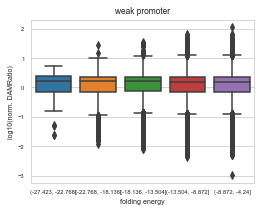

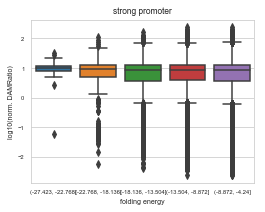

In [34]:
for promoter in ['weak', 'strong']:

    damFoldDf = damDf5[damDf5['promoter'] == promoter]

    fig, ax = plt.subplots(figsize=(4, 3))

    xlabel = 'folding_energy_bucket'
    ylabel = 'log10DAMratio'
    sns.boxplot(ax=ax, data=damFoldDf, x=xlabel, y=ylabel)

    ax.set_title('{} promoter'.format(promoter))
    ax.set_xlabel('folding energy')
    ax.set_ylabel('log10(norm. DAMRatio)')

    filename = 'ELM_seq_folding_energy_boxplot_promoter_{}_regionLength54'.format(promoter)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.png'), dpi=300)
    fig.savefig(ctermELMseqPath / subFolder / (filename + '.svg'), dpi=300)

If the amino acid is the main determinant, then the synonymous codon choice could be related to the secondary structure.

Anyway, the folding energy change is very small upon 1 nucleotide (synonymous codon).

In [44]:
promoter = 'weak'
damFoldDf = damDf5[damDf5['promoter'] == promoter]
damFoldDf.head()

,log10DAMratio,seq,Uncut_cnt,DpnI_cnt,MboI_cnt,DpnI_ratio,MboI_ratio,promoter,DAMratio,codon_-2,...,n_5,n_6,n_7,n_8,seq_extended,contains_GATC,region_seq,folding_energy,folding_struct,folding_energy_bucket
0,2.052750,GACGGATAAATTAAA,2,0,129,1.685342e-08,0.000002,weak,112.914694,GAC,...,T,A,A,A,AAAGACGGATAAATTAAACAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGACGGATAAATTAAAC...,-8.4,....((((.(((((((...((((.......).))).......))))...,"(-8.872, -4.24]"
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,0.000001,weak,66.880242,CAC,...,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-12.5,..(((.((.((..((((......))))..)).))))).(((((......,"(-13.504, -8.872]"
1,1.825298,CACCGGTAAAGGTGT,0,0,76,1.685342e-08,0.000001,weak,66.880242,CAC,...,G,T,G,T,AAACACCGGTAAAGGTGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAACACCGGTAAAGGTGTC...,-6.5,....(((((((..((((......))))...........)))))))....,"(-8.872, -4.24]"
2,1.794629,GGTTTCTAATCGCGT,3,3,286,6.741369e-08,0.000004,weak,62.320226,GGT,...,G,C,G,T,AAAGGTTTCTAATCGCGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGGTTTCTAATCGCGTC...,-9.2,....((((.(((........(((((..............))))).....,"(-13.504, -8.872]"
2,1.794629,GGTTTCTAATCGCGT,3,3,286,6.741369e-08,0.000004,weak,62.320226,GGT,...,G,C,G,T,AAAGGTTTCTAATCGCGTCAG,False,AAACCAGGAGTCGTTTCACCCGCGAAAAAAGGTTTCTAATCGCGTC...,-5.0,...((..((((.((((......(........).....)))).))))...,"(-8.872, -4.24]"


In [45]:
dfList = []
for aa in aaTable:
    damFoldDf2 = damFoldDf[damFoldDf['aa_-1'] == aa]
    df = damFoldDf2.groupby('codon_-1').mean()[['folding_energy', 'log10DAMratio']]
    df['aa'] = aa
    dfList.append(df)
    
damFoldSyn = pd.concat(dfList)
damFoldSyn

,folding_energy,log10DAMratio,aa
codon_-1,,,
AGA,-7.031174,0.117257,R
AGG,-8.448908,0.112235,R
CGA,-8.059680,0.126879,R
CGC,-9.040299,0.109238,R
CGG,-9.405348,0.124067,R
CGT,-8.411085,0.110119,R
AAA,-6.818759,0.176716,K
AAG,-7.145855,0.189810,K
CAC,-7.224731,0.086105,H


In [46]:
groupList = []
for aa, group in damFoldSyn.groupby(['aa']):
    group2 = group.copy()
    group2['log10DAMratio_norm_syn'] = group2['log10DAMratio']/group2['log10DAMratio'].mean()
    groupList.append(group2)
damFoldSyn2 = pd.concat(groupList)
damFoldSyn2

,folding_energy,log10DAMratio,aa,log10DAMratio_norm_syn
codon_-1,,,,
GCA,-8.223831,-0.046712,A,1.038196
GCC,-8.825812,-0.031086,A,0.690886
GCG,-9.878484,-0.056845,A,1.263394
GCT,-8.364808,-0.045332,A,1.007524
TGC,-8.266496,-0.124071,C,0.985582
TGT,-7.752825,-0.127701,C,1.014418
GAC,-7.764309,0.132475,D,1.011492
GAT,-7.499135,0.129465,D,0.988508
GAA,-7.442969,0.120992,E,0.970289


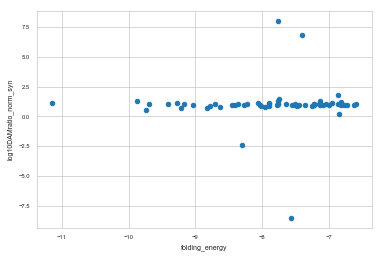

In [47]:
damFoldSyn2.plot.scatter(x='folding_energy', y='log10DAMratio_norm_syn')

In [42]:
damFoldSyn.groupby(['aa', 'codon_-1']).mean()[['folding_energy', 'log10DAMratio']]

,,folding_energy,log10DAMratio
aa_-1,codon_-1,,


## Compare ELISA to ELM-seq

We compare the ELISA results to the DAM screening.

First, we take the exact -1 codon that was used.

Then, we take the exact codon pair (-2 and -1) that was used.

Note that we should compare the linear scale of the normalized cat to the linear scale of the DAMratio (not the log!).

In [ ]:
elisaCodons = {
    'A':'GCA',
    'C':'TGT',
    'D':'GAT',
    'E':'GAA',
    'F':'TTT',
    'G':'GGA',
    'H':'CAT',
    'I':'ATT',
    'K':'AAA',
    'L':'TTA',
    'M':'ATG',
    'N':'AAT',
    'P':'CCA',
    'Q':'CAA',
    'R':'AGA',
    'S':'TCA',
    'T':'ACA',
    'V':'GTT',
    'W':'TGG',
    'Y':'TAT'
}

In [ ]:
elisaDf2 = elisaDf.rename(columns={'C-terminal amino acid':'aa', 'CAT (ng/ml)':'CAT'})
elisaDf2['CAT'] = pd.to_numeric(elisaDf2['CAT'])
# elisaDf2.groupby('aa')['CAT'].mean()
elisaDf2 = elisaDf2.pivot(index='aa', columns='replicate', values='CAT')
elisaDf2.columns = ['CAT rep1', 'CAT rep2']
elisaDf2['CAT'] = elisaDf2.mean(axis=1)
elisaDf2['codon'] = elisaDf2.index.map(elisaCodons)
elisaDf2 = elisaDf2.reset_index().set_index('codon')
elisaDf2.head()

In [ ]:
df = damDfCodon[damDfCodon['position'] == -1].loc['strong'][['DAMratio']].copy()
df.columns = ['DAMratio strong promoter']
df1 = df
df = damDfCodon[damDfCodon['position'] == -1].loc['weak'][['DAMratio']].copy()
df.columns = ['DAMratio weak promoter']
df2 = df
df3 = df1.join(df2)
df3.head()

In [ ]:
elisaDf3 = elisaDf2.join(df3).sort_values('CAT')
elisaDf3

In [ ]:
elisaDf3.to_csv(ctermELMseqPath / 'elisaDf3.csv')

In [ ]:
AAhydrophobic

In [ ]:
AApositive = ['K', 'R']

In [ ]:
elisaDf3['amino acid group'] = "others"

In [ ]:
elisaDf3.loc[elisaDf3['aa'].map(lambda x: x in AApositive), 'amino acid group'] = 'positively charged'
elisaDf3.loc[elisaDf3['aa'].map(lambda x: x in AAhydrophobic), 'amino acid group'] = 'hydrophobic'

In [ ]:
for ylabel in ['CAT']:
    set_fontsize_paper()
    width = 2.5
    fig, ax = plt.subplots(figsize=(width, width))
    df = elisaDf3
    sns.boxplot(data=elisaDf3, x='amino acid group', y=ylabel,
                order=['hydrophobic', 'positively charged', 'others'], fliersize=0)
    sns.swarmplot(data=elisaDf3, x='amino acid group',
                  order=['hydrophobic', 'positively charged', 'others'], y=ylabel, size=5, color='0.2')
    ylim = ax.get_ylim()
    add_stat_annotation(ax, data=elisaDf3, x='amino acid group', y=ylabel,
                        order=['hydrophobic', 'positively charged', 'others'], 
                        boxPairList=[('hydrophobic', 'positively charged')],
                        test='t-test_ind', textFormat='star', loc='outside',
                        lineYOffsetAxesCoord=0.010, lineYOffsetToBoxAxesCoord=0.005,
                        textYOffsetPoints=0, verbose=2, linewidth=1)
    ax.set_ylabel(ylabel + ' ng/ml')
    filename = 'ELM_seq_ELISA_{}_aa_group'.format(ylabel)
    fig.tight_layout()
    fig.savefig(ctermELMseqPath / (filename + '.svg'), dpi=300)
    fig.savefig(ctermELMseqPath / (filename + '.png'), dpi=300)

In [ ]:
for promoter in ['weak', 'strong']:
    for xlabel in ['CAT', 'CAT rep1', 'CAT rep2']:
        set_fontsize_paper()
        width = 1.5
        fig, ax = plt.subplots(figsize=(width, width))
        df = elisaDf3
        ylabel = 'DAMratio {} promoter'.format(promoter)
        pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
        ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.06, 0.93),
                    xycoords='axes fraction', ha='left', va='top', fontsize='medium',
                    bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
        plt.tight_layout()
        sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=False, n_boot=1000, fit_reg=True,
                    scatter_kws=dict(alpha=1, s=20, edgecolors='none'))
        ylim = list(ax.get_ylim())
        ylim[1] = ylim[0] + 1.2*(ylim[1] - ylim[0])
        ax.set_ylim(ylim)
        ax.set_ylabel('DAMratio {} promoter'.format(promoter))
        ax.set_xlabel(xlabel + ' ng/ml')
        ax.set_title('{} promoter'.format(promoter))
        filename = 'ELM_seq_ELISA_{}_correlation_promoter_{}.png'.format(xlabel, promoter)
        fig.tight_layout()
        fig.savefig(ctermELMseqPath / filename, dpi=300)

In the cat construct, the -2 codon is A/GCG. If we take into account the -2 codon, the correlation is worse in general.

In [ ]:
df = damDfCodonpair.loc[idx['strong', :, 'GCG'], :][['DAMratio']].copy()
df.columns = ['DAMratio strong promoter']
df1 = df.reset_index(level=0, drop=True)
df = damDfCodonpair.loc[idx['weak', :, 'GCG'], :][['DAMratio']].copy()
df.columns = ['DAMratio weak promoter']
df2 = df.reset_index(level=0, drop=True)
df3 = df1.join(df2)
df3.index = df3.index.droplevel('codon_-2')
df3

In [ ]:
elisaDf3 = elisaDf2.join(df3)
elisaDf3

In [ ]:
for promoter in ['weak', 'strong']:
    for xlabel in ['CAT', 'CAT rep1', 'CAT rep2']:
        set_fontsize_paper()
        width = 1.5
        fig, ax = plt.subplots(figsize=(width, width))
        df = elisaDf3
        ylabel = 'DAMratio {} promoter'.format(promoter)
        pearson = df[[xlabel, ylabel]].corr().iloc[0, 1]
        ax.annotate('pearson r={:.2f}'.format(pearson), xy=(0.06, 0.93),
                    xycoords='axes fraction', ha='left', va='top', fontsize='medium',
                    bbox=dict(boxstyle="round", fc='1', ec='0.5'),)
        plt.tight_layout()
        sns.regplot(ax=ax, data=df, x=xlabel, y=ylabel, ci=False, n_boot=1000, fit_reg=True,
                    scatter_kws=dict(alpha=1, s=20, edgecolors='none'))
        ylim = list(ax.get_ylim())
        ylim[1] = ylim[0] + 1.2*(ylim[1] - ylim[0])
        ax.set_ylim(ylim)
        ax.set_ylabel('DAMratio {} promoter'.format(promoter))
        ax.set_xlabel(xlabel + ' ng/ml')
        ax.set_title('{} promoter'.format(promoter))
        filename = 'ELM_seq_ELISA_{}_correlation_promoter_{}_consider_codon-2.png'.format(xlabel, promoter)
        fig.tight_layout()
        fig.savefig(ctermELMseqPath / filename, dpi=300)